In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
import time

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Lasso

In [2]:
#from Box_cox_test import X1_test, Y_test
housing = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/housing_new.csv")
train =housing.iloc[:,1:]
train

SalePrice        PID  GrLivArea  MSSubClass  LotFrontage  LotArea  \
0        126000  909176150        856          30         60.0     7890   
1        139500  905476230       1049         120         42.0     4235   
2        124900  911128020       1001          30         60.0     6060   
3        114000  535377150       1039          70         80.0     8146   
4        227000  534177230       1665          60         70.0     8400   
...         ...        ...        ...         ...          ...      ...   
6754     121000  903205040        952          30         60.0     8854   
6755     139600  905402060       1733          20         60.0    13680   
6756     145000  909275030       2002          90         82.0     6270   
6757     217500  907192040       1842          60         60.0     8826   
6758     215000  906223180       1911          60         80.0     9554   

      Street  Alley  Condition1  Condition2  ...  FireplaceQu__No Fireplace  \
0          1   -0.1           0         0.0  ...                          0   
1          1   -0.1           0         0.0  ...                          1   
2          1   -0.1           0         0.0  ...                          1   
3          1   -0.1           0         0.0  ...                          1   
4          1   -0.1           0         0.0  ...                          1   
...      ...    ...         ...         ...  ...                        ...   
6754       1   -0.1           0         0.0  ...                          0   
6755       1   -0.1           0         0.0  ...                          0   
6756       1   -0.1           0         0.0  ...                          1   
6757       1   -0.1           0         0.0  ...                          0   
6758       1   -0.1           0         0.0  ...                          0   

      FireplaceQu__Po  FireplaceQu__TA  GarageFinish__No Garage  \
0                   0                0                        0   
1                   0                0                        0   
2                   0                0                        0   
3                   0                0                        0   
4                   0                0                        0   
...               ...              ...                      ...   
6754                0                0                        0   
6755                0                0                        0   
6756                0                0                        0   
6757                0                1                        0   
6758                0                1                        0   

      GarageFinish__RFn  GarageFinish__Unf  Fence__GdWo  Fence__MnPrv  \
0                     0                  1            0             0   
1                     0                  0            0             0   
2                     0                  1            0             0   
3                     0                  1            0             0   
4                     0                  0            0             0   
...                 ...                ...          ...           ...   
6754                  0                  1            0             0   
6755                  0                  1            0             0   
6756                  0                  1            0             0   
6757                  0                  0            0             0   
6758                  1                  0            0             0   

      Fence__MnWw  Fence__No Fence  
0               0                1  
1               0                1  
2               0                1  
3               0                1  
4               0                1  
...           ...              ...  
6754            0                1  
6755            0                1  
6756            0                1  
6757            0                1  
6758            0                1  

[6759 rows x 177 columns]

In [3]:
# rm_cols = ['MSZoning_RL', 'YearRemodAdd', 'TotalBsmtSF', 'LotFrontage']
# X1.drop(rm_cols, axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X = housing.iloc[:,2:]
Y = housing["SalePrice"]
y=Y
ols = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, housing["SalePrice"], test_size=0.5, random_state=32)


In [4]:
# X1_test.drop(rm_cols, axis = 1, inplace = True)


In [5]:
scaler = StandardScaler().fit(X_train)
features = scaler.transform(X_train)
X1_std = pd.DataFrame(features, columns = X_train.columns)

In [6]:
scaler = StandardScaler().fit(X_test)
features = scaler.transform(X_test)
X1_std_test = pd.DataFrame(features, columns = X_train.columns)

In [7]:
alphas = np.logspace(10,-2,500)

alphas

lassocv = LassoCV(alphas = alphas, random_state=0)
lassocv.fit(X1_std, y_train)


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2243248739.349884, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1558359575.6669617, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2023528869.1750183, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pac

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9444634907.373611, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9822308851.399048, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10171136531.339981, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pack

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14117574959.330467, tolerance: 1068834585.7699218
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1214775570.753418, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483443295.9190674, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pac

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11334628741.270782, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11309359954.685822, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11289315131.191635, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pa

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11223312154.30098, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11223122660.379333, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11222925792.424469, tolerance: 1053292977.1945748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pac

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9529931671.79692, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9543520551.463577, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9693273365.13324, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-package

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11495184614.380775, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11512430413.40567, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11528659408.186028, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pac

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11748225390.972519, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11750538154.280159, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11752718342.67765, tolerance: 1005258762.4585453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pac

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10029382851.988434, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10017231331.238922, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10038136791.177826, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pa

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12272435527.466492, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12283133743.586456, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12292222271.273941, tolerance: 1007707954.8107417
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-pa

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3793189538.967346, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3806789376.4560547, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3814223693.8921204, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packag

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10712369397.028015, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10717942920.796585, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10722470257.22705, tolerance: 1036780584.881503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packag

LassoCV(alphas=array([1.00000000e+10, 9.46132376e+09, 8.95166472e+09, 8.46945981e+09,
       8.01323013e+09, 7.58157646e+09, 7.17317494e+09, 6.78677305e+09,
       6.42118571e+09, 6.07529169e+09, 5.74803016e+09, 5.43839743e+09,
       5.14544388e+09, 4.86827104e+09, 4.60602884e+09, 4.35791301e+09,
       4.12316259e+09, 3.90105762e+09, 3.69091691e+09, 3.49209598e+09,
       3.30398507e+09, 3.12600724e+0...
       3.57360225e-02, 3.38110078e-02, 3.19896892e-02, 3.02664806e-02,
       2.86360972e-02, 2.70935387e-02, 2.56340741e-02, 2.42532274e-02,
       2.29467637e-02, 2.17106760e-02, 2.05411735e-02, 1.94346693e-02,
       1.83877698e-02, 1.73972643e-02, 1.64601150e-02, 1.55734477e-02,
       1.47345431e-02, 1.39408283e-02, 1.31898690e-02, 1.24793621e-02,
       1.18071285e-02, 1.11711065e-02, 1.05693455e-02, 1.00000000e-02]),
        random_state=0)

In [8]:
lassocv.score(X1_std,y_train)

0.9891000658846694

In [9]:
lassocv_alpha = lassocv.alpha_

In [10]:
lassocv_alpha

20.827506301905185

In [11]:
las = Lasso(alpha = lassocv.alpha_, random_state = 0)
las.fit(X1_std,y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+10, tolerance: 1.293e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=20.827506301905185, random_state=0)

In [12]:
print('Score for training data:', las.score(X1_std,y_train))

pred = las.predict(X1_std)
RMSE = mean_squared_error(y_train, pred, squared = False)
print('RMSE for training data is:', RMSE)

Score for training data: 0.9891000658846694
RMSE for training data is: 6458.446413779418


In [13]:
print('Score for test data:', las.score(X1_std_test,y_test))

pred = las.predict(X1_std_test)
RMSE = mean_squared_error(y_test, pred, squared = False)
print('RMSE for test data is:', RMSE)

Score for test data: 0.9846743481333236
RMSE for test data is: 7400.70023946452


In [14]:
import pickle
Pkl_Filename = "Pickle_lasso.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(las, file)

# Decision Tree

In [15]:
# Initializing Decision Tree
tree_reg = DecisionTreeRegressor()
tree = tree_reg.fit(X_train, y_train)

In [16]:
# Predicting Price/Sqft
Y_pred = tree_reg.predict(X_train)

# Printing error and score of overfit decision tree model
RMSE = np.sqrt(mean_squared_error(y_train,Y_pred))
print(RMSE)
R2 = tree_reg.score(X_train,y_train)
print(R2)

0.0
1.0


In [17]:
# Calculating cross validation scores
scores = cross_validate(tree_reg, X_train, y_train, cv = 20, scoring = ('r2','neg_mean_squared_error'))
scores

{'fit_time': array([0.05038118, 0.05002093, 0.04889703, 0.04899573, 0.04651117,
        0.04615974, 0.04531026, 0.04606485, 0.04492474, 0.04615283,
        0.04589415, 0.04473114, 0.04501414, 0.04504704, 0.04577684,
        0.04496002, 0.04548407, 0.04499722, 0.04531717, 0.04588604]),
 'score_time': array([0.00193882, 0.00177693, 0.00170016, 0.00174809, 0.00155282,
        0.00156426, 0.00152493, 0.00153613, 0.0015099 , 0.0015192 ,
        0.00156784, 0.00150681, 0.00150776, 0.00152802, 0.0015161 ,
        0.00153184, 0.00152397, 0.00150681, 0.00157809, 0.00152302]),
 'test_r2': array([0.97292697, 0.94929134, 0.98802487, 0.97790342, 0.99299799,
        0.98895324, 0.98471934, 0.98903501, 0.98082363, 0.98585016,
        0.99174227, 0.96782682, 0.98475295, 0.98792144, 0.98679847,
        0.97723446, 0.96695859, 0.98122993, 0.99369556, 0.98537278]),
 'test_neg_mean_squared_error': array([-1.04974325e+08, -1.62931513e+08, -4.08737246e+07, -6.00939818e+07,
        -2.65987138e+07, -3.292071

In [18]:
np.linspace(start=2, stop=30, num=15, dtype=int)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [19]:
# Gridsearch with cross valiadation

grid_para_tree = [{
    "min_samples_leaf": range(1,16),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_reg.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_reg, grid_para_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

%time grid_search_tree.fit(X_train, y_train)

CPU times: user 1.17 s, sys: 267 ms, total: 1.43 s
Wall time: 9.9 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=108), n_jobs=-1,
             param_grid=[{'min_samples_leaf': range(1, 16),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='neg_mean_squared_error')

In [20]:
# RETURNS a DATA FRAME BUT DOES NOT FIT BEST ESTIMATE BACK TO DATA. 
# CANT BE RUN WITH refit = True because there are two scoring methods, and it does not know which one to use.

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = ['r2', 'neg_mean_squared_error'], refit = False, cv = 3, verbose = 3)


tuning_model.fit(X_train, y_train)

Results = pd.DataFrame(tuning_model.cv_results_)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error

[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max

[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max

[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max

[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2300212619.767) r2: (test=0.430) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-2491054138.850) r2: (test=0.386) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2397399830.106) r2: (test=0.292) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2710567521.911) r2: (test=0.328) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-2575432510.057) r2: (test=0.365) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-1981523940.831) r2: (test=0.415) total time=   0.0s
[CV 2/3] END max

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-906874664.992) r2: (test=0.732) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1146175382.411) r2: (test=0.716) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958686877.697) r2: (test=0.764) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] 

[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_dep

[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-753734220.092) r2: (test=0.813) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-818115640.108) r2: (test=0.798) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-958332518.065) r2: (test=0.717) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1160663531.265) r2: (test=0.712) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1209508501.368) r2: (test=0.702) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-664734755.647) r2: (test=0.804) total time=   0.0s
[CV 2/3] END max_dep

[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-611644455.272) r2: (test=0.848) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-545185429.350) r2: (test=0.866) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-309931182.866) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-502123108.969) r2: (test=0.852) total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-891099906.170) r2: (test=0.780) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-447468962.546) r2: (test=0.868) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-472242179.433) r2: (test=0.883) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-668621766.392) r2: (test=0.835) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-621700077.099) r2: (test=0.816) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1020538711.446) r2: (test=0.747) total time=   0.0s
[CV 3/3] END max_dept

[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-706832592.547) r2: (test=0.825) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-633391395.344) r2: (test=0.844) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-278855386.679) r2: (test=0.918) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-281473936.406) r2: (test=0.930) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-415966511.485) r2: (test=0.897) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-486537645.467) r2: (test=0.856) total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-654875749.492) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-218368224.571) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-219185153.686) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-318308730.527) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-480088824.376) r2: (test=0.858) total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-316546679.183) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-480088824.376) r2: (test=0.858) total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-316546679.183) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-480088824.376) r2: (test=0.858) total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-323532915.023) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-463202673.419) r2: (test=0.863) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-323532915.023) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-463202673.419) r2: (test=0.863) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-323532915.023) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-463202673.419) r2: (test=0.863) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-323532915.023) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-463202673.419) r2: (test=0.863) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-653287683.958) r2: (test=0.838) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-607947264.750) r2: (test=0.850) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-216680199.850) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-217929753.009) r2: (test=0.946) total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-100070230.293) r2: (test=0.970) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-119229080.394) r2: (test=0.970) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-138536145.845) r2: (test=0.966) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-362225347.732) r2: (test=0.893) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-348378396.950) r2: (test=0.914) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-377201973.091) r2: (test=0.907) total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-668621766.392) r2: (test=0.835) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-621700077.099) r2: (test=0.816) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-1020538711.446) r2: (test=0.747) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-903252188.950) r2: (test=0.777) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-447468962.546) r2: (test=0.868) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-472242179.433) r2: (test=0.883) total time=   0.0s
[CV 3/3] END max_dept

[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-256998995.668) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-265659744.920) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-372025404.464) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-458733760.473) r2: (test=0.865) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-708545841.537) r2: (test=0.824) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-598533310.734) r2: (test=0.852) total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-185044235.968) r2: (test=0.945) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-190432306.101) r2: (test=0.953) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-231811992.476) r2: (test=0.943) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-363342492.268) r2: (test=0.893) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-605919758.591) r2: (test=0.850) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-499769050.054) r2: (test=0.877) total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-608012568.108) r2: (test=0.849) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-532425364.954) r2: (test=0.869) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-178981734.531) r2: (test=0.947) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-185439212.795) r2: (test=0.954) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-253845917.133) r2: (test=0.937) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-362614576.962) r2: (test=0.893) total time=   0.0s
[CV 2/3] END max_d

[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-487872296.084) r2: (test=0.880) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-138808209.768) r2: (test=0.959) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-164673133.089) r2: (test=0.959) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-210347098.100) r2: (test=0.948) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-309526751.541) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-523716698.579) r2: (test=0.870) total time=   0.0s
[CV 3/3] END max_

[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-120648307.465) r2: (test=0.964) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-141602957.845) r2: (test=0.965) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-187905931.690) r2: (test=0.954) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-316278783.806) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-479573528.708) r2: (test=0.881) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-463533816.927) r2: (test=0.886) total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-105703691.378) r2: (test=0.969) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-135226054.768) r2: (test=0.966) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-174064620.683) r2: (test=0.957) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-307864959.454) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-458732613.750) r2: (test=0.886) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-452634255.709) r2: (test=0.888) total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100571067.301) r2: (test=0.970) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-133441719.440) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-166532724.314) r2: (test=0.959) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-307864959.454) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-449071009.528) r2: (test=0.889) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-449379202.947) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max

[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-98948530.160) r2: (test=0.971) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-132758567.933) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-164226806.174) r2: (test=0.959) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-307864959.454) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-448212448.830) r2: (test=0.889) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-449379202.947) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_

[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-98948530.160) r2: (test=0.971) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-132758567.933) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-164226806.174) r2: (test=0.959) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-307864959.454) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-448212448.830) r2: (test=0.889) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-449379202.947) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_

[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-281981457.575) r2: (test=0.930) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-76854766.776) r2: (test=0.977) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-120610670.446) r2: (test=0.970) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-139779875.699) r2: (test=0.966) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-262879227.868) r2: (test=0.922) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-349086799.252) r2: (test=0.913) total time=   0.0s
[CV 3/3] EN

[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-668621766.392) r2: (test=0.835) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-621700077.099) r2: (test=0.816) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-1020538711.446) r2: (test=0.747) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-903252188.950) r2: (test=0.777) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-447468962.546) r2: (test=0.868) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-472242179.433) r2: (test=0.883) total time=   0.0s
[CV 3/3] END max_dept

[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-708545841.537) r2: (test=0.824) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-619116223.388) r2: (test=0.847) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-256998995.668) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-265659744.920) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-403355794.143) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-469498647.934) r2: (test=0.861) total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-356308607.569) r2: (test=0.895) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-591360985.543) r2: (test=0.853) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-477497059.849) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-184568514.614) r2: (test=0.945) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-185439212.795) r2: (test=0.954) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-235691088.865) r2: (test=0.942) total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-414665356.732) r2: (test=0.898) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-141303956.527) r2: (test=0.958) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-158743363.596) r2: (test=0.961) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-186330796.531) r2: (test=0.954) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-308011493.829) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-535105544.585) r2: (test=0.867) total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-156368338.811) r2: (test=0.961) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-287239084.947) r2: (test=0.915) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-442133669.924) r2: (test=0.890) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-368612187.801) r2: (test=0.909) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-123860637.067) r2: (test=0.963) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-146116516.510) r2: (test=0.964) total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-129761930.306) r2: (test=0.968) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-279802148.329) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-431744180.968) r2: (test=0.893) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-334306505.538) r2: (test=0.918) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-110330204.385) r2: (test=0.967) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-131394184.237) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-268360652.905) r2: (test=0.921) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-427785798.618) r2: (test=0.894) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-329121670.138) r2: (test=0.919) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-110496210.243) r2: (test=0.967) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-131124132.494) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-121376224.956) r2: (test=0.970) total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-115091589.668) r2: (test=0.972) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-216591237.214) r2: (test=0.936) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-384477889.949) r2: (test=0.905) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-327670065.034) r2: (test=0.919) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-96201072.430) r2: (test=0.972) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-115161890.540) r2: (test=0.971) total time=   0.0s
[CV 3/3] END max_depth=

[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-114711165.378) r2: (test=0.972) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-98996065.755) r2: (test=0.976) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-219572486.640) r2: (test=0.935) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-368675957.220) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-303255715.093) r2: (test=0.925) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-91278252.867) r2: (test=0.973) total time=   0.0s
[CV 2/3] END max_depth=9

[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-72718362.019) r2: (test=0.979) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-87092042.683) r2: (test=0.978) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-104389217.199) r2: (test=0.974) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-187130880.895) r2: (test=0.945) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-222670687.372) r2: (test=0.945) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-293957706.595) r2: (test=0.927) total time=   0.0s
[CV 1/

[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-141718285.042) r2: (test=0.965) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-282724535.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-334565414.011) r2: (test=0.917) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-344663588.243) r2: (test=0.915) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-447468962.546) r2: (test=0.868) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-472242179.433) r2: (test=0.883) total time=   0.0s
[CV 

[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-621700077.099) r2: (test=0.816) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-1020538711.446) r2: (test=0.747) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-903252188.950) r2: (test=0.777) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-256998995.668) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-265659744.920) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-372025404.464) r2: (test=0.908) total time=   0.0s
[CV 1/3] END

[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-403355794.143) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-469498647.934) r2: (test=0.861) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-708545841.537) r2: (test=0.824) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-619116223.388) r2: (test=0.847) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-256998995.668) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-265659744.920) r2: (test=0.934) total time=   0.0s
[CV 3/3] END m

[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-185439212.795) r2: (test=0.954) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-244896632.168) r2: (test=0.940) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-366686791.285) r2: (test=0.892) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-594431868.009) r2: (test=0.853) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-501036821.864) r2: (test=0.876) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-179153823.776) r2: (test=0.947) total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-207132769.081) r2: (test=0.949) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-314651486.596) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-544186639.076) r2: (test=0.865) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-454024527.647) r2: (test=0.888) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-136995921.993) r2: (test=0.960) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-158743363.596) r2: (test=0.961) total time=   0.0s
[CV 3/3] END max

[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-173809879.502) r2: (test=0.957) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-274976384.449) r2: (test=0.919) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-492696611.048) r2: (test=0.878) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-404349506.523) r2: (test=0.900) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-117659402.148) r2: (test=0.965) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-142318768.621) r2: (test=0.965) total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-135362805.347) r2: (test=0.966) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-162024684.516) r2: (test=0.960) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-263944550.920) r2: (test=0.922) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-457277287.406) r2: (test=0.887) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-367689508.015) r2: (test=0.909) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-96068708.433) r2: (test=0.972) total time=   0.0s
[CV 2/3] END max_

[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-243647784.045) r2: (test=0.928) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-435254878.336) r2: (test=0.892) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-328406436.081) r2: (test=0.919) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-96614457.432) r2: (test=0.971) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-128610535.006) r2: (test=0.968) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-155447020.578) r2: (test=0.962) total time=   0.0s
[CV 1/3] END max_

[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-256405023.132) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-438305015.763) r2: (test=0.891) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-318501008.042) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-98752671.274) r2: (test=0.971) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-120246860.627) r2: (test=0.970) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-118525326.166) r2: (test=0.971) total time=   0.0s
[CV 1/3] END max_

[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-114662279.955) r2: (test=0.972) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-245747101.548) r2: (test=0.927) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-386065198.921) r2: (test=0.904) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-289265720.172) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-102367043.131) r2: (test=0.970) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-122827648.167) r2: (test=0.970) total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-239599050.974) r2: (test=0.941) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-320836536.537) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-77528684.210) r2: (test=0.977) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-99714876.080) r2: (test=0.975) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-85594928.780) r2: (test=0.979) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-241390147.675) r2: (test=0.929) total time=   0.0s
[CV 2/3

[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-903252188.950) r2: (test=0.777) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-447468962.546) r2: (test=0.868) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-472242179.433) r2: (test=0.883) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-668621766.392) r2: (test=0.835) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-621700077.099) r2: (test=0.816) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-1020538711.446) r2: (test=0.747) total time=   0.0s
[CV 3/3] END ma

[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-461532304.156) r2: (test=0.864) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-708545841.537) r2: (test=0.824) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-604448500.079) r2: (test=0.851) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-256998995.668) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-265659744.920) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-372025404.464) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-231811992.476) r2: (test=0.943) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-372470792.338) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-613044800.845) r2: (test=0.848) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-476139656.766) r2: (test=0.883) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-185044235.968) r2: (test=0.945) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-190432306.101) r2: (test=0.953) total time=   0.0s
[CV 3/3] END max

[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-178981734.531) r2: (test=0.947) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-185439212.795) r2: (test=0.954) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-253845917.133) r2: (test=0.937) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-357494858.017) r2: (test=0.894) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-592716362.359) r2: (test=0.853) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-501656703.852) r2: (test=0.876) total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-138808209.768) r2: (test=0.959) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-164673133.089) r2: (test=0.959) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-210347098.100) r2: (test=0.948) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-305743353.832) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-516810524.714) r2: (test=0.872) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-449846622.600) r2: (test=0.889) total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-120965483.903) r2: (test=0.964) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-142553019.229) r2: (test=0.965) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-185793335.066) r2: (test=0.954) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-274932547.900) r2: (test=0.919) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-479258647.207) r2: (test=0.881) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-409528666.048) r2: (test=0.899) total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-102047851.520) r2: (test=0.970) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-133548729.929) r2: (test=0.967) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-169059909.042) r2: (test=0.958) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-257859255.878) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-453774549.549) r2: (test=0.887) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-367541921.285) r2: (test=0.909) total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-87763545.041) r2: (test=0.974) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-129552521.024) r2: (test=0.968) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-158109218.777) r2: (test=0.961) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-264879022.383) r2: (test=0.922) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-458711282.346) r2: (test=0.886) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-373491622.176) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max_

[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-123995405.133) r2: (test=0.969) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-146368814.581) r2: (test=0.964) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-241289670.934) r2: (test=0.929) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-410698910.587) r2: (test=0.898) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-326058661.267) r2: (test=0.920) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-85001165.035) r2: (test=0.975) total time=   0.0s
[CV 2/3] END max_

[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-95295142.654) r2: (test=0.972) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-114212552.349) r2: (test=0.972) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-113666934.299) r2: (test=0.972) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-223484822.946) r2: (test=0.934) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-410408471.775) r2: (test=0.898) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-302435642.386) r2: (test=0.925) total time=   0.0s
[CV 1/3] END max_

In [21]:
# Sorting by best r-squared
Results[['mean_test_r2','rank_test_r2']].sort_values(by = 'rank_test_r2')

mean_test_r2  rank_test_r2
1202      0.978190             1
1004      0.977561             2
1006      0.977374             3
802       0.977360             4
1206      0.977088             5
...            ...           ...
75        0.328195          1301
115       0.328195          1301
77        0.328195          1301
51        0.328195          1301
67        0.328195          1301

[1400 rows x 2 columns]

In [22]:
# Sorting by best r-squared with errors
rr = Results[['mean_test_r2','rank_test_r2',
        'mean_test_neg_mean_squared_error',
        'std_test_neg_mean_squared_error',
        'rank_test_neg_mean_squared_error']].sort_values(by = 'rank_test_neg_mean_squared_error')
rr['mean_test_neg_mean_squared_error'] = np.sqrt(-rr['mean_test_neg_mean_squared_error'])

rr

mean_test_r2  rank_test_r2  mean_test_neg_mean_squared_error  \
1202      0.978190             1                       9113.200604   
1004      0.977561             2                       9270.019836   
1006      0.977374             3                       9295.170815   
802       0.977360             4                       9335.830167   
1206      0.977088             5                       9360.172525   
...            ...           ...                               ...   
89        0.328195          1301                      50607.640603   
155       0.328195          1301                      50607.640603   
91        0.328195          1301                      50607.640603   
153       0.328195          1301                      50607.640603   
123       0.328195          1301                      50607.640603   

      std_test_neg_mean_squared_error  rank_test_neg_mean_squared_error  
1202                     5.459781e+06                                 1  
1004                     1.048628e+07                                 2  
1006                     8.053829e+06                                 3  
802                      1.620344e+07                                 4  
1206                     9.169177e+06                                 5  
...                               ...                               ...  
89                       1.282494e+08                              1301  
155                      1.282494e+08                              1301  
91                       1.282494e+08                              1301  
153                      1.282494e+08                              1301  
123                      1.282494e+08                              1301  

[1400 rows x 5 columns]

In [23]:
# Working grid search and cross validation


parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tmtm = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = 'neg_mean_squared_error', cv = 3, verbose = 3, 
                    return_train_score = True)


tmtm.fit(X_train, y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1

[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, s

[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, s

[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;,

[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;,

[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, s

[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;,

[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, s

[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=1, splitter=random

[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-2328975869.253, test=-2575432510.057) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-2305754524.028, test=-1981523940.831) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-2141936742.550, test=-2300212619.767) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-2115395738.508, test=-2491054138.850) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(train=-2621356824.677, test=-2397399830.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(train=-2577266211.340, test=-2710567521.911) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;,

[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-961674738.054, test=-906874664.992) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-1017989434.941, test=-1146175382.411) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-910317695.927, test=-958686877.697) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2, splitter=best

[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(tr

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(tr

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score

[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(tr

[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, scor

[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(tr

[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(tr

[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(

[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-977224774.812, test=-958332518.065) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-1019481722.338, test=-1160663531.265) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-1131025489.241, test=-1209508501.368) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-670148067.653, test=-664734755.647) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-628677259.705, test=-753734220.092) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-637213334.791, test=-818115640.108) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=(

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-205498805.048, test=-310204472.956) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-487059777.025, test=-534707518.538) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-493032817.609, test=-611644455.272) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-401272708.106, test=-545185429.350) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;,

[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-390950561.255, test=-472242179.433) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-503404355.615, test=-668621766.392) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-652614820.977, test=-621700077.099) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-856576318.576, test=-1020538711.446) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-832298829.688, test=-891099906.170) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train

[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=(train=-856576318.576, test=-1020538711.446) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=(train=-832298829.688, test=-891099906.170) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-228405544.355, test=-278855386.679) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-216913639.983, test=-281473936.406) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-286464706.881, test=-415966511.485) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-449988415.875, test=-517707433.306) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(t

[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-288590056.564, test=-404549443.537) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-461098918.806, test=-501539606.152) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-575301561.996, test=-706972541.569) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-588238241.885, test=-639067775.626) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-175237740.807, test=-218368224.571) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-164190179.721, test=-219185153.686) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(tr

[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-205366144.265, test=-323436302.779) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-407206613.275, test=-519969992.093) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-511479325.990, test=-653287683.958) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-545381960.240, test=-607946598.676) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=

[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=best;, score=(train=-216355285.077, test=-319305369.876) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-434444885.051, test=-488772944.320) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-512726734.735, test=-627208157.710) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-551398225.774, test=-618670765.232) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(tr

[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-205366144.265, test=-323436302.779) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-407206613.275, test=-519969992.093) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-511479325.990, test=-653287683.958) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-545381960.240, test=-607946598.676) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=

[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-512726734.735, test=-627208157.710) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-551398225.774, test=-618670765.232) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-205366144.265, test=-323436302.779) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-407206613.275, test=-519969992.093) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(tr

[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-205366144.265, test=-323436302.779) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-407206613.275, test=-519969992.093) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-511479325.990, test=-653287683.958) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-545381960.240, test=-607946598.676) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=(train=

[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-512726734.735, test=-627208157.710) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-551398225.774, test=-618670765.232) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-173398863.408, test=-216680199.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-163478022.790, test=-217929753.009) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-205366144.265, test=-323436302.779) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-407206613.275, test=-519969992.093) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(tr

[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-54992511.459, test=-155632521.804) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-204750739.821, test=-352242184.928) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-212552411.639, test=-392408086.355) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-226977879.204, test=-369116039.405) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-28877745.899, test=-95889697.107) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-33725763.462, test=-98754868.628) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, scor

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-503404355.615, test=-668621766.392) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-652614820.977, test=-621700077.099) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-856576318.576, test=-1020538711.446) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-827824810.120, test=-903252188.950) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train=-390950561.255, test=-472242179.433) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=2, splitter=best;, score=(train

[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-209323270.330, test=-256998995.668) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-209641035.000, test=-265659744.920) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-282315696.077, test=-372025404.464) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-431416171.472, test=-458733760.473) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-558922414.226, test=-708545841.537) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-530191789.347, test=-598533310.734) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=

[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-320214749.744, test=-363342492.268) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-444111901.687, test=-605919758.591) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-404788790.455, test=-499769050.054) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-124994088.795, test=-185044235.968) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-128233088.173, test=-190432306.101) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-179719677.960, test=-231811992.476) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(trai

[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-129597752.949, test=-192824717.379) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-258964355.457, test=-338679339.059) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-369082351.164, test=-521803520.520) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-337294872.876, test=-434937703.605) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-88406401.227, test=-144929384.607) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-89879846.755, test=-151675498.040) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-1

[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-103073254.770, test=-174575321.992) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-223411201.322, test=-305561747.694) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-314981603.027, test=-470454583.516) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-292855041.261, test=-404297781.151) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-66005450.528, test=-124145065.521) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-67703805.050, test=-131682128.771) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-1

[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-54033749.436, test=-118109841.290) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-84099472.601, test=-146314502.695) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-200379450.683, test=-318743687.898) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-276411700.272, test=-444269695.078) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-267411686.663, test=-385554629.016) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-50943087.075, test=-102018228.111) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-54

[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-40858014.954, test=-96737683.798) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-44780452.454, test=-106917845.728) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-71372221.907, test=-136711171.895) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-188208573.180, test=-304593435.267) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-252605913.684, test=-442818459.632) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-254424430.041, test=-365510470.332) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-408

[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-63129961.283, test=-133441719.440) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-92127809.625, test=-166532724.314) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-250463534.366, test=-307864959.454) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-279524503.028, test=-449071009.528) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-323181356.775, test=-449379202.947) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-34940981.585, test=-93113010.765) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train

[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-34425131.550, test=-103099521.805) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-58802140.988, test=-135270700.595) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-180857973.516, test=-315984721.043) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-236473887.284, test=-445272733.529) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-250458481.938, test=-366496819.287) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-31254366.388, test=-93406822.245) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-356

[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best;, score=(train=-89617748.133, test=-164226806.174) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-250463534.366, test=-307864959.454) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-278715501.636, test=-448212448.830) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random;, score=(train=-323181356.775, test=-449379202.947) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-3638411.453, test=-82663087.791) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-4253693.669, test=-88696061.624) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(tra

[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best;, score=(train=-46548922.644, test=-120303462.535) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best;, score=(train=-71489466.958, test=-144092711.680) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random;, score=(train=-203042686.702, test=-241173805.656) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random;, score=(train=-201063145.219, test=-362027938.587) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random;, score=(train=-205609811.682, test=-297375171.669) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, 

[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=(train=-652614820.977, test=-621700077.099) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=(train=-856576318.576, test=-1020538711.446) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random;, score=(train=-827824810.120, test=-903252188.950) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-390950561.255, test=-472242179.433) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-503404355.615, test=-668621766.392) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=

[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=random;, score=(train=-529999186.425, test=-619116223.388) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-209323270.330, test=-256998995.668) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-209641035.000, test=-265659744.920) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-288590056.564, test=-404549443.537) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-429155030.656, test=-469498647.934) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-559287388.090, test=-708685790.559) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score

[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-130998918.541, test=-178981734.531) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-130319669.399, test=-185439212.795) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=best;, score=(train=-186578125.730, test=-253845917.133) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random;, score=(train=-332143617.675, test=-357494858.017) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random;, score=(train=-439712763.376, test=-592716362.359) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random;, score=(train=-404456053.083, test=-510347398.568) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(

[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-367874623.913, test=-516810524.714) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-340727873.998, test=-448331194.313) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-66005450.528, test=-124145065.521) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-67266959.968, test=-132521067.496) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-96379157.695, test=-169168382.114) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-207447462.821, test=-307076928.343) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-74673331.207, test=-146647917.779) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-172842581.263, test=-287773999.037) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-248308757.532, test=-426662066.865) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-218888030.147, test=-374308438.524) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-50413002.261, test=-102020052.802) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-53964309.615, test=-119677498.796) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-75

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=random;, score=(train=-268460995.672, test=-386291338.081) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-39244772.853, test=-91663073.490) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-42347693.459, test=-106158244.089) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=(train=-58471709.834, test=-124707812.562) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-147568660.000, test=-265900212.101) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-213012169.253, test=-390518762.611) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=(train=-

[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-257534346.465, test=-425292649.787) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random;, score=(train=-250158621.678, test=-369175802.580) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-31399098.977, test=-88663649.955) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-34770542.084, test=-93299876.362) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=(train=-47262720.693, test=-120409174.447) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-126698343.677, test=-263363958.883) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=random;, score=(train=-

[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-242196554.832, test=-408504711.775) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random;, score=(train=-239095585.499, test=-359299727.333) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-25856070.982, test=-83512310.089) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-28579775.982, test=-89985844.745) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-38435947.408, test=-115345715.062) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-111577968.496, test=-249537125.412) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-

[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-312577.273, test=-74635051.530) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-509056.921, test=-84297961.510) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-1449806.919, test=-127081315.808) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-27375266.782, test=-223612609.053) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-15426821.368, test=-332731951.867) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-24989671.692, test=-229332469.393) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score

[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=random;, score=(train=-158490744.838, test=-334565414.011) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=random;, score=(train=-220070309.253, test=-344663588.243) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-390950561.255, test=-472242179.433) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=(train=-503404355.615, test=-668621766.392) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=(train=-652614820.977, test=-621700077.099) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;

[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=(train=-529442903.492, test=-604448500.079) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-209323270.330, test=-256998995.668) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-209641035.000, test=-265659744.920) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=(train=-282315696.077, test=-372025404.464) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-431910227.187, test=-461532304.156) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-558922414.226, test=-708545841.537) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, scor

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-394133515.139, test=-476139656.766) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-124994088.795, test=-185044235.968) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-128233088.173, test=-190432306.101) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=(train=-179719677.960, test=-231811992.476) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-319933393.327, test=-373295506.230) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-436901837.943, test=-620933677.596) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, scor

[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-126016534.170, test=-187266413.774) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-253107993.522, test=-314594188.554) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-355835421.447, test=-542732403.284) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-315686006.988, test=-436947694.457) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-88406401.227, test=-144929384.607) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-89879846.755, test=-151675498.040) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(t

[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-67266959.968, test=-132521067.496) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-96379157.695, test=-169168382.114) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-207447462.821, test=-307076928.343) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-292613561.590, test=-430233977.009) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-259259918.096, test=-398352541.577) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-66005450.528, test=-124145065.521) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(tr

[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-50413002.261, test=-102020052.802) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-53964309.615, test=-119677498.796) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-75293758.301, test=-162472223.516) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-177645594.219, test=-292403140.094) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-247441498.950, test=-424293531.417) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-219101492.350, test=-375908094.913) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=(tr

[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-59219536.817, test=-143270642.134) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-153396750.313, test=-280758914.679) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-214369808.790, test=-390218840.071) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-187419185.778, test=-358168546.259) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-39925777.726, test=-95061028.110) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-45756242.723, test=-122319759.869) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(tra

[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-163486575.045, test=-327266965.305) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-32083007.436, test=-90509244.132) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-38512863.744, test=-116315218.182) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-50332108.143, test=-103014756.976) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-120740105.326, test=-214826212.528) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-186469466.509, test=-373040153.832) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(t

[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-26871309.568, test=-93952295.790) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-32672916.680, test=-114711165.378) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-42429457.816, test=-98996065.755) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-106212530.526, test=-209399593.399) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-162911157.251, test=-354074785.350) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-142786192.120, test=-304192408.984) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(trai

[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-14743940.848, test=-85340547.266) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-67511694.744, test=-193099007.667) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-43528271.001, test=-239599050.974) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-56241274.157, test=-320836536.537) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-10741736.717, test=-77528684.210) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-16727576.838, test=-99714876.080) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, s

[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-503404355.615, test=-668621766.392) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-652614820.977, test=-621700077.099) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-856576318.576, test=-1020538711.446) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-827824810.120, test=-903252188.950) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-414944302.526, test=-447468962.546) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-390950561.255, test=-472242179.433) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score

[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-431910227.187, test=-461532304.156) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-558922414.226, test=-708545841.537) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=(train=-529442903.492, test=-604448500.079) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-209323270.330, test=-256998995.668) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-209641035.000, test=-265659744.920) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-282315696.077, test=-372025404.464) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, scor

[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-436901837.943, test=-620933677.596) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=(train=-394133515.139, test=-476139656.766) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-124994088.795, test=-185044235.968) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-129460486.593, test=-190482098.071) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-179719677.960, test=-231811992.476) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-313484601.814, test=-394538341.433) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, scor

[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-89879846.755, test=-151675498.040) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-126016534.170, test=-187266413.774) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-254219211.911, test=-326791532.864) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-354674780.102, test=-547825051.201) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=(train=-315686006.988, test=-436947694.457) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=(train=-88406401.227, test=-144929384.607) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=(t

[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-67266959.968, test=-132521067.496) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=(train=-96379157.695, test=-169168382.114) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-207447462.821, test=-307076928.343) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-292613561.590, test=-430233977.009) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-259259918.096, test=-398352541.577) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-66005450.528, test=-124145065.521) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(tr

[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-246460248.725, test=-403287570.912) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-219000468.847, test=-371305608.145) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-50413002.261, test=-102020052.802) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-53964309.615, test=-119677498.796) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-75293758.301, test=-162472223.516) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-177645594.219, test=-292403140.094) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(

[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-43226878.890, test=-108410074.940) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-59219536.817, test=-143270642.134) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-153396750.313, test=-280758914.679) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-214369808.790, test=-390218840.071) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-186964660.306, test=-354815019.373) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-39925777.726, test=-95061028.110) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(tra

[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-133547582.895, test=-261623521.081) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-187902455.768, test=-393527525.917) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-160150812.837, test=-339465188.212) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-32083007.436, test=-90509244.132) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-38512863.744, test=-116315218.182) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-50332108.143, test=-103014756.976) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(t

[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-26871309.568, test=-93952295.790) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-32672916.680, test=-114711165.378) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-42429457.816, test=-98996065.755) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-106212530.526, test=-209399593.399) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-162911157.251, test=-354074785.350) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-140680134.347, test=-300313853.279) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(trai

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=108),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [24]:
tmtm.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=2, random_state=108)

In [25]:
# Finding best estimator score
tmtm.best_estimator_.score(X_train,y_train)

0.999120066894544

In [26]:
# Finding best estimator score
tmtm.best_estimator_.score(X_test,y_test)

0.9808706624268243

In [27]:
# Finding most important variables for best model

tmtm.best_params_
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(tmtm.best_estimator_.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.5805
Variable: PricePerSF           Importance: 0.3016
Variable: OverallQual          Importance: 0.08241
Variable: TotalBsmtSF          Importance: 0.01004
Variable: GrLivArea_year       Importance: 0.00555
Variable: GrLivArea            Importance: 0.00426
Variable: GarageArea           Importance: 0.00239
Variable: 1stFlrSF             Importance: 0.00228
Variable: bathrm_cnt           Importance: 0.00192
Variable: PID                  Importance: 0.00158
Variable: YearBuilt            Importance: 0.00092
Variable: OverallCond          Importance: 0.00072
Variable: MoSold               Importance: 0.00064
Variable: BedroomAbvGr         Importance: 0.00055
Variable: Price_by_month       Importance: 0.00049
Variable: YrSold               Importance: 0.00045
Variable: long                 Importance: 0.00033
Variable: YearRemodAdd         Importance: 0.00032
Variable: GarageYrBlt          Importance: 0.00028
Variable: Price_by_yrmo        Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# RandomForest Model 1

In [28]:
# Parameters 
# min_samples_leaf = 4
# min_samples_split = 4
rf = RandomForestRegressor(bootstrap = True, n_estimators =150, oob_score=True)

params = {"min_samples_leaf": 4,
    "min_samples_split": 4}
rf.set_params = params
rf.fit(X_train,y_train)
rf.score(X_train,y_train) 

0.9989761595516969

In [29]:
rf.score(X_test, y_test)

0.992996979950849

In [30]:
predict = rf.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train,predict))
RMSE

1979.3940735441568

In [31]:
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.58461
Variable: PricePerSF           Importance: 0.24375
Variable: Price_by_hood        Importance: 0.07254
Variable: OverallQual          Importance: 0.07039
Variable: TotalBsmtSF          Importance: 0.00475
Variable: GrLivArea_year       Importance: 0.00434
Variable: GrLivArea            Importance: 0.00234
Variable: 1stFlrSF             Importance: 0.00179
Variable: PID                  Importance: 0.0015
Variable: GarageArea           Importance: 0.00125
Variable: YearBuilt            Importance: 0.00096
Variable: dist                 Importance: 0.00071
Variable: bathrm_cnt           Importance: 0.00069
Variable: MasVnrArea           Importance: 0.00068
Variable: Price_by_yrmo        Importance: 0.00064
Variable: long                 Importance: 0.0005
Variable: lat                  Importance: 0.00043
Variable: LotArea              Importance: 0.0004
Variable: MoSold               Importance: 0.0004
Variable: OverallCond          Impo

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# RandomForest 2

In [32]:
# second random forest model using gridsearch
rf = RandomForestRegressor(bootstrap = True, oob_score = True)
params = {"min_samples_leaf": range(1, 10, 4),
          "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
          "max_depth": range(1,15,2),
          "n_estimators": [10]
}


grid_rf = GridSearchCV(rf, params, cv = 5, n_jobs=-1)
grid_rf.fit(X_train,y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 2),
                         'min_samples_leaf': range(1, 10, 4),
                         'min_samples_split': array([ 2,  9, 16, 23, 30]),
                         'n_estimators': [10]})

In [33]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [34]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [35]:
# best score associated with best parameters of gridsearch
grid_rf.best_estimator_.score(X_train,y_train)

0.9981266949673505

In [36]:
# overall scores on train and test data
print(grid_rf.score(X_train, y_train))
print(grid_rf.score(X_test, y_test))

0.9981266949673505
0.9912322649806397


In [37]:
# run model on test features
Y_pred = grid_rf.predict(X_test[feature_list])

# return RSME of predicted target vs. observed target in test data
RMSE = np.sqrt(mean_squared_error(y_test,Y_pred))
print(RMSE)

# return R-squared of model on test data - same as above
R2 = grid_rf.score(X_test[feature_list],y_test)
print(R2)

5597.666801637713
0.9912322649806397


In [38]:
rf = RandomForestRegressor(bootstrap = True, n_estimators = 100, oob_score=True)

# best parameter values from gridsearch
params = {"max_depth": 13, 
          "min_samples_leaf": 1, 
          "min_samples_split":  4,
          'n_estimators': 100
         }
rf.set_params = params 

rf.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [39]:
# feature importance
# top 5 features: OverallQual, TotalBsmtSF, YearRemodAdd, Bsmt_ratio, OverallCond
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.58661
Variable: PricePerSF           Importance: 0.25569
Variable: OverallQual          Importance: 0.07148
Variable: Price_by_hood        Importance: 0.05634
Variable: TotalBsmtSF          Importance: 0.0055
Variable: GrLivArea_year       Importance: 0.00392
Variable: 1stFlrSF             Importance: 0.00224
Variable: PID                  Importance: 0.00214
Variable: GrLivArea            Importance: 0.00203
Variable: GarageArea           Importance: 0.00142
Variable: MasVnrArea           Importance: 0.00072
Variable: dist                 Importance: 0.00072
Variable: bathrm_cnt           Importance: 0.00072
Variable: YearBuilt            Importance: 0.00061
Variable: lat                  Importance: 0.00052
Variable: LotArea              Importance: 0.00051
Variable: long                 Importance: 0.00051
Variable: Price_by_yrmo        Importance: 0.00049
Variable: BsmtFinSF1           Importance: 0.00047
Variable: YearRemodAdd         I

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Combination of the models

In [40]:
#from Box_cox_test import X1_test, Y_test
clean_data = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/clean_housing.csv")

from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(clean_data)

['MSZoning',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'Fence']

In [41]:

num_selector(clean_data)

['Unnamed: 0',
 'repeat1',
 'repeat',
 'SalePrice',
 'PID',
 'GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'Condition1',
 'Condition2',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'lat',
 'long',
 'dist',
 'income',
 'GrLivArea_year',
 'Price_by_yrmo',
 'Price_by_hood'

# XGBoost

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_ver, Y_train, Y_ver = train_test_split(X, Y, test_size = 0.3)

In [47]:
gbm = GradientBoostingRegressor()
gbm.set_params(learning_rate = 0.01, n_estimators = 1000, subsample=0.7)

gbm.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, subsample=0.7)

In [48]:
gbm.score(X_train,Y_train)

0.9972655525908315

In [49]:
gbm.score(X_ver,Y_ver)

0.9951608784627862

In [50]:
gbm = GradientBoostingRegressor()

In [53]:
grid_para_tree = [{'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,100,250,500,1000],
                  'max_depth'    : [4,6,8,10]
                 }]

boost = RandomizedSearchCV(gbm, grid_para_tree, 
                                cv = 2, 
                                n_jobs=-1, n_iter = 10)

boost.fit(X_train, Y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.01, 0.02, 0.03,
                                                           0.04],
                                         'max_depth': [4, 6, 8, 10],
                                         'n_estimators': [50, 100, 250, 500,
                                                          1000],
                                         'subsample': [0.9, 0.5, 0.2, 0.1]}])

In [54]:
boost.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1000,
                          subsample=0.2)

In [55]:
print(boost.best_score_)
print(boost.score(X_ver,Y_ver))

0.9966115176503103
0.9973259196105981


In [56]:
boost.best_estimator_.oob_improvement_[0]

185817764.72114944

In [57]:
from xgboost import XGBRegressor

In [58]:
model = XGBRegressor(random_state=0)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [59]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)


In [60]:
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))

528.6271778668488
4235.836661375941


In [61]:
print(model.score(X_train, Y_train))
print(model.score(X_ver, Y_ver))

0.999923073407956
0.9953510130302752


In [64]:
# Get feature importances
importances = list(model.feature_importances_)
var_list = list(X_train.columns)

var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
print("Importances > 0.01")
var_importances[var_importances.Importance>0.01].sort_values("Importance",ascending=False)

Importances > 0.01


Predictor  Importance
68             TotalSF    0.334316
65       Price_by_hood    0.269426
9          OverallQual    0.189802
69          PricePerSF    0.116049
139  BsmtFinType1__Unf    0.026945
46          PavedDrive    0.017163
63      GrLivArea_year    0.012103

In [65]:
# Retain only the top predictors
top_predictors = var_importances[var_importances.Importance>0.01].Predictor

X_train_top = X_train[top_predictors]
X_test_top = X_ver[top_predictors]

# Train XGBoost
model_top = XGBRegressor(random_state=0)
model_top.fit(X_train_top, Y_train)
print(model_top)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [66]:
predictions = model_top.predict(X_train_top)
predictions_test = model_top.predict(X_test_top)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model_top.score(X_train_top, Y_train))
print(model_top.score(X_test_top, Y_ver))

653.2351865709766
3598.289647591454
0.999882532788802
0.9966451573320424


# GridSearch

In [67]:
hyperparameters = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_child_weight': [1,2,3,4,5],
    'subsample': np.arange(0.5,1,1),
    'gamma':[0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
gs_boost = XGBRegressor(n_estimators=100, random_state=0)

In [68]:
clf = GridSearchCV(gs_boost, hyperparameters, cv=5, n_jobs=-1)
 
# Fit and tune model
clf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [69]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predict

In [72]:
predictions = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(clf.score(X_train, Y_train))
print(clf.score(X_test, y_test))

575.5724145935792
2189.795559845651
0.9999088036490977
0.9986582226075815


In [74]:
# Try with more subsamples
model = XGBRegressor(random_state=0, subsample = 0.85, n_estimators = 500,
                    learning_rate = 0.2, colsample_bytree = 0.7,
                    colsample_bylevel = 0.75, max_depth = 4,
                    min_child_weight = 5, max_delta_step = 0,
                    max_leaves = 10, gamma=1)

print(model)
model.fit(X_train, Y_train, eval_set = [(X_test,y_test)], early_stopping_rounds = 20)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=4,
             max_leaves=10, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=None, reg_lambda=None, ...)
[0]	validation_0-rmse:128969.50200
[1]	validation_0-rmse:104141.51310
[2]	validation_0-rmse:84120.13336
[3]	validation_0-rmse:68158.32292
[4]	validation_0-rmse:55357.95573
[5]	validation_0-rmse:45250.80497
[6]	validation_0-rmse:36963.39576
[7]	validation_0-rmse:30341.08753
[8]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:7536.57929
[22]	validation_0-rmse:7258.54315
[23]	validation_0-rmse:7113.17547
[24]	validation_0-rmse:7039.82585
[25]	validation_0-rmse:6843.94585
[26]	validation_0-rmse:6767.16372
[27]	validation_0-rmse:6625.02263
[28]	validation_0-rmse:6501.48755
[29]	validation_0-rmse:6439.00284
[30]	validation_0-rmse:6305.88409
[31]	validation_0-rmse:6181.93695
[32]	validation_0-rmse:6097.93011
[33]	validation_0-rmse:5979.02926
[34]	validation_0-rmse:5913.88725
[35]	validation_0-rmse:5860.04132
[36]	validation_0-rmse:5805.03442
[37]	validation_0-rmse:5705.85211
[38]	validation_0-rmse:5655.02735
[39]	validation_0-rmse:5571.78282
[40]	validation_0-rmse:5509.42879
[41]	validation_0-rmse:5456.87055
[42]	validation_0-rmse:5422.55418
[43]	validation_0-rmse:5338.92792
[44]	validation_0-rmse:5265.40812
[45]	validation_0-rmse:5230.14233
[46]	validation_0-rmse:5167.91988
[47]	validation_0-rmse:5125.19842
[48]	validation_0-rmse:5099.12685
[49]	validation_0-rmse:5086.65625
[50]	validatio

[258]	validation_0-rmse:3233.20822
[259]	validation_0-rmse:3231.29422
[260]	validation_0-rmse:3230.72680
[261]	validation_0-rmse:3230.01566
[262]	validation_0-rmse:3230.80568
[263]	validation_0-rmse:3228.46648
[264]	validation_0-rmse:3226.30536
[265]	validation_0-rmse:3226.28371
[266]	validation_0-rmse:3224.17565
[267]	validation_0-rmse:3221.42610
[268]	validation_0-rmse:3222.26894
[269]	validation_0-rmse:3219.79681
[270]	validation_0-rmse:3218.72154
[271]	validation_0-rmse:3217.41015
[272]	validation_0-rmse:3216.31930
[273]	validation_0-rmse:3215.07287
[274]	validation_0-rmse:3213.08607
[275]	validation_0-rmse:3212.19757
[276]	validation_0-rmse:3211.99009
[277]	validation_0-rmse:3209.23993
[278]	validation_0-rmse:3207.74986
[279]	validation_0-rmse:3206.25775
[280]	validation_0-rmse:3204.65049
[281]	validation_0-rmse:3201.00894
[282]	validation_0-rmse:3200.67121
[283]	validation_0-rmse:3197.07212
[284]	validation_0-rmse:3193.27094
[285]	validation_0-rmse:3190.21535
[286]	validation_0-r

[493]	validation_0-rmse:3028.62742
[494]	validation_0-rmse:3028.16416
[495]	validation_0-rmse:3027.58617
[496]	validation_0-rmse:3027.47861
[497]	validation_0-rmse:3027.70612
[498]	validation_0-rmse:3027.43460
[499]	validation_0-rmse:3027.47011


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=10, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [75]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(model.score(X_train, Y_train))
print(model.score(X_test, y_test))

611.7957271002084
3027.4345988267614
0.999896963666255
0.9974353809235487


In [76]:

hyperparameters = {
    'colsample_bylevel': [0.45, 0.55, 0.65, 0.75, 0.85],
    'colsample_bynode': [ 0.2, 0.4, 0.6, 0.8, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
    'max_depth': [4, 6, 8, 10],
    'max_leaves': [4, 6, 8, 10, 12],
    'min_child_weight': [4, 5, 6],
    'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
    'gamma':[0.4, 0.6, 0.8, 1],
    'n_estimators': [300, 400, 500, 600]
}

# hyperparameters = {
#     'colsample_bynode': [0.1, 0.2, 0.4],
#     'max_depth': [4, 6],
#     'max_leaves': [4, 6, 8, 10, 12],
#     'min_child_weight': [4, 5, 6],
#     'gamma':[0.8, 1]
# }
gs_boost = XGBRegressor(random_state=0, reg_lambda = 0)

In [77]:
model = RandomizedSearchCV(gs_boost, hyperparameters, cv = 5, n_jobs=-1, n_iter = 50)


In [78]:
model.fit(X_train, Y_train, eval_set = [(X_ver,Y_ver)], early_stopping_rounds = 20)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[0]	validation_0-rmse:145118.63390
[1]	validation_0-rmse:130859.99720
[0]	validation_0-rmse:145250.99006
[0]	validation_0-rmse:145109.47863
[2]	validation_0-rmse:117915.45657
[1]	validation_0-rmse:130965.04830
[0]	validation_0-rmse:145151.21623
[3]	validation_0-rmse:106214.42806
[1]	validation_0-rmse:130765.02793
[1]	validation_0-rmse:130865.21971
[4]	validation_0-rmse:95893.92362
[2]	validation_0-rmse:118031.22915
[2]	validation_0-rmse:117911.98734
[2]	validation_0-rmse:117860.90215
[5]	validation_0-rmse:86494.66145
[3]	validation_0-rmse:106435.02346
[0]	validation_0-rmse:145153.49841
[3]	validation_0-rmse:106203.63120
[3]	validation_0-rmse:106355.21626
[1]	validation_0-rmse:130845.50796
[6]	validation_0-rmse:78021.96524
[4]	validation_0-rmse:96047.46897
[4]	validation_0-rmse:95736.82178
[4]	validation_0-rmse:95890.19819
[0]	validation_0-rmse:153053.65878
[5]	validation_0-rmse:86739.01214
[7]	validation_0-rmse:70432.04685
[5]	validation_0-rmse:86371.69779
[0]	validation_0-rmse:153040.

[17]	validation_0-rmse:64853.38191
[14]	validation_0-rmse:75415.16220
[48]	validation_0-rmse:9186.36949
[50]	validation_0-rmse:9209.18395
[48]	validation_0-rmse:9745.93575
[48]	validation_0-rmse:9470.03969
[49]	validation_0-rmse:9143.34517
[51]	validation_0-rmse:9193.77975
[44]	validation_0-rmse:9761.62404
[49]	validation_0-rmse:9420.25297
[45]	validation_0-rmse:9727.92724
[50]	validation_0-rmse:9120.40227
[15]	validation_0-rmse:71641.17286
[49]	validation_0-rmse:9703.98406
[50]	validation_0-rmse:9403.76669
[52]	validation_0-rmse:9178.37683
[18]	validation_0-rmse:61680.51034
[50]	validation_0-rmse:9677.53586
[51]	validation_0-rmse:9368.50784
[46]	validation_0-rmse:9670.88549
[51]	validation_0-rmse:9093.80429
[53]	validation_0-rmse:9137.56278
[15]	validation_0-rmse:71744.05710
[51]	validation_0-rmse:9651.00549
[47]	validation_0-rmse:9628.63698
[52]	validation_0-rmse:9337.91041
[52]	validation_0-rmse:9071.32830
[52]	validation_0-rmse:9627.86537
[54]	validation_0-rmse:9129.75500
[19]	vali

[105]	validation_0-rmse:9034.30894
[100]	validation_0-rmse:8632.54505
[102]	validation_0-rmse:9093.25633
[100]	validation_0-rmse:8926.22434
[98]	validation_0-rmse:8813.84368
[106]	validation_0-rmse:9028.88831
[103]	validation_0-rmse:9089.92505
[101]	validation_0-rmse:8627.48993
[107]	validation_0-rmse:9029.49195
[33]	validation_0-rmse:29433.88127
[102]	validation_0-rmse:8628.03327
[108]	validation_0-rmse:9022.15974
[99]	validation_0-rmse:8807.40141
[104]	validation_0-rmse:9086.20848
[27]	validation_0-rmse:39531.07108
[103]	validation_0-rmse:8620.45382
[101]	validation_0-rmse:8922.48582
[32]	validation_0-rmse:31101.20018
[100]	validation_0-rmse:8808.03832
[109]	validation_0-rmse:9017.24658
[105]	validation_0-rmse:9086.82615
[102]	validation_0-rmse:8922.45099
[101]	validation_0-rmse:8806.09595
[104]	validation_0-rmse:8621.95897
[110]	validation_0-rmse:9016.10375
[103]	validation_0-rmse:8916.29831
[105]	validation_0-rmse:8621.56627
[102]	validation_0-rmse:8805.33682
[106]	validation_0-rms

[152]	validation_0-rmse:8950.64999
[145]	validation_0-rmse:8741.51411
[148]	validation_0-rmse:8565.01165
[146]	validation_0-rmse:8866.08125
[150]	validation_0-rmse:9030.66577
[149]	validation_0-rmse:8563.32497
[46]	validation_0-rmse:16599.24538
[151]	validation_0-rmse:9027.14765
[41]	validation_0-rmse:20560.67516
[146]	validation_0-rmse:8740.31954
[150]	validation_0-rmse:8561.26178
[152]	validation_0-rmse:9025.92015
[147]	validation_0-rmse:8740.52362
[147]	validation_0-rmse:8866.06015
[47]	validation_0-rmse:15461.45945
[153]	validation_0-rmse:8951.02860
[151]	validation_0-rmse:8561.15498
[148]	validation_0-rmse:8738.36047
[154]	validation_0-rmse:8950.14744
[148]	validation_0-rmse:8863.93434
[155]	validation_0-rmse:8950.06222
[149]	validation_0-rmse:8860.12451
[149]	validation_0-rmse:8737.99900
[153]	validation_0-rmse:9026.29087
[42]	validation_0-rmse:19682.62609
[152]	validation_0-rmse:8561.03869
[47]	validation_0-rmse:15932.81464
[156]	validation_0-rmse:8951.14553
[150]	validation_0-r

[231]	validation_0-rmse:8697.60148
[236]	validation_0-rmse:8916.43882
[226]	validation_0-rmse:8827.10146
[235]	validation_0-rmse:8985.06129
[227]	validation_0-rmse:8520.80877
[232]	validation_0-rmse:8697.06501
[236]	validation_0-rmse:8984.72789
[228]	validation_0-rmse:8521.25032
[72]	validation_0-rmse:7881.01112
[237]	validation_0-rmse:8916.83875
[227]	validation_0-rmse:8827.50015
[233]	validation_0-rmse:8696.95753
[229]	validation_0-rmse:8521.01273
[237]	validation_0-rmse:8984.40059
[238]	validation_0-rmse:8917.11597
[234]	validation_0-rmse:8696.70930
[230]	validation_0-rmse:8520.61190
[238]	validation_0-rmse:8984.83444
[73]	validation_0-rmse:6769.18462
[235]	validation_0-rmse:8696.53423
[239]	validation_0-rmse:8916.35864
[231]	validation_0-rmse:8521.02141
[228]	validation_0-rmse:8827.60831
[239]	validation_0-rmse:8984.75503
[73]	validation_0-rmse:7748.70845
[240]	validation_0-rmse:8916.52119
[65]	validation_0-rmse:9101.68091
[236]	validation_0-rmse:8696.03838
[232]	validation_0-rmse:

[284]	validation_0-rmse:8507.59672
[285]	validation_0-rmse:8978.82252
[269]	validation_0-rmse:8823.53464
[283]	validation_0-rmse:8690.97558
[289]	validation_0-rmse:8910.41379
[79]	validation_0-rmse:7343.64553
[285]	validation_0-rmse:8507.50175
[284]	validation_0-rmse:8690.97546
[270]	validation_0-rmse:8823.57708
[285]	validation_0-rmse:8690.73417
[290]	validation_0-rmse:8910.39418
[89]	validation_0-rmse:6693.76841
[286]	validation_0-rmse:8507.31102
[286]	validation_0-rmse:8978.81611
[286]	validation_0-rmse:8690.30862
[291]	validation_0-rmse:8910.23178
[271]	validation_0-rmse:8823.68637
[90]	validation_0-rmse:5501.43480
[287]	validation_0-rmse:8507.52104
[287]	validation_0-rmse:8690.44136
[80]	validation_0-rmse:7272.32915
[272]	validation_0-rmse:8823.26554
[287]	validation_0-rmse:8978.77111
[288]	validation_0-rmse:8690.25760
[288]	validation_0-rmse:8507.45629
[292]	validation_0-rmse:8910.35039
[273]	validation_0-rmse:8823.12309
[289]	validation_0-rmse:8690.22696
[293]	validation_0-rmse:

[339]	validation_0-rmse:8503.95436
[334]	validation_0-rmse:8975.44617
[341]	validation_0-rmse:8688.60530
[339]	validation_0-rmse:8908.47409
[322]	validation_0-rmse:8820.27515
[335]	validation_0-rmse:8975.46465
[96]	validation_0-rmse:6641.73898
[340]	validation_0-rmse:8908.54764
[340]	validation_0-rmse:8503.82699
[323]	validation_0-rmse:8820.15813
[342]	validation_0-rmse:8688.63498
[336]	validation_0-rmse:8975.43762
[106]	validation_0-rmse:6275.21749
[341]	validation_0-rmse:8908.53645
[341]	validation_0-rmse:8503.91002
[324]	validation_0-rmse:8820.12363
[343]	validation_0-rmse:8688.62160
[104]	validation_0-rmse:5160.84022
[337]	validation_0-rmse:8975.50645
[342]	validation_0-rmse:8908.45833
[325]	validation_0-rmse:8820.09851
[344]	validation_0-rmse:8688.47938
[97]	validation_0-rmse:6610.27345
[342]	validation_0-rmse:8503.75298
[326]	validation_0-rmse:8820.03888
[343]	validation_0-rmse:8908.31241
[338]	validation_0-rmse:8975.62528
[345]	validation_0-rmse:8688.36618
[107]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[388]	validation_0-rmse:8502.26076
[392]	validation_0-rmse:8906.60833
[386]	validation_0-rmse:8974.40862
[122]	validation_0-rmse:6092.62864
[113]	validation_0-rmse:6391.63336
[389]	validation_0-rmse:8502.29876
[395]	validation_0-rmse:8687.35078
[122]	validation_0-rmse:4954.41420
[1]	validation_0-rmse:145428.91871
[390]	validation_0-rmse:8502.23743
[396]	validation_0-rmse:8687.28255
[393]	validation_0-rmse:8906.59132
[387]	validation_0-rmse:8974.38654
[391]	validation_0-rmse:8502.22532
[394]	validation_0-rmse:8906.58093
[397]	validation_0-rmse:8687.25490
[388]	validation_0-rmse:8974.33872
[392]	validation_0-rmse:8502.14004
[395]	validation_0-rmse:8906.56257
[389]	validation_0-rmse:8974.33256
[123]	validation_0-rmse:6088.81188
[114]	validation_0-rmse:6376.49697
[398]	validation_0-rmse:8687.29002
[393]	validation_0-rmse:8502.09363
[123]	validation_0-rmse:4953.48810
[396]	validation_0-rmse:8906.54873
[2]	validation_0-rmse:138189.37260
[399]	validation_0-rmse:8687.25841
[390]	validation_0-r

[431]	validation_0-rmse:8686.64123
[130]	validation_0-rmse:6269.28846
[447]	validation_0-rmse:8501.28927
[432]	validation_0-rmse:8686.67795
[16]	validation_0-rmse:68036.52835
[441]	validation_0-rmse:8905.69416
[139]	validation_0-rmse:4877.26456
[433]	validation_0-rmse:8686.64829
[448]	validation_0-rmse:8501.27600
[441]	validation_0-rmse:8973.65695
[442]	validation_0-rmse:8905.67386
[434]	validation_0-rmse:8686.65291
[131]	validation_0-rmse:6260.47889
[435]	validation_0-rmse:8686.62031
[449]	validation_0-rmse:8501.24715
[442]	validation_0-rmse:8973.62865
[443]	validation_0-rmse:8905.66260
[139]	validation_0-rmse:6016.15918
[444]	validation_0-rmse:8905.65058
[443]	validation_0-rmse:8973.64623
[445]	validation_0-rmse:8905.64446
[140]	validation_0-rmse:4872.72642
[436]	validation_0-rmse:8686.62080
[450]	validation_0-rmse:8501.22531
[17]	validation_0-rmse:64676.30018
[446]	validation_0-rmse:8905.66271
[444]	validation_0-rmse:8973.64829
[140]	validation_0-rmse:6012.69008
[132]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[474]	validation_0-rmse:8905.52288
[478]	validation_0-rmse:8501.07024
[462]	validation_0-rmse:8686.38224
[149]	validation_0-rmse:5989.53715
[475]	validation_0-rmse:8905.51596
[479]	validation_0-rmse:8501.07886
[463]	validation_0-rmse:8686.39946
[26]	validation_0-rmse:41304.42912
[476]	validation_0-rmse:8905.49580
[142]	validation_0-rmse:6209.78346
[480]	validation_0-rmse:8501.04258
[151]	validation_0-rmse:4848.77209
[464]	validation_0-rmse:8686.39335
[0]	validation_0-rmse:152996.49855
[481]	validation_0-rmse:8501.04440
[477]	validation_0-rmse:8905.47314
[465]	validation_0-rmse:8686.37506
[482]	validation_0-rmse:8501.03120
[150]	validation_0-rmse:5983.70633
[478]	validation_0-rmse:8905.43797
[27]	validation_0-rmse:39332.82450
[466]	validation_0-rmse:8686.35397
[152]	validation_0-rmse:4846.24006
[143]	validation_0-rmse:6205.29712
[483]	validation_0-rmse:8501.04033
[479]	validation_0-rmse:8905.45323
[467]	validation_0-rmse:8686.36013
[1]	validation_0-rmse:145406.74920
[484]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[168]	validation_0-rmse:4813.78386
[9]	validation_0-rmse:57281.37211
[168]	validation_0-rmse:5959.64828
[10]	validation_0-rmse:51772.42850
[9]	validation_0-rmse:57622.41249
[16]	validation_0-rmse:68222.44249
[11]	validation_0-rmse:46824.73683
[161]	validation_0-rmse:6164.96224
[10]	validation_0-rmse:52169.42562
[169]	validation_0-rmse:4811.14510
[17]	validation_0-rmse:64873.74712
[40]	validation_0-rmse:21228.21699
[11]	validation_0-rmse:47160.53888
[169]	validation_0-rmse:5961.40094
[12]	validation_0-rmse:42341.27974
[162]	validation_0-rmse:6163.17023
[0]	validation_0-rmse:145042.63956
[12]	validation_0-rmse:42770.11777
[13]	validation_0-rmse:38303.34712
[170]	validation_0-rmse:5956.66612
[13]	validation_0-rmse:38851.52340
[41]	validation_0-rmse:20300.09629
[18]	validation_0-rmse:61725.12286
[170]	validation_0-rmse:4809.69992
[1]	validation_0-rmse:130743.75752
[163]	validation_0-rmse:6160.63659
[14]	validation_0-rmse:34687.71878
[14]	validation_0-rmse:35317.99937
[15]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:20677.55563
[44]	validation_0-rmse:17803.10363
[21]	validation_0-rmse:53154.85919
[7]	validation_0-rmse:70448.57837
[21]	validation_0-rmse:18363.71540
[21]	validation_0-rmse:19040.01258
[174]	validation_0-rmse:4808.07728
[167]	validation_0-rmse:6153.63895
[8]	validation_0-rmse:63697.29716
[22]	validation_0-rmse:16982.66292
[174]	validation_0-rmse:5959.94031
[22]	validation_0-rmse:50572.98891
[22]	validation_0-rmse:17594.61128
[168]	validation_0-rmse:6150.19539
[23]	validation_0-rmse:16363.82777
[9]	validation_0-rmse:57550.12383
[23]	validation_0-rmse:15728.83135
[45]	validation_0-rmse:17049.47400
[10]	validation_0-rmse:52118.19242
[24]	validation_0-rmse:14569.34955
[175]	validation_0-rmse:4805.16586
[175]	validation_0-rmse:5957.80796
[23]	validation_0-rmse:48120.08860
[24]	validation_0-rmse:15237.39302
[46]	validation_0-rmse:16353.63044
[169]	validation_0-rmse:6148.58365
[11]	validation_0-rmse:47151.33253
[25]	validation_0-rmse:13558.50014
[25]	validation_0-rmse:

[192]	validation_0-rmse:6111.41783
[199]	validation_0-rmse:4793.21697
[75]	validation_0-rmse:7558.06269
[45]	validation_0-rmse:17236.76652
[62]	validation_0-rmse:7461.39787
[201]	validation_0-rmse:5931.03165
[73]	validation_0-rmse:7041.78244
[76]	validation_0-rmse:7547.64599
[63]	validation_0-rmse:7446.38269
[74]	validation_0-rmse:7046.00187
[69]	validation_0-rmse:8018.75024
[77]	validation_0-rmse:7546.64742
[75]	validation_0-rmse:7039.36920
[202]	validation_0-rmse:5926.86037
[200]	validation_0-rmse:4792.73363
[64]	validation_0-rmse:7432.76364
[193]	validation_0-rmse:6108.59849
[46]	validation_0-rmse:16538.41972
[78]	validation_0-rmse:7548.09294
[76]	validation_0-rmse:7022.63413
[70]	validation_0-rmse:7862.16744
[65]	validation_0-rmse:7411.17662
[77]	validation_0-rmse:7012.91343
[79]	validation_0-rmse:7534.06024
[203]	validation_0-rmse:5923.25495
[194]	validation_0-rmse:6106.52721
[201]	validation_0-rmse:4791.95196
[66]	validation_0-rmse:7400.62902
[71]	validation_0-rmse:7713.21838
[80

[127]	validation_0-rmse:7322.27355
[67]	validation_0-rmse:8477.48055
[223]	validation_0-rmse:4786.89817
[127]	validation_0-rmse:6802.61881
[115]	validation_0-rmse:7082.46147
[218]	validation_0-rmse:6080.77077
[128]	validation_0-rmse:7322.69382
[225]	validation_0-rmse:5914.64587
[128]	validation_0-rmse:6802.35364
[88]	validation_0-rmse:6474.94365
[68]	validation_0-rmse:8308.50192
[219]	validation_0-rmse:6079.42390
[116]	validation_0-rmse:7072.80649
[224]	validation_0-rmse:4784.90997
[129]	validation_0-rmse:7319.34189
[129]	validation_0-rmse:6800.93127
[117]	validation_0-rmse:7073.46111
[226]	validation_0-rmse:5915.76483
[130]	validation_0-rmse:6798.51385
[130]	validation_0-rmse:7312.80102
[89]	validation_0-rmse:6445.87339
[118]	validation_0-rmse:7073.23653
[131]	validation_0-rmse:6800.07439
[225]	validation_0-rmse:4784.17120
[220]	validation_0-rmse:6078.75508
[131]	validation_0-rmse:7311.26802
[132]	validation_0-rmse:6796.06755
[69]	validation_0-rmse:8129.58907
[119]	validation_0-rmse:7

[179]	validation_0-rmse:7259.78260
[112]	validation_0-rmse:6031.59695
[243]	validation_0-rmse:6066.32399
[250]	validation_0-rmse:5907.16615
[183]	validation_0-rmse:6709.40424
[180]	validation_0-rmse:7259.88193
[248]	validation_0-rmse:4770.94700
[90]	validation_0-rmse:6436.34652
[168]	validation_0-rmse:6976.12690
[181]	validation_0-rmse:7257.19599
[184]	validation_0-rmse:6709.40164
[244]	validation_0-rmse:6065.79254
[249]	validation_0-rmse:4771.25594
[113]	validation_0-rmse:6021.73523
[185]	validation_0-rmse:6710.42357
[169]	validation_0-rmse:6975.94385
[182]	validation_0-rmse:7256.07212
[186]	validation_0-rmse:6710.30499
[170]	validation_0-rmse:6975.79004
[91]	validation_0-rmse:6407.98071
[251]	validation_0-rmse:5907.51132
[250]	validation_0-rmse:4771.34507
[183]	validation_0-rmse:7254.90489
[171]	validation_0-rmse:6973.81105
[187]	validation_0-rmse:6710.35124
[245]	validation_0-rmse:6066.04777
[188]	validation_0-rmse:6710.32676
[114]	validation_0-rmse:6008.41835
[172]	validation_0-rms

[276]	validation_0-rmse:5883.61128
[268]	validation_0-rmse:6054.92534
[208]	validation_0-rmse:6935.01862
[240]	validation_0-rmse:6673.69582
[136]	validation_0-rmse:5882.43184
[231]	validation_0-rmse:7227.17668
[275]	validation_0-rmse:4764.13991
[209]	validation_0-rmse:6934.89313
[113]	validation_0-rmse:5992.28080
[241]	validation_0-rmse:6673.97392
[232]	validation_0-rmse:7226.87445
[277]	validation_0-rmse:5883.14096
[269]	validation_0-rmse:6055.35925
[210]	validation_0-rmse:6935.39346
[137]	validation_0-rmse:5878.58019
[242]	validation_0-rmse:6674.67880
[114]	validation_0-rmse:5977.20779
[211]	validation_0-rmse:6932.62614
[243]	validation_0-rmse:6673.70029
[276]	validation_0-rmse:4763.93063
[138]	validation_0-rmse:5872.74316
[233]	validation_0-rmse:7226.13843
[212]	validation_0-rmse:6932.68163
[278]	validation_0-rmse:5884.15666
[244]	validation_0-rmse:6674.23235
[270]	validation_0-rmse:6054.72140
[115]	validation_0-rmse:5970.27576
[245]	validation_0-rmse:6674.30118
[213]	validation_0-r

[300]	validation_0-rmse:4761.58365
[266]	validation_0-rmse:6904.99477
[274]	validation_0-rmse:7219.36456
[302]	validation_0-rmse:5876.83881
[294]	validation_0-rmse:6658.98588
[267]	validation_0-rmse:6904.67293
[161]	validation_0-rmse:5833.15962
[275]	validation_0-rmse:7218.87764
[293]	validation_0-rmse:6040.67380
[136]	validation_0-rmse:5833.94425
[295]	validation_0-rmse:6658.98923
[268]	validation_0-rmse:6903.61464
[301]	validation_0-rmse:4761.39017
[276]	validation_0-rmse:7218.48516
[296]	validation_0-rmse:6658.77686
[303]	validation_0-rmse:5875.67760
[269]	validation_0-rmse:6903.20004
[162]	validation_0-rmse:5828.46333
[294]	validation_0-rmse:6039.90542
[297]	validation_0-rmse:6658.38978
[277]	validation_0-rmse:7218.37279
[137]	validation_0-rmse:5824.75192
[302]	validation_0-rmse:4761.37849
[270]	validation_0-rmse:6903.00645
[278]	validation_0-rmse:7218.10793
[298]	validation_0-rmse:6658.53352
[304]	validation_0-rmse:5876.03333
[271]	validation_0-rmse:6902.72114
[163]	validation_0-r

[326]	validation_0-rmse:4756.45380
[328]	validation_0-rmse:5874.22339
[324]	validation_0-rmse:6890.35705
[318]	validation_0-rmse:6033.34187
[349]	validation_0-rmse:6647.56599
[330]	validation_0-rmse:7205.75654
[325]	validation_0-rmse:6889.34166
[161]	validation_0-rmse:5770.36383
[331]	validation_0-rmse:7205.42001
[350]	validation_0-rmse:6646.92090
[329]	validation_0-rmse:5875.33520
[187]	validation_0-rmse:5815.14304
[332]	validation_0-rmse:7205.77088
[326]	validation_0-rmse:6888.79467
[351]	validation_0-rmse:6647.01991
[327]	validation_0-rmse:4756.96583
[319]	validation_0-rmse:6032.98155
[327]	validation_0-rmse:6888.91617
[352]	validation_0-rmse:6646.40163
[333]	validation_0-rmse:7206.05217
[162]	validation_0-rmse:5767.13824
[328]	validation_0-rmse:4756.77686
[328]	validation_0-rmse:6888.54808
[353]	validation_0-rmse:6646.23242
[330]	validation_0-rmse:5873.90467
[334]	validation_0-rmse:7205.98036
[188]	validation_0-rmse:5813.69620
[320]	validation_0-rmse:6033.10127
[354]	validation_0-r

[397]	validation_0-rmse:6642.45836
[373]	validation_0-rmse:6883.34507
[350]	validation_0-rmse:4753.92373
[351]	validation_0-rmse:5865.98557
[398]	validation_0-rmse:6642.00179
[210]	validation_0-rmse:5793.92829
[380]	validation_0-rmse:7200.72994
[374]	validation_0-rmse:6883.17230
[185]	validation_0-rmse:5751.95621
[381]	validation_0-rmse:7200.67609
[342]	validation_0-rmse:6026.39324
[399]	validation_0-rmse:6641.60932
[211]	validation_0-rmse:5793.83733
[351]	validation_0-rmse:4753.89247
[375]	validation_0-rmse:6883.02931
[400]	validation_0-rmse:6641.38889
[352]	validation_0-rmse:5866.16244
[382]	validation_0-rmse:7200.73431
[186]	validation_0-rmse:5749.52969
[401]	validation_0-rmse:6641.50138
[343]	validation_0-rmse:6025.95297
[402]	validation_0-rmse:6641.50899
[383]	validation_0-rmse:7200.61885
[376]	validation_0-rmse:6882.95866
[352]	validation_0-rmse:4753.68341
[187]	validation_0-rmse:5748.58731
[403]	validation_0-rmse:6641.49875
[384]	validation_0-rmse:7200.51148
[212]	validation_0-r

[429]	validation_0-rmse:7198.10951
[373]	validation_0-rmse:4747.22974
[422]	validation_0-rmse:6878.47884
[209]	validation_0-rmse:5732.54888
[234]	validation_0-rmse:5781.36722
[450]	validation_0-rmse:6638.22741
[430]	validation_0-rmse:7198.17303
[423]	validation_0-rmse:6878.29834
[431]	validation_0-rmse:7198.03753
[451]	validation_0-rmse:6638.30400
[365]	validation_0-rmse:6018.38096
[374]	validation_0-rmse:4747.96589
[210]	validation_0-rmse:5731.67225
[424]	validation_0-rmse:6878.46351
[452]	validation_0-rmse:6638.21494
[366]	validation_0-rmse:6018.12138
[432]	validation_0-rmse:7197.94278
[425]	validation_0-rmse:6878.31528
[235]	validation_0-rmse:5781.49221
[453]	validation_0-rmse:6638.21933
[375]	validation_0-rmse:4748.29807
[433]	validation_0-rmse:7198.08981
[426]	validation_0-rmse:6878.29083
[211]	validation_0-rmse:5731.88686
[454]	validation_0-rmse:6638.00270
[434]	validation_0-rmse:7198.08513
[427]	validation_0-rmse:6878.33243
[367]	validation_0-rmse:6018.02419
[376]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[442]	validation_0-rmse:7197.43197
[434]	validation_0-rmse:6878.19299
[6]	validation_0-rmse:77885.39348
[462]	validation_0-rmse:6637.15861
[435]	validation_0-rmse:6878.09957
[443]	validation_0-rmse:7197.50445
[240]	validation_0-rmse:5780.10858
[215]	validation_0-rmse:5732.92147
[7]	validation_0-rmse:70246.88782
[371]	validation_0-rmse:6018.12556
[444]	validation_0-rmse:7197.67112
[463]	validation_0-rmse:6637.09457
[381]	validation_0-rmse:4746.99125
[436]	validation_0-rmse:6877.87676
[464]	validation_0-rmse:6637.11793
[445]	validation_0-rmse:7197.80716
[8]	validation_0-rmse:63414.57388
[437]	validation_0-rmse:6877.89062
[241]	validation_0-rmse:5777.97635
[382]	validation_0-rmse:4746.83845
[446]	validation_0-rmse:7197.84097
[465]	validation_0-rmse:6636.93816
[216]	validation_0-rmse:5731.33299
[9]	validation_0-rmse:57229.51674
[372]	validation_0-rmse:6018.08482
[466]	validation_0-rmse:6636.52924
[438]	validation_0-rmse:6877.90205
[447]	validation_0-rmse:7197.62940
[467]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-rmse:7272.91101
[482]	validation_0-rmse:7196.57759
[507]	validation_0-rmse:6635.43822
[232]	validation_0-rmse:5729.22500
[56]	validation_0-rmse:7242.37359
[508]	validation_0-rmse:6635.33744
[393]	validation_0-rmse:6014.04515
[0]	validation_0-rmse:145045.86155
[263]	validation_0-rmse:5767.87695
[509]	validation_0-rmse:6635.25005
[1]	validation_0-rmse:130673.81605
[57]	validation_0-rmse:7234.78859
[233]	validation_0-rmse:5728.93549
[394]	validation_0-rmse:6013.57451
[2]	validation_0-rmse:117794.14214
[264]	validation_0-rmse:5768.12021
[483]	validation_0-rmse:7196.56210
[510]	validation_0-rmse:6635.17257
[58]	validation_0-rmse:7209.78999
[3]	validation_0-rmse:106130.25005
[511]	validation_0-rmse:6635.11465
[395]	validation_0-rmse:6013.19142
[512]	validation_0-rmse:6635.09821
[59]	validation_0-rmse:7195.96623
[234]	validation_0-rmse:5729.37493
[265]	validation_0-rmse:5768.05107
[484]	validation_0-rmse:7196.53145
[4]	validation_0-rmse:95650.41908
[513]	validation_0-rmse:66

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[92]	validation_0-rmse:6957.89093
[544]	validation_0-rmse:6633.97939
[514]	validation_0-rmse:7195.96471
[5]	validation_0-rmse:44446.06884
[35]	validation_0-rmse:8565.75949
[93]	validation_0-rmse:6954.93944
[249]	validation_0-rmse:5725.75703
[21]	validation_0-rmse:7186.10682
[545]	validation_0-rmse:6634.03006
[515]	validation_0-rmse:7196.07864
[6]	validation_0-rmse:36117.10458
[36]	validation_0-rmse:8375.76567
[94]	validation_0-rmse:6945.69439
[280]	validation_0-rmse:5761.86887
[516]	validation_0-rmse:7196.08057
[37]	validation_0-rmse:8229.94666
[7]	validation_0-rmse:29608.89366
[517]	validation_0-rmse:7196.07026
[22]	validation_0-rmse:7026.48682
[546]	validation_0-rmse:6634.01858
[95]	validation_0-rmse:6932.97020
[518]	validation_0-rmse:7196.12314
[38]	validation_0-rmse:8062.84531
[547]	validation_0-rmse:6634.03072
[96]	validation_0-rmse:6915.16513
[250]	validation_0-rmse:5727.64129
[8]	validation_0-rmse:24450.16995
[23]	validation_0-rmse:6904.78005
[519]	validation_0-rmse:7196.07116
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[567]	validation_0-rmse:6633.58144
[290]	validation_0-rmse:5752.41611
[38]	validation_0-rmse:6011.54014
[568]	validation_0-rmse:6633.52900
[59]	validation_0-rmse:7093.62318
[22]	validation_0-rmse:7255.40589
[117]	validation_0-rmse:6808.37956
[0]	validation_0-rmse:129490.66967
[39]	validation_0-rmse:5974.28080
[569]	validation_0-rmse:6633.43856
[60]	validation_0-rmse:7088.77205
[291]	validation_0-rmse:5752.15833
[260]	validation_0-rmse:5727.71805
[118]	validation_0-rmse:6806.58643
[23]	validation_0-rmse:7086.99528
[61]	validation_0-rmse:7075.34713
[570]	validation_0-rmse:6633.35964
[1]	validation_0-rmse:104030.74988
[119]	validation_0-rmse:6799.39667
[40]	validation_0-rmse:5961.99090
[62]	validation_0-rmse:7069.61215
[120]	validation_0-rmse:6791.60073
[571]	validation_0-rmse:6633.43626
[261]	validation_0-rmse:5726.84068
[2]	validation_0-rmse:83891.47288
[63]	validation_0-rmse:7052.92540
[292]	validation_0-rmse:5750.83867
[121]	validation_0-rmse:6786.22535
[24]	validation_0-rmse:6990.020

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[313]	validation_0-rmse:5744.49499
[164]	validation_0-rmse:6706.10603
[33]	validation_0-rmse:6526.04274
[72]	validation_0-rmse:5433.35142
[102]	validation_0-rmse:6818.18056
[284]	validation_0-rmse:5718.37306
[2]	validation_0-rmse:83977.89497
[54]	validation_0-rmse:5813.78934
[165]	validation_0-rmse:6706.15579
[103]	validation_0-rmse:6820.93568
[34]	validation_0-rmse:6481.81388
[73]	validation_0-rmse:5401.03888
[3]	validation_0-rmse:67842.45940
[314]	validation_0-rmse:5744.02982
[55]	validation_0-rmse:5788.60240
[166]	validation_0-rmse:6705.11297
[285]	validation_0-rmse:5718.18082
[104]	validation_0-rmse:6813.58741
[35]	validation_0-rmse:6434.37796
[74]	validation_0-rmse:5386.30247
[4]	validation_0-rmse:54760.55942
[167]	validation_0-rmse:6703.30709
[56]	validation_0-rmse:5791.10008
[5]	validation_0-rmse:44640.09050
[105]	validation_0-rmse:6814.87858
[36]	validation_0-rmse:6417.49091
[57]	validation_0-rmse:5766.46914
[315]	validation_0-rmse:5743.49357
[168]	validation_0-rmse:6703.34473


[216]	validation_0-rmse:6666.23554
[148]	validation_0-rmse:6713.41127
[306]	validation_0-rmse:5711.84678
[89]	validation_0-rmse:5481.62014
[39]	validation_0-rmse:6035.36894
[340]	validation_0-rmse:5736.58788
[217]	validation_0-rmse:6664.48196
[70]	validation_0-rmse:5744.14873
[149]	validation_0-rmse:6712.92418
[108]	validation_0-rmse:5166.64543
[218]	validation_0-rmse:6664.26153
[90]	validation_0-rmse:5485.07932
[40]	validation_0-rmse:6015.70783
[150]	validation_0-rmse:6711.58519
[307]	validation_0-rmse:5712.34921
[71]	validation_0-rmse:5733.26218
[109]	validation_0-rmse:5154.80261
[151]	validation_0-rmse:6712.36138
[219]	validation_0-rmse:6663.64611
[341]	validation_0-rmse:5736.44582
[41]	validation_0-rmse:5989.51126
[91]	validation_0-rmse:5477.52526
[110]	validation_0-rmse:5148.48958
[72]	validation_0-rmse:5729.20101
[220]	validation_0-rmse:6664.10735
[308]	validation_0-rmse:5711.65127
[152]	validation_0-rmse:6710.88642
[342]	validation_0-rmse:5735.98172
[153]	validation_0-rmse:6709.

[126]	validation_0-rmse:5248.39960
[74]	validation_0-rmse:5353.94954
[331]	validation_0-rmse:5705.72431
[105]	validation_0-rmse:5492.39685
[273]	validation_0-rmse:6642.98743
[203]	validation_0-rmse:6666.85591
[144]	validation_0-rmse:5058.73905
[127]	validation_0-rmse:5251.07093
[75]	validation_0-rmse:5363.12339
[106]	validation_0-rmse:5483.76552
[274]	validation_0-rmse:6642.99405
[332]	validation_0-rmse:5705.32976
[204]	validation_0-rmse:6667.35778
[145]	validation_0-rmse:5056.38524
[107]	validation_0-rmse:5482.57214
[275]	validation_0-rmse:6642.22062
[76]	validation_0-rmse:5358.87392
[128]	validation_0-rmse:5248.73755
[205]	validation_0-rmse:6665.74709
[276]	validation_0-rmse:6641.91265
[333]	validation_0-rmse:5705.58869
[206]	validation_0-rmse:6666.00092
[146]	validation_0-rmse:5054.63224
[77]	validation_0-rmse:5353.55392
[277]	validation_0-rmse:6641.67246
[129]	validation_0-rmse:5242.47401
[108]	validation_0-rmse:5474.44767
[207]	validation_0-rmse:6666.13374
[278]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:36376.85334
[153]	validation_0-rmse:5041.29448
[287]	validation_0-rmse:6640.00419
[215]	validation_0-rmse:6664.16006
[288]	validation_0-rmse:6639.07500
[115]	validation_0-rmse:5447.49418
[154]	validation_0-rmse:5042.72837
[338]	validation_0-rmse:5706.24714
[135]	validation_0-rmse:5253.65545
[85]	validation_0-rmse:5281.65931
[7]	validation_0-rmse:29948.27360
[289]	validation_0-rmse:6639.33132
[216]	validation_0-rmse:6663.66829
[217]	validation_0-rmse:6663.70261
[116]	validation_0-rmse:5445.18305
[155]	validation_0-rmse:5041.09141
[136]	validation_0-rmse:5249.73936
[8]	validation_0-rmse:24760.67458
[339]	validation_0-rmse:5706.18023
[218]	validation_0-rmse:6662.98428
[86]	validation_0-rmse:5278.44801
[290]	validation_0-rmse:6638.21936
[117]	validation_0-rmse:5439.79607
[137]	validation_0-rmse:5249.30042
[156]	validation_0-rmse:5040.39046
[219]	validation_0-rmse:6662.14796
[9]	validation_0-rmse:20471.12468
[291]	validation_0-rmse:6638.29222
[87]	validation_0-rmse:527

[118]	validation_0-rmse:5108.11791
[341]	validation_0-rmse:6630.58031
[269]	validation_0-rmse:6648.84812
[44]	validation_0-rmse:6068.84769
[172]	validation_0-rmse:5172.19826
[144]	validation_0-rmse:5365.13834
[192]	validation_0-rmse:5012.83964
[342]	validation_0-rmse:6630.46950
[270]	validation_0-rmse:6648.46685
[119]	validation_0-rmse:5107.37020
[364]	validation_0-rmse:5701.10823
[45]	validation_0-rmse:6048.62153
[173]	validation_0-rmse:5172.68958
[343]	validation_0-rmse:6629.74368
[193]	validation_0-rmse:5008.49050
[271]	validation_0-rmse:6648.26577
[145]	validation_0-rmse:5361.49785
[120]	validation_0-rmse:5101.97452
[272]	validation_0-rmse:6648.03478
[344]	validation_0-rmse:6629.65705
[46]	validation_0-rmse:5996.26970
[273]	validation_0-rmse:6648.04466
[174]	validation_0-rmse:5170.03242
[365]	validation_0-rmse:5700.72719
[345]	validation_0-rmse:6629.51735
[146]	validation_0-rmse:5357.82667
[194]	validation_0-rmse:5006.96531
[121]	validation_0-rmse:5093.83237
[274]	validation_0-rmse

[229]	validation_0-rmse:4960.86842
[395]	validation_0-rmse:6624.16693
[386]	validation_0-rmse:5699.36882
[79]	validation_0-rmse:5501.28785
[206]	validation_0-rmse:5116.71013
[178]	validation_0-rmse:5303.47379
[321]	validation_0-rmse:6639.61540
[150]	validation_0-rmse:5053.21007
[396]	validation_0-rmse:6624.00606
[80]	validation_0-rmse:5485.13200
[322]	validation_0-rmse:6639.59585
[230]	validation_0-rmse:4957.38295
[207]	validation_0-rmse:5116.90553
[179]	validation_0-rmse:5303.52216
[81]	validation_0-rmse:5478.47183
[151]	validation_0-rmse:5053.94236
[397]	validation_0-rmse:6624.23108
[387]	validation_0-rmse:5699.54590
[231]	validation_0-rmse:4958.65639
[323]	validation_0-rmse:6639.50272
[180]	validation_0-rmse:5307.41273
[398]	validation_0-rmse:6624.35679
[208]	validation_0-rmse:5113.13027
[324]	validation_0-rmse:6638.84268
[82]	validation_0-rmse:5478.21485
[152]	validation_0-rmse:5054.11419
[232]	validation_0-rmse:4956.10378
[399]	validation_0-rmse:6624.57816
[325]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[115]	validation_0-rmse:5322.28573
[374]	validation_0-rmse:6634.47401
[265]	validation_0-rmse:4944.92487
[3]	validation_0-rmse:66621.12486
[375]	validation_0-rmse:6634.28637
[116]	validation_0-rmse:5321.17012
[241]	validation_0-rmse:5099.40724
[266]	validation_0-rmse:4947.10278
[0]	validation_0-rmse:129008.31457
[376]	validation_0-rmse:6633.81468
[117]	validation_0-rmse:5320.67017
[4]	validation_0-rmse:53687.96433
[267]	validation_0-rmse:4946.78582
[377]	validation_0-rmse:6633.58467
[242]	validation_0-rmse:5098.89901
[181]	validation_0-rmse:4986.58044
[1]	validation_0-rmse:103569.34409
[118]	validation_0-rmse:5316.71489
[5]	validation_0-rmse:43382.00513
[268]	validation_0-rmse:4947.61800
[243]	validation_0-rmse:5101.40399
[378]	validation_0-rmse:6633.53378
[2]	validation_0-rmse:83242.71208
[119]	validation_0-rmse:5313.82770
[269]	validation_0-rmse:4948.23083
[244]	validation_0-rmse:5100.56784
[6]	validation_0-rmse:35059.85965
[379]	validation_0-rmse:6633.25361
[3]	validation_0-rmse:669

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[386]	validation_0-rmse:6633.23920
[1]	validation_0-rmse:103726.26405
[274]	validation_0-rmse:4944.33684
[125]	validation_0-rmse:5297.73372
[7]	validation_0-rmse:28813.69817
[186]	validation_0-rmse:4985.78175
[387]	validation_0-rmse:6633.17901
[11]	validation_0-rmse:14113.76218
[2]	validation_0-rmse:83388.15064
[275]	validation_0-rmse:4943.84409
[126]	validation_0-rmse:5300.98331
[8]	validation_0-rmse:23818.98676
[388]	validation_0-rmse:6632.75305
[187]	validation_0-rmse:4985.76153
[3]	validation_0-rmse:67114.25669
[389]	validation_0-rmse:6632.71771
[12]	validation_0-rmse:12326.18315
[276]	validation_0-rmse:4944.35321
[248]	validation_0-rmse:5100.42007
[127]	validation_0-rmse:5302.16920
[9]	validation_0-rmse:19806.04944
[188]	validation_0-rmse:4980.04728
[390]	validation_0-rmse:6632.89228
[13]	validation_0-rmse:11044.48126
[4]	validation_0-rmse:54134.37579
[277]	validation_0-rmse:4942.70126
[391]	validation_0-rmse:6632.72939
[128]	validation_0-rmse:5299.24390
[189]	validation_0-rmse:49

[162]	validation_0-rmse:5227.06083
[35]	validation_0-rmse:7738.81642
[40]	validation_0-rmse:7733.78511
[44]	validation_0-rmse:7639.50699
[441]	validation_0-rmse:6630.23360
[278]	validation_0-rmse:5088.07945
[215]	validation_0-rmse:4960.77513
[163]	validation_0-rmse:5217.56997
[442]	validation_0-rmse:6630.12604
[36]	validation_0-rmse:7719.35266
[41]	validation_0-rmse:7739.37520
[216]	validation_0-rmse:4960.75453
[443]	validation_0-rmse:6630.10009
[45]	validation_0-rmse:7635.74951
[279]	validation_0-rmse:5088.38860
[164]	validation_0-rmse:5213.34000
[217]	validation_0-rmse:4958.93607
[280]	validation_0-rmse:5089.05171
[42]	validation_0-rmse:7741.49761
[46]	validation_0-rmse:7622.57447
[37]	validation_0-rmse:7729.78240
[444]	validation_0-rmse:6630.24167
[165]	validation_0-rmse:5209.16131
[218]	validation_0-rmse:4960.00486
[445]	validation_0-rmse:6630.23587
[43]	validation_0-rmse:7730.55473
[38]	validation_0-rmse:7722.56782
[47]	validation_0-rmse:7618.56294
[281]	validation_0-rmse:5089.861

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:66612.56918
[49]	validation_0-rmse:7704.80987
[287]	validation_0-rmse:5094.82830
[173]	validation_0-rmse:5183.31930
[44]	validation_0-rmse:7716.57443
[53]	validation_0-rmse:7590.50696
[224]	validation_0-rmse:4968.53067
[288]	validation_0-rmse:5093.70551
[174]	validation_0-rmse:5176.11545
[4]	validation_0-rmse:53530.12676
[50]	validation_0-rmse:7700.26720
[45]	validation_0-rmse:7703.02140
[54]	validation_0-rmse:7585.40906
[225]	validation_0-rmse:4968.76786
[289]	validation_0-rmse:5093.52280
[175]	validation_0-rmse:5177.07511
[51]	validation_0-rmse:7704.94075
[5]	validation_0-rmse:43229.65560
[46]	validation_0-rmse:7702.45943
[226]	validation_0-rmse:4966.61662
[55]	validation_0-rmse:7579.48456
[176]	validation_0-rmse:5172.54706
[290]	validation_0-rmse:5093.96462
[52]	validation_0-rmse:7697.27500
[47]	validation_0-rmse:7699.05589
[56]	validation_0-rmse:7570.63127
[6]	validation_0-rmse:34943.77477
[227]	validation_0-rmse:4964.45551
[291]	validation_0-rmse:5093.22800
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[296]	validation_0-rmse:5092.62322
[11]	validation_0-rmse:13815.50118
[182]	validation_0-rmse:5162.56953
[233]	validation_0-rmse:4956.73672
[58]	validation_0-rmse:7669.32072
[1]	validation_0-rmse:103557.31552
[62]	validation_0-rmse:7568.66249
[234]	validation_0-rmse:4959.97842
[54]	validation_0-rmse:7677.34672
[297]	validation_0-rmse:5094.15745
[12]	validation_0-rmse:12074.16532
[183]	validation_0-rmse:5157.20231
[235]	validation_0-rmse:4962.40211
[2]	validation_0-rmse:83112.09313
[59]	validation_0-rmse:7664.23184
[63]	validation_0-rmse:7566.82799
[298]	validation_0-rmse:5093.30732
[55]	validation_0-rmse:7676.38070
[13]	validation_0-rmse:10764.30989
[184]	validation_0-rmse:5152.60022
[60]	validation_0-rmse:7666.68961
[236]	validation_0-rmse:4962.17834
[3]	validation_0-rmse:66889.65122
[64]	validation_0-rmse:7567.51251
[56]	validation_0-rmse:7668.82868
[185]	validation_0-rmse:5154.96249
[61]	validation_0-rmse:7662.68459
[4]	validation_0-rmse:53840.68298
[14]	validation_0-rmse:9841.84936

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[191]	validation_0-rmse:5150.22111
[61]	validation_0-rmse:7662.18297
[243]	validation_0-rmse:4955.80722
[1]	validation_0-rmse:130720.84658
[70]	validation_0-rmse:7564.20531
[67]	validation_0-rmse:7647.76427
[10]	validation_0-rmse:16745.75824
[192]	validation_0-rmse:5150.20024
[62]	validation_0-rmse:7663.85107
[2]	validation_0-rmse:117940.76787
[20]	validation_0-rmse:7932.10842
[71]	validation_0-rmse:7559.78895
[68]	validation_0-rmse:7650.12253
[11]	validation_0-rmse:14348.17704
[3]	validation_0-rmse:106267.96391
[244]	validation_0-rmse:4956.81073
[63]	validation_0-rmse:7663.83576
[193]	validation_0-rmse:5149.29706
[4]	validation_0-rmse:95914.03442
[21]	validation_0-rmse:7807.69566
[72]	validation_0-rmse:7559.40017
[245]	validation_0-rmse:4956.65677
[69]	validation_0-rmse:7648.20346
[12]	validation_0-rmse:12623.79646
[194]	validation_0-rmse:5145.95613
[5]	validation_0-rmse:86535.26870
[64]	validation_0-rmse:7666.14553
[246]	validation_0-rmse:4958.20686
[6]	validation_0-rmse:78006.20877


[273]	validation_0-rmse:4929.10489
[52]	validation_0-rmse:7093.52349
[98]	validation_0-rmse:7612.75656
[102]	validation_0-rmse:7538.43862
[95]	validation_0-rmse:7642.74392
[228]	validation_0-rmse:5111.67263
[44]	validation_0-rmse:7778.96042
[53]	validation_0-rmse:7025.95216
[52]	validation_0-rmse:7302.87744
[103]	validation_0-rmse:7537.14504
[229]	validation_0-rmse:5103.35549
[96]	validation_0-rmse:7639.22590
[45]	validation_0-rmse:7769.47971
[274]	validation_0-rmse:4928.09674
[99]	validation_0-rmse:7610.96526
[54]	validation_0-rmse:7013.69908
[230]	validation_0-rmse:5099.74906
[104]	validation_0-rmse:7537.33714
[55]	validation_0-rmse:7005.39270
[97]	validation_0-rmse:7634.94898
[46]	validation_0-rmse:7764.88216
[275]	validation_0-rmse:4927.72411
[100]	validation_0-rmse:7610.57643
[53]	validation_0-rmse:7298.83142
[231]	validation_0-rmse:5098.12212
[47]	validation_0-rmse:7762.65572
[105]	validation_0-rmse:7536.12237
[98]	validation_0-rmse:7637.39961
[56]	validation_0-rmse:6948.13401
[2

[308]	validation_0-rmse:4903.33327
[104]	validation_0-rmse:6350.07928
[82]	validation_0-rmse:7664.66226
[129]	validation_0-rmse:7631.85862
[132]	validation_0-rmse:7594.41953
[86]	validation_0-rmse:7270.55445
[265]	validation_0-rmse:5082.17524
[105]	validation_0-rmse:6347.97258
[309]	validation_0-rmse:4903.22283
[138]	validation_0-rmse:7521.18127
[83]	validation_0-rmse:7664.07017
[130]	validation_0-rmse:7629.31594
[133]	validation_0-rmse:7594.52762
[87]	validation_0-rmse:7268.81723
[266]	validation_0-rmse:5083.88219
[106]	validation_0-rmse:6343.82988
[310]	validation_0-rmse:4903.34603
[139]	validation_0-rmse:7521.88795
[84]	validation_0-rmse:7665.02851
[134]	validation_0-rmse:7594.07390
[107]	validation_0-rmse:6340.10139
[267]	validation_0-rmse:5084.86976
[131]	validation_0-rmse:7630.88654
[88]	validation_0-rmse:7269.90898
[108]	validation_0-rmse:6337.32470
[311]	validation_0-rmse:4901.25882
[85]	validation_0-rmse:7664.63257
[140]	validation_0-rmse:7520.88066
[268]	validation_0-rmse:508

[301]	validation_0-rmse:5042.41205
[156]	validation_0-rmse:6196.60811
[173]	validation_0-rmse:7516.34850
[345]	validation_0-rmse:4890.36725
[162]	validation_0-rmse:7625.07001
[302]	validation_0-rmse:5043.48265
[121]	validation_0-rmse:7650.18453
[157]	validation_0-rmse:6193.83546
[174]	validation_0-rmse:7516.56505
[122]	validation_0-rmse:7649.23696
[303]	validation_0-rmse:5043.94763
[346]	validation_0-rmse:4890.96242
[158]	validation_0-rmse:6196.39734
[163]	validation_0-rmse:7624.46671
[159]	validation_0-rmse:6194.70908
[175]	validation_0-rmse:7516.67049
[123]	validation_0-rmse:7649.87007
[304]	validation_0-rmse:5045.20097
[160]	validation_0-rmse:6194.66630
[164]	validation_0-rmse:7624.17817
[347]	validation_0-rmse:4886.38938
[176]	validation_0-rmse:7516.65117
[124]	validation_0-rmse:7650.30036
[161]	validation_0-rmse:6197.55476
[0]	validation_0-rmse:145100.15431
[305]	validation_0-rmse:5047.91874
[348]	validation_0-rmse:4886.25280
[165]	validation_0-rmse:7623.87140
[162]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:78277.79124
[169]	validation_0-rmse:7623.82125
[169]	validation_0-rmse:6177.03479
[129]	validation_0-rmse:7648.19337
[2]	validation_0-rmse:117896.25656
[181]	validation_0-rmse:7516.27172
[310]	validation_0-rmse:5047.03615
[353]	validation_0-rmse:4884.39762
[7]	validation_0-rmse:70751.16283
[170]	validation_0-rmse:6175.26418
[3]	validation_0-rmse:106355.34360
[170]	validation_0-rmse:7623.65553
[130]	validation_0-rmse:7647.91827
[182]	validation_0-rmse:7516.36457
[311]	validation_0-rmse:5049.11664
[8]	validation_0-rmse:63955.65910
[354]	validation_0-rmse:4885.81631
[4]	validation_0-rmse:95940.69116
[171]	validation_0-rmse:6174.64562
[5]	validation_0-rmse:86592.63284
[9]	validation_0-rmse:57705.35568
[172]	validation_0-rmse:6174.94682
[171]	validation_0-rmse:7623.54491
[312]	validation_0-rmse:5048.62071
[355]	validation_0-rmse:4885.22461
[131]	validation_0-rmse:7647.68559
[183]	validation_0-rmse:7516.47504
[6]	validation_0-rmse:78206.66348
[10]	validation_0-rmse:5231

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[144]	validation_0-rmse:7644.53687
[184]	validation_0-rmse:7622.35795
[194]	validation_0-rmse:6148.17759
[31]	validation_0-rmse:10281.22158
[369]	validation_0-rmse:4881.91368
[27]	validation_0-rmse:12277.46906
[195]	validation_0-rmse:6148.31941
[195]	validation_0-rmse:7516.62303
[32]	validation_0-rmse:9817.38554
[185]	validation_0-rmse:7622.40018
[145]	validation_0-rmse:7644.44392
[28]	validation_0-rmse:11581.55615
[196]	validation_0-rmse:6143.86400
[33]	validation_0-rmse:9441.74542
[0]	validation_0-rmse:145022.07005
[370]	validation_0-rmse:4881.99133
[196]	validation_0-rmse:7516.55358
[29]	validation_0-rmse:10945.37605
[34]	validation_0-rmse:9124.13340
[197]	validation_0-rmse:6144.94989
[186]	validation_0-rmse:7622.09611
[1]	validation_0-rmse:130761.49495
[371]	validation_0-rmse:4882.17489
[146]	validation_0-rmse:7644.44757
[198]	validation_0-rmse:6143.55287
[30]	validation_0-rmse:10431.67194
[35]	validation_0-rmse:8850.98404
[2]	validation_0-rmse:117816.37618
[197]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:52149.76039
[159]	validation_0-rmse:7642.24402
[24]	validation_0-rmse:14902.33196
[221]	validation_0-rmse:6119.36663
[201]	validation_0-rmse:7621.82967
[56]	validation_0-rmse:6750.96473
[57]	validation_0-rmse:6954.74045
[386]	validation_0-rmse:4879.73899
[11]	validation_0-rmse:47285.87534
[25]	validation_0-rmse:13844.12132
[57]	validation_0-rmse:6728.45520
[12]	validation_0-rmse:42873.00655
[202]	validation_0-rmse:7621.69434
[58]	validation_0-rmse:6908.85578
[222]	validation_0-rmse:6120.03880
[160]	validation_0-rmse:7641.93666
[387]	validation_0-rmse:4879.62018
[26]	validation_0-rmse:13017.21578
[13]	validation_0-rmse:38887.18028
[59]	validation_0-rmse:6884.37620
[58]	validation_0-rmse:6673.92206
[27]	validation_0-rmse:12210.64388
[223]	validation_0-rmse:6117.83160
[203]	validation_0-rmse:7621.74561
[59]	validation_0-rmse:6650.91247
[388]	validation_0-rmse:4879.86615
[14]	validation_0-rmse:35347.45379
[60]	validation_0-rmse:6861.41618
[161]	validation_0-rmse:7641

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:25978.28045
[94]	validation_0-rmse:6245.21987
[64]	validation_0-rmse:6816.12390
[9]	validation_0-rmse:22098.83107
[182]	validation_0-rmse:7641.13383
[65]	validation_0-rmse:6811.40925
[98]	validation_0-rmse:6422.20976
[258]	validation_0-rmse:6098.61806
[95]	validation_0-rmse:6241.71508
[225]	validation_0-rmse:7620.35828
[10]	validation_0-rmse:19153.95646
[42]	validation_0-rmse:7757.48645
[99]	validation_0-rmse:6423.73517
[11]	validation_0-rmse:16935.02260
[259]	validation_0-rmse:6097.10340
[183]	validation_0-rmse:7641.16123
[66]	validation_0-rmse:6779.20063
[96]	validation_0-rmse:6233.97771
[100]	validation_0-rmse:6420.08054
[260]	validation_0-rmse:6097.11991
[97]	validation_0-rmse:6227.11589
[43]	validation_0-rmse:7624.75706
[12]	validation_0-rmse:14945.98888
[101]	validation_0-rmse:6423.55357
[67]	validation_0-rmse:6766.92309
[184]	validation_0-rmse:7641.32736
[226]	validation_0-rmse:7620.52764
[261]	validation_0-rmse:6097.10036
[13]	validation_0-rmse:13173.98860

[294]	validation_0-rmse:6079.83125
[79]	validation_0-rmse:6427.60438
[132]	validation_0-rmse:6066.39024
[103]	validation_0-rmse:6520.01345
[60]	validation_0-rmse:6817.52465
[246]	validation_0-rmse:7619.99626
[136]	validation_0-rmse:6248.23357
[295]	validation_0-rmse:6079.01124
[80]	validation_0-rmse:6417.52413
[206]	validation_0-rmse:7640.18436
[61]	validation_0-rmse:6781.14699
[104]	validation_0-rmse:6507.55504
[133]	validation_0-rmse:6063.90659
[137]	validation_0-rmse:6241.25697
[296]	validation_0-rmse:6077.53971
[62]	validation_0-rmse:6753.20330
[247]	validation_0-rmse:7620.10177
[105]	validation_0-rmse:6509.51767
[81]	validation_0-rmse:6403.34472
[134]	validation_0-rmse:6060.03392
[297]	validation_0-rmse:6076.33415
[207]	validation_0-rmse:7640.08277
[63]	validation_0-rmse:6718.42960
[138]	validation_0-rmse:6241.92957
[106]	validation_0-rmse:6494.96819
[82]	validation_0-rmse:6404.24300
[64]	validation_0-rmse:6695.39095
[135]	validation_0-rmse:6058.46534
[298]	validation_0-rmse:6075.

[114]	validation_0-rmse:6141.88581
[171]	validation_0-rmse:5995.67022
[121]	validation_0-rmse:6188.46533
[143]	validation_0-rmse:6328.88400
[272]	validation_0-rmse:7619.87673
[177]	validation_0-rmse:6151.17425
[172]	validation_0-rmse:5996.93288
[144]	validation_0-rmse:6322.64890
[338]	validation_0-rmse:6064.32774
[115]	validation_0-rmse:6146.79437
[178]	validation_0-rmse:6147.51840
[122]	validation_0-rmse:6176.86283
[231]	validation_0-rmse:7639.52439
[116]	validation_0-rmse:6140.75324
[173]	validation_0-rmse:5997.25949
[339]	validation_0-rmse:6064.21438
[145]	validation_0-rmse:6317.73665
[123]	validation_0-rmse:6170.49062
[179]	validation_0-rmse:6147.16130
[117]	validation_0-rmse:6141.92858
[273]	validation_0-rmse:7619.87837
[174]	validation_0-rmse:5996.62830
[340]	validation_0-rmse:6064.50376
[232]	validation_0-rmse:7639.51354
[118]	validation_0-rmse:6122.93215
[146]	validation_0-rmse:6315.77561
[180]	validation_0-rmse:6144.07926
[124]	validation_0-rmse:6169.03501
[175]	validation_0-r

[162]	validation_0-rmse:5891.84246
[156]	validation_0-rmse:6057.28368
[253]	validation_0-rmse:7639.17482
[294]	validation_0-rmse:7619.74446
[179]	validation_0-rmse:6264.32521
[211]	validation_0-rmse:5936.71431
[375]	validation_0-rmse:6056.55973
[163]	validation_0-rmse:5888.98440
[214]	validation_0-rmse:6079.49762
[157]	validation_0-rmse:6057.74294
[212]	validation_0-rmse:5938.68745
[180]	validation_0-rmse:6264.37136
[164]	validation_0-rmse:5883.53368
[376]	validation_0-rmse:6057.32363
[254]	validation_0-rmse:7639.17865
[295]	validation_0-rmse:7619.79951
[215]	validation_0-rmse:6076.57768
[213]	validation_0-rmse:5938.74709
[158]	validation_0-rmse:6053.95366
[377]	validation_0-rmse:6057.24227
[181]	validation_0-rmse:6261.93377
[165]	validation_0-rmse:5884.05507
[216]	validation_0-rmse:6076.06090
[159]	validation_0-rmse:6057.34821
[296]	validation_0-rmse:7619.81436
[378]	validation_0-rmse:6058.59355
[214]	validation_0-rmse:5937.05471
[166]	validation_0-rmse:5874.27431
[255]	validation_0-r

[257]	validation_0-rmse:6041.85972
[219]	validation_0-rmse:5778.99870
[198]	validation_0-rmse:5972.33092
[258]	validation_0-rmse:6041.24015
[256]	validation_0-rmse:5902.86802
[220]	validation_0-rmse:6215.65386
[320]	validation_0-rmse:7619.62846
[199]	validation_0-rmse:5973.09870
[220]	validation_0-rmse:5777.93691
[257]	validation_0-rmse:5901.01166
[408]	validation_0-rmse:6052.70197
[259]	validation_0-rmse:6040.79007
[221]	validation_0-rmse:6214.60230
[221]	validation_0-rmse:5773.84370
[260]	validation_0-rmse:6041.13923
[222]	validation_0-rmse:6215.03699
[200]	validation_0-rmse:5970.40253
[258]	validation_0-rmse:5900.82741
[222]	validation_0-rmse:5774.79824
[321]	validation_0-rmse:7619.63960
[261]	validation_0-rmse:6041.33500
[259]	validation_0-rmse:5899.38720
[223]	validation_0-rmse:5777.68530
[409]	validation_0-rmse:6052.33693
[201]	validation_0-rmse:5968.01655
[262]	validation_0-rmse:6040.66186
[223]	validation_0-rmse:6214.89987
[224]	validation_0-rmse:5775.53539
[322]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[267]	validation_0-rmse:5888.88831
[231]	validation_0-rmse:6207.38508
[3]	validation_0-rmse:69329.66840
[210]	validation_0-rmse:5952.79338
[236]	validation_0-rmse:5762.85541
[419]	validation_0-rmse:6049.83281
[275]	validation_0-rmse:6029.69467
[4]	validation_0-rmse:56576.75417
[232]	validation_0-rmse:6205.13100
[211]	validation_0-rmse:5952.54635
[5]	validation_0-rmse:46492.98601
[276]	validation_0-rmse:6028.61950
[268]	validation_0-rmse:5887.95519
[237]	validation_0-rmse:5762.77559
[327]	validation_0-rmse:7619.63282
[420]	validation_0-rmse:6049.08683
[269]	validation_0-rmse:5887.32465
[212]	validation_0-rmse:5953.11340
[238]	validation_0-rmse:5761.21165
[6]	validation_0-rmse:37903.63527
[233]	validation_0-rmse:6203.82855
[277]	validation_0-rmse:6029.21578
[421]	validation_0-rmse:6048.82414
[213]	validation_0-rmse:5950.57136
[239]	validation_0-rmse:5760.83368
[328]	validation_0-rmse:7619.64115
[270]	validation_0-rmse:5887.18706
[234]	validation_0-rmse:6204.20154
[7]	validation_0-rmse:31

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[306]	validation_0-rmse:6012.81984
[54]	validation_0-rmse:7311.57621
[304]	validation_0-rmse:5869.53124
[7]	validation_0-rmse:31411.42003
[55]	validation_0-rmse:7280.05078
[248]	validation_0-rmse:5926.37891
[455]	validation_0-rmse:6044.75870
[269]	validation_0-rmse:6177.18655
[56]	validation_0-rmse:7239.06146
[307]	validation_0-rmse:6012.64183
[8]	validation_0-rmse:26608.44034
[456]	validation_0-rmse:6045.11550
[57]	validation_0-rmse:7208.51305
[289]	validation_0-rmse:5728.99525
[270]	validation_0-rmse:6177.51466
[305]	validation_0-rmse:5869.31345
[457]	validation_0-rmse:6044.89395
[249]	validation_0-rmse:5925.23427
[58]	validation_0-rmse:7180.24148
[306]	validation_0-rmse:5869.47960
[308]	validation_0-rmse:6012.77111
[290]	validation_0-rmse:5729.56756
[9]	validation_0-rmse:22452.07277
[271]	validation_0-rmse:6176.80458
[307]	validation_0-rmse:5869.93497
[59]	validation_0-rmse:7158.95963
[309]	validation_0-rmse:6011.21296
[458]	validation_0-rmse:6044.14531
[291]	validation_0-rmse:5729.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[269]	validation_0-rmse:5915.26107
[35]	validation_0-rmse:7902.18884
[316]	validation_0-rmse:5711.55022
[1]	validation_0-rmse:104817.30608
[85]	validation_0-rmse:6673.82305
[327]	validation_0-rmse:5865.35596
[317]	validation_0-rmse:5710.65652
[291]	validation_0-rmse:6168.02475
[329]	validation_0-rmse:6007.28767
[2]	validation_0-rmse:84953.66637
[36]	validation_0-rmse:7848.91377
[270]	validation_0-rmse:5914.85255
[3]	validation_0-rmse:69032.68270
[86]	validation_0-rmse:6659.44138
[328]	validation_0-rmse:5865.64941
[330]	validation_0-rmse:6004.72308
[4]	validation_0-rmse:56154.10585
[37]	validation_0-rmse:7819.74783
[318]	validation_0-rmse:5711.09369
[292]	validation_0-rmse:6167.02252
[87]	validation_0-rmse:6640.79129
[329]	validation_0-rmse:5865.11656
[38]	validation_0-rmse:7800.92312
[319]	validation_0-rmse:5711.48348
[5]	validation_0-rmse:46085.84173
[331]	validation_0-rmse:6004.05244
[271]	validation_0-rmse:5914.80905
[88]	validation_0-rmse:6605.57213
[330]	validation_0-rmse:5864.353

[46]	validation_0-rmse:7692.04773
[305]	validation_0-rmse:5893.59477
[362]	validation_0-rmse:5993.55695
[326]	validation_0-rmse:6151.38327
[372]	validation_0-rmse:5680.92607
[47]	validation_0-rmse:7657.39436
[130]	validation_0-rmse:6356.32306
[77]	validation_0-rmse:6475.79575
[354]	validation_0-rmse:5858.22727
[363]	validation_0-rmse:5993.11011
[78]	validation_0-rmse:6468.04648
[48]	validation_0-rmse:7642.94848
[131]	validation_0-rmse:6355.01071
[373]	validation_0-rmse:5683.92749
[306]	validation_0-rmse:5892.87242
[327]	validation_0-rmse:6150.29759
[355]	validation_0-rmse:5858.48035
[374]	validation_0-rmse:5682.53593
[364]	validation_0-rmse:5992.31172
[79]	validation_0-rmse:6445.38934
[132]	validation_0-rmse:6347.95159
[375]	validation_0-rmse:5682.58369
[49]	validation_0-rmse:7572.21625
[356]	validation_0-rmse:5858.07212
[307]	validation_0-rmse:5892.68404
[328]	validation_0-rmse:6150.36774
[133]	validation_0-rmse:6344.99317
[50]	validation_0-rmse:7540.40372
[80]	validation_0-rmse:6427.

[88]	validation_0-rmse:6822.54646
[420]	validation_0-rmse:5674.01970
[342]	validation_0-rmse:5881.36801
[125]	validation_0-rmse:6021.30352
[366]	validation_0-rmse:6139.52475
[395]	validation_0-rmse:5847.81814
[401]	validation_0-rmse:5981.89470
[182]	validation_0-rmse:6150.47024
[421]	validation_0-rmse:5674.43448
[126]	validation_0-rmse:6002.76560
[89]	validation_0-rmse:6828.00645
[183]	validation_0-rmse:6136.46538
[343]	validation_0-rmse:5880.69340
[402]	validation_0-rmse:5981.07359
[396]	validation_0-rmse:5847.82124
[127]	validation_0-rmse:5995.04197
[367]	validation_0-rmse:6139.15802
[422]	validation_0-rmse:5672.88904
[90]	validation_0-rmse:6827.72189
[128]	validation_0-rmse:5975.46027
[397]	validation_0-rmse:5846.88124
[344]	validation_0-rmse:5880.98992
[184]	validation_0-rmse:6135.44339
[403]	validation_0-rmse:5980.81542
[423]	validation_0-rmse:5672.74022
[91]	validation_0-rmse:6829.04726
[185]	validation_0-rmse:6129.84161
[424]	validation_0-rmse:5672.39918
[368]	validation_0-rmse:

[186]	validation_0-rmse:5770.26380
[384]	validation_0-rmse:5869.71100
[133]	validation_0-rmse:6432.07468
[406]	validation_0-rmse:6126.06173
[442]	validation_0-rmse:5841.71201
[482]	validation_0-rmse:5653.45152
[247]	validation_0-rmse:6027.60412
[385]	validation_0-rmse:5869.31697
[187]	validation_0-rmse:5779.35388
[407]	validation_0-rmse:6126.46891
[443]	validation_0-rmse:5841.12398
[447]	validation_0-rmse:5973.25152
[248]	validation_0-rmse:6026.75657
[483]	validation_0-rmse:5654.47108
[188]	validation_0-rmse:5778.12740
[134]	validation_0-rmse:6437.37001
[408]	validation_0-rmse:6125.35122
[484]	validation_0-rmse:5655.12386
[444]	validation_0-rmse:5841.28166
[448]	validation_0-rmse:5972.65192
[135]	validation_0-rmse:6433.34143
[386]	validation_0-rmse:5868.89585
[189]	validation_0-rmse:5774.82588
[485]	validation_0-rmse:5653.56294
[249]	validation_0-rmse:6020.17478
[136]	validation_0-rmse:6419.72318
[409]	validation_0-rmse:6124.13950
[190]	validation_0-rmse:5772.06347
[449]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:46228.03007
[280]	validation_0-rmse:5993.77678
[470]	validation_0-rmse:5969.94108
[217]	validation_0-rmse:5691.29479
[410]	validation_0-rmse:5864.47640
[167]	validation_0-rmse:6261.94083
[218]	validation_0-rmse:5685.06897
[281]	validation_0-rmse:5994.41153
[6]	validation_0-rmse:37709.59713
[433]	validation_0-rmse:6119.35428
[411]	validation_0-rmse:5863.16506
[471]	validation_0-rmse:5969.33741
[468]	validation_0-rmse:5838.97098
[168]	validation_0-rmse:6245.53444
[7]	validation_0-rmse:31257.34780
[219]	validation_0-rmse:5684.99558
[169]	validation_0-rmse:6244.07293
[472]	validation_0-rmse:5969.77593
[282]	validation_0-rmse:5990.04119
[469]	validation_0-rmse:5839.31559
[412]	validation_0-rmse:5862.58227
[170]	validation_0-rmse:6245.90980
[220]	validation_0-rmse:5688.11010
[283]	validation_0-rmse:5988.13903
[434]	validation_0-rmse:6119.47283
[171]	validation_0-rmse:6245.59004
[8]	validation_0-rmse:26341.83198
[473]	validation_0-rmse:5968.92260
[470]	validation_0-rmse:

[449]	validation_0-rmse:5857.19231
[333]	validation_0-rmse:5941.87359
[267]	validation_0-rmse:5627.08285
[53]	validation_0-rmse:7334.45423
[503]	validation_0-rmse:5835.99564
[217]	validation_0-rmse:6154.92448
[507]	validation_0-rmse:5962.88534
[469]	validation_0-rmse:6116.97295
[450]	validation_0-rmse:5857.38388
[334]	validation_0-rmse:5942.50722
[54]	validation_0-rmse:7276.09550
[268]	validation_0-rmse:5626.20156
[504]	validation_0-rmse:5836.02204
[218]	validation_0-rmse:6153.96630
[508]	validation_0-rmse:5962.48102
[55]	validation_0-rmse:7233.64740
[451]	validation_0-rmse:5857.51552
[219]	validation_0-rmse:6154.97225
[335]	validation_0-rmse:5942.28322
[269]	validation_0-rmse:5624.06637
[470]	validation_0-rmse:6116.60028
[56]	validation_0-rmse:7200.79829
[505]	validation_0-rmse:5835.40656
[220]	validation_0-rmse:6150.70976
[452]	validation_0-rmse:5857.57461
[57]	validation_0-rmse:7176.57759
[509]	validation_0-rmse:5962.40635
[221]	validation_0-rmse:6150.30193
[270]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[298]	validation_0-rmse:5592.44587
[4]	validation_0-rmse:54372.45419
[90]	validation_0-rmse:6571.03583
[251]	validation_0-rmse:6080.35540
[3]	validation_0-rmse:67447.09032
[2]	validation_0-rmse:83484.66458
[532]	validation_0-rmse:5960.88879
[91]	validation_0-rmse:6568.97377
[527]	validation_0-rmse:5832.32841
[5]	validation_0-rmse:44192.22136
[4]	validation_0-rmse:54428.94334
[92]	validation_0-rmse:6553.07045
[3]	validation_0-rmse:67475.00549
[252]	validation_0-rmse:6078.05438
[533]	validation_0-rmse:5960.91011
[299]	validation_0-rmse:5590.69865
[253]	validation_0-rmse:6078.46648
[528]	validation_0-rmse:5832.25597
[300]	validation_0-rmse:5587.94246
[6]	validation_0-rmse:36008.91966
[5]	validation_0-rmse:44122.18323
[93]	validation_0-rmse:6552.23850
[301]	validation_0-rmse:5586.84365
[4]	validation_0-rmse:54343.18344
[254]	validation_0-rmse:6079.75578
[529]	validation_0-rmse:5831.85333
[302]	validation_0-rmse:5586.20110
[534]	validation_0-rmse:5960.41601
[94]	validation_0-rmse:6536.23177

[564]	validation_0-rmse:5830.25446
[39]	validation_0-rmse:7488.45708
[137]	validation_0-rmse:6247.40261
[41]	validation_0-rmse:7454.25458
[568]	validation_0-rmse:5959.33913
[302]	validation_0-rmse:6044.89525
[41]	validation_0-rmse:7667.90448
[303]	validation_0-rmse:6044.83070
[138]	validation_0-rmse:6249.24815
[40]	validation_0-rmse:7478.61421
[565]	validation_0-rmse:5830.29517
[569]	validation_0-rmse:5959.15026
[139]	validation_0-rmse:6241.47882
[42]	validation_0-rmse:7465.83026
[304]	validation_0-rmse:6045.36893
[41]	validation_0-rmse:7483.31438
[42]	validation_0-rmse:7674.01657
[566]	validation_0-rmse:5830.32989
[43]	validation_0-rmse:7434.69537
[305]	validation_0-rmse:6043.11308
[570]	validation_0-rmse:5959.13519
[140]	validation_0-rmse:6242.06113
[43]	validation_0-rmse:7636.92489
[141]	validation_0-rmse:6241.28243
[571]	validation_0-rmse:5959.14444
[44]	validation_0-rmse:7416.45557
[42]	validation_0-rmse:7482.34856
[567]	validation_0-rmse:5830.59415
[306]	validation_0-rmse:6042.31

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[157]	validation_0-rmse:6169.70762
[321]	validation_0-rmse:6032.88513
[55]	validation_0-rmse:7243.46871
[54]	validation_0-rmse:7493.28615
[577]	validation_0-rmse:5830.07931
[158]	validation_0-rmse:6160.46689
[583]	validation_0-rmse:5958.32296
[9]	validation_0-rmse:19885.20931
[54]	validation_0-rmse:7321.06185
[322]	validation_0-rmse:6032.30689
[56]	validation_0-rmse:7239.86316
[55]	validation_0-rmse:7489.39437
[159]	validation_0-rmse:6161.18528
[584]	validation_0-rmse:5958.28242
[10]	validation_0-rmse:16814.05622
[55]	validation_0-rmse:7313.58017
[323]	validation_0-rmse:6029.82012
[160]	validation_0-rmse:6158.30494
[56]	validation_0-rmse:7498.24951
[57]	validation_0-rmse:7230.69360
[585]	validation_0-rmse:5958.11674
[11]	validation_0-rmse:14397.28624
[58]	validation_0-rmse:7232.05186
[324]	validation_0-rmse:6029.04111
[161]	validation_0-rmse:6152.94506
[56]	validation_0-rmse:7304.20151
[57]	validation_0-rmse:7498.02291
[586]	validation_0-rmse:5957.85087
[162]	validation_0-rmse:6150.620

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:7763.37604
[341]	validation_0-rmse:6018.04635
[1]	validation_0-rmse:103696.56745
[69]	validation_0-rmse:7431.55507
[182]	validation_0-rmse:6085.03402
[75]	validation_0-rmse:7158.18611
[2]	validation_0-rmse:83266.54709
[70]	validation_0-rmse:7417.95250
[71]	validation_0-rmse:7219.46488
[26]	validation_0-rmse:7750.29438
[342]	validation_0-rmse:6017.59810
[3]	validation_0-rmse:67101.20116
[183]	validation_0-rmse:6079.51436
[71]	validation_0-rmse:7416.11477
[343]	validation_0-rmse:6017.52310
[184]	validation_0-rmse:6082.83915
[27]	validation_0-rmse:7727.20869
[76]	validation_0-rmse:7158.77648
[72]	validation_0-rmse:7226.21826
[185]	validation_0-rmse:6074.14431
[344]	validation_0-rmse:6015.57221
[72]	validation_0-rmse:7411.97712
[77]	validation_0-rmse:7158.90832
[186]	validation_0-rmse:6077.09147
[4]	validation_0-rmse:54068.64390
[73]	validation_0-rmse:7226.70283
[345]	validation_0-rmse:6016.32292
[28]	validation_0-rmse:7697.96927
[78]	validation_0-rmse:7153.71759
[18

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[81]	validation_0-rmse:7395.36738
[37]	validation_0-rmse:7493.43613
[87]	validation_0-rmse:7138.85861
[358]	validation_0-rmse:6006.31534
[81]	validation_0-rmse:7208.89839
[199]	validation_0-rmse:6035.94582
[3]	validation_0-rmse:107175.61763
[14]	validation_0-rmse:10336.33630
[359]	validation_0-rmse:6005.44201
[200]	validation_0-rmse:6032.99854
[82]	validation_0-rmse:7394.68313
[88]	validation_0-rmse:7146.80461
[82]	validation_0-rmse:7212.57477
[4]	validation_0-rmse:96959.98868
[38]	validation_0-rmse:7452.11817
[83]	validation_0-rmse:7397.62997
[15]	validation_0-rmse:9693.58157
[5]	validation_0-rmse:87591.38633
[360]	validation_0-rmse:6003.41171
[89]	validation_0-rmse:7145.56636
[201]	validation_0-rmse:6031.25830
[83]	validation_0-rmse:7210.45288
[39]	validation_0-rmse:7439.31187
[6]	validation_0-rmse:79103.94169
[361]	validation_0-rmse:6002.00774
[84]	validation_0-rmse:7399.32739
[7]	validation_0-rmse:71600.19894
[202]	validation_0-rmse:6029.49285
[90]	validation_0-rmse:7146.44673
[362

[127]	validation_0-rmse:7074.53033
[77]	validation_0-rmse:7178.43931
[411]	validation_0-rmse:5974.15743
[54]	validation_0-rmse:7534.39137
[251]	validation_0-rmse:5953.35354
[122]	validation_0-rmse:7333.83039
[123]	validation_0-rmse:7133.71487
[60]	validation_0-rmse:7519.27263
[412]	validation_0-rmse:5974.74500
[78]	validation_0-rmse:7181.24470
[128]	validation_0-rmse:7075.04476
[252]	validation_0-rmse:5948.63807
[61]	validation_0-rmse:7478.36836
[123]	validation_0-rmse:7333.84914
[55]	validation_0-rmse:7524.88491
[413]	validation_0-rmse:5972.26025
[124]	validation_0-rmse:7131.29218
[79]	validation_0-rmse:7173.68005
[253]	validation_0-rmse:5950.04841
[62]	validation_0-rmse:7472.03449
[129]	validation_0-rmse:7073.43938
[414]	validation_0-rmse:5971.89939
[124]	validation_0-rmse:7332.80740
[254]	validation_0-rmse:5950.15251
[130]	validation_0-rmse:7072.04097
[56]	validation_0-rmse:7526.17440
[80]	validation_0-rmse:7167.40788
[415]	validation_0-rmse:5972.95635
[125]	validation_0-rmse:7131.8

[98]	validation_0-rmse:6649.64449
[154]	validation_0-rmse:7062.82984
[451]	validation_0-rmse:5950.93561
[105]	validation_0-rmse:7137.43537
[147]	validation_0-rmse:7312.69377
[99]	validation_0-rmse:6614.88835
[287]	validation_0-rmse:5906.08354
[150]	validation_0-rmse:7116.32731
[155]	validation_0-rmse:7062.18589
[452]	validation_0-rmse:5951.72886
[80]	validation_0-rmse:7435.78242
[148]	validation_0-rmse:7313.70340
[288]	validation_0-rmse:5903.84521
[106]	validation_0-rmse:7135.51994
[100]	validation_0-rmse:6608.99772
[453]	validation_0-rmse:5949.89872
[289]	validation_0-rmse:5903.55372
[151]	validation_0-rmse:7115.21315
[156]	validation_0-rmse:7059.36031
[81]	validation_0-rmse:7430.25822
[454]	validation_0-rmse:5950.12771
[149]	validation_0-rmse:7314.48163
[101]	validation_0-rmse:6587.88584
[107]	validation_0-rmse:7133.52162
[290]	validation_0-rmse:5899.92666
[157]	validation_0-rmse:7059.15216
[455]	validation_0-rmse:5949.29027
[152]	validation_0-rmse:7116.33972
[82]	validation_0-rmse:7

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[336]	validation_0-rmse:5876.64636
[155]	validation_0-rmse:6010.51483
[184]	validation_0-rmse:7295.22627
[337]	validation_0-rmse:5875.41572
[186]	validation_0-rmse:7106.14106
[141]	validation_0-rmse:7093.26444
[338]	validation_0-rmse:5875.75814
[156]	validation_0-rmse:5995.73587
[185]	validation_0-rmse:7296.56514
[142]	validation_0-rmse:7094.57998
[339]	validation_0-rmse:5872.78556
[186]	validation_0-rmse:7297.96487
[157]	validation_0-rmse:5997.07329
[187]	validation_0-rmse:7106.48413
[0]	validation_0-rmse:145604.91522
[115]	validation_0-rmse:7389.75216
[143]	validation_0-rmse:7093.05085
[340]	validation_0-rmse:5871.61849
[158]	validation_0-rmse:5992.29693
[1]	validation_0-rmse:131461.30888
[341]	validation_0-rmse:5870.90017
[187]	validation_0-rmse:7298.60429
[188]	validation_0-rmse:7106.75942
[144]	validation_0-rmse:7094.53717
[0]	validation_0-rmse:145569.91468
[116]	validation_0-rmse:7387.73994
[159]	validation_0-rmse:5988.97536
[2]	validation_0-rmse:118695.32537
[342]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[152]	validation_0-rmse:7383.25633
[214]	validation_0-rmse:5666.99072
[391]	validation_0-rmse:5849.12994
[224]	validation_0-rmse:7289.39197
[51]	validation_0-rmse:8415.46092
[13]	validation_0-rmse:39993.70681
[215]	validation_0-rmse:5660.93710
[392]	validation_0-rmse:5849.99651
[14]	validation_0-rmse:36449.30106
[153]	validation_0-rmse:7384.45911
[52]	validation_0-rmse:8374.41197
[225]	validation_0-rmse:7288.79870
[52]	validation_0-rmse:8201.54992
[393]	validation_0-rmse:5851.42369
[216]	validation_0-rmse:5655.19557
[154]	validation_0-rmse:7384.10475
[15]	validation_0-rmse:33266.97546
[394]	validation_0-rmse:5851.97482
[53]	validation_0-rmse:8329.51363
[226]	validation_0-rmse:7288.96118
[217]	validation_0-rmse:5649.14426
[16]	validation_0-rmse:30450.31445
[155]	validation_0-rmse:7382.91715
[54]	validation_0-rmse:8275.22173
[395]	validation_0-rmse:5850.45394
[55]	validation_0-rmse:8258.06164
[227]	validation_0-rmse:7289.05123
[17]	validation_0-rmse:27972.36734
[218]	validation_0-rmse:56

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-rmse:7670.25436
[30]	validation_0-rmse:11857.22250
[409]	validation_0-rmse:5847.22989
[232]	validation_0-rmse:5580.63530
[15]	validation_0-rmse:33667.59384
[237]	validation_0-rmse:7285.97576
[233]	validation_0-rmse:5578.07857
[165]	validation_0-rmse:7377.38015
[31]	validation_0-rmse:11453.32678
[70]	validation_0-rmse:7625.24596
[16]	validation_0-rmse:30862.07570
[410]	validation_0-rmse:5848.55138
[59]	validation_0-rmse:7909.78884
[32]	validation_0-rmse:11002.78915
[234]	validation_0-rmse:5572.75644
[71]	validation_0-rmse:7559.37646
[166]	validation_0-rmse:7376.20263
[238]	validation_0-rmse:7286.12075
[17]	validation_0-rmse:28418.84776
[411]	validation_0-rmse:5848.16867
[235]	validation_0-rmse:5573.66232
[167]	validation_0-rmse:7374.67704
[72]	validation_0-rmse:7521.72610
[18]	validation_0-rmse:26102.33387
[33]	validation_0-rmse:10618.81065
[60]	validation_0-rmse:7899.64373
[412]	validation_0-rmse:5847.23683
[236]	validation_0-rmse:5564.68949
[239]	validation_0-rmse:72

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[441]	validation_0-rmse:5835.87976
[268]	validation_0-rmse:5470.46045
[62]	validation_0-rmse:7657.46721
[91]	validation_0-rmse:7114.73670
[54]	validation_0-rmse:8316.70594
[442]	validation_0-rmse:5835.53725
[103]	validation_0-rmse:6870.69976
[190]	validation_0-rmse:7373.23733
[63]	validation_0-rmse:7596.71129
[443]	validation_0-rmse:5836.68428
[55]	validation_0-rmse:8303.81827
[269]	validation_0-rmse:5466.31665
[104]	validation_0-rmse:6838.25143
[92]	validation_0-rmse:7095.19415
[0]	validation_0-rmse:145150.57222
[270]	validation_0-rmse:5466.21286
[191]	validation_0-rmse:7373.99393
[105]	validation_0-rmse:6837.17732
[64]	validation_0-rmse:7515.92597
[444]	validation_0-rmse:5836.40924
[93]	validation_0-rmse:7077.99152
[56]	validation_0-rmse:8283.06557
[271]	validation_0-rmse:5462.79518
[65]	validation_0-rmse:7489.31225
[57]	validation_0-rmse:8264.40611
[106]	validation_0-rmse:6830.20268
[192]	validation_0-rmse:7372.54522
[445]	validation_0-rmse:5835.30441
[94]	validation_0-rmse:7045.598

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[94]	validation_0-rmse:6778.35715
[475]	validation_0-rmse:5832.40686
[135]	validation_0-rmse:6587.50523
[124]	validation_0-rmse:6652.50689
[95]	validation_0-rmse:6773.16350
[476]	validation_0-rmse:5832.02665
[305]	validation_0-rmse:5382.73979
[84]	validation_0-rmse:7251.48793
[6]	validation_0-rmse:78303.42375
[125]	validation_0-rmse:6633.58696
[136]	validation_0-rmse:6581.64510
[477]	validation_0-rmse:5832.44563
[17]	validation_0-rmse:25800.71752
[306]	validation_0-rmse:5381.00754
[85]	validation_0-rmse:7247.33479
[96]	validation_0-rmse:6741.93703
[126]	validation_0-rmse:6606.37381
[137]	validation_0-rmse:6568.20211
[478]	validation_0-rmse:5831.44658
[307]	validation_0-rmse:5375.28806
[127]	validation_0-rmse:6577.67811
[7]	validation_0-rmse:70675.37395
[97]	validation_0-rmse:6699.87415
[138]	validation_0-rmse:6556.42212
[128]	validation_0-rmse:6568.74290
[86]	validation_0-rmse:7230.76959
[18]	validation_0-rmse:23463.04445
[98]	validation_0-rmse:6671.43427
[479]	validation_0-rmse:5831.1

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[143]	validation_0-rmse:6215.72820
[355]	validation_0-rmse:5291.15704
[137]	validation_0-rmse:6393.11127
[43]	validation_0-rmse:5987.25778
[172]	validation_0-rmse:6206.22867
[187]	validation_0-rmse:6162.94150
[144]	validation_0-rmse:6203.06555
[33]	validation_0-rmse:8362.11066
[5]	validation_0-rmse:86792.49460
[138]	validation_0-rmse:6384.20913
[188]	validation_0-rmse:6162.38311
[173]	validation_0-rmse:6195.39843
[356]	validation_0-rmse:5289.45946
[145]	validation_0-rmse:6189.56639
[357]	validation_0-rmse:5287.36852
[139]	validation_0-rmse:6374.76516
[44]	validation_0-rmse:5909.01809
[189]	validation_0-rmse:6155.39462
[174]	validation_0-rmse:6187.41930
[146]	validation_0-rmse:6180.96654
[34]	validation_0-rmse:8036.29985
[6]	validation_0-rmse:78452.72328
[175]	validation_0-rmse:6194.32348
[358]	validation_0-rmse:5286.76043
[140]	validation_0-rmse:6372.26224
[190]	validation_0-rmse:6154.88786
[176]	validation_0-rmse:6177.14561
[45]	validation_0-rmse:5837.75917
[359]	validation_0-rmse:528

[72]	validation_0-rmse:5224.58470
[243]	validation_0-rmse:5934.67004
[195]	validation_0-rmse:5852.89376
[228]	validation_0-rmse:5928.87420
[409]	validation_0-rmse:5205.52751
[193]	validation_0-rmse:6000.71236
[196]	validation_0-rmse:5850.02512
[34]	validation_0-rmse:8350.77599
[194]	validation_0-rmse:6004.62579
[410]	validation_0-rmse:5202.56391
[197]	validation_0-rmse:5851.73904
[229]	validation_0-rmse:5925.30763
[244]	validation_0-rmse:5934.50331
[195]	validation_0-rmse:5997.86247
[62]	validation_0-rmse:5797.97944
[411]	validation_0-rmse:5202.95294
[198]	validation_0-rmse:5839.66490
[73]	validation_0-rmse:5206.90401
[245]	validation_0-rmse:5937.55042
[230]	validation_0-rmse:5922.61928
[35]	validation_0-rmse:8061.14366
[196]	validation_0-rmse:5998.13340
[412]	validation_0-rmse:5203.06045
[199]	validation_0-rmse:5840.21432
[246]	validation_0-rmse:5938.73929
[231]	validation_0-rmse:5916.76564
[197]	validation_0-rmse:5992.80833
[63]	validation_0-rmse:5774.89664
[413]	validation_0-rmse:52

[446]	validation_0-rmse:5168.19347
[52]	validation_0-rmse:6285.77771
[267]	validation_0-rmse:5804.06294
[281]	validation_0-rmse:5845.26709
[231]	validation_0-rmse:5830.96592
[234]	validation_0-rmse:5728.97143
[447]	validation_0-rmse:5167.33875
[81]	validation_0-rmse:5547.79904
[92]	validation_0-rmse:5076.96156
[268]	validation_0-rmse:5807.15102
[235]	validation_0-rmse:5727.09999
[232]	validation_0-rmse:5830.21795
[282]	validation_0-rmse:5842.02784
[448]	validation_0-rmse:5169.30033
[53]	validation_0-rmse:6242.38176
[269]	validation_0-rmse:5808.66878
[236]	validation_0-rmse:5726.96679
[283]	validation_0-rmse:5845.83235
[233]	validation_0-rmse:5828.46600
[82]	validation_0-rmse:5540.90274
[93]	validation_0-rmse:5073.43983
[449]	validation_0-rmse:5168.82366
[237]	validation_0-rmse:5729.61543
[234]	validation_0-rmse:5827.74147
[270]	validation_0-rmse:5802.11126
[54]	validation_0-rmse:6218.53924
[271]	validation_0-rmse:5799.87200
[450]	validation_0-rmse:5168.79672
[284]	validation_0-rmse:584

[284]	validation_0-rmse:5613.94072
[332]	validation_0-rmse:5763.09285
[78]	validation_0-rmse:5808.29759
[320]	validation_0-rmse:5701.14251
[495]	validation_0-rmse:5135.29019
[283]	validation_0-rmse:5704.24926
[321]	validation_0-rmse:5700.65163
[108]	validation_0-rmse:5397.11206
[285]	validation_0-rmse:5613.21162
[333]	validation_0-rmse:5759.63857
[284]	validation_0-rmse:5700.24219
[496]	validation_0-rmse:5134.16594
[120]	validation_0-rmse:4980.38752
[79]	validation_0-rmse:5796.81465
[334]	validation_0-rmse:5759.17858
[322]	validation_0-rmse:5697.80968
[286]	validation_0-rmse:5610.63233
[285]	validation_0-rmse:5699.39972
[497]	validation_0-rmse:5133.87368
[109]	validation_0-rmse:5389.27428
[323]	validation_0-rmse:5698.43396
[287]	validation_0-rmse:5607.90310
[335]	validation_0-rmse:5756.03957
[498]	validation_0-rmse:5132.89463
[80]	validation_0-rmse:5790.15835
[121]	validation_0-rmse:4977.77669
[324]	validation_0-rmse:5698.83585
[286]	validation_0-rmse:5699.95714
[336]	validation_0-rmse

[318]	validation_0-rmse:5643.77597
[319]	validation_0-rmse:5551.23695
[358]	validation_0-rmse:5651.34423
[531]	validation_0-rmse:5109.07355
[367]	validation_0-rmse:5696.80014
[319]	validation_0-rmse:5642.96909
[320]	validation_0-rmse:5552.07213
[359]	validation_0-rmse:5648.70132
[321]	validation_0-rmse:5551.55608
[368]	validation_0-rmse:5697.56885
[127]	validation_0-rmse:5350.75445
[532]	validation_0-rmse:5108.15090
[360]	validation_0-rmse:5645.86823
[138]	validation_0-rmse:4935.57675
[320]	validation_0-rmse:5644.34425
[369]	validation_0-rmse:5694.77663
[322]	validation_0-rmse:5554.03883
[97]	validation_0-rmse:5675.30837
[361]	validation_0-rmse:5644.90410
[533]	validation_0-rmse:5108.44574
[370]	validation_0-rmse:5695.24309
[362]	validation_0-rmse:5646.97489
[323]	validation_0-rmse:5551.68464
[321]	validation_0-rmse:5643.15390
[128]	validation_0-rmse:5348.04423
[371]	validation_0-rmse:5694.90925
[534]	validation_0-rmse:5107.00519
[139]	validation_0-rmse:4931.80069
[324]	validation_0-rm

[410]	validation_0-rmse:5582.09248
[409]	validation_0-rmse:5648.72011
[372]	validation_0-rmse:5578.53303
[164]	validation_0-rmse:4902.94600
[373]	validation_0-rmse:5498.14344
[152]	validation_0-rmse:5313.73757
[410]	validation_0-rmse:5648.36009
[581]	validation_0-rmse:5083.87917
[123]	validation_0-rmse:5563.56618
[411]	validation_0-rmse:5579.12711
[373]	validation_0-rmse:5580.94132
[582]	validation_0-rmse:5085.80753
[412]	validation_0-rmse:5578.37146
[374]	validation_0-rmse:5497.94768
[374]	validation_0-rmse:5579.16050
[165]	validation_0-rmse:4902.42351
[375]	validation_0-rmse:5495.19455
[124]	validation_0-rmse:5562.81330
[153]	validation_0-rmse:5314.46037
[375]	validation_0-rmse:5576.45182
[411]	validation_0-rmse:5646.06121
[583]	validation_0-rmse:5084.21335
[413]	validation_0-rmse:5577.44174
[166]	validation_0-rmse:4899.51509
[376]	validation_0-rmse:5495.74806
[584]	validation_0-rmse:5084.16208
[414]	validation_0-rmse:5577.66833
[376]	validation_0-rmse:5575.05447
[125]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[405]	validation_0-rmse:5475.47101
[445]	validation_0-rmse:5552.39438
[2]	validation_0-rmse:117830.50065
[169]	validation_0-rmse:5295.84719
[439]	validation_0-rmse:5638.37485
[141]	validation_0-rmse:5521.09891
[409]	validation_0-rmse:5546.26713
[406]	validation_0-rmse:5474.56192
[446]	validation_0-rmse:5552.29674
[440]	validation_0-rmse:5636.31335
[184]	validation_0-rmse:4885.26784
[3]	validation_0-rmse:106231.23794
[410]	validation_0-rmse:5544.45927
[447]	validation_0-rmse:5549.95773
[407]	validation_0-rmse:5473.84611
[441]	validation_0-rmse:5636.98085
[170]	validation_0-rmse:5294.79460
[142]	validation_0-rmse:5526.63874
[408]	validation_0-rmse:5473.77958
[411]	validation_0-rmse:5542.32084
[448]	validation_0-rmse:5550.25345
[4]	validation_0-rmse:95784.42201
[185]	validation_0-rmse:4884.79020
[442]	validation_0-rmse:5638.23726
[449]	validation_0-rmse:5545.86456
[412]	validation_0-rmse:5542.20420
[443]	validation_0-rmse:5637.24540
[409]	validation_0-rmse:5468.99731
[450]	validation_0-rm

[481]	validation_0-rmse:5619.13514
[492]	validation_0-rmse:5516.47172
[191]	validation_0-rmse:5278.03983
[453]	validation_0-rmse:5511.14575
[26]	validation_0-rmse:12119.15902
[482]	validation_0-rmse:5617.04915
[451]	validation_0-rmse:5440.22627
[493]	validation_0-rmse:5517.76665
[208]	validation_0-rmse:4861.16062
[164]	validation_0-rmse:5484.87657
[452]	validation_0-rmse:5438.86454
[454]	validation_0-rmse:5511.35668
[483]	validation_0-rmse:5614.56753
[27]	validation_0-rmse:11339.47433
[494]	validation_0-rmse:5514.26666
[455]	validation_0-rmse:5511.23380
[192]	validation_0-rmse:5276.83138
[453]	validation_0-rmse:5439.21633
[484]	validation_0-rmse:5613.53920
[495]	validation_0-rmse:5515.24216
[209]	validation_0-rmse:4859.91508
[165]	validation_0-rmse:5484.15964
[456]	validation_0-rmse:5510.43810
[454]	validation_0-rmse:5439.32002
[485]	validation_0-rmse:5613.75777
[496]	validation_0-rmse:5514.65035
[193]	validation_0-rmse:5273.45165
[457]	validation_0-rmse:5507.96777
[455]	validation_0-r

[53]	validation_0-rmse:5950.80235
[544]	validation_0-rmse:5478.49623
[533]	validation_0-rmse:5587.46764
[218]	validation_0-rmse:5257.78100
[237]	validation_0-rmse:4846.47082
[511]	validation_0-rmse:5475.96159
[545]	validation_0-rmse:5477.24445
[504]	validation_0-rmse:5399.66676
[534]	validation_0-rmse:5587.19238
[190]	validation_0-rmse:5462.14819
[512]	validation_0-rmse:5474.82659
[535]	validation_0-rmse:5586.14210
[513]	validation_0-rmse:5473.37646
[191]	validation_0-rmse:5461.74251
[514]	validation_0-rmse:5469.53202
[219]	validation_0-rmse:5257.65728
[505]	validation_0-rmse:5396.86962
[54]	validation_0-rmse:5919.05368
[506]	validation_0-rmse:5397.67591
[238]	validation_0-rmse:4845.14572
[536]	validation_0-rmse:5584.93802
[546]	validation_0-rmse:5477.74907
[515]	validation_0-rmse:5467.81237
[537]	validation_0-rmse:5584.40854
[547]	validation_0-rmse:5478.63224
[507]	validation_0-rmse:5398.01002
[55]	validation_0-rmse:5898.23440
[516]	validation_0-rmse:5468.24380
[239]	validation_0-rmse

[216]	validation_0-rmse:5437.32699
[561]	validation_0-rmse:5447.44055
[555]	validation_0-rmse:5374.74890
[594]	validation_0-rmse:5460.20340
[583]	validation_0-rmse:5551.21311
[556]	validation_0-rmse:5374.01796
[78]	validation_0-rmse:5610.41375
[264]	validation_0-rmse:4834.77461
[562]	validation_0-rmse:5448.13244
[595]	validation_0-rmse:5459.52415
[584]	validation_0-rmse:5547.14620
[217]	validation_0-rmse:5437.41548
[236]	validation_0-rmse:5248.50152
[596]	validation_0-rmse:5460.09931
[563]	validation_0-rmse:5447.62930
[557]	validation_0-rmse:5373.81151
[585]	validation_0-rmse:5548.54564
[79]	validation_0-rmse:5600.39369
[586]	validation_0-rmse:5548.18917
[265]	validation_0-rmse:4834.04271
[597]	validation_0-rmse:5460.38977
[558]	validation_0-rmse:5370.75067
[564]	validation_0-rmse:5446.64048
[218]	validation_0-rmse:5438.86274
[237]	validation_0-rmse:5246.65178
[598]	validation_0-rmse:5459.22453
[565]	validation_0-rmse:5445.24621
[559]	validation_0-rmse:5370.53479
[587]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[244]	validation_0-rmse:5245.68818
[87]	validation_0-rmse:5551.56853
[580]	validation_0-rmse:5440.61868
[573]	validation_0-rmse:5359.84511
[574]	validation_0-rmse:5360.02948
[274]	validation_0-rmse:4830.46041
[581]	validation_0-rmse:5440.02484
[575]	validation_0-rmse:5359.08980
[88]	validation_0-rmse:5546.25081
[576]	validation_0-rmse:5358.42314
[582]	validation_0-rmse:5440.32223
[275]	validation_0-rmse:4830.36384
[227]	validation_0-rmse:5440.85193
[577]	validation_0-rmse:5358.76899
[583]	validation_0-rmse:5440.02471
[245]	validation_0-rmse:5244.98242
[578]	validation_0-rmse:5357.66854
[89]	validation_0-rmse:5539.08460
[0]	validation_0-rmse:144991.01074
[579]	validation_0-rmse:5356.48004
[246]	validation_0-rmse:5243.72072
[276]	validation_0-rmse:4830.84283
[584]	validation_0-rmse:5440.25573
[228]	validation_0-rmse:5440.63264
[580]	validation_0-rmse:5354.89064
[581]	validation_0-rmse:5354.47134
[1]	validation_0-rmse:130712.62974
[585]	validation_0-rmse:5439.20271
[247]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:13023.46064
[8]	validation_0-rmse:63954.92479
[252]	validation_0-rmse:5423.80760
[6]	validation_0-rmse:78403.18740
[296]	validation_0-rmse:4823.21870
[114]	validation_0-rmse:5437.41589
[271]	validation_0-rmse:5234.65841
[21]	validation_0-rmse:18028.62610
[26]	validation_0-rmse:12146.40042
[253]	validation_0-rmse:5423.16847
[7]	validation_0-rmse:70825.92321
[9]	validation_0-rmse:57753.50989
[272]	validation_0-rmse:5233.75115
[297]	validation_0-rmse:4822.40890
[22]	validation_0-rmse:16593.79599
[115]	validation_0-rmse:5437.02460
[254]	validation_0-rmse:5423.21668
[27]	validation_0-rmse:11358.45689
[10]	validation_0-rmse:52232.70116
[23]	validation_0-rmse:15265.04812
[298]	validation_0-rmse:4821.50091
[273]	validation_0-rmse:5233.25403
[116]	validation_0-rmse:5436.49833
[8]	validation_0-rmse:64072.22509
[255]	validation_0-rmse:5424.35067
[28]	validation_0-rmse:10644.77251
[11]	validation_0-rmse:47270.44741
[24]	validation_0-rmse:14085.95734
[274]	validation_0-rmse:5

[41]	validation_0-rmse:7687.01592
[303]	validation_0-rmse:5220.90590
[58]	validation_0-rmse:5879.95659
[283]	validation_0-rmse:5417.45845
[149]	validation_0-rmse:5365.09127
[58]	validation_0-rmse:5934.51575
[45]	validation_0-rmse:6974.87245
[329]	validation_0-rmse:4814.89856
[42]	validation_0-rmse:7567.73633
[59]	validation_0-rmse:5835.03204
[284]	validation_0-rmse:5417.33855
[304]	validation_0-rmse:5220.77819
[59]	validation_0-rmse:5922.79133
[60]	validation_0-rmse:5807.26509
[150]	validation_0-rmse:5365.22581
[330]	validation_0-rmse:4814.90819
[43]	validation_0-rmse:7458.21574
[46]	validation_0-rmse:6939.49266
[305]	validation_0-rmse:5220.58259
[285]	validation_0-rmse:5414.90647
[151]	validation_0-rmse:5366.76089
[61]	validation_0-rmse:5793.71162
[44]	validation_0-rmse:7367.72923
[60]	validation_0-rmse:5906.36667
[331]	validation_0-rmse:4815.22218
[306]	validation_0-rmse:5220.46572
[47]	validation_0-rmse:6884.61730
[152]	validation_0-rmse:5366.75597
[45]	validation_0-rmse:7284.37514


[359]	validation_0-rmse:4807.80551
[93]	validation_0-rmse:5509.36846
[90]	validation_0-rmse:5599.35338
[82]	validation_0-rmse:6146.49953
[336]	validation_0-rmse:5211.17172
[77]	validation_0-rmse:6447.67189
[314]	validation_0-rmse:5407.15736
[360]	validation_0-rmse:4807.32735
[181]	validation_0-rmse:5319.59603
[83]	validation_0-rmse:6135.17004
[94]	validation_0-rmse:5508.26853
[91]	validation_0-rmse:5594.71697
[84]	validation_0-rmse:6132.05209
[78]	validation_0-rmse:6437.93625
[337]	validation_0-rmse:5210.53940
[361]	validation_0-rmse:4807.14257
[182]	validation_0-rmse:5314.50559
[315]	validation_0-rmse:5406.85099
[85]	validation_0-rmse:6127.05704
[95]	validation_0-rmse:5500.70910
[79]	validation_0-rmse:6415.50796
[92]	validation_0-rmse:5592.24764
[86]	validation_0-rmse:6126.69953
[183]	validation_0-rmse:5314.49817
[362]	validation_0-rmse:4807.26744
[338]	validation_0-rmse:5210.28734
[316]	validation_0-rmse:5406.81650
[80]	validation_0-rmse:6406.44271
[184]	validation_0-rmse:5314.52452


[121]	validation_0-rmse:5975.05666
[391]	validation_0-rmse:4800.56913
[129]	validation_0-rmse:5407.90642
[372]	validation_0-rmse:5206.47806
[214]	validation_0-rmse:5298.67941
[120]	validation_0-rmse:6218.66046
[122]	validation_0-rmse:5478.43363
[342]	validation_0-rmse:5398.76123
[392]	validation_0-rmse:4800.34024
[130]	validation_0-rmse:5406.16663
[373]	validation_0-rmse:5207.23818
[122]	validation_0-rmse:5974.80267
[121]	validation_0-rmse:6217.04385
[215]	validation_0-rmse:5298.40307
[123]	validation_0-rmse:5469.16497
[343]	validation_0-rmse:5397.78898
[393]	validation_0-rmse:4800.22863
[131]	validation_0-rmse:5406.09486
[374]	validation_0-rmse:5206.81345
[123]	validation_0-rmse:5971.06166
[216]	validation_0-rmse:5297.37112
[122]	validation_0-rmse:6212.60433
[124]	validation_0-rmse:5471.77652
[344]	validation_0-rmse:5397.27945
[375]	validation_0-rmse:5206.77864
[132]	validation_0-rmse:5406.16712
[123]	validation_0-rmse:6212.11763
[217]	validation_0-rmse:5296.42010
[394]	validation_0-r

[159]	validation_0-rmse:5424.08304
[249]	validation_0-rmse:5282.64256
[160]	validation_0-rmse:6147.03341
[372]	validation_0-rmse:5390.37426
[162]	validation_0-rmse:5889.54305
[169]	validation_0-rmse:5361.25541
[426]	validation_0-rmse:4798.74312
[408]	validation_0-rmse:5200.96184
[160]	validation_0-rmse:5423.90970
[250]	validation_0-rmse:5282.67225
[163]	validation_0-rmse:5887.18593
[373]	validation_0-rmse:5390.40922
[161]	validation_0-rmse:6146.34660
[161]	validation_0-rmse:5422.18378
[427]	validation_0-rmse:4798.57959
[170]	validation_0-rmse:5359.29449
[251]	validation_0-rmse:5282.11351
[164]	validation_0-rmse:5887.89741
[162]	validation_0-rmse:6142.05743
[374]	validation_0-rmse:5390.26401
[162]	validation_0-rmse:5419.81028
[409]	validation_0-rmse:5200.20085
[428]	validation_0-rmse:4798.32357
[252]	validation_0-rmse:5281.58098
[171]	validation_0-rmse:5355.65811
[165]	validation_0-rmse:5887.32770
[163]	validation_0-rmse:6141.50256
[375]	validation_0-rmse:5390.49806
[429]	validation_0-r

[284]	validation_0-rmse:5269.31438
[199]	validation_0-rmse:6115.40565
[202]	validation_0-rmse:5863.12401
[440]	validation_0-rmse:5197.95041
[407]	validation_0-rmse:5387.16001
[208]	validation_0-rmse:5315.28086
[196]	validation_0-rmse:5389.35245
[463]	validation_0-rmse:4794.27593
[203]	validation_0-rmse:5862.16258
[285]	validation_0-rmse:5268.80234
[200]	validation_0-rmse:6114.37469
[209]	validation_0-rmse:5312.34212
[408]	validation_0-rmse:5386.97336
[441]	validation_0-rmse:5197.90084
[197]	validation_0-rmse:5389.93501
[464]	validation_0-rmse:4793.99399
[204]	validation_0-rmse:5861.11130
[286]	validation_0-rmse:5268.63655
[201]	validation_0-rmse:6113.47617
[210]	validation_0-rmse:5311.07864
[409]	validation_0-rmse:5387.08971
[442]	validation_0-rmse:5197.58117
[465]	validation_0-rmse:4794.01596
[198]	validation_0-rmse:5388.70784
[205]	validation_0-rmse:5859.56248
[287]	validation_0-rmse:5267.51016
[202]	validation_0-rmse:6112.59696
[211]	validation_0-rmse:5308.02829
[410]	validation_0-r

[237]	validation_0-rmse:6080.83286
[474]	validation_0-rmse:5196.24708
[319]	validation_0-rmse:5261.64554
[238]	validation_0-rmse:5829.38597
[498]	validation_0-rmse:4788.91858
[230]	validation_0-rmse:5365.18835
[443]	validation_0-rmse:5384.37464
[248]	validation_0-rmse:5286.03395
[239]	validation_0-rmse:5829.60508
[499]	validation_0-rmse:4788.71672
[238]	validation_0-rmse:6080.93617
[320]	validation_0-rmse:5261.85162
[475]	validation_0-rmse:5196.19165
[231]	validation_0-rmse:5365.18879
[249]	validation_0-rmse:5286.29668
[240]	validation_0-rmse:5829.56131
[444]	validation_0-rmse:5384.23674
[239]	validation_0-rmse:6081.14861
[321]	validation_0-rmse:5262.07520
[232]	validation_0-rmse:5364.67466
[250]	validation_0-rmse:5285.68916
[476]	validation_0-rmse:5196.12248
[241]	validation_0-rmse:5830.00576
[445]	validation_0-rmse:5384.17443
[240]	validation_0-rmse:6080.32745
[251]	validation_0-rmse:5285.07409
[322]	validation_0-rmse:5261.98948
[477]	validation_0-rmse:5195.81994
[233]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[246]	validation_0-rmse:6077.15549
[0]	validation_0-rmse:145202.77419
[483]	validation_0-rmse:5195.28969
[452]	validation_0-rmse:5384.65722
[249]	validation_0-rmse:5829.75315
[257]	validation_0-rmse:5280.83991
[239]	validation_0-rmse:5360.25124
[328]	validation_0-rmse:5261.49947
[1]	validation_0-rmse:130927.31242
[247]	validation_0-rmse:6077.14059
[250]	validation_0-rmse:5828.92587
[453]	validation_0-rmse:5384.18645
[484]	validation_0-rmse:5195.19188
[329]	validation_0-rmse:5261.20055
[258]	validation_0-rmse:5279.67943
[240]	validation_0-rmse:5359.58706
[251]	validation_0-rmse:5829.13113
[248]	validation_0-rmse:6076.79600
[2]	validation_0-rmse:117973.64628
[485]	validation_0-rmse:5195.16283
[454]	validation_0-rmse:5384.17657
[259]	validation_0-rmse:5278.88386
[330]	validation_0-rmse:5261.68533
[241]	validation_0-rmse:5359.49560
[252]	validation_0-rmse:5828.46311
[249]	validation_0-rmse:6076.61090
[3]	validation_0-rmse:106385.45164
[486]	validation_0-rmse:5195.08837
[455]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[262]	validation_0-rmse:5360.26672
[483]	validation_0-rmse:5379.35277
[30]	validation_0-rmse:9514.98488
[290]	validation_0-rmse:5271.14657
[276]	validation_0-rmse:5819.77387
[272]	validation_0-rmse:6062.34030
[351]	validation_0-rmse:5255.66383
[31]	validation_0-rmse:9082.78437
[291]	validation_0-rmse:5271.69151
[484]	validation_0-rmse:5379.45810
[273]	validation_0-rmse:6061.63995
[263]	validation_0-rmse:5359.92809
[277]	validation_0-rmse:5819.69257
[0]	validation_0-rmse:145264.78649
[292]	validation_0-rmse:5270.25480
[352]	validation_0-rmse:5255.55861
[485]	validation_0-rmse:5379.24180
[32]	validation_0-rmse:8680.62539
[264]	validation_0-rmse:5359.50800
[1]	validation_0-rmse:131057.63189
[293]	validation_0-rmse:5269.74934
[353]	validation_0-rmse:5255.26652
[274]	validation_0-rmse:6059.48919
[278]	validation_0-rmse:5820.22933
[33]	validation_0-rmse:8334.32936
[265]	validation_0-rmse:5358.52102
[294]	validation_0-rmse:5269.67719
[486]	validation_0-rmse:5379.25954
[354]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:35015.83649
[51]	validation_0-rmse:6216.18117
[368]	validation_0-rmse:5254.01096
[296]	validation_0-rmse:5807.62153
[18]	validation_0-rmse:24041.54025
[292]	validation_0-rmse:6052.16979
[10]	validation_0-rmse:30424.24660
[297]	validation_0-rmse:5807.03165
[280]	validation_0-rmse:5355.47551
[19]	validation_0-rmse:21958.36748
[52]	validation_0-rmse:6179.45124
[11]	validation_0-rmse:26631.15499
[369]	validation_0-rmse:5253.54718
[12]	validation_0-rmse:23520.76356
[293]	validation_0-rmse:6051.09376
[281]	validation_0-rmse:5354.97718
[53]	validation_0-rmse:6155.16119
[20]	validation_0-rmse:20139.45450
[13]	validation_0-rmse:20909.82790
[298]	validation_0-rmse:5806.45972
[370]	validation_0-rmse:5253.74586
[14]	validation_0-rmse:18704.32662
[294]	validation_0-rmse:6051.18553
[299]	validation_0-rmse:5805.92072
[54]	validation_0-rmse:6125.18483
[21]	validation_0-rmse:18428.93009
[282]	validation_0-rmse:5353.98456
[15]	validation_0-rmse:16669.31415
[371]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:9519.27356
[6]	validation_0-rmse:54959.36077
[377]	validation_0-rmse:5254.39249
[27]	validation_0-rmse:11712.49249
[25]	validation_0-rmse:9262.89024
[7]	validation_0-rmse:47348.60576
[26]	validation_0-rmse:8931.82404
[60]	validation_0-rmse:6007.02339
[8]	validation_0-rmse:41085.46791
[289]	validation_0-rmse:5353.60035
[0]	validation_0-rmse:137760.50143
[27]	validation_0-rmse:8811.24396
[28]	validation_0-rmse:11013.69699
[378]	validation_0-rmse:5254.12501
[28]	validation_0-rmse:8700.09621
[9]	validation_0-rmse:35639.89655
[61]	validation_0-rmse:5990.57350
[1]	validation_0-rmse:117764.54021
[29]	validation_0-rmse:8623.32386
[379]	validation_0-rmse:5253.77406
[10]	validation_0-rmse:31085.78570
[290]	validation_0-rmse:5353.49712
[62]	validation_0-rmse:5980.85923
[29]	validation_0-rmse:10383.47611
[2]	validation_0-rmse:100735.46296
[11]	validation_0-rmse:27235.80306
[30]	validation_0-rmse:8572.90419
[380]	validation_0-rmse:5253.81567
[3]	validation_0-rmse:86324.75003


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:85773.73199
[386]	validation_0-rmse:5252.28551
[23]	validation_0-rmse:10229.95717
[15]	validation_0-rmse:17211.76304
[42]	validation_0-rmse:7539.43219
[4]	validation_0-rmse:73381.50266
[70]	validation_0-rmse:5855.18740
[24]	validation_0-rmse:9870.71639
[36]	validation_0-rmse:7822.15869
[387]	validation_0-rmse:5252.25703
[16]	validation_0-rmse:15748.00845
[43]	validation_0-rmse:7466.71459
[5]	validation_0-rmse:62984.08328
[71]	validation_0-rmse:5834.10979
[25]	validation_0-rmse:9656.97901
[294]	validation_0-rmse:5353.30567
[44]	validation_0-rmse:7454.11632
[26]	validation_0-rmse:9471.13973
[17]	validation_0-rmse:14390.91510
[37]	validation_0-rmse:7633.97319
[388]	validation_0-rmse:5251.82814
[45]	validation_0-rmse:7398.00344
[27]	validation_0-rmse:9288.13620
[6]	validation_0-rmse:54144.93413
[46]	validation_0-rmse:7313.57494
[18]	validation_0-rmse:13344.86403
[28]	validation_0-rmse:9107.31111
[72]	validation_0-rmse:5833.19732
[7]	validation_0-rmse:46477.57464
[295]

[59]	validation_0-rmse:7361.05949
[88]	validation_0-rmse:6197.74382
[316]	validation_0-rmse:5348.50646
[413]	validation_0-rmse:5247.00995
[60]	validation_0-rmse:7350.59294
[52]	validation_0-rmse:7103.76292
[72]	validation_0-rmse:6919.61981
[63]	validation_0-rmse:6090.10454
[53]	validation_0-rmse:7075.73059
[73]	validation_0-rmse:6898.36042
[89]	validation_0-rmse:6159.60353
[100]	validation_0-rmse:5651.17893
[317]	validation_0-rmse:5348.33909
[74]	validation_0-rmse:6869.55787
[61]	validation_0-rmse:7318.79405
[90]	validation_0-rmse:6128.67599
[54]	validation_0-rmse:7053.68847
[414]	validation_0-rmse:5246.46728
[101]	validation_0-rmse:5646.12632
[75]	validation_0-rmse:6832.63174
[62]	validation_0-rmse:7296.57916
[64]	validation_0-rmse:6064.67581
[318]	validation_0-rmse:5347.29536
[91]	validation_0-rmse:6122.27136
[76]	validation_0-rmse:6805.79246
[55]	validation_0-rmse:7004.46538
[415]	validation_0-rmse:5246.43189
[63]	validation_0-rmse:7269.91335
[65]	validation_0-rmse:6048.41860
[92]	v

[138]	validation_0-rmse:5696.95251
[343]	validation_0-rmse:5343.18595
[104]	validation_0-rmse:6070.07555
[440]	validation_0-rmse:5242.20730
[139]	validation_0-rmse:5686.54117
[132]	validation_0-rmse:6173.79965
[111]	validation_0-rmse:6427.22414
[105]	validation_0-rmse:6062.58355
[94]	validation_0-rmse:5811.77341
[125]	validation_0-rmse:5568.59601
[140]	validation_0-rmse:5684.53034
[133]	validation_0-rmse:6174.13025
[112]	validation_0-rmse:6413.66363
[344]	validation_0-rmse:5343.03323
[106]	validation_0-rmse:6055.26116
[134]	validation_0-rmse:6174.55823
[441]	validation_0-rmse:5242.01134
[113]	validation_0-rmse:6402.38470
[141]	validation_0-rmse:5673.77656
[95]	validation_0-rmse:5808.76162
[126]	validation_0-rmse:5567.30565
[107]	validation_0-rmse:6048.89081
[142]	validation_0-rmse:5677.47183
[345]	validation_0-rmse:5343.15651
[135]	validation_0-rmse:6169.26743
[96]	validation_0-rmse:5802.76460
[108]	validation_0-rmse:6046.20963
[114]	validation_0-rmse:6400.09283
[442]	validation_0-rmse

[188]	validation_0-rmse:5976.35070
[195]	validation_0-rmse:5479.14966
[470]	validation_0-rmse:5242.64394
[164]	validation_0-rmse:6143.16947
[125]	validation_0-rmse:5704.82517
[159]	validation_0-rmse:5697.19663
[189]	validation_0-rmse:5975.55062
[196]	validation_0-rmse:5477.79817
[190]	validation_0-rmse:5973.41983
[165]	validation_0-rmse:6149.14217
[155]	validation_0-rmse:5521.02482
[191]	validation_0-rmse:5973.90134
[160]	validation_0-rmse:5695.37426
[126]	validation_0-rmse:5700.29874
[372]	validation_0-rmse:5337.63021
[197]	validation_0-rmse:5474.66349
[166]	validation_0-rmse:6137.02177
[471]	validation_0-rmse:5242.64497
[192]	validation_0-rmse:5972.81206
[161]	validation_0-rmse:5688.36753
[198]	validation_0-rmse:5473.72183
[162]	validation_0-rmse:5682.91858
[156]	validation_0-rmse:5521.56996
[193]	validation_0-rmse:5971.78665
[127]	validation_0-rmse:5697.02657
[163]	validation_0-rmse:5673.78009
[472]	validation_0-rmse:5242.70722
[167]	validation_0-rmse:6130.81823
[373]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[386]	validation_0-rmse:5336.02138
[4]	validation_0-rmse:73823.07992
[191]	validation_0-rmse:5590.14946
[195]	validation_0-rmse:6092.58726
[224]	validation_0-rmse:5404.51691
[219]	validation_0-rmse:5909.45090
[172]	validation_0-rmse:5492.77473
[196]	validation_0-rmse:6090.96246
[5]	validation_0-rmse:63501.99840
[192]	validation_0-rmse:5584.88927
[142]	validation_0-rmse:5659.25893
[225]	validation_0-rmse:5405.27065
[220]	validation_0-rmse:5906.91630
[387]	validation_0-rmse:5336.01184
[6]	validation_0-rmse:54673.59282
[197]	validation_0-rmse:6089.99493
[193]	validation_0-rmse:5584.04637
[173]	validation_0-rmse:5488.89821
[221]	validation_0-rmse:5907.38461
[226]	validation_0-rmse:5406.35079
[198]	validation_0-rmse:6080.57347
[143]	validation_0-rmse:5657.42432
[7]	validation_0-rmse:46970.08003
[194]	validation_0-rmse:5582.33317
[227]	validation_0-rmse:5407.92235
[388]	validation_0-rmse:5336.58640
[222]	validation_0-rmse:5905.70566
[199]	validation_0-rmse:6079.92377
[174]	validation_0-rmse:

[172]	validation_0-rmse:5631.21406
[273]	validation_0-rmse:5837.59573
[412]	validation_0-rmse:5335.09079
[248]	validation_0-rmse:5992.58134
[242]	validation_0-rmse:5436.27611
[272]	validation_0-rmse:5336.18123
[55]	validation_0-rmse:7418.25304
[274]	validation_0-rmse:5837.63142
[273]	validation_0-rmse:5330.60673
[200]	validation_0-rmse:5472.31641
[249]	validation_0-rmse:5988.35718
[275]	validation_0-rmse:5833.01365
[243]	validation_0-rmse:5433.00669
[173]	validation_0-rmse:5631.28502
[56]	validation_0-rmse:7396.30958
[276]	validation_0-rmse:5833.27467
[250]	validation_0-rmse:5988.88052
[274]	validation_0-rmse:5331.40048
[413]	validation_0-rmse:5334.66012
[201]	validation_0-rmse:5473.06615
[251]	validation_0-rmse:5991.78970
[57]	validation_0-rmse:7360.18041
[275]	validation_0-rmse:5331.35540
[244]	validation_0-rmse:5427.46736
[277]	validation_0-rmse:5833.30839
[174]	validation_0-rmse:5630.13795
[58]	validation_0-rmse:7326.22514
[276]	validation_0-rmse:5333.20853
[414]	validation_0-rmse:

[201]	validation_0-rmse:5606.97838
[290]	validation_0-rmse:5359.29441
[323]	validation_0-rmse:5789.83373
[227]	validation_0-rmse:5453.80838
[299]	validation_0-rmse:5940.84042
[327]	validation_0-rmse:5288.22264
[324]	validation_0-rmse:5789.10722
[104]	validation_0-rmse:6367.59388
[300]	validation_0-rmse:5942.30452
[291]	validation_0-rmse:5356.00392
[325]	validation_0-rmse:5786.94060
[328]	validation_0-rmse:5289.60460
[439]	validation_0-rmse:5333.02701
[228]	validation_0-rmse:5454.18120
[292]	validation_0-rmse:5355.28349
[105]	validation_0-rmse:6357.68373
[301]	validation_0-rmse:5935.09961
[326]	validation_0-rmse:5786.54886
[202]	validation_0-rmse:5605.20368
[293]	validation_0-rmse:5355.53591
[106]	validation_0-rmse:6364.84380
[229]	validation_0-rmse:5454.51982
[327]	validation_0-rmse:5789.15077
[294]	validation_0-rmse:5354.54348
[329]	validation_0-rmse:5289.85193
[302]	validation_0-rmse:5935.52794
[440]	validation_0-rmse:5332.80421
[328]	validation_0-rmse:5788.86195
[203]	validation_0-r

[347]	validation_0-rmse:5889.77708
[463]	validation_0-rmse:5330.70551
[375]	validation_0-rmse:5251.19627
[345]	validation_0-rmse:5306.72410
[248]	validation_0-rmse:5440.72613
[150]	validation_0-rmse:6032.42830
[231]	validation_0-rmse:5581.24294
[346]	validation_0-rmse:5302.27900
[374]	validation_0-rmse:5756.47502
[151]	validation_0-rmse:6027.58734
[376]	validation_0-rmse:5249.08655
[348]	validation_0-rmse:5886.56565
[377]	validation_0-rmse:5249.17293
[375]	validation_0-rmse:5756.87117
[347]	validation_0-rmse:5300.51941
[152]	validation_0-rmse:6022.21292
[349]	validation_0-rmse:5885.56769
[378]	validation_0-rmse:5246.95535
[464]	validation_0-rmse:5330.71128
[232]	validation_0-rmse:5581.90114
[249]	validation_0-rmse:5440.59616
[348]	validation_0-rmse:5297.24885
[376]	validation_0-rmse:5755.25973
[350]	validation_0-rmse:5886.12958
[153]	validation_0-rmse:6009.78210
[379]	validation_0-rmse:5242.72102
[349]	validation_0-rmse:5297.79539
[154]	validation_0-rmse:6002.90089
[377]	validation_0-r

[424]	validation_0-rmse:5731.66216
[199]	validation_0-rmse:5879.89051
[258]	validation_0-rmse:5568.80823
[422]	validation_0-rmse:5224.81597
[396]	validation_0-rmse:5259.75949
[200]	validation_0-rmse:5882.43856
[277]	validation_0-rmse:5429.16944
[396]	validation_0-rmse:5839.88802
[423]	validation_0-rmse:5224.79716
[487]	validation_0-rmse:5330.48941
[425]	validation_0-rmse:5730.46297
[397]	validation_0-rmse:5259.07877
[259]	validation_0-rmse:5570.06794
[397]	validation_0-rmse:5838.87384
[201]	validation_0-rmse:5869.74095
[424]	validation_0-rmse:5224.99955
[398]	validation_0-rmse:5257.58746
[426]	validation_0-rmse:5730.14987
[260]	validation_0-rmse:5570.07568
[202]	validation_0-rmse:5864.05957
[398]	validation_0-rmse:5837.23153
[278]	validation_0-rmse:5429.08474
[425]	validation_0-rmse:5223.66290
[488]	validation_0-rmse:5330.23003
[399]	validation_0-rmse:5255.38310
[427]	validation_0-rmse:5730.68254
[399]	validation_0-rmse:5836.89609
[400]	validation_0-rmse:5254.48361
[428]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[278]	validation_0-rmse:5557.52927
[232]	validation_0-rmse:5809.04056
[429]	validation_0-rmse:5818.67506
[429]	validation_0-rmse:5239.73960
[458]	validation_0-rmse:5723.09639
[3]	validation_0-rmse:85361.17152
[233]	validation_0-rmse:5807.46435
[297]	validation_0-rmse:5420.39637
[4]	validation_0-rmse:72955.17796
[279]	validation_0-rmse:5557.23951
[430]	validation_0-rmse:5818.53212
[430]	validation_0-rmse:5237.89768
[459]	validation_0-rmse:5720.10794
[431]	validation_0-rmse:5818.86718
[431]	validation_0-rmse:5240.20197
[460]	validation_0-rmse:5720.43872
[234]	validation_0-rmse:5805.69242
[5]	validation_0-rmse:62412.80600
[298]	validation_0-rmse:5420.26725
[6]	validation_0-rmse:53540.58027
[235]	validation_0-rmse:5805.08018
[280]	validation_0-rmse:5556.75997
[7]	validation_0-rmse:45930.80440
[461]	validation_0-rmse:5718.11894
[432]	validation_0-rmse:5817.81793
[432]	validation_0-rmse:5240.67402
[299]	validation_0-rmse:5421.55122
[236]	validation_0-rmse:5802.39264
[8]	validation_0-rmse:395

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:137199.76248
[445]	validation_0-rmse:5231.33438
[251]	validation_0-rmse:5793.80375
[288]	validation_0-rmse:5552.21601
[479]	validation_0-rmse:5716.45603
[21]	validation_0-rmse:11145.76934
[445]	validation_0-rmse:5819.53489
[1]	validation_0-rmse:117113.72882
[480]	validation_0-rmse:5718.94710
[252]	validation_0-rmse:5794.85478
[9]	validation_0-rmse:34614.11147
[446]	validation_0-rmse:5818.46298
[446]	validation_0-rmse:5230.25205
[481]	validation_0-rmse:5719.07974
[2]	validation_0-rmse:99959.04087
[22]	validation_0-rmse:10831.35949
[10]	validation_0-rmse:30280.18879
[447]	validation_0-rmse:5818.75333
[447]	validation_0-rmse:5228.51902
[289]	validation_0-rmse:5553.19360
[482]	validation_0-rmse:5716.80135
[253]	validation_0-rmse:5793.57823
[3]	validation_0-rmse:85404.67719
[23]	validation_0-rmse:10585.26158
[448]	validation_0-rmse:5818.06508
[254]	validation_0-rmse:5790.55874
[11]	validation_0-rmse:26442.15060
[483]	validation_0-rmse:5714.62165
[448]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:9324.02834
[516]	validation_0-rmse:5708.55854
[53]	validation_0-rmse:8865.66674
[475]	validation_0-rmse:5807.30892
[475]	validation_0-rmse:5221.58255
[31]	validation_0-rmse:9248.83152
[279]	validation_0-rmse:5760.68610
[39]	validation_0-rmse:9257.11901
[476]	validation_0-rmse:5807.06607
[476]	validation_0-rmse:5220.92392
[32]	validation_0-rmse:9171.33044
[280]	validation_0-rmse:5760.62855
[40]	validation_0-rmse:9215.25094
[54]	validation_0-rmse:8815.83339
[477]	validation_0-rmse:5806.33538
[41]	validation_0-rmse:9195.47826
[477]	validation_0-rmse:5220.89574
[33]	validation_0-rmse:9090.06509
[281]	validation_0-rmse:5758.24319
[478]	validation_0-rmse:5805.34562
[55]	validation_0-rmse:8813.82356
[478]	validation_0-rmse:5221.45907
[34]	validation_0-rmse:9034.68571
[42]	validation_0-rmse:9192.44206
[56]	validation_0-rmse:8816.22986
[282]	validation_0-rmse:5755.16177
[43]	validation_0-rmse:9153.37821
[479]	validation_0-rmse:5220.95260
[57]	validation_0-rmse:8794.01000


[98]	validation_0-rmse:8443.21758
[519]	validation_0-rmse:5791.72235
[514]	validation_0-rmse:5213.30251
[26]	validation_0-rmse:9495.99667
[39]	validation_0-rmse:8598.91067
[515]	validation_0-rmse:5213.15878
[76]	validation_0-rmse:8265.53275
[27]	validation_0-rmse:9349.99476
[99]	validation_0-rmse:8440.99116
[520]	validation_0-rmse:5791.36931
[323]	validation_0-rmse:5698.04083
[83]	validation_0-rmse:8692.63388
[516]	validation_0-rmse:5213.58728
[77]	validation_0-rmse:8251.10568
[28]	validation_0-rmse:9278.32912
[521]	validation_0-rmse:5791.31315
[40]	validation_0-rmse:8548.10623
[324]	validation_0-rmse:5697.94969
[517]	validation_0-rmse:5213.00287
[78]	validation_0-rmse:8245.97909
[84]	validation_0-rmse:8693.67736
[522]	validation_0-rmse:5791.04095
[29]	validation_0-rmse:9181.76975
[518]	validation_0-rmse:5213.61103
[100]	validation_0-rmse:8438.42496
[41]	validation_0-rmse:8525.93033
[325]	validation_0-rmse:5694.28946
[85]	validation_0-rmse:8696.76916
[79]	validation_0-rmse:8218.89240
[

[71]	validation_0-rmse:8110.64166
[354]	validation_0-rmse:5679.03090
[116]	validation_0-rmse:8577.03142
[552]	validation_0-rmse:5207.51793
[60]	validation_0-rmse:8205.16803
[131]	validation_0-rmse:8375.85586
[355]	validation_0-rmse:5679.59741
[109]	validation_0-rmse:8119.28017
[72]	validation_0-rmse:8101.53894
[117]	validation_0-rmse:8575.12130
[110]	validation_0-rmse:8107.72488
[61]	validation_0-rmse:8205.85608
[132]	validation_0-rmse:8372.53889
[73]	validation_0-rmse:8078.31759
[553]	validation_0-rmse:5206.97043
[62]	validation_0-rmse:8209.78488
[133]	validation_0-rmse:8365.02062
[554]	validation_0-rmse:5206.78732
[0]	validation_0-rmse:137016.69793
[111]	validation_0-rmse:8109.92980
[356]	validation_0-rmse:5677.31294
[118]	validation_0-rmse:8569.12984
[74]	validation_0-rmse:8071.25455
[63]	validation_0-rmse:8226.59986
[555]	validation_0-rmse:5205.84860
[112]	validation_0-rmse:8112.99012
[119]	validation_0-rmse:8568.39032
[134]	validation_0-rmse:8357.72585
[75]	validation_0-rmse:8049.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[149]	validation_0-rmse:8339.91441
[89]	validation_0-rmse:7957.63359
[370]	validation_0-rmse:5664.35706
[135]	validation_0-rmse:8543.30103
[10]	validation_0-rmse:28752.85204
[79]	validation_0-rmse:7995.71083
[127]	validation_0-rmse:8071.37880
[150]	validation_0-rmse:8339.46721
[136]	validation_0-rmse:8531.04788
[371]	validation_0-rmse:5664.97049
[80]	validation_0-rmse:7979.67354
[128]	validation_0-rmse:8068.86405
[90]	validation_0-rmse:7945.96721
[11]	validation_0-rmse:24955.65240
[129]	validation_0-rmse:8060.74141
[91]	validation_0-rmse:7949.65774
[151]	validation_0-rmse:8336.62812
[81]	validation_0-rmse:7983.46716
[372]	validation_0-rmse:5663.84619
[92]	validation_0-rmse:7939.91200
[130]	validation_0-rmse:8060.16770
[137]	validation_0-rmse:8530.37525
[373]	validation_0-rmse:5663.13508
[82]	validation_0-rmse:7981.23942
[152]	validation_0-rmse:8333.90452
[138]	validation_0-rmse:8529.46140
[12]	validation_0-rmse:21646.73859
[374]	validation_0-rmse:5664.96741
[93]	validation_0-rmse:7939.

[183]	validation_0-rmse:8278.15268
[123]	validation_0-rmse:7797.62233
[115]	validation_0-rmse:7878.75924
[170]	validation_0-rmse:8475.20304
[32]	validation_0-rmse:7237.68709
[404]	validation_0-rmse:5647.06445
[165]	validation_0-rmse:8032.39134
[591]	validation_0-rmse:5198.70653
[124]	validation_0-rmse:7797.42005
[405]	validation_0-rmse:5647.41223
[166]	validation_0-rmse:8033.49312
[184]	validation_0-rmse:8276.34807
[116]	validation_0-rmse:7878.12768
[592]	validation_0-rmse:5199.24639
[171]	validation_0-rmse:8473.39017
[125]	validation_0-rmse:7799.57358
[406]	validation_0-rmse:5647.45265
[185]	validation_0-rmse:8278.12376
[33]	validation_0-rmse:7200.14486
[117]	validation_0-rmse:7875.10223
[126]	validation_0-rmse:7794.62981
[172]	validation_0-rmse:8471.49957
[593]	validation_0-rmse:5198.64925
[167]	validation_0-rmse:8033.08242
[186]	validation_0-rmse:8277.92044
[173]	validation_0-rmse:8472.33447
[407]	validation_0-rmse:5647.39980
[118]	validation_0-rmse:7870.16614
[168]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[148]	validation_0-rmse:7795.62019
[205]	validation_0-rmse:8452.84070
[199]	validation_0-rmse:8006.06802
[159]	validation_0-rmse:7731.26898
[8]	validation_0-rmse:39469.04344
[149]	validation_0-rmse:7795.31208
[200]	validation_0-rmse:8005.17905
[436]	validation_0-rmse:5638.43307
[160]	validation_0-rmse:7730.73866
[206]	validation_0-rmse:8453.00142
[53]	validation_0-rmse:6611.68161
[9]	validation_0-rmse:33965.57727
[437]	validation_0-rmse:5636.62328
[201]	validation_0-rmse:8001.39981
[207]	validation_0-rmse:8454.86612
[150]	validation_0-rmse:7795.68414
[161]	validation_0-rmse:7731.97314
[54]	validation_0-rmse:6600.38685
[208]	validation_0-rmse:8454.70192
[162]	validation_0-rmse:7730.32647
[0]	validation_0-rmse:137250.54040
[438]	validation_0-rmse:5635.87746
[202]	validation_0-rmse:8000.87891
[151]	validation_0-rmse:7794.76402
[10]	validation_0-rmse:29486.67334
[439]	validation_0-rmse:5635.50994
[152]	validation_0-rmse:7792.73941
[203]	validation_0-rmse:8000.27454
[55]	validation_0-rmse:6

[259]	validation_0-rmse:8430.81165
[86]	validation_0-rmse:6441.11302
[473]	validation_0-rmse:5626.35587
[42]	validation_0-rmse:7339.86492
[216]	validation_0-rmse:7656.12778
[196]	validation_0-rmse:7747.82584
[34]	validation_0-rmse:7617.79524
[248]	validation_0-rmse:7980.07133
[260]	validation_0-rmse:8430.62453
[474]	validation_0-rmse:5626.90602
[87]	validation_0-rmse:6440.78656
[217]	validation_0-rmse:7655.30198
[261]	validation_0-rmse:8430.49629
[197]	validation_0-rmse:7746.95860
[475]	validation_0-rmse:5627.01070
[262]	validation_0-rmse:8431.77052
[218]	validation_0-rmse:7655.19060
[35]	validation_0-rmse:7578.79630
[88]	validation_0-rmse:6446.33363
[43]	validation_0-rmse:7301.94864
[219]	validation_0-rmse:7655.67028
[263]	validation_0-rmse:8430.80147
[476]	validation_0-rmse:5627.44585
[249]	validation_0-rmse:7977.28776
[220]	validation_0-rmse:7655.11402
[264]	validation_0-rmse:8429.99082
[477]	validation_0-rmse:5625.84831
[44]	validation_0-rmse:7265.60987
[198]	validation_0-rmse:7745

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[530]	validation_0-rmse:5614.11990
[292]	validation_0-rmse:7973.31292
[270]	validation_0-rmse:7639.37509
[68]	validation_0-rmse:6974.65612
[293]	validation_0-rmse:7973.21837
[77]	validation_0-rmse:6811.76392
[531]	validation_0-rmse:5614.94819
[271]	validation_0-rmse:7639.42904
[235]	validation_0-rmse:7724.07047
[0]	validation_0-rmse:137141.58425
[294]	validation_0-rmse:7973.09785
[272]	validation_0-rmse:7639.60082
[69]	validation_0-rmse:6957.46434
[532]	validation_0-rmse:5614.65137
[78]	validation_0-rmse:6808.46901
[295]	validation_0-rmse:7972.30185
[236]	validation_0-rmse:7721.79766
[273]	validation_0-rmse:7639.18464
[533]	validation_0-rmse:5615.61047
[1]	validation_0-rmse:117004.87023
[274]	validation_0-rmse:7638.92004
[79]	validation_0-rmse:6796.89043
[534]	validation_0-rmse:5615.14765
[296]	validation_0-rmse:7972.26759
[120]	validation_0-rmse:6346.26191
[275]	validation_0-rmse:7640.03119
[535]	validation_0-rmse:5614.39234
[297]	validation_0-rmse:7971.56304
[80]	validation_0-rmse:67

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[566]	validation_0-rmse:5606.46539
[138]	validation_0-rmse:6322.78639
[103]	validation_0-rmse:6693.67469
[567]	validation_0-rmse:5605.31548
[10]	validation_0-rmse:29309.03224
[22]	validation_0-rmse:9429.83706
[262]	validation_0-rmse:7719.91276
[90]	validation_0-rmse:6848.74401
[139]	validation_0-rmse:6321.51074
[263]	validation_0-rmse:7719.53277
[104]	validation_0-rmse:6687.50612
[264]	validation_0-rmse:7719.50260
[91]	validation_0-rmse:6845.04463
[23]	validation_0-rmse:9024.15801
[568]	validation_0-rmse:5606.09588
[105]	validation_0-rmse:6687.53305
[265]	validation_0-rmse:7718.80629
[11]	validation_0-rmse:25390.24355
[569]	validation_0-rmse:5605.34890
[266]	validation_0-rmse:7719.40873
[106]	validation_0-rmse:6679.58512
[140]	validation_0-rmse:6318.19099
[12]	validation_0-rmse:22188.26272
[92]	validation_0-rmse:6835.65669
[24]	validation_0-rmse:8750.84910
[267]	validation_0-rmse:7718.41289
[570]	validation_0-rmse:5605.71053
[107]	validation_0-rmse:6680.17100
[141]	validation_0-rmse:63

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[581]	validation_0-rmse:5604.53156
[148]	validation_0-rmse:6315.81961
[279]	validation_0-rmse:7718.36104
[9]	validation_0-rmse:57685.36838
[32]	validation_0-rmse:7777.53263
[100]	validation_0-rmse:6813.53758
[582]	validation_0-rmse:5604.02998
[20]	validation_0-rmse:10388.10332
[280]	validation_0-rmse:7719.35260
[115]	validation_0-rmse:6655.30339
[10]	validation_0-rmse:52239.56173
[33]	validation_0-rmse:7731.35227
[149]	validation_0-rmse:6312.66872
[583]	validation_0-rmse:5603.09743
[101]	validation_0-rmse:6811.57748
[11]	validation_0-rmse:47350.97092
[281]	validation_0-rmse:7717.91026
[102]	validation_0-rmse:6808.91802
[116]	validation_0-rmse:6654.87322
[21]	validation_0-rmse:9801.54835
[584]	validation_0-rmse:5601.89862
[34]	validation_0-rmse:7669.32420
[150]	validation_0-rmse:6309.57525
[12]	validation_0-rmse:42927.39019
[282]	validation_0-rmse:7717.30562
[103]	validation_0-rmse:6807.59924
[585]	validation_0-rmse:5601.01241
[283]	validation_0-rmse:7717.29456
[117]	validation_0-rmse:6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[171]	validation_0-rmse:6284.79999
[123]	validation_0-rmse:6738.36245
[136]	validation_0-rmse:6613.18506
[2]	validation_0-rmse:118108.69054
[39]	validation_0-rmse:8744.24794
[0]	validation_0-rmse:145157.07836
[55]	validation_0-rmse:7279.40853
[43]	validation_0-rmse:7313.29433
[40]	validation_0-rmse:8524.94577
[1]	validation_0-rmse:130947.46506
[3]	validation_0-rmse:106531.37943
[172]	validation_0-rmse:6285.71436
[124]	validation_0-rmse:6736.79260
[137]	validation_0-rmse:6614.40813
[56]	validation_0-rmse:7253.41781
[41]	validation_0-rmse:8431.61655
[44]	validation_0-rmse:7277.00876
[2]	validation_0-rmse:118149.44143
[4]	validation_0-rmse:96080.68115
[173]	validation_0-rmse:6282.69355
[125]	validation_0-rmse:6734.93344
[138]	validation_0-rmse:6615.75620
[42]	validation_0-rmse:8330.81169
[57]	validation_0-rmse:7245.46147
[3]	validation_0-rmse:106622.54861
[5]	validation_0-rmse:86686.05790
[45]	validation_0-rmse:7245.82414
[126]	validation_0-rmse:6730.03264
[43]	validation_0-rmse:8173.4374

[173]	validation_0-rmse:6578.93371
[88]	validation_0-rmse:7063.35585
[205]	validation_0-rmse:6267.23774
[85]	validation_0-rmse:7010.17379
[46]	validation_0-rmse:7733.20743
[77]	validation_0-rmse:6835.59872
[48]	validation_0-rmse:7300.67951
[162]	validation_0-rmse:6707.21144
[206]	validation_0-rmse:6267.13144
[174]	validation_0-rmse:6576.97200
[47]	validation_0-rmse:7673.07646
[86]	validation_0-rmse:6997.89016
[89]	validation_0-rmse:7065.30029
[49]	validation_0-rmse:7234.94917
[207]	validation_0-rmse:6267.94605
[48]	validation_0-rmse:7622.57455
[78]	validation_0-rmse:6827.99301
[87]	validation_0-rmse:6985.64249
[175]	validation_0-rmse:6577.82315
[163]	validation_0-rmse:6704.23985
[50]	validation_0-rmse:7183.01280
[49]	validation_0-rmse:7569.75583
[88]	validation_0-rmse:6963.49657
[90]	validation_0-rmse:7057.64915
[208]	validation_0-rmse:6266.75645
[176]	validation_0-rmse:6578.70506
[50]	validation_0-rmse:7479.16210
[164]	validation_0-rmse:6704.16792
[51]	validation_0-rmse:7122.97752
[79

[121]	validation_0-rmse:6949.04894
[207]	validation_0-rmse:6561.93598
[127]	validation_0-rmse:6650.39034
[111]	validation_0-rmse:6701.60171
[80]	validation_0-rmse:6835.61674
[92]	validation_0-rmse:6455.81161
[192]	validation_0-rmse:6678.60227
[81]	validation_0-rmse:6820.46101
[122]	validation_0-rmse:6950.54161
[208]	validation_0-rmse:6559.39112
[128]	validation_0-rmse:6651.51918
[93]	validation_0-rmse:6450.63379
[112]	validation_0-rmse:6700.82593
[193]	validation_0-rmse:6677.61663
[129]	validation_0-rmse:6642.80878
[82]	validation_0-rmse:6816.30465
[209]	validation_0-rmse:6559.63552
[113]	validation_0-rmse:6699.39144
[94]	validation_0-rmse:6430.86345
[123]	validation_0-rmse:6953.28429
[130]	validation_0-rmse:6637.06345
[83]	validation_0-rmse:6814.28232
[194]	validation_0-rmse:6677.34953
[95]	validation_0-rmse:6418.62304
[114]	validation_0-rmse:6695.58161
[124]	validation_0-rmse:6952.94401
[210]	validation_0-rmse:6558.97537
[131]	validation_0-rmse:6639.90146
[84]	validation_0-rmse:6811.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:6590.90609
[106]	validation_0-rmse:6325.19858
[221]	validation_0-rmse:6554.68507
[141]	validation_0-rmse:6585.65152
[125]	validation_0-rmse:6665.65046
[204]	validation_0-rmse:6668.74996
[94]	validation_0-rmse:6715.98867
[3]	validation_0-rmse:106330.05968
[134]	validation_0-rmse:6931.66787
[107]	validation_0-rmse:6330.28157
[222]	validation_0-rmse:6554.96085
[4]	validation_0-rmse:95818.62392
[142]	validation_0-rmse:6582.02570
[108]	validation_0-rmse:6312.99466
[95]	validation_0-rmse:6701.59650
[126]	validation_0-rmse:6664.92251
[205]	validation_0-rmse:6669.62449
[135]	validation_0-rmse:6930.96136
[223]	validation_0-rmse:6554.36070
[96]	validation_0-rmse:6691.47992
[5]	validation_0-rmse:86471.93110
[109]	validation_0-rmse:6306.56322
[143]	validation_0-rmse:6580.31987
[206]	validation_0-rmse:6669.14635
[6]	validation_0-rmse:78194.34064
[136]	validation_0-rmse:6929.16638
[97]	validation_0-rmse:6679.69287
[127]	validation_0-rmse:6658.79510
[110]	validation_0-rmse:630

[147]	validation_0-rmse:6116.48802
[166]	validation_0-rmse:6913.12311
[256]	validation_0-rmse:6543.23816
[53]	validation_0-rmse:7020.76094
[180]	validation_0-rmse:6485.08203
[136]	validation_0-rmse:6451.95498
[236]	validation_0-rmse:6660.56588
[54]	validation_0-rmse:6978.35828
[157]	validation_0-rmse:6620.58129
[137]	validation_0-rmse:6441.52293
[148]	validation_0-rmse:6115.02859
[181]	validation_0-rmse:6480.26598
[167]	validation_0-rmse:6911.17072
[257]	validation_0-rmse:6543.71458
[149]	validation_0-rmse:6107.86026
[55]	validation_0-rmse:6952.24816
[237]	validation_0-rmse:6659.23559
[138]	validation_0-rmse:6446.52962
[182]	validation_0-rmse:6472.74246
[158]	validation_0-rmse:6620.26516
[56]	validation_0-rmse:6916.08905
[168]	validation_0-rmse:6909.20306
[150]	validation_0-rmse:6106.38673
[258]	validation_0-rmse:6543.93233
[183]	validation_0-rmse:6469.18991
[238]	validation_0-rmse:6658.47722
[139]	validation_0-rmse:6442.81050
[159]	validation_0-rmse:6618.14422
[57]	validation_0-rmse:6

[291]	validation_0-rmse:6538.12363
[222]	validation_0-rmse:6434.19657
[190]	validation_0-rmse:6024.64704
[269]	validation_0-rmse:6657.56787
[180]	validation_0-rmse:6323.59725
[99]	validation_0-rmse:6405.60295
[192]	validation_0-rmse:6589.07596
[200]	validation_0-rmse:6894.09896
[191]	validation_0-rmse:6024.55725
[223]	validation_0-rmse:6432.85949
[100]	validation_0-rmse:6404.26201
[292]	validation_0-rmse:6537.38059
[181]	validation_0-rmse:6319.65320
[270]	validation_0-rmse:6657.15071
[192]	validation_0-rmse:6022.78954
[193]	validation_0-rmse:6587.35117
[224]	validation_0-rmse:6433.75092
[201]	validation_0-rmse:6893.63639
[101]	validation_0-rmse:6392.79191
[182]	validation_0-rmse:6320.28535
[293]	validation_0-rmse:6537.34051
[271]	validation_0-rmse:6656.90078
[193]	validation_0-rmse:6023.31519
[225]	validation_0-rmse:6432.44192
[183]	validation_0-rmse:6316.76942
[202]	validation_0-rmse:6889.29017
[102]	validation_0-rmse:6392.35792
[294]	validation_0-rmse:6537.22060
[194]	validation_0-rm

[304]	validation_0-rmse:6648.07872
[234]	validation_0-rmse:6874.75001
[268]	validation_0-rmse:6388.87289
[327]	validation_0-rmse:6532.62883
[226]	validation_0-rmse:6265.95819
[226]	validation_0-rmse:5958.29542
[235]	validation_0-rmse:6874.85754
[305]	validation_0-rmse:6648.15844
[228]	validation_0-rmse:6567.35282
[269]	validation_0-rmse:6388.79175
[227]	validation_0-rmse:6265.18421
[328]	validation_0-rmse:6532.56706
[227]	validation_0-rmse:5956.86453
[236]	validation_0-rmse:6874.91064
[135]	validation_0-rmse:6219.97270
[306]	validation_0-rmse:6647.63074
[228]	validation_0-rmse:6264.96834
[270]	validation_0-rmse:6386.83437
[229]	validation_0-rmse:6567.27094
[329]	validation_0-rmse:6531.99255
[237]	validation_0-rmse:6874.65006
[307]	validation_0-rmse:6647.45417
[136]	validation_0-rmse:6209.16914
[230]	validation_0-rmse:6566.20122
[330]	validation_0-rmse:6531.49360
[271]	validation_0-rmse:6386.10479
[228]	validation_0-rmse:5957.12312
[229]	validation_0-rmse:6263.38502
[137]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[178]	validation_0-rmse:6094.43268
[271]	validation_0-rmse:6868.09414
[340]	validation_0-rmse:6637.94266
[362]	validation_0-rmse:6526.62501
[3]	validation_0-rmse:106390.53048
[265]	validation_0-rmse:6557.67380
[269]	validation_0-rmse:6216.73809
[363]	validation_0-rmse:6526.14371
[179]	validation_0-rmse:6095.08819
[4]	validation_0-rmse:95945.91630
[272]	validation_0-rmse:6867.43799
[269]	validation_0-rmse:5908.17275
[341]	validation_0-rmse:6637.45633
[270]	validation_0-rmse:6216.63348
[266]	validation_0-rmse:6557.29232
[271]	validation_0-rmse:6215.19343
[364]	validation_0-rmse:6526.11473
[270]	validation_0-rmse:5908.79427
[5]	validation_0-rmse:86620.24264
[342]	validation_0-rmse:6637.55970
[180]	validation_0-rmse:6093.87645
[273]	validation_0-rmse:6866.87439
[267]	validation_0-rmse:6555.75103
[6]	validation_0-rmse:78234.98251
[365]	validation_0-rmse:6525.86189
[272]	validation_0-rmse:6212.22113
[181]	validation_0-rmse:6092.95904
[343]	validation_0-rmse:6636.53893
[274]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[221]	validation_0-rmse:6013.01384
[47]	validation_0-rmse:7279.64777
[298]	validation_0-rmse:6547.89889
[396]	validation_0-rmse:6520.98092
[376]	validation_0-rmse:6634.99321
[222]	validation_0-rmse:6013.67849
[48]	validation_0-rmse:7256.22555
[1]	validation_0-rmse:91680.03512
[1]	validation_0-rmse:91794.67207
[299]	validation_0-rmse:6547.19376
[49]	validation_0-rmse:7196.26819
[223]	validation_0-rmse:6010.63271
[377]	validation_0-rmse:6634.73379
[397]	validation_0-rmse:6521.21671
[2]	validation_0-rmse:69397.74882
[50]	validation_0-rmse:7133.53945
[2]	validation_0-rmse:69596.01713
[300]	validation_0-rmse:6547.03907
[224]	validation_0-rmse:6010.43423
[398]	validation_0-rmse:6521.15085
[3]	validation_0-rmse:53145.28730
[51]	validation_0-rmse:7062.22640
[3]	validation_0-rmse:52632.54894
[225]	validation_0-rmse:6008.89150
[378]	validation_0-rmse:6634.39485
[301]	validation_0-rmse:6546.75325
[4]	validation_0-rmse:40447.95915
[52]	validation_0-rmse:7056.90019
[399]	validation_0-rmse:6521.1643

[24]	validation_0-rmse:7820.68273
[269]	validation_0-rmse:5967.09225
[86]	validation_0-rmse:6478.81076
[38]	validation_0-rmse:7634.08176
[25]	validation_0-rmse:7901.35982
[332]	validation_0-rmse:6544.70567
[270]	validation_0-rmse:5965.65593
[410]	validation_0-rmse:6631.02852
[25]	validation_0-rmse:7796.98540
[26]	validation_0-rmse:7854.09262
[87]	validation_0-rmse:6451.24843
[39]	validation_0-rmse:7645.15147
[429]	validation_0-rmse:6519.63321
[271]	validation_0-rmse:5965.19486
[333]	validation_0-rmse:6544.63895
[88]	validation_0-rmse:6427.87598
[411]	validation_0-rmse:6630.32888
[430]	validation_0-rmse:6519.09754
[26]	validation_0-rmse:7811.57045
[272]	validation_0-rmse:5963.23627
[40]	validation_0-rmse:7659.22892
[273]	validation_0-rmse:5961.92591
[431]	validation_0-rmse:6518.96398
[27]	validation_0-rmse:7865.70070
[89]	validation_0-rmse:6429.25270
[334]	validation_0-rmse:6544.60515
[41]	validation_0-rmse:7659.40316
[412]	validation_0-rmse:6630.34939
[27]	validation_0-rmse:7788.50591


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[131]	validation_0-rmse:6167.94311
[58]	validation_0-rmse:7404.77041
[464]	validation_0-rmse:6516.87817
[72]	validation_0-rmse:7456.57724
[443]	validation_0-rmse:6628.37295
[5]	validation_0-rmse:31260.53788
[132]	validation_0-rmse:6160.63450
[57]	validation_0-rmse:7422.69694
[465]	validation_0-rmse:6516.97212
[73]	validation_0-rmse:7461.78296
[59]	validation_0-rmse:7396.58812
[133]	validation_0-rmse:6159.56465
[444]	validation_0-rmse:6628.51572
[6]	validation_0-rmse:24260.21535
[134]	validation_0-rmse:6151.16487
[466]	validation_0-rmse:6517.06566
[60]	validation_0-rmse:7395.59763
[58]	validation_0-rmse:7404.76551
[74]	validation_0-rmse:7457.01731
[135]	validation_0-rmse:6151.97423
[445]	validation_0-rmse:6628.69930
[7]	validation_0-rmse:19212.32764
[59]	validation_0-rmse:7395.48602
[362]	validation_0-rmse:6542.38326
[61]	validation_0-rmse:7396.97733
[136]	validation_0-rmse:6146.91641
[75]	validation_0-rmse:7456.65392
[60]	validation_0-rmse:7397.33906
[446]	validation_0-rmse:6628.49734


[89]	validation_0-rmse:7303.65272
[474]	validation_0-rmse:6626.84525
[90]	validation_0-rmse:7327.62964
[176]	validation_0-rmse:6057.86661
[38]	validation_0-rmse:7829.13623
[498]	validation_0-rmse:6515.57526
[387]	validation_0-rmse:6538.33711
[103]	validation_0-rmse:7412.33575
[90]	validation_0-rmse:7305.08455
[475]	validation_0-rmse:6626.76436
[177]	validation_0-rmse:6056.82676
[91]	validation_0-rmse:7323.04992
[39]	validation_0-rmse:7842.30731
[499]	validation_0-rmse:6515.51852
[388]	validation_0-rmse:6537.90642
[476]	validation_0-rmse:6626.84109
[178]	validation_0-rmse:6060.13947
[92]	validation_0-rmse:7314.31969
[91]	validation_0-rmse:7302.00577
[40]	validation_0-rmse:7842.87140
[104]	validation_0-rmse:7402.15102
[179]	validation_0-rmse:6060.69534
[477]	validation_0-rmse:6626.83870
[92]	validation_0-rmse:7301.36359
[389]	validation_0-rmse:6537.70071
[500]	validation_0-rmse:6515.62236
[41]	validation_0-rmse:7837.59182
[93]	validation_0-rmse:7317.07512
[180]	validation_0-rmse:6061.355

[210]	validation_0-rmse:5990.52528
[419]	validation_0-rmse:6535.03971
[73]	validation_0-rmse:7573.79290
[211]	validation_0-rmse:5984.88890
[124]	validation_0-rmse:7269.66452
[123]	validation_0-rmse:7270.90823
[420]	validation_0-rmse:6535.61989
[532]	validation_0-rmse:6514.40042
[124]	validation_0-rmse:7268.13449
[212]	validation_0-rmse:5983.06115
[74]	validation_0-rmse:7573.85900
[125]	validation_0-rmse:7271.87702
[533]	validation_0-rmse:6514.41437
[421]	validation_0-rmse:6535.58844
[213]	validation_0-rmse:5983.86710
[125]	validation_0-rmse:7265.40811
[75]	validation_0-rmse:7569.75556
[126]	validation_0-rmse:7272.89096
[214]	validation_0-rmse:5983.98683
[534]	validation_0-rmse:6514.34410
[422]	validation_0-rmse:6535.69140
[126]	validation_0-rmse:7265.65095
[127]	validation_0-rmse:7275.04878
[76]	validation_0-rmse:7568.69710
[215]	validation_0-rmse:5983.28277
[423]	validation_0-rmse:6535.51378
[535]	validation_0-rmse:6514.33228
[127]	validation_0-rmse:7269.57383
[77]	validation_0-rmse:7

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[133]	validation_0-rmse:7268.10438
[542]	validation_0-rmse:6513.92580
[431]	validation_0-rmse:6535.06318
[134]	validation_0-rmse:7274.72599
[223]	validation_0-rmse:5972.14059
[5]	validation_0-rmse:31181.66001
[0]	validation_0-rmse:145073.75042
[84]	validation_0-rmse:7511.68296
[224]	validation_0-rmse:5972.38348
[134]	validation_0-rmse:7268.80505
[225]	validation_0-rmse:5970.17274
[432]	validation_0-rmse:6534.88713
[6]	validation_0-rmse:24229.85076
[135]	validation_0-rmse:7272.92640
[1]	validation_0-rmse:130813.66637
[543]	validation_0-rmse:6513.81708
[85]	validation_0-rmse:7514.14973
[226]	validation_0-rmse:5967.81537
[135]	validation_0-rmse:7267.17284
[7]	validation_0-rmse:19268.13968
[433]	validation_0-rmse:6535.11984
[136]	validation_0-rmse:7272.80455
[86]	validation_0-rmse:7518.11530
[544]	validation_0-rmse:6513.85555
[227]	validation_0-rmse:5965.27505
[2]	validation_0-rmse:117858.30438
[136]	validation_0-rmse:7268.44822
[137]	validation_0-rmse:7270.25292
[87]	validation_0-rmse:750

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:7466.17533
[29]	validation_0-rmse:11149.09253
[37]	validation_0-rmse:7887.57083
[267]	validation_0-rmse:5923.08562
[465]	validation_0-rmse:6534.01888
[168]	validation_0-rmse:7257.66661
[576]	validation_0-rmse:6513.54723
[268]	validation_0-rmse:5921.43070
[121]	validation_0-rmse:7468.35782
[38]	validation_0-rmse:7885.76487
[30]	validation_0-rmse:10687.61372
[577]	validation_0-rmse:6513.48945
[169]	validation_0-rmse:7255.11937
[269]	validation_0-rmse:5921.85707
[466]	validation_0-rmse:6534.30631
[39]	validation_0-rmse:7916.51084
[122]	validation_0-rmse:7461.57453
[578]	validation_0-rmse:6513.38755
[467]	validation_0-rmse:6534.21622
[170]	validation_0-rmse:7255.24058
[31]	validation_0-rmse:10286.96195
[270]	validation_0-rmse:5920.88043
[0]	validation_0-rmse:145018.98783
[123]	validation_0-rmse:7465.06286
[579]	validation_0-rmse:6513.43241
[40]	validation_0-rmse:7905.45267
[271]	validation_0-rmse:5920.10208
[468]	validation_0-rmse:6534.21183
[171]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:130772.73817
[203]	validation_0-rmse:7261.80802
[500]	validation_0-rmse:6532.46592
[74]	validation_0-rmse:7725.36188
[31]	validation_0-rmse:10325.24785
[0]	validation_0-rmse:145059.75924
[2]	validation_0-rmse:117810.53144
[62]	validation_0-rmse:7563.94199
[3]	validation_0-rmse:106205.09604
[501]	validation_0-rmse:6532.20592
[204]	validation_0-rmse:7260.50347
[32]	validation_0-rmse:9983.80327
[63]	validation_0-rmse:7558.85925
[502]	validation_0-rmse:6532.18123
[75]	validation_0-rmse:7714.94881
[1]	validation_0-rmse:130729.09319
[205]	validation_0-rmse:7259.44341
[4]	validation_0-rmse:95696.67698
[33]	validation_0-rmse:9707.07514
[76]	validation_0-rmse:7708.34666
[503]	validation_0-rmse:6531.96858
[64]	validation_0-rmse:7537.18895
[0]	validation_0-rmse:144944.80152
[2]	validation_0-rmse:117796.59283
[5]	validation_0-rmse:86282.55438
[77]	validation_0-rmse:7711.23989
[34]	validation_0-rmse:9419.07392
[504]	validation_0-rmse:6532.15198
[65]	validation_0-rmse:7510.5767

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:129472.49558
[8]	validation_0-rmse:63488.32201
[11]	validation_0-rmse:47072.03837
[72]	validation_0-rmse:7450.79375
[85]	validation_0-rmse:7705.44543
[511]	validation_0-rmse:6532.49363
[1]	validation_0-rmse:104294.38517
[41]	validation_0-rmse:8424.04064
[9]	validation_0-rmse:57320.06716
[2]	validation_0-rmse:84073.08822
[12]	validation_0-rmse:42620.51912
[86]	validation_0-rmse:7707.80908
[73]	validation_0-rmse:7445.38386
[512]	validation_0-rmse:6532.32888
[3]	validation_0-rmse:67664.66878
[4]	validation_0-rmse:95650.33410
[87]	validation_0-rmse:7704.08977
[42]	validation_0-rmse:8343.61338
[74]	validation_0-rmse:7444.54819
[10]	validation_0-rmse:51833.72497
[4]	validation_0-rmse:54856.38252
[13]	validation_0-rmse:38638.07328
[5]	validation_0-rmse:86266.72125
[513]	validation_0-rmse:6532.34037
[88]	validation_0-rmse:7704.92884
[5]	validation_0-rmse:44626.54055
[43]	validation_0-rmse:8271.85656
[75]	validation_0-rmse:7438.64135
[11]	validation_0-rmse:46898.96013
[514

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:103994.63010
[94]	validation_0-rmse:7382.67854
[60]	validation_0-rmse:7818.19211
[534]	validation_0-rmse:6532.50520
[34]	validation_0-rmse:7595.76430
[2]	validation_0-rmse:83846.29061
[30]	validation_0-rmse:10793.33037
[29]	validation_0-rmse:10730.96947
[22]	validation_0-rmse:17139.12013
[95]	validation_0-rmse:7374.67213
[35]	validation_0-rmse:7554.21803
[61]	validation_0-rmse:7805.12688
[3]	validation_0-rmse:67575.24428
[36]	validation_0-rmse:7555.62917
[62]	validation_0-rmse:7797.66587
[31]	validation_0-rmse:10422.03586
[23]	validation_0-rmse:15896.43282
[30]	validation_0-rmse:10242.83726
[4]	validation_0-rmse:54578.23269
[96]	validation_0-rmse:7372.06039
[37]	validation_0-rmse:7522.33727
[5]	validation_0-rmse:44415.94249
[38]	validation_0-rmse:7517.15737
[97]	validation_0-rmse:7371.32749
[63]	validation_0-rmse:7788.48773
[24]	validation_0-rmse:14778.51772
[31]	validation_0-rmse:9855.81708
[39]	validation_0-rmse:7492.41729
[32]	validation_0-rmse:10076.24798
[6]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:9744.14422
[106]	validation_0-rmse:7344.27868
[39]	validation_0-rmse:8115.22883
[0]	validation_0-rmse:129606.94966
[40]	validation_0-rmse:8629.04250
[49]	validation_0-rmse:7368.24143
[1]	validation_0-rmse:104194.40671
[32]	validation_0-rmse:9910.36016
[18]	validation_0-rmse:9483.40986
[40]	validation_0-rmse:8009.31863
[50]	validation_0-rmse:7351.10227
[2]	validation_0-rmse:83977.39980
[107]	validation_0-rmse:7346.93665
[19]	validation_0-rmse:9235.80716
[41]	validation_0-rmse:8563.49005
[33]	validation_0-rmse:9610.76773
[3]	validation_0-rmse:67717.83202
[71]	validation_0-rmse:7720.92296
[51]	validation_0-rmse:7342.16758
[108]	validation_0-rmse:7344.17130
[20]	validation_0-rmse:9174.73194
[4]	validation_0-rmse:54751.60119
[52]	validation_0-rmse:7329.00362
[41]	validation_0-rmse:7932.08100
[42]	validation_0-rmse:8488.32117
[53]	validation_0-rmse:7307.94795
[34]	validation_0-rmse:9339.80439
[109]	validation_0-rmse:7339.88654
[21]	validation_0-rmse:9099.15619
[72]	val

[104]	validation_0-rmse:7083.84789
[72]	validation_0-rmse:7262.05650
[51]	validation_0-rmse:7835.48141
[72]	validation_0-rmse:7815.04915
[105]	validation_0-rmse:7078.17126
[104]	validation_0-rmse:7629.20520
[73]	validation_0-rmse:7747.44979
[146]	validation_0-rmse:7294.06195
[63]	validation_0-rmse:7710.73333
[52]	validation_0-rmse:7828.64545
[74]	validation_0-rmse:7740.39779
[73]	validation_0-rmse:7248.56100
[106]	validation_0-rmse:7073.68423
[73]	validation_0-rmse:7798.13575
[53]	validation_0-rmse:7820.66663
[105]	validation_0-rmse:7624.18964
[75]	validation_0-rmse:7737.85679
[147]	validation_0-rmse:7293.33194
[64]	validation_0-rmse:7705.25669
[74]	validation_0-rmse:7248.98843
[107]	validation_0-rmse:7073.75383
[54]	validation_0-rmse:7822.80592
[76]	validation_0-rmse:7724.14763
[74]	validation_0-rmse:7791.83222
[106]	validation_0-rmse:7618.40671
[148]	validation_0-rmse:7290.20661
[55]	validation_0-rmse:7814.12420
[77]	validation_0-rmse:7731.59143
[65]	validation_0-rmse:7698.54555
[108

[155]	validation_0-rmse:7030.00315
[101]	validation_0-rmse:7556.06595
[104]	validation_0-rmse:7668.40717
[130]	validation_0-rmse:7630.03477
[106]	validation_0-rmse:7168.68780
[102]	validation_0-rmse:7553.78129
[156]	validation_0-rmse:7028.30052
[128]	validation_0-rmse:7589.07666
[179]	validation_0-rmse:7258.86292
[105]	validation_0-rmse:7666.61698
[131]	validation_0-rmse:7625.94984
[103]	validation_0-rmse:7550.45038
[95]	validation_0-rmse:7523.17590
[157]	validation_0-rmse:7027.28092
[107]	validation_0-rmse:7167.52580
[132]	validation_0-rmse:7623.43235
[158]	validation_0-rmse:7027.31569
[104]	validation_0-rmse:7549.40430
[180]	validation_0-rmse:7259.46404
[133]	validation_0-rmse:7621.14737
[129]	validation_0-rmse:7586.77120
[108]	validation_0-rmse:7164.21323
[96]	validation_0-rmse:7519.07352
[106]	validation_0-rmse:7665.21048
[105]	validation_0-rmse:7553.65847
[159]	validation_0-rmse:7024.78337
[134]	validation_0-rmse:7620.76223
[106]	validation_0-rmse:7553.67917
[181]	validation_0-rms

[176]	validation_0-rmse:7588.82393
[134]	validation_0-rmse:7638.04433
[208]	validation_0-rmse:7249.95986
[177]	validation_0-rmse:7589.14959
[137]	validation_0-rmse:7133.86054
[151]	validation_0-rmse:7488.74743
[205]	validation_0-rmse:7001.39199
[178]	validation_0-rmse:7587.60628
[156]	validation_0-rmse:7571.81327
[135]	validation_0-rmse:7637.84410
[152]	validation_0-rmse:7493.13683
[125]	validation_0-rmse:7471.35788
[209]	validation_0-rmse:7248.99704
[138]	validation_0-rmse:7133.45002
[206]	validation_0-rmse:6998.83768
[179]	validation_0-rmse:7589.38898
[157]	validation_0-rmse:7571.59989
[207]	validation_0-rmse:6999.98192
[208]	validation_0-rmse:7000.97475
[153]	validation_0-rmse:7492.43889
[136]	validation_0-rmse:7631.55862
[126]	validation_0-rmse:7470.26855
[180]	validation_0-rmse:7589.03088
[210]	validation_0-rmse:7249.18194
[139]	validation_0-rmse:7133.37757
[209]	validation_0-rmse:7001.84957
[154]	validation_0-rmse:7493.38872
[181]	validation_0-rmse:7588.69377
[137]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:7564.43102
[219]	validation_0-rmse:7568.11391
[4]	validation_0-rmse:54774.15172
[157]	validation_0-rmse:7618.35101
[160]	validation_0-rmse:7117.87076
[231]	validation_0-rmse:7240.30431
[187]	validation_0-rmse:7458.92515
[220]	validation_0-rmse:7568.75002
[5]	validation_0-rmse:44709.72680
[188]	validation_0-rmse:7459.45211
[148]	validation_0-rmse:7451.06084
[181]	validation_0-rmse:7563.47020
[161]	validation_0-rmse:7115.92294
[221]	validation_0-rmse:7568.29929
[158]	validation_0-rmse:7615.81407
[232]	validation_0-rmse:7239.80638
[6]	validation_0-rmse:36616.57487
[189]	validation_0-rmse:7457.31140
[222]	validation_0-rmse:7567.86347
[149]	validation_0-rmse:7450.39565
[7]	validation_0-rmse:30159.89915
[182]	validation_0-rmse:7563.43143
[159]	validation_0-rmse:7615.20565
[162]	validation_0-rmse:7114.22986
[190]	validation_0-rmse:7457.08916
[8]	validation_0-rmse:25180.33186
[223]	validation_0-rmse:7567.75993
[233]	validation_0-rmse:7239.68709
[191]	validation_0-rmse:7

[55]	validation_0-rmse:8285.87845
[192]	validation_0-rmse:7107.87010
[280]	validation_0-rmse:7556.88906
[186]	validation_0-rmse:7594.69880
[238]	validation_0-rmse:7448.51818
[56]	validation_0-rmse:8277.00412
[263]	validation_0-rmse:7236.05505
[281]	validation_0-rmse:7556.41806
[181]	validation_0-rmse:7436.70306
[239]	validation_0-rmse:7448.57305
[215]	validation_0-rmse:7557.74976
[187]	validation_0-rmse:7594.58577
[57]	validation_0-rmse:8265.60877
[193]	validation_0-rmse:7107.66596
[240]	validation_0-rmse:7448.82079
[282]	validation_0-rmse:7556.40199
[58]	validation_0-rmse:8254.53538
[182]	validation_0-rmse:7436.40883
[264]	validation_0-rmse:7235.70390
[216]	validation_0-rmse:7557.81420
[283]	validation_0-rmse:7556.32202
[59]	validation_0-rmse:8213.66923
[188]	validation_0-rmse:7595.29373
[241]	validation_0-rmse:7446.78973
[194]	validation_0-rmse:7107.20836
[242]	validation_0-rmse:7446.57992
[284]	validation_0-rmse:7555.05090
[60]	validation_0-rmse:8209.44975
[183]	validation_0-rmse:74

[218]	validation_0-rmse:7586.95060
[109]	validation_0-rmse:8014.16360
[244]	validation_0-rmse:7553.45192
[286]	validation_0-rmse:7437.83012
[212]	validation_0-rmse:7424.71246
[326]	validation_0-rmse:7552.85085
[110]	validation_0-rmse:8006.50014
[245]	validation_0-rmse:7553.68221
[224]	validation_0-rmse:7102.79970
[287]	validation_0-rmse:7437.39980
[327]	validation_0-rmse:7552.85404
[219]	validation_0-rmse:7586.83778
[293]	validation_0-rmse:7230.97763
[213]	validation_0-rmse:7424.65640
[328]	validation_0-rmse:7552.73194
[288]	validation_0-rmse:7438.00684
[111]	validation_0-rmse:8004.96470
[246]	validation_0-rmse:7553.42008
[329]	validation_0-rmse:7552.71154
[225]	validation_0-rmse:7102.58697
[294]	validation_0-rmse:7230.93852
[220]	validation_0-rmse:7586.20700
[112]	validation_0-rmse:8004.34900
[214]	validation_0-rmse:7424.21371
[289]	validation_0-rmse:7437.19791
[330]	validation_0-rmse:7552.73278
[290]	validation_0-rmse:7437.02453
[247]	validation_0-rmse:7552.94565
[113]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[245]	validation_0-rmse:7418.79866
[337]	validation_0-rmse:7428.82609
[1]	validation_0-rmse:104078.54149
[323]	validation_0-rmse:7229.90117
[380]	validation_0-rmse:7547.53803
[338]	validation_0-rmse:7428.93096
[276]	validation_0-rmse:7549.72987
[246]	validation_0-rmse:7418.55330
[158]	validation_0-rmse:7943.71716
[2]	validation_0-rmse:83742.05365
[381]	validation_0-rmse:7547.64555
[250]	validation_0-rmse:7582.13468
[339]	validation_0-rmse:7428.86111
[159]	validation_0-rmse:7942.77363
[3]	validation_0-rmse:67484.34148
[324]	validation_0-rmse:7229.81365
[277]	validation_0-rmse:7549.67854
[247]	validation_0-rmse:7418.30598
[382]	validation_0-rmse:7547.87658
[340]	validation_0-rmse:7428.56157
[160]	validation_0-rmse:7944.95787
[251]	validation_0-rmse:7582.18722
[383]	validation_0-rmse:7547.89594
[4]	validation_0-rmse:54509.39891
[325]	validation_0-rmse:7229.66656
[161]	validation_0-rmse:7945.61217
[341]	validation_0-rmse:7428.86361
[278]	validation_0-rmse:7549.45787
[5]	validation_0-rmse:4

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[191]	validation_0-rmse:7940.86713
[266]	validation_0-rmse:7581.02275
[269]	validation_0-rmse:7415.00784
[37]	validation_0-rmse:8445.60129
[297]	validation_0-rmse:7548.15004
[192]	validation_0-rmse:7940.59114
[38]	validation_0-rmse:8397.89947
[270]	validation_0-rmse:7414.68262
[193]	validation_0-rmse:7938.55131
[267]	validation_0-rmse:7580.24822
[39]	validation_0-rmse:8381.11286
[1]	validation_0-rmse:103494.34815
[298]	validation_0-rmse:7548.21731
[0]	validation_0-rmse:129029.12997
[194]	validation_0-rmse:7937.60024
[40]	validation_0-rmse:8337.42049
[268]	validation_0-rmse:7580.08515
[195]	validation_0-rmse:7935.85409
[271]	validation_0-rmse:7414.85913
[41]	validation_0-rmse:8332.90917
[299]	validation_0-rmse:7548.13163
[196]	validation_0-rmse:7935.09890
[2]	validation_0-rmse:83251.09863
[272]	validation_0-rmse:7414.93341
[42]	validation_0-rmse:8309.81639
[1]	validation_0-rmse:103480.10006
[43]	validation_0-rmse:8261.97010
[197]	validation_0-rmse:7934.04480
[273]	validation_0-rmse:7414

[293]	validation_0-rmse:7577.12761
[18]	validation_0-rmse:8090.37509
[305]	validation_0-rmse:7411.42530
[92]	validation_0-rmse:7908.13619
[20]	validation_0-rmse:8023.81971
[231]	validation_0-rmse:7927.92334
[328]	validation_0-rmse:7546.78815
[14]	validation_0-rmse:10105.77411
[294]	validation_0-rmse:7577.05527
[306]	validation_0-rmse:7411.51017
[93]	validation_0-rmse:7906.17499
[19]	validation_0-rmse:7883.09414
[94]	validation_0-rmse:7903.06766
[329]	validation_0-rmse:7546.94008
[232]	validation_0-rmse:7926.49478
[21]	validation_0-rmse:7879.69987
[307]	validation_0-rmse:7411.39823
[15]	validation_0-rmse:9423.53156
[295]	validation_0-rmse:7577.15604
[95]	validation_0-rmse:7899.66243
[330]	validation_0-rmse:7546.94732
[96]	validation_0-rmse:7888.50726
[20]	validation_0-rmse:7779.67316
[233]	validation_0-rmse:7925.72073
[308]	validation_0-rmse:7411.43425
[296]	validation_0-rmse:7576.93880
[16]	validation_0-rmse:8967.59677
[97]	validation_0-rmse:7887.56879
[234]	validation_0-rmse:7925.1941

[335]	validation_0-rmse:7410.14205
[141]	validation_0-rmse:7813.66754
[274]	validation_0-rmse:7912.28460
[38]	validation_0-rmse:7490.00432
[275]	validation_0-rmse:7912.76996
[142]	validation_0-rmse:7812.03111
[358]	validation_0-rmse:7546.16012
[336]	validation_0-rmse:7410.00272
[37]	validation_0-rmse:7033.63702
[324]	validation_0-rmse:7575.21429
[33]	validation_0-rmse:7163.09729
[276]	validation_0-rmse:7912.74135
[143]	validation_0-rmse:7809.61133
[144]	validation_0-rmse:7807.85648
[39]	validation_0-rmse:7472.30222
[337]	validation_0-rmse:7409.90073
[325]	validation_0-rmse:7575.01911
[359]	validation_0-rmse:7546.19228
[277]	validation_0-rmse:7912.67876
[145]	validation_0-rmse:7803.25758
[278]	validation_0-rmse:7912.06743
[38]	validation_0-rmse:7022.88287
[146]	validation_0-rmse:7802.33040
[360]	validation_0-rmse:7546.16367
[326]	validation_0-rmse:7574.98625
[34]	validation_0-rmse:7159.60424
[338]	validation_0-rmse:7409.91561
[279]	validation_0-rmse:7912.22773
[40]	validation_0-rmse:747

[352]	validation_0-rmse:7573.78077
[189]	validation_0-rmse:7775.93569
[57]	validation_0-rmse:7387.27327
[324]	validation_0-rmse:7902.97945
[190]	validation_0-rmse:7776.00838
[353]	validation_0-rmse:7573.83868
[364]	validation_0-rmse:7408.81297
[388]	validation_0-rmse:7545.67050
[56]	validation_0-rmse:6921.37592
[325]	validation_0-rmse:7901.76527
[191]	validation_0-rmse:7775.73370
[58]	validation_0-rmse:7392.07764
[389]	validation_0-rmse:7545.68898
[326]	validation_0-rmse:7901.66018
[354]	validation_0-rmse:7573.92814
[365]	validation_0-rmse:7408.61903
[192]	validation_0-rmse:7776.23756
[327]	validation_0-rmse:7901.71677
[390]	validation_0-rmse:7545.66814
[57]	validation_0-rmse:6928.79308
[355]	validation_0-rmse:7573.90646
[193]	validation_0-rmse:7773.63922
[328]	validation_0-rmse:7901.33451
[59]	validation_0-rmse:7392.87904
[366]	validation_0-rmse:7408.56323
[329]	validation_0-rmse:7901.16245
[51]	validation_0-rmse:7115.08355
[356]	validation_0-rmse:7573.86190
[194]	validation_0-rmse:77

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[236]	validation_0-rmse:7761.38098
[371]	validation_0-rmse:7899.88052
[396]	validation_0-rmse:7407.99365
[386]	validation_0-rmse:7572.98049
[372]	validation_0-rmse:7899.71272
[66]	validation_0-rmse:7100.74357
[76]	validation_0-rmse:6912.10834
[78]	validation_0-rmse:7383.41878
[387]	validation_0-rmse:7572.97674
[5]	validation_0-rmse:43420.81938
[397]	validation_0-rmse:7408.14559
[398]	validation_0-rmse:7408.03512
[67]	validation_0-rmse:7098.54603
[237]	validation_0-rmse:7759.66945
[77]	validation_0-rmse:6910.60452
[79]	validation_0-rmse:7382.43562
[388]	validation_0-rmse:7572.94942
[6]	validation_0-rmse:35039.08968
[399]	validation_0-rmse:7408.06564
[389]	validation_0-rmse:7572.85294
[78]	validation_0-rmse:6908.69958
[68]	validation_0-rmse:7100.96263
[238]	validation_0-rmse:7759.40695
[390]	validation_0-rmse:7572.85506
[80]	validation_0-rmse:7379.51243
[239]	validation_0-rmse:7758.96690
[391]	validation_0-rmse:7572.84274
[7]	validation_0-rmse:28436.70914
[69]	validation_0-rmse:7101.7832

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[398]	validation_0-rmse:7573.06521
[84]	validation_0-rmse:7373.94568
[73]	validation_0-rmse:7092.68425
[245]	validation_0-rmse:7758.83324
[11]	validation_0-rmse:13769.42376
[1]	validation_0-rmse:103385.05322
[246]	validation_0-rmse:7759.01581
[74]	validation_0-rmse:7084.33405
[399]	validation_0-rmse:7573.09115
[247]	validation_0-rmse:7759.12956
[83]	validation_0-rmse:6906.65372
[0]	validation_0-rmse:138041.57310
[85]	validation_0-rmse:7369.10692
[1]	validation_0-rmse:118497.38161
[12]	validation_0-rmse:12039.83063
[2]	validation_0-rmse:101698.55913
[2]	validation_0-rmse:83018.53140
[248]	validation_0-rmse:7759.25353
[3]	validation_0-rmse:87242.70212
[4]	validation_0-rmse:75082.69682
[84]	validation_0-rmse:6906.69510
[249]	validation_0-rmse:7758.52282
[75]	validation_0-rmse:7078.11624
[5]	validation_0-rmse:64728.26620
[86]	validation_0-rmse:7367.67260
[6]	validation_0-rmse:56026.61838
[250]	validation_0-rmse:7758.04081
[7]	validation_0-rmse:48765.84561
[13]	validation_0-rmse:10657.21559

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-rmse:6906.79748
[29]	validation_0-rmse:10859.01562
[0]	validation_0-rmse:138010.39441
[30]	validation_0-rmse:10787.93312
[91]	validation_0-rmse:7355.71658
[262]	validation_0-rmse:7758.16001
[1]	validation_0-rmse:118422.37662
[80]	validation_0-rmse:7070.69709
[7]	validation_0-rmse:28446.30053
[31]	validation_0-rmse:10706.89760
[2]	validation_0-rmse:101705.02319
[32]	validation_0-rmse:10497.55907
[17]	validation_0-rmse:8212.64254
[3]	validation_0-rmse:87286.14938
[263]	validation_0-rmse:7757.36107
[33]	validation_0-rmse:10426.76884
[4]	validation_0-rmse:75166.53124
[264]	validation_0-rmse:7756.86483
[90]	validation_0-rmse:6906.44387
[5]	validation_0-rmse:65262.13763
[34]	validation_0-rmse:10352.01007
[81]	validation_0-rmse:7067.45182
[6]	validation_0-rmse:56481.25976
[35]	validation_0-rmse:10281.54169
[92]	validation_0-rmse:7356.97356
[36]	validation_0-rmse:10225.33660
[265]	validation_0-rmse:7756.94748
[7]	validation_0-rmse:49097.16512
[8]	validation_0-rmse:23323.54212

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[112]	validation_0-rmse:7967.66322
[110]	validation_0-rmse:7357.18820
[84]	validation_0-rmse:9070.56100
[96]	validation_0-rmse:7063.75354
[113]	validation_0-rmse:7958.92232
[114]	validation_0-rmse:7946.39929
[85]	validation_0-rmse:9073.18400
[24]	validation_0-rmse:6695.41621
[86]	validation_0-rmse:9063.93558
[115]	validation_0-rmse:7938.16892
[87]	validation_0-rmse:9058.02529
[116]	validation_0-rmse:7929.41850
[111]	validation_0-rmse:7358.01026
[97]	validation_0-rmse:7064.71971
[117]	validation_0-rmse:7886.49303
[88]	validation_0-rmse:9038.34011
[35]	validation_0-rmse:7095.64254
[109]	validation_0-rmse:6890.68722
[89]	validation_0-rmse:9033.25468
[118]	validation_0-rmse:7860.78317
[90]	validation_0-rmse:8944.38698
[0]	validation_0-rmse:138143.86721
[119]	validation_0-rmse:7850.95054
[1]	validation_0-rmse:118532.62989
[25]	validation_0-rmse:6644.78435
[91]	validation_0-rmse:8950.79415
[120]	validation_0-rmse:7824.48504
[2]	validation_0-rmse:101800.67494
[92]	validation_0-rmse:8901.63204

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[190]	validation_0-rmse:7258.46406
[72]	validation_0-rmse:9050.23038
[6]	validation_0-rmse:56153.25449
[162]	validation_0-rmse:8131.78466
[191]	validation_0-rmse:7255.56980
[73]	validation_0-rmse:9051.75931
[7]	validation_0-rmse:48751.10321
[124]	validation_0-rmse:6885.48096
[113]	validation_0-rmse:7060.49336
[192]	validation_0-rmse:7257.94269
[8]	validation_0-rmse:42589.92694
[40]	validation_0-rmse:6408.75804
[74]	validation_0-rmse:9001.94933
[163]	validation_0-rmse:8121.40501
[193]	validation_0-rmse:7252.77723
[75]	validation_0-rmse:8996.69618
[164]	validation_0-rmse:8112.77635
[76]	validation_0-rmse:8971.53641
[51]	validation_0-rmse:7049.96997
[9]	validation_0-rmse:37101.28931
[194]	validation_0-rmse:7243.80027
[195]	validation_0-rmse:7239.69567
[10]	validation_0-rmse:32950.61819
[165]	validation_0-rmse:8118.51004
[77]	validation_0-rmse:8960.04625
[11]	validation_0-rmse:29475.71621
[196]	validation_0-rmse:7230.64905
[166]	validation_0-rmse:8093.75088
[167]	validation_0-rmse:8093.380

[53]	validation_0-rmse:6353.86058
[251]	validation_0-rmse:7084.15692
[224]	validation_0-rmse:7820.48040
[131]	validation_0-rmse:8155.07168
[252]	validation_0-rmse:7082.40004
[132]	validation_0-rmse:8125.29401
[225]	validation_0-rmse:7821.23837
[133]	validation_0-rmse:8114.83374
[253]	validation_0-rmse:7071.03861
[226]	validation_0-rmse:7821.61676
[51]	validation_0-rmse:9727.01755
[134]	validation_0-rmse:8106.12957
[125]	validation_0-rmse:7057.38500
[54]	validation_0-rmse:6354.89215
[137]	validation_0-rmse:6881.39587
[227]	validation_0-rmse:7820.69169
[228]	validation_0-rmse:7820.37443
[63]	validation_0-rmse:7034.94532
[254]	validation_0-rmse:7059.74552
[135]	validation_0-rmse:8093.32361
[255]	validation_0-rmse:7053.09046
[229]	validation_0-rmse:7821.46530
[136]	validation_0-rmse:8074.05564
[55]	validation_0-rmse:6351.55127
[256]	validation_0-rmse:7044.51382
[137]	validation_0-rmse:8081.37060
[257]	validation_0-rmse:7041.55204
[138]	validation_0-rmse:8084.89455
[230]	validation_0-rmse:7

[307]	validation_0-rmse:6903.21637
[192]	validation_0-rmse:7708.86844
[101]	validation_0-rmse:8513.40392
[283]	validation_0-rmse:7640.61542
[308]	validation_0-rmse:6902.31061
[64]	validation_0-rmse:6334.59105
[193]	validation_0-rmse:7709.08732
[284]	validation_0-rmse:7640.67750
[102]	validation_0-rmse:8506.54086
[285]	validation_0-rmse:7638.43803
[309]	validation_0-rmse:6901.96562
[103]	validation_0-rmse:8492.04729
[194]	validation_0-rmse:7690.80700
[149]	validation_0-rmse:6878.84414
[310]	validation_0-rmse:6902.83953
[137]	validation_0-rmse:7055.39101
[104]	validation_0-rmse:8466.95851
[195]	validation_0-rmse:7697.50154
[286]	validation_0-rmse:7635.66959
[311]	validation_0-rmse:6906.87393
[75]	validation_0-rmse:7020.37118
[196]	validation_0-rmse:7698.25821
[287]	validation_0-rmse:7633.48601
[312]	validation_0-rmse:6905.20523
[105]	validation_0-rmse:8468.40311
[288]	validation_0-rmse:7631.04003
[197]	validation_0-rmse:7700.25431
[106]	validation_0-rmse:8472.43869
[313]	validation_0-rms

[251]	validation_0-rmse:7451.24913
[343]	validation_0-rmse:7564.65439
[161]	validation_0-rmse:7833.17782
[161]	validation_0-rmse:6876.66717
[252]	validation_0-rmse:7441.96494
[369]	validation_0-rmse:6836.38646
[162]	validation_0-rmse:7817.93147
[370]	validation_0-rmse:6837.01427
[344]	validation_0-rmse:7563.72709
[150]	validation_0-rmse:7054.49018
[163]	validation_0-rmse:7814.73306
[371]	validation_0-rmse:6838.13784
[253]	validation_0-rmse:7444.70903
[77]	validation_0-rmse:6309.97047
[345]	validation_0-rmse:7561.37145
[88]	validation_0-rmse:7007.56257
[346]	validation_0-rmse:7560.54243
[162]	validation_0-rmse:6876.76972
[372]	validation_0-rmse:6836.81692
[164]	validation_0-rmse:7815.39273
[254]	validation_0-rmse:7434.42564
[165]	validation_0-rmse:7810.89117
[255]	validation_0-rmse:7432.46579
[347]	validation_0-rmse:7560.04135
[166]	validation_0-rmse:7801.20498
[256]	validation_0-rmse:7435.27886
[373]	validation_0-rmse:6836.14085
[151]	validation_0-rmse:7054.58024
[374]	validation_0-rms

[89]	validation_0-rmse:6307.29892
[221]	validation_0-rmse:7539.58457
[311]	validation_0-rmse:7305.82016
[399]	validation_0-rmse:7507.73692
[430]	validation_0-rmse:6754.90138
[100]	validation_0-rmse:6988.70231
[312]	validation_0-rmse:7306.97923
[400]	validation_0-rmse:7498.27024
[158]	validation_0-rmse:7052.77706
[313]	validation_0-rmse:7306.72604
[222]	validation_0-rmse:7539.22413
[431]	validation_0-rmse:6755.80211
[314]	validation_0-rmse:7304.34517
[223]	validation_0-rmse:7536.99403
[432]	validation_0-rmse:6753.67310
[401]	validation_0-rmse:7498.12054
[315]	validation_0-rmse:7301.78980
[433]	validation_0-rmse:6748.10479
[224]	validation_0-rmse:7534.84518
[434]	validation_0-rmse:6746.64358
[225]	validation_0-rmse:7531.99704
[90]	validation_0-rmse:6306.94303
[316]	validation_0-rmse:7299.61727
[435]	validation_0-rmse:6746.81699
[402]	validation_0-rmse:7487.41236
[317]	validation_0-rmse:7303.30355
[436]	validation_0-rmse:6747.69525
[176]	validation_0-rmse:6875.81725
[403]	validation_0-rms

[368]	validation_0-rmse:7267.80571
[369]	validation_0-rmse:7265.98011
[277]	validation_0-rmse:7345.15532
[459]	validation_0-rmse:7440.43828
[112]	validation_0-rmse:6991.03082
[102]	validation_0-rmse:6300.77692
[489]	validation_0-rmse:6703.01220
[460]	validation_0-rmse:7440.14890
[278]	validation_0-rmse:7343.78492
[490]	validation_0-rmse:6702.01324
[461]	validation_0-rmse:7440.64913
[370]	validation_0-rmse:7257.48090
[189]	validation_0-rmse:6875.01703
[491]	validation_0-rmse:6703.32030
[462]	validation_0-rmse:7440.88300
[279]	validation_0-rmse:7340.35927
[371]	validation_0-rmse:7259.67627
[463]	validation_0-rmse:7433.91991
[280]	validation_0-rmse:7344.37395
[372]	validation_0-rmse:7261.21133
[464]	validation_0-rmse:7434.01001
[281]	validation_0-rmse:7348.01836
[492]	validation_0-rmse:6704.25852
[170]	validation_0-rmse:7049.49078
[465]	validation_0-rmse:7433.18009
[493]	validation_0-rmse:6705.18666
[373]	validation_0-rmse:7260.15216
[494]	validation_0-rmse:6702.67024
[374]	validation_0-r

[549]	validation_0-rmse:6667.45867
[517]	validation_0-rmse:7385.84881
[334]	validation_0-rmse:7276.95449
[550]	validation_0-rmse:6667.37959
[518]	validation_0-rmse:7386.97624
[425]	validation_0-rmse:7193.43500
[182]	validation_0-rmse:7049.44330
[200]	validation_0-rmse:6873.06985
[519]	validation_0-rmse:7385.55934
[125]	validation_0-rmse:6982.43909
[426]	validation_0-rmse:7194.36705
[551]	validation_0-rmse:6667.66817
[427]	validation_0-rmse:7195.19216
[335]	validation_0-rmse:7274.09720
[114]	validation_0-rmse:6295.60737
[552]	validation_0-rmse:6666.60496
[520]	validation_0-rmse:7385.32410
[553]	validation_0-rmse:6665.24979
[521]	validation_0-rmse:7386.00459
[336]	validation_0-rmse:7272.53432
[522]	validation_0-rmse:7383.21442
[428]	validation_0-rmse:7193.04456
[201]	validation_0-rmse:6873.09792
[337]	validation_0-rmse:7263.97290
[554]	validation_0-rmse:6666.95927
[523]	validation_0-rmse:7381.95365
[126]	validation_0-rmse:6982.86261
[338]	validation_0-rmse:7263.86874
[183]	validation_0-r

[581]	validation_0-rmse:7370.23318
[393]	validation_0-rmse:7198.12546
[582]	validation_0-rmse:7369.75320
[583]	validation_0-rmse:7369.76319
[138]	validation_0-rmse:6982.64653
[394]	validation_0-rmse:7194.67898
[584]	validation_0-rmse:7367.52760
[194]	validation_0-rmse:7047.03458
[126]	validation_0-rmse:6286.56026
[213]	validation_0-rmse:6873.75274
[395]	validation_0-rmse:7193.52402
[585]	validation_0-rmse:7367.43630
[396]	validation_0-rmse:7192.41406
[397]	validation_0-rmse:7191.08956
[586]	validation_0-rmse:7367.34081
[139]	validation_0-rmse:6981.25140
[587]	validation_0-rmse:7366.27371
[588]	validation_0-rmse:7366.29252
[398]	validation_0-rmse:7189.71610
[214]	validation_0-rmse:6873.72877
[399]	validation_0-rmse:7191.07653
[400]	validation_0-rmse:7188.73143
[589]	validation_0-rmse:7363.59532
[195]	validation_0-rmse:7046.58732
[590]	validation_0-rmse:7360.30971
[127]	validation_0-rmse:6286.47342
[401]	validation_0-rmse:7189.78463
[591]	validation_0-rmse:7359.27329
[140]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[419]	validation_0-rmse:7159.65841
[13]	validation_0-rmse:23506.14793
[420]	validation_0-rmse:7158.14057
[144]	validation_0-rmse:6978.98774
[14]	validation_0-rmse:21321.29172
[6]	validation_0-rmse:53219.56040
[421]	validation_0-rmse:7152.52831
[15]	validation_0-rmse:19557.66779
[422]	validation_0-rmse:7154.51435
[423]	validation_0-rmse:7151.39567
[132]	validation_0-rmse:6285.19755
[16]	validation_0-rmse:18240.02865
[219]	validation_0-rmse:6873.56664
[424]	validation_0-rmse:7148.27591
[17]	validation_0-rmse:16646.20723
[7]	validation_0-rmse:45491.64200
[200]	validation_0-rmse:7047.05408
[425]	validation_0-rmse:7147.22066
[145]	validation_0-rmse:6978.23077
[426]	validation_0-rmse:7144.01539
[8]	validation_0-rmse:38945.71717
[18]	validation_0-rmse:15593.04247
[427]	validation_0-rmse:7143.05950
[220]	validation_0-rmse:6873.57324
[428]	validation_0-rmse:7141.09783
[19]	validation_0-rmse:14915.73531
[20]	validation_0-rmse:14221.99360
[133]	validation_0-rmse:6284.20912
[429]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:84747.37999
[43]	validation_0-rmse:9766.41369
[449]	validation_0-rmse:7139.57604
[44]	validation_0-rmse:9751.65435
[4]	validation_0-rmse:72324.49463
[45]	validation_0-rmse:9657.06275
[17]	validation_0-rmse:11896.96249
[206]	validation_0-rmse:7046.72667
[151]	validation_0-rmse:6976.92845
[450]	validation_0-rmse:7139.90991
[46]	validation_0-rmse:9604.49099
[451]	validation_0-rmse:7139.86158
[138]	validation_0-rmse:6284.15459
[47]	validation_0-rmse:9551.39589
[452]	validation_0-rmse:7139.08574
[18]	validation_0-rmse:10863.13458
[453]	validation_0-rmse:7136.92024
[5]	validation_0-rmse:61786.67093
[48]	validation_0-rmse:9500.78250
[454]	validation_0-rmse:7137.47856
[19]	validation_0-rmse:10020.06102
[455]	validation_0-rmse:7138.36802
[456]	validation_0-rmse:7137.79446
[49]	validation_0-rmse:9455.33159
[207]	validation_0-rmse:7046.63645
[457]	validation_0-rmse:7139.14564
[6]	validation_0-rmse:52694.81560
[20]	validation_0-rmse:9248.33756
[458]	validation_0-rmse:7139.482

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[155]	validation_0-rmse:6977.83088
[65]	validation_0-rmse:8941.20998
[26]	validation_0-rmse:7373.46520
[474]	validation_0-rmse:7123.38513
[66]	validation_0-rmse:8902.35592
[13]	validation_0-rmse:18859.03135
[475]	validation_0-rmse:7124.11464
[211]	validation_0-rmse:7046.61848
[143]	validation_0-rmse:6284.96430
[4]	validation_0-rmse:72499.77271
[67]	validation_0-rmse:8876.41962
[476]	validation_0-rmse:7123.01260
[27]	validation_0-rmse:7237.05983
[68]	validation_0-rmse:8861.79671
[477]	validation_0-rmse:7120.78242
[14]	validation_0-rmse:16521.32537
[69]	validation_0-rmse:8853.59660
[478]	validation_0-rmse:7120.12534
[156]	validation_0-rmse:6977.40667
[5]	validation_0-rmse:61936.47199
[28]	validation_0-rmse:7107.31147
[70]	validation_0-rmse:8832.89112
[479]	validation_0-rmse:7115.52947
[71]	validation_0-rmse:8796.77095
[15]	validation_0-rmse:14668.98747
[212]	validation_0-rmse:7046.74766
[480]	validation_0-rmse:7114.05064
[144]	validation_0-rmse:6284.85102
[6]	validation_0-rmse:52928.2973

[543]	validation_0-rmse:7058.92124
[130]	validation_0-rmse:7804.91808
[131]	validation_0-rmse:7781.22445
[30]	validation_0-rmse:6809.02651
[54]	validation_0-rmse:6177.48926
[225]	validation_0-rmse:7047.19490
[132]	validation_0-rmse:7775.05868
[544]	validation_0-rmse:7059.43399
[38]	validation_0-rmse:6396.04960
[169]	validation_0-rmse:6976.42403
[31]	validation_0-rmse:6765.39447
[133]	validation_0-rmse:7771.90446
[545]	validation_0-rmse:7058.50814
[546]	validation_0-rmse:7058.20736
[55]	validation_0-rmse:6163.22408
[39]	validation_0-rmse:6376.62044
[134]	validation_0-rmse:7760.73467
[547]	validation_0-rmse:7058.31117
[56]	validation_0-rmse:6158.02966
[32]	validation_0-rmse:6699.68249
[548]	validation_0-rmse:7058.53121
[40]	validation_0-rmse:6339.29525
[135]	validation_0-rmse:7754.45846
[226]	validation_0-rmse:7047.19855
[136]	validation_0-rmse:7736.90465
[170]	validation_0-rmse:6976.45177
[549]	validation_0-rmse:7060.37721
[137]	validation_0-rmse:7737.93161
[57]	validation_0-rmse:6152.0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:6188.36900
[158]	validation_0-rmse:7565.57888
[577]	validation_0-rmse:7046.90809
[159]	validation_0-rmse:7566.64216
[5]	validation_0-rmse:61989.47247
[42]	validation_0-rmse:6392.14081
[50]	validation_0-rmse:6182.41755
[160]	validation_0-rmse:7561.02205
[65]	validation_0-rmse:6057.49628
[161]	validation_0-rmse:7549.55834
[6]	validation_0-rmse:52881.14208
[578]	validation_0-rmse:7044.02436
[231]	validation_0-rmse:7047.21339
[579]	validation_0-rmse:7044.48677
[162]	validation_0-rmse:7516.89772
[51]	validation_0-rmse:6166.62910
[580]	validation_0-rmse:7045.37627
[163]	validation_0-rmse:7506.55531
[43]	validation_0-rmse:6385.44179
[66]	validation_0-rmse:6061.54015
[164]	validation_0-rmse:7509.23579
[581]	validation_0-rmse:7044.83071
[175]	validation_0-rmse:6976.11479
[7]	validation_0-rmse:45302.63322
[582]	validation_0-rmse:7044.92649
[165]	validation_0-rmse:7505.79968
[52]	validation_0-rmse:6161.36247
[44]	validation_0-rmse:6370.30556
[583]	validation_0-rmse:7044.972

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:84871.86365
[64]	validation_0-rmse:6136.21917
[5]	validation_0-rmse:62214.36799
[186]	validation_0-rmse:6975.89326
[26]	validation_0-rmse:6887.66328
[72]	validation_0-rmse:6029.77073
[215]	validation_0-rmse:7234.77757
[88]	validation_0-rmse:5951.50600
[65]	validation_0-rmse:6133.81225
[216]	validation_0-rmse:7232.17181
[4]	validation_0-rmse:72409.55559
[27]	validation_0-rmse:6756.71950
[6]	validation_0-rmse:53147.46618
[217]	validation_0-rmse:7224.50530
[89]	validation_0-rmse:5946.41119
[73]	validation_0-rmse:6021.01920
[7]	validation_0-rmse:45621.24379
[218]	validation_0-rmse:7219.17764
[28]	validation_0-rmse:6628.23275
[66]	validation_0-rmse:6111.60659
[90]	validation_0-rmse:5941.43726
[5]	validation_0-rmse:61875.20002
[219]	validation_0-rmse:7200.36045
[187]	validation_0-rmse:6975.82830
[220]	validation_0-rmse:7206.80881
[8]	validation_0-rmse:39293.58670
[74]	validation_0-rmse:6023.63375
[29]	validation_0-rmse:6492.51051
[221]	validation_0-rmse:7207.25645
[67]	

[205]	validation_0-rmse:6975.16061
[32]	validation_0-rmse:6561.75677
[305]	validation_0-rmse:6948.12984
[126]	validation_0-rmse:5834.19522
[306]	validation_0-rmse:6954.94193
[56]	validation_0-rmse:7882.83136
[307]	validation_0-rmse:6955.02938
[108]	validation_0-rmse:5969.59243
[64]	validation_0-rmse:5798.40612
[308]	validation_0-rmse:6949.84395
[101]	validation_0-rmse:6008.60117
[309]	validation_0-rmse:6947.19080
[57]	validation_0-rmse:7847.58782
[127]	validation_0-rmse:5836.70847
[310]	validation_0-rmse:6946.11347
[311]	validation_0-rmse:6941.43684
[58]	validation_0-rmse:7841.78573
[65]	validation_0-rmse:5800.92397
[102]	validation_0-rmse:6010.99584
[109]	validation_0-rmse:5966.95422
[33]	validation_0-rmse:6517.69174
[206]	validation_0-rmse:6975.19947
[59]	validation_0-rmse:7829.34775
[128]	validation_0-rmse:5833.35278
[312]	validation_0-rmse:6940.87083
[66]	validation_0-rmse:5785.56171
[60]	validation_0-rmse:7815.44991
[103]	validation_0-rmse:6005.38576
[129]	validation_0-rmse:5832.9

[52]	validation_0-rmse:6081.13319
[134]	validation_0-rmse:5953.29930
[373]	validation_0-rmse:6871.99189
[154]	validation_0-rmse:5804.12005
[135]	validation_0-rmse:5950.61150
[92]	validation_0-rmse:7519.49682
[374]	validation_0-rmse:6869.39747
[129]	validation_0-rmse:5966.34335
[155]	validation_0-rmse:5803.68039
[136]	validation_0-rmse:5951.61987
[53]	validation_0-rmse:6056.99644
[92]	validation_0-rmse:5656.43036
[375]	validation_0-rmse:6871.71932
[93]	validation_0-rmse:7517.09068
[156]	validation_0-rmse:5802.88629
[137]	validation_0-rmse:5951.91537
[130]	validation_0-rmse:5965.32004
[376]	validation_0-rmse:6865.68706
[54]	validation_0-rmse:6044.26032
[377]	validation_0-rmse:6860.36371
[93]	validation_0-rmse:5657.82112
[378]	validation_0-rmse:6857.91678
[94]	validation_0-rmse:7516.89459
[138]	validation_0-rmse:5944.51894
[131]	validation_0-rmse:5964.73401
[379]	validation_0-rmse:6856.89402
[55]	validation_0-rmse:6033.21459
[157]	validation_0-rmse:5800.46523
[94]	validation_0-rmse:5662.5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:34072.46777
[400]	validation_0-rmse:6846.45824
[139]	validation_0-rmse:5942.91319
[167]	validation_0-rmse:5791.36881
[10]	validation_0-rmse:29619.21669
[104]	validation_0-rmse:5658.08777
[401]	validation_0-rmse:6847.61790
[108]	validation_0-rmse:7450.25844
[64]	validation_0-rmse:6001.54273
[150]	validation_0-rmse:5927.13880
[402]	validation_0-rmse:6836.32758
[140]	validation_0-rmse:5938.93881
[109]	validation_0-rmse:7443.89046
[403]	validation_0-rmse:6834.47610
[168]	validation_0-rmse:5789.69407
[11]	validation_0-rmse:25823.89131
[105]	validation_0-rmse:5658.76022
[404]	validation_0-rmse:6837.29452
[65]	validation_0-rmse:5989.76075
[12]	validation_0-rmse:22711.66221
[405]	validation_0-rmse:6836.49837
[110]	validation_0-rmse:7436.18375
[141]	validation_0-rmse:5937.58772
[151]	validation_0-rmse:5926.63618
[406]	validation_0-rmse:6834.40346
[106]	validation_0-rmse:5656.59548
[169]	validation_0-rmse:5790.62916
[66]	validation_0-rmse:5979.55369
[111]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[99]	validation_0-rmse:5873.43501
[140]	validation_0-rmse:5598.71648
[9]	validation_0-rmse:33671.56912
[185]	validation_0-rmse:5909.90540
[56]	validation_0-rmse:8109.73466
[100]	validation_0-rmse:5870.23076
[492]	validation_0-rmse:6763.70495
[141]	validation_0-rmse:5598.21740
[153]	validation_0-rmse:7352.33194
[186]	validation_0-rmse:5910.37700
[10]	validation_0-rmse:29192.00652
[57]	validation_0-rmse:8110.78502
[493]	validation_0-rmse:6763.16183
[174]	validation_0-rmse:5914.85346
[494]	validation_0-rmse:6759.38918
[11]	validation_0-rmse:25366.28182
[101]	validation_0-rmse:5867.13880
[154]	validation_0-rmse:7349.30953
[495]	validation_0-rmse:6760.25116
[142]	validation_0-rmse:5596.35607
[175]	validation_0-rmse:5914.25737
[58]	validation_0-rmse:8110.07385
[155]	validation_0-rmse:7343.87941
[187]	validation_0-rmse:5913.33883
[102]	validation_0-rmse:5862.36198
[496]	validation_0-rmse:6760.40423
[156]	validation_0-rmse:7345.14017
[143]	validation_0-rmse:5594.22812
[12]	validation_0-rmse:22

[547]	validation_0-rmse:6735.43409
[86]	validation_0-rmse:7937.83277
[163]	validation_0-rmse:5575.58418
[38]	validation_0-rmse:8368.09981
[185]	validation_0-rmse:7314.37543
[129]	validation_0-rmse:5825.27344
[87]	validation_0-rmse:7933.32380
[208]	validation_0-rmse:5904.28493
[548]	validation_0-rmse:6735.43051
[549]	validation_0-rmse:6734.01281
[199]	validation_0-rmse:5905.13679
[164]	validation_0-rmse:5574.97418
[130]	validation_0-rmse:5825.65426
[39]	validation_0-rmse:8371.00034
[209]	validation_0-rmse:5905.56269
[550]	validation_0-rmse:6733.52544
[186]	validation_0-rmse:7315.11726
[551]	validation_0-rmse:6731.96585
[88]	validation_0-rmse:7936.49853
[552]	validation_0-rmse:6732.12817
[210]	validation_0-rmse:5906.07859
[200]	validation_0-rmse:5903.56709
[131]	validation_0-rmse:5823.25647
[187]	validation_0-rmse:7314.94762
[165]	validation_0-rmse:5574.05128
[40]	validation_0-rmse:8357.73097
[89]	validation_0-rmse:7931.89008
[553]	validation_0-rmse:6731.80527
[166]	validation_0-rmse:557

[122]	validation_0-rmse:7832.78274
[158]	validation_0-rmse:5791.29006
[217]	validation_0-rmse:5898.47748
[74]	validation_0-rmse:7915.38436
[123]	validation_0-rmse:7830.95557
[208]	validation_0-rmse:7306.10355
[190]	validation_0-rmse:5549.72195
[159]	validation_0-rmse:5791.74292
[209]	validation_0-rmse:7306.54452
[124]	validation_0-rmse:7831.05919
[218]	validation_0-rmse:5895.83268
[75]	validation_0-rmse:7891.39287
[191]	validation_0-rmse:5546.53644
[125]	validation_0-rmse:7831.55222
[210]	validation_0-rmse:7305.59541
[160]	validation_0-rmse:5792.08044
[76]	validation_0-rmse:7875.94271
[219]	validation_0-rmse:5893.89649
[161]	validation_0-rmse:5791.86818
[126]	validation_0-rmse:7828.45952
[77]	validation_0-rmse:7860.31988
[211]	validation_0-rmse:7305.75435
[192]	validation_0-rmse:5544.11028
[78]	validation_0-rmse:7855.53220
[212]	validation_0-rmse:7306.04618
[127]	validation_0-rmse:7823.75132
[162]	validation_0-rmse:5792.06619
[220]	validation_0-rmse:5893.93674
[79]	validation_0-rmse:78

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[223]	validation_0-rmse:7302.87714
[90]	validation_0-rmse:7831.87415
[7]	validation_0-rmse:45330.35861
[224]	validation_0-rmse:7302.80320
[139]	validation_0-rmse:7801.38429
[229]	validation_0-rmse:5886.67996
[171]	validation_0-rmse:5790.03091
[10]	validation_0-rmse:29165.42198
[202]	validation_0-rmse:5535.98935
[91]	validation_0-rmse:7828.91013
[8]	validation_0-rmse:39042.26670
[225]	validation_0-rmse:7303.34916
[140]	validation_0-rmse:7798.07457
[172]	validation_0-rmse:5787.15156
[11]	validation_0-rmse:25302.31971
[9]	validation_0-rmse:33570.69517
[203]	validation_0-rmse:5538.42882
[226]	validation_0-rmse:7302.58110
[92]	validation_0-rmse:7821.99768
[230]	validation_0-rmse:5889.02727
[141]	validation_0-rmse:7798.63698
[12]	validation_0-rmse:22124.65168
[173]	validation_0-rmse:5787.30436
[10]	validation_0-rmse:29106.98627
[93]	validation_0-rmse:7815.93088
[204]	validation_0-rmse:5539.32504
[13]	validation_0-rmse:19468.96189
[174]	validation_0-rmse:5789.23612
[227]	validation_0-rmse:730

[40]	validation_0-rmse:8082.12718
[254]	validation_0-rmse:5881.04230
[45]	validation_0-rmse:8242.36868
[197]	validation_0-rmse:5775.99032
[41]	validation_0-rmse:8078.72638
[258]	validation_0-rmse:7294.09130
[172]	validation_0-rmse:7772.13450
[227]	validation_0-rmse:5525.00207
[126]	validation_0-rmse:7674.30165
[255]	validation_0-rmse:5880.80174
[46]	validation_0-rmse:8221.28810
[173]	validation_0-rmse:7773.38208
[127]	validation_0-rmse:7667.54902
[259]	validation_0-rmse:7293.76188
[42]	validation_0-rmse:8087.51718
[228]	validation_0-rmse:5525.11077
[198]	validation_0-rmse:5775.82413
[256]	validation_0-rmse:5881.03318
[47]	validation_0-rmse:8195.81185
[260]	validation_0-rmse:7293.14488
[174]	validation_0-rmse:7771.86843
[43]	validation_0-rmse:8085.73223
[128]	validation_0-rmse:7666.49876
[48]	validation_0-rmse:8189.06071
[229]	validation_0-rmse:5524.89554
[199]	validation_0-rmse:5772.72363
[175]	validation_0-rmse:7772.27227
[129]	validation_0-rmse:7664.81678
[257]	validation_0-rmse:5880

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[212]	validation_0-rmse:5770.70631
[61]	validation_0-rmse:7841.59095
[146]	validation_0-rmse:7631.14662
[68]	validation_0-rmse:7999.44514
[277]	validation_0-rmse:7287.22792
[2]	validation_0-rmse:83481.87650
[193]	validation_0-rmse:7760.59864
[243]	validation_0-rmse:5524.62516
[62]	validation_0-rmse:7829.34385
[69]	validation_0-rmse:7993.44773
[147]	validation_0-rmse:7631.99285
[213]	validation_0-rmse:5771.85053
[194]	validation_0-rmse:7759.69766
[278]	validation_0-rmse:7286.85927
[63]	validation_0-rmse:7823.23325
[3]	validation_0-rmse:67102.50969
[70]	validation_0-rmse:7999.70168
[148]	validation_0-rmse:7632.58235
[279]	validation_0-rmse:7287.07201
[71]	validation_0-rmse:7983.37053
[4]	validation_0-rmse:54263.28022
[244]	validation_0-rmse:5524.50477
[195]	validation_0-rmse:7759.65738
[214]	validation_0-rmse:5771.41108
[64]	validation_0-rmse:7800.94130
[72]	validation_0-rmse:7977.83225
[196]	validation_0-rmse:7760.45424
[5]	validation_0-rmse:44011.45236
[149]	validation_0-rmse:7630.5027

[279]	validation_0-rmse:5513.99417
[236]	validation_0-rmse:7743.86347
[324]	validation_0-rmse:7280.94899
[248]	validation_0-rmse:5759.79401
[193]	validation_0-rmse:7601.61063
[109]	validation_0-rmse:7612.72336
[119]	validation_0-rmse:7796.99931
[237]	validation_0-rmse:7743.01458
[40]	validation_0-rmse:8761.41744
[110]	validation_0-rmse:7609.12290
[280]	validation_0-rmse:5513.50190
[325]	validation_0-rmse:7281.03508
[120]	validation_0-rmse:7793.21276
[194]	validation_0-rmse:7599.92616
[249]	validation_0-rmse:5760.31107
[326]	validation_0-rmse:7280.95224
[238]	validation_0-rmse:7743.90314
[121]	validation_0-rmse:7790.98263
[111]	validation_0-rmse:7591.70398
[41]	validation_0-rmse:8761.24279
[195]	validation_0-rmse:7598.53059
[281]	validation_0-rmse:5512.65163
[250]	validation_0-rmse:5760.26899
[112]	validation_0-rmse:7593.54968
[42]	validation_0-rmse:8746.24667
[327]	validation_0-rmse:7280.75155
[196]	validation_0-rmse:7598.79363
[113]	validation_0-rmse:7591.24785
[122]	validation_0-rmse

[355]	validation_0-rmse:7278.02422
[267]	validation_0-rmse:7736.76719
[152]	validation_0-rmse:7736.69910
[274]	validation_0-rmse:5752.91517
[144]	validation_0-rmse:7526.76545
[227]	validation_0-rmse:7587.45180
[68]	validation_0-rmse:8606.76362
[302]	validation_0-rmse:5506.30124
[356]	validation_0-rmse:7277.78682
[268]	validation_0-rmse:7736.93076
[145]	validation_0-rmse:7527.35893
[153]	validation_0-rmse:7736.56844
[228]	validation_0-rmse:7586.61348
[357]	validation_0-rmse:7277.61685
[275]	validation_0-rmse:5752.60704
[154]	validation_0-rmse:7736.78320
[69]	validation_0-rmse:8608.28969
[269]	validation_0-rmse:7737.09377
[146]	validation_0-rmse:7522.12019
[303]	validation_0-rmse:5506.70122
[229]	validation_0-rmse:7584.97471
[276]	validation_0-rmse:5753.04296
[358]	validation_0-rmse:7277.65249
[147]	validation_0-rmse:7520.03888
[155]	validation_0-rmse:7734.47456
[230]	validation_0-rmse:7584.08098
[359]	validation_0-rmse:7277.33750
[270]	validation_0-rmse:7736.41033
[304]	validation_0-rms

[271]	validation_0-rmse:7571.53724
[105]	validation_0-rmse:8560.00427
[313]	validation_0-rmse:7729.43361
[190]	validation_0-rmse:7493.22341
[400]	validation_0-rmse:7275.79397
[198]	validation_0-rmse:7702.19058
[272]	validation_0-rmse:7571.73615
[311]	validation_0-rmse:5752.60297
[199]	validation_0-rmse:7703.53897
[191]	validation_0-rmse:7493.31785
[314]	validation_0-rmse:7729.59516
[106]	validation_0-rmse:8561.85981
[401]	validation_0-rmse:7275.51394
[337]	validation_0-rmse:5499.28100
[200]	validation_0-rmse:7702.78427
[315]	validation_0-rmse:7730.12137
[402]	validation_0-rmse:7275.44065
[273]	validation_0-rmse:7571.24489
[201]	validation_0-rmse:7702.27185
[107]	validation_0-rmse:8560.61831
[274]	validation_0-rmse:7571.23568
[192]	validation_0-rmse:7493.22203
[316]	validation_0-rmse:7730.17717
[338]	validation_0-rmse:5498.86784
[403]	validation_0-rmse:7275.29262
[202]	validation_0-rmse:7701.38226
[108]	validation_0-rmse:8559.36388
[317]	validation_0-rmse:7730.06521
[193]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[203]	validation_0-rmse:7488.47910
[213]	validation_0-rmse:7697.24103
[415]	validation_0-rmse:7274.49267
[286]	validation_0-rmse:7570.97237
[349]	validation_0-rmse:5497.54682
[204]	validation_0-rmse:7487.64569
[214]	validation_0-rmse:7697.43180
[329]	validation_0-rmse:7729.77473
[416]	validation_0-rmse:7274.46677
[287]	validation_0-rmse:7570.20758
[205]	validation_0-rmse:7487.24021
[350]	validation_0-rmse:5497.70789
[215]	validation_0-rmse:7696.47270
[330]	validation_0-rmse:7729.63742
[0]	validation_0-rmse:128977.91660
[288]	validation_0-rmse:7570.57038
[118]	validation_0-rmse:8554.37883
[206]	validation_0-rmse:7487.02640
[289]	validation_0-rmse:7570.48894
[417]	validation_0-rmse:7274.41506
[331]	validation_0-rmse:7729.57825
[1]	validation_0-rmse:103655.47289
[207]	validation_0-rmse:7486.57725
[216]	validation_0-rmse:7695.69995
[290]	validation_0-rmse:7569.95744
[119]	validation_0-rmse:8554.68447
[418]	validation_0-rmse:7274.51830
[351]	validation_0-rmse:5497.28561
[291]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[318]	validation_0-rmse:7569.20593
[447]	validation_0-rmse:7273.72256
[373]	validation_0-rmse:5496.02211
[8]	validation_0-rmse:24316.41461
[233]	validation_0-rmse:7482.18010
[142]	validation_0-rmse:8546.92497
[319]	validation_0-rmse:7568.98700
[246]	validation_0-rmse:7693.00154
[234]	validation_0-rmse:7482.00568
[448]	validation_0-rmse:7273.67478
[9]	validation_0-rmse:20296.22300
[247]	validation_0-rmse:7692.00253
[143]	validation_0-rmse:8547.02419
[374]	validation_0-rmse:5495.93330
[320]	validation_0-rmse:7568.91378
[235]	validation_0-rmse:7481.56407
[449]	validation_0-rmse:7273.65742
[10]	validation_0-rmse:17353.40603
[321]	validation_0-rmse:7568.47745
[248]	validation_0-rmse:7692.04983
[236]	validation_0-rmse:7480.95974
[144]	validation_0-rmse:8546.67117
[450]	validation_0-rmse:7273.70102
[375]	validation_0-rmse:5496.14426
[249]	validation_0-rmse:7692.48882
[11]	validation_0-rmse:15157.96348
[237]	validation_0-rmse:7479.56248
[451]	validation_0-rmse:7273.64261
[322]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[167]	validation_0-rmse:8544.50572
[481]	validation_0-rmse:7272.74197
[267]	validation_0-rmse:7471.89544
[9]	validation_0-rmse:20164.67168
[350]	validation_0-rmse:7566.74613
[41]	validation_0-rmse:8762.15797
[35]	validation_0-rmse:8771.72350
[482]	validation_0-rmse:7272.59761
[351]	validation_0-rmse:7566.56639
[268]	validation_0-rmse:7472.05138
[168]	validation_0-rmse:8543.92559
[10]	validation_0-rmse:17257.00255
[483]	validation_0-rmse:7272.60650
[36]	validation_0-rmse:8743.54944
[42]	validation_0-rmse:8758.04064
[484]	validation_0-rmse:7272.59673
[169]	validation_0-rmse:8543.99153
[269]	validation_0-rmse:7472.15512
[11]	validation_0-rmse:15087.94749
[37]	validation_0-rmse:8730.07578
[352]	validation_0-rmse:7566.30712
[270]	validation_0-rmse:7472.67826
[38]	validation_0-rmse:8726.93794
[170]	validation_0-rmse:8543.50806
[275]	validation_0-rmse:7684.99662
[12]	validation_0-rmse:13482.59535
[485]	validation_0-rmse:7272.46164
[353]	validation_0-rmse:7566.53078
[171]	validation_0-rmse:854

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:8842.10862
[66]	validation_0-rmse:8622.72731
[382]	validation_0-rmse:7565.99750
[190]	validation_0-rmse:8543.22393
[299]	validation_0-rmse:7681.49858
[61]	validation_0-rmse:8646.47267
[2]	validation_0-rmse:83524.74719
[300]	validation_0-rmse:7681.20245
[36]	validation_0-rmse:8837.27907
[67]	validation_0-rmse:8625.83435
[62]	validation_0-rmse:8644.78427
[191]	validation_0-rmse:8542.91199
[383]	validation_0-rmse:7565.97653
[3]	validation_0-rmse:67266.23663
[301]	validation_0-rmse:7681.10721
[37]	validation_0-rmse:8812.77860
[192]	validation_0-rmse:8542.98713
[384]	validation_0-rmse:7565.86520
[63]	validation_0-rmse:8636.10604
[302]	validation_0-rmse:7680.57607
[68]	validation_0-rmse:8626.83814
[4]	validation_0-rmse:54385.40249
[0]	validation_0-rmse:153088.95188
[38]	validation_0-rmse:8801.61752
[64]	validation_0-rmse:8631.37060
[69]	validation_0-rmse:8621.98074
[385]	validation_0-rmse:7565.57720
[193]	validation_0-rmse:8542.74909
[303]	validation_0-rmse:7680.35561


[232]	validation_0-rmse:8541.90181
[109]	validation_0-rmse:8569.84857
[96]	validation_0-rmse:8626.52045
[439]	validation_0-rmse:7563.03273
[34]	validation_0-rmse:28410.72508
[110]	validation_0-rmse:8567.93425
[77]	validation_0-rmse:8700.02776
[44]	validation_0-rmse:8723.12245
[233]	validation_0-rmse:8541.86903
[97]	validation_0-rmse:8627.04395
[78]	validation_0-rmse:8700.84690
[111]	validation_0-rmse:8568.90829
[440]	validation_0-rmse:7562.91212
[35]	validation_0-rmse:27091.59220
[79]	validation_0-rmse:8697.15263
[45]	validation_0-rmse:8712.04050
[234]	validation_0-rmse:8541.88525
[98]	validation_0-rmse:8629.22828
[441]	validation_0-rmse:7562.84585
[112]	validation_0-rmse:8567.98003
[46]	validation_0-rmse:8710.87257
[442]	validation_0-rmse:7562.82928
[80]	validation_0-rmse:8695.80365
[36]	validation_0-rmse:25860.19503
[99]	validation_0-rmse:8629.21340
[235]	validation_0-rmse:8541.88104
[113]	validation_0-rmse:8567.55640
[47]	validation_0-rmse:8711.00638
[443]	validation_0-rmse:7562.839

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-rmse:8664.77631
[43]	validation_0-rmse:18918.69126
[122]	validation_0-rmse:8563.16463
[454]	validation_0-rmse:7562.96587
[4]	validation_0-rmse:125124.55732
[110]	validation_0-rmse:8627.81853
[245]	validation_0-rmse:8541.57851
[90]	validation_0-rmse:8694.04268
[123]	validation_0-rmse:8563.65871
[455]	validation_0-rmse:7563.23570
[56]	validation_0-rmse:8664.59259
[5]	validation_0-rmse:118978.43756
[44]	validation_0-rmse:18127.72014
[456]	validation_0-rmse:7563.20244
[57]	validation_0-rmse:8664.44713
[246]	validation_0-rmse:8541.56601
[124]	validation_0-rmse:8564.03486
[91]	validation_0-rmse:8694.38551
[111]	validation_0-rmse:8626.80419
[6]	validation_0-rmse:113094.49852
[457]	validation_0-rmse:7563.24870
[45]	validation_0-rmse:17377.17412
[112]	validation_0-rmse:8626.10613
[125]	validation_0-rmse:8564.31641
[58]	validation_0-rmse:8660.35874
[92]	validation_0-rmse:8690.03078
[247]	validation_0-rmse:8541.62488
[7]	validation_0-rmse:107529.06083
[113]	validation_0-rmse:862

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[272]	validation_0-rmse:8541.47927
[64]	validation_0-rmse:9316.62045
[135]	validation_0-rmse:8624.16670
[111]	validation_0-rmse:8678.31220
[80]	validation_0-rmse:8619.65950
[145]	validation_0-rmse:8554.80518
[273]	validation_0-rmse:8541.45282
[28]	validation_0-rmse:38194.81671
[5]	validation_0-rmse:118962.50304
[112]	validation_0-rmse:8679.14691
[65]	validation_0-rmse:9117.09329
[274]	validation_0-rmse:8541.42979
[81]	validation_0-rmse:8616.86415
[146]	validation_0-rmse:8554.65665
[29]	validation_0-rmse:36395.41044
[113]	validation_0-rmse:8678.26757
[66]	validation_0-rmse:8933.85908
[147]	validation_0-rmse:8555.41241
[6]	validation_0-rmse:113106.14317
[275]	validation_0-rmse:8541.39661
[114]	validation_0-rmse:8677.08673
[82]	validation_0-rmse:8615.81277
[276]	validation_0-rmse:8541.41355
[30]	validation_0-rmse:34723.30502
[67]	validation_0-rmse:8765.18532
[83]	validation_0-rmse:8616.70002
[7]	validation_0-rmse:107553.30035
[148]	validation_0-rmse:8556.11119
[115]	validation_0-rmse:8677

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[158]	validation_0-rmse:8555.02125
[38]	validation_0-rmse:24019.57077
[75]	validation_0-rmse:7749.68283
[93]	validation_0-rmse:8618.32304
[16]	validation_0-rmse:68558.89874
[124]	validation_0-rmse:8674.75680
[3]	validation_0-rmse:131513.07434
[159]	validation_0-rmse:8554.37844
[39]	validation_0-rmse:23016.44503
[76]	validation_0-rmse:7643.06719
[94]	validation_0-rmse:8619.13550
[17]	validation_0-rmse:65238.55626
[4]	validation_0-rmse:125042.15812
[125]	validation_0-rmse:8673.39403
[40]	validation_0-rmse:22012.08528
[160]	validation_0-rmse:8554.71981
[77]	validation_0-rmse:7553.90146
[95]	validation_0-rmse:8618.55207
[126]	validation_0-rmse:8673.99909
[18]	validation_0-rmse:62114.16082
[5]	validation_0-rmse:118848.77354
[41]	validation_0-rmse:21099.61380
[96]	validation_0-rmse:8616.13685
[161]	validation_0-rmse:8554.55157
[127]	validation_0-rmse:8674.12196
[0]	validation_0-rmse:153053.17961
[78]	validation_0-rmse:7479.07352
[19]	validation_0-rmse:59139.99097
[6]	validation_0-rmse:112967

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[107]	validation_0-rmse:6555.32544
[48]	validation_0-rmse:16092.80976
[70]	validation_0-rmse:8897.97310
[162]	validation_0-rmse:8666.85190
[130]	validation_0-rmse:8600.63024
[30]	validation_0-rmse:34515.83228
[108]	validation_0-rmse:6536.82842
[71]	validation_0-rmse:8762.67812
[131]	validation_0-rmse:8600.85793
[49]	validation_0-rmse:15504.83477
[163]	validation_0-rmse:8666.93657
[31]	validation_0-rmse:32952.55655
[1]	validation_0-rmse:145441.39063
[72]	validation_0-rmse:8652.70154
[109]	validation_0-rmse:6524.29142
[164]	validation_0-rmse:8666.77783
[132]	validation_0-rmse:8600.41139
[34]	validation_0-rmse:28511.91471
[50]	validation_0-rmse:14965.87989
[32]	validation_0-rmse:31432.99887
[165]	validation_0-rmse:8666.45373
[133]	validation_0-rmse:8601.03421
[73]	validation_0-rmse:8542.87701
[110]	validation_0-rmse:6509.11384
[51]	validation_0-rmse:14453.64932
[33]	validation_0-rmse:29974.86334
[2]	validation_0-rmse:138210.40725
[166]	validation_0-rmse:8666.22443
[35]	validation_0-rmse:2

[60]	validation_0-rmse:10531.91273
[142]	validation_0-rmse:6306.39242
[63]	validation_0-rmse:9878.54906
[168]	validation_0-rmse:8596.76473
[103]	validation_0-rmse:7100.52671
[89]	validation_0-rmse:7714.64752
[203]	validation_0-rmse:8663.69068
[61]	validation_0-rmse:10276.77392
[169]	validation_0-rmse:8596.56248
[22]	validation_0-rmse:50363.02294
[90]	validation_0-rmse:7661.17586
[64]	validation_0-rmse:9675.53705
[104]	validation_0-rmse:7080.48870
[143]	validation_0-rmse:6302.74085
[204]	validation_0-rmse:8663.64929
[62]	validation_0-rmse:10017.46425
[170]	validation_0-rmse:8596.28764
[91]	validation_0-rmse:7628.53986
[65]	validation_0-rmse:9478.41342
[105]	validation_0-rmse:7069.73486
[144]	validation_0-rmse:6295.20129
[23]	validation_0-rmse:47914.18257
[205]	validation_0-rmse:8663.65009
[92]	validation_0-rmse:7590.04870
[63]	validation_0-rmse:9773.29413
[171]	validation_0-rmse:8596.10547
[145]	validation_0-rmse:6294.52067
[66]	validation_0-rmse:9292.44927
[93]	validation_0-rmse:7560.9

[177]	validation_0-rmse:6184.61648
[239]	validation_0-rmse:8663.08206
[95]	validation_0-rmse:6993.87404
[136]	validation_0-rmse:6783.05047
[209]	validation_0-rmse:8594.65276
[178]	validation_0-rmse:6181.13321
[126]	validation_0-rmse:7074.00138
[43]	validation_0-rmse:18469.27473
[95]	validation_0-rmse:7074.25209
[240]	validation_0-rmse:8663.05830
[127]	validation_0-rmse:7068.29804
[179]	validation_0-rmse:6177.96331
[96]	validation_0-rmse:6968.73652
[96]	validation_0-rmse:7038.31982
[210]	validation_0-rmse:8594.45442
[137]	validation_0-rmse:6778.15485
[241]	validation_0-rmse:8662.93668
[128]	validation_0-rmse:7060.47029
[180]	validation_0-rmse:6176.73762
[97]	validation_0-rmse:6942.15804
[242]	validation_0-rmse:8662.98674
[211]	validation_0-rmse:8594.44615
[97]	validation_0-rmse:7008.77718
[138]	validation_0-rmse:6773.04689
[44]	validation_0-rmse:17677.44473
[129]	validation_0-rmse:7056.60857
[98]	validation_0-rmse:6922.15768
[243]	validation_0-rmse:8662.94337
[212]	validation_0-rmse:859

[128]	validation_0-rmse:6617.20347
[172]	validation_0-rmse:6654.92566
[64]	validation_0-rmse:8615.63577
[129]	validation_0-rmse:6650.67680
[161]	validation_0-rmse:6923.85963
[212]	validation_0-rmse:6125.47735
[271]	validation_0-rmse:8662.62317
[129]	validation_0-rmse:6612.79133
[130]	validation_0-rmse:6648.61182
[173]	validation_0-rmse:6650.59993
[243]	validation_0-rmse:8594.07168
[65]	validation_0-rmse:8392.77541
[162]	validation_0-rmse:6918.50460
[213]	validation_0-rmse:6122.75576
[130]	validation_0-rmse:6607.27136
[272]	validation_0-rmse:8662.61212
[131]	validation_0-rmse:6643.34391
[174]	validation_0-rmse:6649.38496
[163]	validation_0-rmse:6915.31519
[131]	validation_0-rmse:6603.63832
[214]	validation_0-rmse:6119.90132
[66]	validation_0-rmse:8204.14296
[132]	validation_0-rmse:6636.37261
[175]	validation_0-rmse:6645.19333
[273]	validation_0-rmse:8662.62063
[244]	validation_0-rmse:8594.07040
[215]	validation_0-rmse:6121.09803
[132]	validation_0-rmse:6594.79206
[164]	validation_0-rmse

[207]	validation_0-rmse:6596.23891
[252]	validation_0-rmse:6082.06271
[276]	validation_0-rmse:8593.85692
[306]	validation_0-rmse:8662.51731
[161]	validation_0-rmse:6494.20558
[196]	validation_0-rmse:6843.40668
[165]	validation_0-rmse:6528.99510
[208]	validation_0-rmse:6594.91571
[90]	validation_0-rmse:5886.59892
[162]	validation_0-rmse:6488.24000
[253]	validation_0-rmse:6080.28469
[277]	validation_0-rmse:8593.83898
[307]	validation_0-rmse:8662.51564
[209]	validation_0-rmse:6595.09214
[197]	validation_0-rmse:6840.48969
[166]	validation_0-rmse:6525.97983
[278]	validation_0-rmse:8593.82863
[91]	validation_0-rmse:5855.06558
[254]	validation_0-rmse:6077.86651
[308]	validation_0-rmse:8662.53656
[163]	validation_0-rmse:6483.79539
[210]	validation_0-rmse:6593.42460
[198]	validation_0-rmse:6842.38456
[167]	validation_0-rmse:6520.93638
[309]	validation_0-rmse:8662.52981
[279]	validation_0-rmse:8593.81049
[255]	validation_0-rmse:6079.19141
[211]	validation_0-rmse:6589.55721
[199]	validation_0-rms

[229]	validation_0-rmse:6812.78184
[197]	validation_0-rmse:6447.22404
[242]	validation_0-rmse:6561.02483
[288]	validation_0-rmse:6058.01399
[313]	validation_0-rmse:8593.76403
[193]	validation_0-rmse:6428.80376
[198]	validation_0-rmse:6445.74006
[230]	validation_0-rmse:6813.00085
[314]	validation_0-rmse:8593.74588
[114]	validation_0-rmse:5458.03794
[289]	validation_0-rmse:6057.35320
[315]	validation_0-rmse:8593.72490
[231]	validation_0-rmse:6811.81057
[243]	validation_0-rmse:6559.27233
[194]	validation_0-rmse:6427.40898
[199]	validation_0-rmse:6444.48018
[290]	validation_0-rmse:6057.44078
[115]	validation_0-rmse:5445.10178
[0]	validation_0-rmse:153076.75749
[232]	validation_0-rmse:6812.01696
[195]	validation_0-rmse:6426.83544
[244]	validation_0-rmse:6557.20873
[200]	validation_0-rmse:6442.46596
[291]	validation_0-rmse:6057.38032
[316]	validation_0-rmse:8593.71932
[116]	validation_0-rmse:5441.15824
[245]	validation_0-rmse:6558.01795
[196]	validation_0-rmse:6426.95005
[233]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[301]	validation_0-rmse:6047.26904
[121]	validation_0-rmse:5409.17865
[207]	validation_0-rmse:6434.60807
[239]	validation_0-rmse:6804.54378
[255]	validation_0-rmse:6545.52828
[5]	validation_0-rmse:118812.36353
[204]	validation_0-rmse:6421.16339
[302]	validation_0-rmse:6046.57458
[208]	validation_0-rmse:6432.49428
[122]	validation_0-rmse:5400.90903
[256]	validation_0-rmse:6543.47593
[240]	validation_0-rmse:6802.79219
[205]	validation_0-rmse:6416.72608
[303]	validation_0-rmse:6047.07797
[209]	validation_0-rmse:6431.54796
[241]	validation_0-rmse:6802.65225
[6]	validation_0-rmse:112934.48335
[206]	validation_0-rmse:6416.38618
[257]	validation_0-rmse:6540.80708
[210]	validation_0-rmse:6428.92449
[242]	validation_0-rmse:6802.93365
[123]	validation_0-rmse:5397.82031
[304]	validation_0-rmse:6046.86870
[207]	validation_0-rmse:6415.37315
[258]	validation_0-rmse:6540.76220
[7]	validation_0-rmse:107395.24825
[243]	validation_0-rmse:6801.40665
[211]	validation_0-rmse:6426.19576
[208]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[217]	validation_0-rmse:6421.81121
[11]	validation_0-rmse:87815.56596
[250]	validation_0-rmse:6796.90011
[265]	validation_0-rmse:6534.96716
[312]	validation_0-rmse:6041.96206
[128]	validation_0-rmse:5378.36139
[215]	validation_0-rmse:6410.53373
[218]	validation_0-rmse:6419.43219
[251]	validation_0-rmse:6796.37203
[266]	validation_0-rmse:6533.79704
[313]	validation_0-rmse:6041.14352
[216]	validation_0-rmse:6408.11711
[219]	validation_0-rmse:6418.60563
[12]	validation_0-rmse:83527.05892
[0]	validation_0-rmse:153086.44891
[252]	validation_0-rmse:6795.66396
[267]	validation_0-rmse:6533.08567
[217]	validation_0-rmse:6407.36254
[314]	validation_0-rmse:6040.61930
[218]	validation_0-rmse:6404.97833
[253]	validation_0-rmse:6794.01212
[129]	validation_0-rmse:5372.09739
[13]	validation_0-rmse:79418.36361
[268]	validation_0-rmse:6532.13936
[1]	validation_0-rmse:145516.68205
[220]	validation_0-rmse:6418.07353
[219]	validation_0-rmse:6404.59812
[254]	validation_0-rmse:6793.97753
[315]	validation_0-r

[358]	validation_0-rmse:6020.57845
[157]	validation_0-rmse:5293.68895
[261]	validation_0-rmse:6383.99848
[27]	validation_0-rmse:39813.56022
[267]	validation_0-rmse:6367.70907
[295]	validation_0-rmse:6761.90715
[304]	validation_0-rmse:6510.37891
[38]	validation_0-rmse:23654.13151
[262]	validation_0-rmse:6383.26815
[158]	validation_0-rmse:5293.47403
[359]	validation_0-rmse:6019.87426
[305]	validation_0-rmse:6510.67681
[268]	validation_0-rmse:6367.15672
[296]	validation_0-rmse:6762.12872
[28]	validation_0-rmse:37954.36158
[360]	validation_0-rmse:6020.21362
[263]	validation_0-rmse:6382.49701
[39]	validation_0-rmse:22632.96282
[306]	validation_0-rmse:6509.90768
[297]	validation_0-rmse:6761.07898
[159]	validation_0-rmse:5289.88581
[269]	validation_0-rmse:6366.38389
[361]	validation_0-rmse:6019.61832
[264]	validation_0-rmse:6380.54583
[298]	validation_0-rmse:6760.97389
[29]	validation_0-rmse:36160.27025
[307]	validation_0-rmse:6510.05908
[270]	validation_0-rmse:6365.37946
[362]	validation_0-r

[310]	validation_0-rmse:6341.52611
[350]	validation_0-rmse:6500.49421
[394]	validation_0-rmse:6008.60501
[343]	validation_0-rmse:6742.95255
[184]	validation_0-rmse:5260.62931
[55]	validation_0-rmse:12145.85064
[308]	validation_0-rmse:6359.94733
[311]	validation_0-rmse:6341.58083
[351]	validation_0-rmse:6499.57887
[64]	validation_0-rmse:9347.72444
[395]	validation_0-rmse:6008.06500
[344]	validation_0-rmse:6743.78998
[309]	validation_0-rmse:6360.06253
[56]	validation_0-rmse:11762.51184
[345]	validation_0-rmse:6744.07473
[312]	validation_0-rmse:6341.16981
[396]	validation_0-rmse:6007.85012
[185]	validation_0-rmse:5259.86834
[352]	validation_0-rmse:6499.48331
[310]	validation_0-rmse:6359.80649
[313]	validation_0-rmse:6340.71587
[65]	validation_0-rmse:9145.91876
[346]	validation_0-rmse:6743.54434
[397]	validation_0-rmse:6007.56249
[353]	validation_0-rmse:6498.90779
[311]	validation_0-rmse:6359.92164
[186]	validation_0-rmse:5259.29677
[57]	validation_0-rmse:11422.41131
[314]	validation_0-rms

[386]	validation_0-rmse:6490.17112
[86]	validation_0-rmse:7023.76850
[348]	validation_0-rmse:6329.69992
[77]	validation_0-rmse:7654.61602
[429]	validation_0-rmse:6000.13069
[382]	validation_0-rmse:6731.05556
[343]	validation_0-rmse:6350.60178
[387]	validation_0-rmse:6489.80307
[207]	validation_0-rmse:5246.32958
[349]	validation_0-rmse:6329.52532
[87]	validation_0-rmse:6973.33797
[430]	validation_0-rmse:5999.87715
[383]	validation_0-rmse:6730.99371
[388]	validation_0-rmse:6489.28080
[78]	validation_0-rmse:7562.28808
[344]	validation_0-rmse:6350.44779
[350]	validation_0-rmse:6328.90040
[431]	validation_0-rmse:5999.85090
[208]	validation_0-rmse:5244.77096
[384]	validation_0-rmse:6731.10719
[389]	validation_0-rmse:6488.76486
[351]	validation_0-rmse:6328.30723
[345]	validation_0-rmse:6350.64696
[79]	validation_0-rmse:7470.28728
[88]	validation_0-rmse:6935.77701
[385]	validation_0-rmse:6730.16058
[432]	validation_0-rmse:5999.78970
[352]	validation_0-rmse:6327.88414
[390]	validation_0-rmse:64

[415]	validation_0-rmse:6723.24447
[462]	validation_0-rmse:5994.69798
[383]	validation_0-rmse:6339.07585
[420]	validation_0-rmse:6485.02496
[99]	validation_0-rmse:6668.56738
[384]	validation_0-rmse:6323.98120
[110]	validation_0-rmse:6482.46124
[463]	validation_0-rmse:5994.37104
[384]	validation_0-rmse:6338.60710
[416]	validation_0-rmse:6722.93258
[421]	validation_0-rmse:6484.75619
[231]	validation_0-rmse:5231.35117
[385]	validation_0-rmse:6323.84302
[100]	validation_0-rmse:6655.21416
[417]	validation_0-rmse:6723.00709
[422]	validation_0-rmse:6484.63705
[111]	validation_0-rmse:6472.65009
[464]	validation_0-rmse:5994.35786
[232]	validation_0-rmse:5229.72787
[385]	validation_0-rmse:6338.24975
[386]	validation_0-rmse:6323.48553
[418]	validation_0-rmse:6723.26661
[465]	validation_0-rmse:5994.23465
[233]	validation_0-rmse:5228.57183
[386]	validation_0-rmse:6337.95525
[112]	validation_0-rmse:6466.20210
[387]	validation_0-rmse:6323.49404
[101]	validation_0-rmse:6630.43652
[466]	validation_0-rm

[415]	validation_0-rmse:6333.66356
[254]	validation_0-rmse:5221.83647
[122]	validation_0-rmse:6365.57292
[455]	validation_0-rmse:6481.62275
[495]	validation_0-rmse:5990.66921
[420]	validation_0-rmse:6316.13504
[448]	validation_0-rmse:6716.41261
[416]	validation_0-rmse:6333.15280
[132]	validation_0-rmse:6325.89069
[456]	validation_0-rmse:6481.55314
[449]	validation_0-rmse:6716.10486
[496]	validation_0-rmse:5990.71422
[123]	validation_0-rmse:6355.42898
[255]	validation_0-rmse:5221.71813
[421]	validation_0-rmse:6315.88723
[417]	validation_0-rmse:6333.01614
[457]	validation_0-rmse:6481.22139
[133]	validation_0-rmse:6325.90938
[497]	validation_0-rmse:5990.81299
[124]	validation_0-rmse:6355.25377
[450]	validation_0-rmse:6716.20089
[422]	validation_0-rmse:6316.06925
[458]	validation_0-rmse:6480.72534
[256]	validation_0-rmse:5220.98283
[498]	validation_0-rmse:5990.81414
[423]	validation_0-rmse:6315.86324
[451]	validation_0-rmse:6716.12456
[418]	validation_0-rmse:6332.62276
[134]	validation_0-r

[530]	validation_0-rmse:5988.43433
[489]	validation_0-rmse:6476.92114
[484]	validation_0-rmse:6712.50737
[451]	validation_0-rmse:6328.14844
[278]	validation_0-rmse:5213.28758
[452]	validation_0-rmse:6328.11360
[531]	validation_0-rmse:5988.02126
[485]	validation_0-rmse:6712.37070
[490]	validation_0-rmse:6476.67411
[454]	validation_0-rmse:6312.62421
[148]	validation_0-rmse:6252.38314
[154]	validation_0-rmse:6258.14917
[486]	validation_0-rmse:6712.40230
[453]	validation_0-rmse:6327.84956
[532]	validation_0-rmse:5987.78936
[491]	validation_0-rmse:6476.84637
[533]	validation_0-rmse:5987.85369
[455]	validation_0-rmse:6312.58815
[155]	validation_0-rmse:6255.40515
[149]	validation_0-rmse:6246.28020
[279]	validation_0-rmse:5212.58753
[492]	validation_0-rmse:6476.48717
[454]	validation_0-rmse:6327.96799
[487]	validation_0-rmse:6712.14263
[534]	validation_0-rmse:5987.63989
[456]	validation_0-rmse:6312.46815
[156]	validation_0-rmse:6253.21635
[535]	validation_0-rmse:5987.50604
[455]	validation_0-r

[302]	validation_0-rmse:5204.89429
[491]	validation_0-rmse:6323.11688
[490]	validation_0-rmse:6308.08973
[179]	validation_0-rmse:6219.65582
[172]	validation_0-rmse:6221.16598
[526]	validation_0-rmse:6473.36417
[569]	validation_0-rmse:5983.88741
[523]	validation_0-rmse:6708.22092
[491]	validation_0-rmse:6308.02026
[492]	validation_0-rmse:6323.07892
[527]	validation_0-rmse:6473.32974
[524]	validation_0-rmse:6708.16264
[303]	validation_0-rmse:5204.16873
[173]	validation_0-rmse:6219.38849
[570]	validation_0-rmse:5983.82049
[180]	validation_0-rmse:6219.56464
[492]	validation_0-rmse:6307.93732
[571]	validation_0-rmse:5983.68581
[493]	validation_0-rmse:6322.97260
[525]	validation_0-rmse:6707.94089
[304]	validation_0-rmse:5203.98484
[174]	validation_0-rmse:6215.96847
[528]	validation_0-rmse:6473.46883
[181]	validation_0-rmse:6218.93972
[493]	validation_0-rmse:6307.56938
[572]	validation_0-rmse:5983.63821
[494]	validation_0-rmse:6322.79267
[526]	validation_0-rmse:6707.83501
[529]	validation_0-r

[530]	validation_0-rmse:6303.51335
[328]	validation_0-rmse:5199.61810
[556]	validation_0-rmse:6470.63986
[533]	validation_0-rmse:6319.79030
[198]	validation_0-rmse:6200.81542
[561]	validation_0-rmse:6705.55018
[205]	validation_0-rmse:6195.29930
[531]	validation_0-rmse:6303.56630
[562]	validation_0-rmse:6705.65514
[557]	validation_0-rmse:6470.42998
[534]	validation_0-rmse:6319.71551
[329]	validation_0-rmse:5199.32841
[199]	validation_0-rmse:6201.56811
[532]	validation_0-rmse:6303.44506
[563]	validation_0-rmse:6705.47777
[535]	validation_0-rmse:6319.67187
[558]	validation_0-rmse:6470.42184
[206]	validation_0-rmse:6195.09228
[533]	validation_0-rmse:6303.22599
[564]	validation_0-rmse:6705.33963
[330]	validation_0-rmse:5198.74325
[0]	validation_0-rmse:153040.49996
[559]	validation_0-rmse:6470.43509
[536]	validation_0-rmse:6319.66612
[200]	validation_0-rmse:6202.57138
[207]	validation_0-rmse:6193.82330
[565]	validation_0-rmse:6705.27497
[534]	validation_0-rmse:6303.17488
[537]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[576]	validation_0-rmse:6703.77582
[543]	validation_0-rmse:6302.26261
[545]	validation_0-rmse:6319.10555
[206]	validation_0-rmse:6196.49765
[567]	validation_0-rmse:6469.40567
[577]	validation_0-rmse:6703.80135
[546]	validation_0-rmse:6319.11001
[568]	validation_0-rmse:6469.44033
[7]	validation_0-rmse:107197.80342
[336]	validation_0-rmse:5196.95093
[544]	validation_0-rmse:6302.23229
[207]	validation_0-rmse:6198.09776
[212]	validation_0-rmse:6191.10161
[578]	validation_0-rmse:6703.75740
[547]	validation_0-rmse:6319.24832
[569]	validation_0-rmse:6469.46961
[545]	validation_0-rmse:6302.13404
[337]	validation_0-rmse:5196.83841
[8]	validation_0-rmse:101956.57983
[208]	validation_0-rmse:6198.84559
[579]	validation_0-rmse:6703.84069
[548]	validation_0-rmse:6319.17438
[546]	validation_0-rmse:6301.99771
[570]	validation_0-rmse:6469.24456
[580]	validation_0-rmse:6703.81341
[547]	validation_0-rmse:6301.78708
[549]	validation_0-rmse:6319.18503
[338]	validation_0-rmse:5196.93488
[209]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[582]	validation_0-rmse:6317.91446
[1]	validation_0-rmse:145536.84146
[231]	validation_0-rmse:6179.46208
[575]	validation_0-rmse:6300.36293
[361]	validation_0-rmse:5192.41991
[30]	validation_0-rmse:34084.45850
[227]	validation_0-rmse:6190.49077
[583]	validation_0-rmse:6317.79513
[2]	validation_0-rmse:138338.78484
[362]	validation_0-rmse:5192.35437
[232]	validation_0-rmse:6179.28411
[584]	validation_0-rmse:6317.59244
[576]	validation_0-rmse:6300.32544
[31]	validation_0-rmse:32503.81750
[3]	validation_0-rmse:131511.05679
[585]	validation_0-rmse:6317.53454
[363]	validation_0-rmse:5192.27152
[577]	validation_0-rmse:6300.49446
[32]	validation_0-rmse:30976.49751
[228]	validation_0-rmse:6188.36936
[233]	validation_0-rmse:6179.25163
[4]	validation_0-rmse:124963.62571
[586]	validation_0-rmse:6317.40462
[578]	validation_0-rmse:6300.42184
[364]	validation_0-rmse:5192.14981
[587]	validation_0-rmse:6317.17770
[229]	validation_0-rmse:6189.52407
[33]	validation_0-rmse:29539.40298
[234]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:8024.86274
[247]	validation_0-rmse:6185.56907
[51]	validation_0-rmse:13461.85651
[24]	validation_0-rmse:45868.49829
[252]	validation_0-rmse:6166.24156
[2]	validation_0-rmse:68860.09878
[15]	validation_0-rmse:7793.06531
[383]	validation_0-rmse:5188.77824
[248]	validation_0-rmse:6184.82042
[52]	validation_0-rmse:12959.68630
[253]	validation_0-rmse:6165.70008
[25]	validation_0-rmse:43659.96724
[3]	validation_0-rmse:52215.07205
[384]	validation_0-rmse:5188.88659
[53]	validation_0-rmse:12495.01122
[16]	validation_0-rmse:7669.22610
[254]	validation_0-rmse:6165.88150
[249]	validation_0-rmse:6184.22473
[4]	validation_0-rmse:39755.08479
[26]	validation_0-rmse:41581.94587
[250]	validation_0-rmse:6183.24823
[385]	validation_0-rmse:5188.73672
[54]	validation_0-rmse:12057.33784
[255]	validation_0-rmse:6165.33841
[5]	validation_0-rmse:30490.95296
[27]	validation_0-rmse:39610.58647
[17]	validation_0-rmse:7647.21773
[55]	validation_0-rmse:11651.55911
[28]	validation_0-rmse:37751

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[276]	validation_0-rmse:6157.40393
[24]	validation_0-rmse:6955.08329
[32]	validation_0-rmse:7209.54756
[75]	validation_0-rmse:7331.40546
[272]	validation_0-rmse:6180.21228
[17]	validation_0-rmse:7558.91818
[47]	validation_0-rmse:15901.84570
[0]	validation_0-rmse:121005.50289
[277]	validation_0-rmse:6156.85063
[25]	validation_0-rmse:6891.99279
[76]	validation_0-rmse:7239.39215
[273]	validation_0-rmse:6179.52702
[48]	validation_0-rmse:15304.38768
[278]	validation_0-rmse:6157.03407
[18]	validation_0-rmse:7463.57249
[33]	validation_0-rmse:7204.74459
[77]	validation_0-rmse:7150.18504
[1]	validation_0-rmse:90900.13047
[274]	validation_0-rmse:6179.22415
[19]	validation_0-rmse:7407.09992
[26]	validation_0-rmse:6872.95561
[78]	validation_0-rmse:7073.53322
[275]	validation_0-rmse:6178.76243
[2]	validation_0-rmse:68436.56084
[34]	validation_0-rmse:7183.57629
[279]	validation_0-rmse:6156.31709
[20]	validation_0-rmse:7368.74664
[49]	validation_0-rmse:14707.17197
[79]	validation_0-rmse:7002.29188
[2

[64]	validation_0-rmse:7128.52764
[305]	validation_0-rmse:6171.00860
[76]	validation_0-rmse:7398.50846
[53]	validation_0-rmse:7103.26573
[58]	validation_0-rmse:6758.45631
[36]	validation_0-rmse:6144.15443
[312]	validation_0-rmse:6147.02171
[113]	validation_0-rmse:6144.14838
[306]	validation_0-rmse:6171.23247
[65]	validation_0-rmse:7128.39168
[77]	validation_0-rmse:7307.16673
[59]	validation_0-rmse:6761.98180
[114]	validation_0-rmse:6132.69647
[37]	validation_0-rmse:6131.45289
[54]	validation_0-rmse:7107.81604
[313]	validation_0-rmse:6146.88760
[307]	validation_0-rmse:6170.92659
[78]	validation_0-rmse:7227.62115
[66]	validation_0-rmse:7126.36920
[115]	validation_0-rmse:6127.02480
[314]	validation_0-rmse:6146.74275
[60]	validation_0-rmse:6765.95062
[55]	validation_0-rmse:7106.83404
[38]	validation_0-rmse:6126.78137
[308]	validation_0-rmse:6170.78769
[79]	validation_0-rmse:7151.82621
[67]	validation_0-rmse:7120.51928
[116]	validation_0-rmse:6116.12881
[315]	validation_0-rmse:6146.61163
[6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[149]	validation_0-rmse:5979.20237
[345]	validation_0-rmse:6141.86097
[114]	validation_0-rmse:6168.68049
[99]	validation_0-rmse:7085.56521
[347]	validation_0-rmse:6161.94234
[3]	validation_0-rmse:51768.84370
[71]	validation_0-rmse:6078.19962
[91]	validation_0-rmse:6726.00386
[150]	validation_0-rmse:5976.81841
[346]	validation_0-rmse:6141.45653
[348]	validation_0-rmse:6161.54133
[115]	validation_0-rmse:6161.37249
[92]	validation_0-rmse:6722.95325
[72]	validation_0-rmse:6079.70458
[4]	validation_0-rmse:39269.47957
[100]	validation_0-rmse:7084.97092
[151]	validation_0-rmse:5975.65462
[349]	validation_0-rmse:6161.57836
[350]	validation_0-rmse:6161.21233
[116]	validation_0-rmse:6148.23561
[347]	validation_0-rmse:6141.17033
[5]	validation_0-rmse:30134.77185
[73]	validation_0-rmse:6077.09702
[93]	validation_0-rmse:6724.81264
[152]	validation_0-rmse:5974.33533
[101]	validation_0-rmse:7085.64362
[351]	validation_0-rmse:6160.83886
[348]	validation_0-rmse:6140.86146
[153]	validation_0-rmse:5976.0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[171]	validation_0-rmse:5951.97820
[369]	validation_0-rmse:6158.10761
[25]	validation_0-rmse:6792.79315
[90]	validation_0-rmse:6057.86073
[135]	validation_0-rmse:6040.22764
[371]	validation_0-rmse:6139.42053
[26]	validation_0-rmse:6795.32982
[106]	validation_0-rmse:6724.55309
[172]	validation_0-rmse:5953.46852
[370]	validation_0-rmse:6156.90242
[91]	validation_0-rmse:6056.83773
[136]	validation_0-rmse:6035.26488
[27]	validation_0-rmse:6773.73474
[107]	validation_0-rmse:6726.54681
[173]	validation_0-rmse:5953.00474
[0]	validation_0-rmse:129142.63376
[372]	validation_0-rmse:6139.08662
[371]	validation_0-rmse:6157.00081
[92]	validation_0-rmse:6055.12182
[137]	validation_0-rmse:6029.32503
[1]	validation_0-rmse:103725.82149
[108]	validation_0-rmse:6727.18155
[28]	validation_0-rmse:6770.34527
[174]	validation_0-rmse:5951.53941
[372]	validation_0-rmse:6157.34500
[373]	validation_0-rmse:6139.08860
[93]	validation_0-rmse:6055.24202
[138]	validation_0-rmse:6025.97602
[2]	validation_0-rmse:83220.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:129336.31961
[164]	validation_0-rmse:5963.63417
[30]	validation_0-rmse:6497.33013
[55]	validation_0-rmse:6709.43827
[399]	validation_0-rmse:6153.01248
[1]	validation_0-rmse:104030.45017
[116]	validation_0-rmse:6046.09145
[31]	validation_0-rmse:6451.58435
[165]	validation_0-rmse:5963.51027
[196]	validation_0-rmse:5932.04257
[32]	validation_0-rmse:6409.81100
[56]	validation_0-rmse:6705.45364
[117]	validation_0-rmse:6045.73635
[2]	validation_0-rmse:83839.77480
[166]	validation_0-rmse:5963.47625
[33]	validation_0-rmse:6386.75814
[197]	validation_0-rmse:5932.53529
[57]	validation_0-rmse:6704.94311
[3]	validation_0-rmse:67588.26802
[118]	validation_0-rmse:6043.38577
[34]	validation_0-rmse:6363.22266
[167]	validation_0-rmse:5962.04908
[58]	validation_0-rmse:6707.66795
[4]	validation_0-rmse:54456.14202
[198]	validation_0-rmse:5930.29333
[119]	validation_0-rmse:6043.35900
[168]	validation_0-rmse:5960.08610
[35]	validation_0-rmse:6354.98547
[5]	validation_0-rmse:44238.39513

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[201]	validation_0-rmse:5924.37532
[8]	validation_0-rmse:24520.55828
[122]	validation_0-rmse:6042.93827
[38]	validation_0-rmse:6298.29956
[3]	validation_0-rmse:67608.95300
[62]	validation_0-rmse:6700.42356
[171]	validation_0-rmse:5959.23873
[9]	validation_0-rmse:20265.10180
[0]	validation_0-rmse:129409.57046
[202]	validation_0-rmse:5924.37421
[123]	validation_0-rmse:6043.81148
[172]	validation_0-rmse:5957.40202
[39]	validation_0-rmse:6273.18779
[63]	validation_0-rmse:6691.44210
[4]	validation_0-rmse:54438.18945
[10]	validation_0-rmse:17109.28003
[124]	validation_0-rmse:6044.25049
[203]	validation_0-rmse:5923.08860
[173]	validation_0-rmse:5958.01303
[64]	validation_0-rmse:6685.77816
[40]	validation_0-rmse:6245.95578
[5]	validation_0-rmse:44133.02837
[1]	validation_0-rmse:104091.32945
[174]	validation_0-rmse:5955.42317
[204]	validation_0-rmse:5922.79905
[11]	validation_0-rmse:14618.11071
[65]	validation_0-rmse:6678.40832
[125]	validation_0-rmse:6043.49365
[41]	validation_0-rmse:6240.9625

[150]	validation_0-rmse:6039.88982
[231]	validation_0-rmse:5906.72996
[91]	validation_0-rmse:6683.77833
[30]	validation_0-rmse:6511.60179
[201]	validation_0-rmse:5934.96408
[36]	validation_0-rmse:6439.93978
[70]	validation_0-rmse:6094.85086
[41]	validation_0-rmse:6860.46185
[232]	validation_0-rmse:5906.70073
[151]	validation_0-rmse:6040.16946
[31]	validation_0-rmse:6501.41815
[37]	validation_0-rmse:6431.13148
[202]	validation_0-rmse:5932.78391
[71]	validation_0-rmse:6097.59564
[42]	validation_0-rmse:6832.79093
[38]	validation_0-rmse:6414.92233
[233]	validation_0-rmse:5906.01078
[152]	validation_0-rmse:6040.82371
[32]	validation_0-rmse:6487.08271
[203]	validation_0-rmse:5931.53727
[72]	validation_0-rmse:6097.12109
[43]	validation_0-rmse:6816.37621
[234]	validation_0-rmse:5906.01272
[39]	validation_0-rmse:6407.02961
[33]	validation_0-rmse:6460.92397
[204]	validation_0-rmse:5932.01004
[153]	validation_0-rmse:6040.68484
[44]	validation_0-rmse:6810.83503
[73]	validation_0-rmse:6087.19063
[4

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[208]	validation_0-rmse:5930.55391
[38]	validation_0-rmse:6332.71806
[157]	validation_0-rmse:6040.68992
[1]	validation_0-rmse:104054.96157
[78]	validation_0-rmse:6090.98859
[239]	validation_0-rmse:5903.98771
[209]	validation_0-rmse:5930.58753
[39]	validation_0-rmse:6332.28123
[49]	validation_0-rmse:6767.73615
[45]	validation_0-rmse:6294.31259
[158]	validation_0-rmse:6040.71348
[2]	validation_0-rmse:83790.45851
[240]	validation_0-rmse:5903.28580
[46]	validation_0-rmse:6292.90637
[210]	validation_0-rmse:5929.46630
[40]	validation_0-rmse:6318.16892
[79]	validation_0-rmse:6087.42787
[50]	validation_0-rmse:6756.92445
[241]	validation_0-rmse:5902.97807
[41]	validation_0-rmse:6312.82132
[3]	validation_0-rmse:67653.51458
[47]	validation_0-rmse:6278.83160
[211]	validation_0-rmse:5928.35216
[159]	validation_0-rmse:6040.05390
[51]	validation_0-rmse:6761.96965
[80]	validation_0-rmse:6081.33259
[42]	validation_0-rmse:6302.45986
[4]	validation_0-rmse:54509.21606
[242]	validation_0-rmse:5903.19535
[2

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:7986.04560
[94]	validation_0-rmse:6050.01603
[253]	validation_0-rmse:5896.26611
[65]	validation_0-rmse:6626.87732
[3]	validation_0-rmse:67222.71510
[62]	validation_0-rmse:6206.65007
[55]	validation_0-rmse:6216.15103
[223]	validation_0-rmse:5925.25071
[18]	validation_0-rmse:7614.92006
[95]	validation_0-rmse:6048.61166
[254]	validation_0-rmse:5895.54330
[66]	validation_0-rmse:6621.84667
[4]	validation_0-rmse:54288.60978
[56]	validation_0-rmse:6198.04833
[63]	validation_0-rmse:6198.47857
[224]	validation_0-rmse:5924.49199
[255]	validation_0-rmse:5895.48133
[19]	validation_0-rmse:7345.55479
[67]	validation_0-rmse:6617.99151
[96]	validation_0-rmse:6047.38114
[5]	validation_0-rmse:43967.02608
[64]	validation_0-rmse:6190.73462
[225]	validation_0-rmse:5923.98205
[20]	validation_0-rmse:7196.34224
[57]	validation_0-rmse:6193.06926
[256]	validation_0-rmse:5895.22791
[97]	validation_0-rmse:6049.27777
[65]	validation_0-rmse:6182.24808
[68]	validation_0-rmse:6607.21492
[6]	val

[126]	validation_0-rmse:5987.41369
[37]	validation_0-rmse:7520.66645
[257]	validation_0-rmse:5905.57335
[87]	validation_0-rmse:6074.23200
[282]	validation_0-rmse:5885.92565
[95]	validation_0-rmse:6098.55786
[47]	validation_0-rmse:6225.54836
[97]	validation_0-rmse:6554.71709
[127]	validation_0-rmse:5992.48946
[38]	validation_0-rmse:7522.70856
[88]	validation_0-rmse:6072.70111
[258]	validation_0-rmse:5905.11516
[96]	validation_0-rmse:6096.97948
[283]	validation_0-rmse:5884.86798
[48]	validation_0-rmse:6223.98345
[128]	validation_0-rmse:5990.70859
[98]	validation_0-rmse:6552.17362
[39]	validation_0-rmse:7522.18130
[89]	validation_0-rmse:6071.62730
[259]	validation_0-rmse:5904.59686
[49]	validation_0-rmse:6211.51675
[284]	validation_0-rmse:5884.65866
[99]	validation_0-rmse:6547.84080
[129]	validation_0-rmse:5989.42948
[40]	validation_0-rmse:7518.56613
[97]	validation_0-rmse:6092.02937
[260]	validation_0-rmse:5903.76362
[90]	validation_0-rmse:6069.05446
[285]	validation_0-rmse:5884.43660
[1

[311]	validation_0-rmse:5875.72252
[127]	validation_0-rmse:6052.36386
[119]	validation_0-rmse:6005.97263
[129]	validation_0-rmse:6503.96321
[286]	validation_0-rmse:5897.42611
[74]	validation_0-rmse:7433.81930
[76]	validation_0-rmse:6090.04501
[120]	validation_0-rmse:6006.80892
[312]	validation_0-rmse:5875.81993
[128]	validation_0-rmse:6051.03893
[160]	validation_0-rmse:5966.62346
[130]	validation_0-rmse:6506.45318
[77]	validation_0-rmse:6082.76974
[287]	validation_0-rmse:5897.04343
[75]	validation_0-rmse:7429.45316
[129]	validation_0-rmse:6046.69936
[313]	validation_0-rmse:5875.76743
[78]	validation_0-rmse:6089.94360
[161]	validation_0-rmse:5966.00904
[121]	validation_0-rmse:6006.22010
[288]	validation_0-rmse:5896.68490
[131]	validation_0-rmse:6504.53941
[130]	validation_0-rmse:6043.84619
[76]	validation_0-rmse:7426.30277
[79]	validation_0-rmse:6082.71943
[314]	validation_0-rmse:5875.70426
[162]	validation_0-rmse:5966.03194
[122]	validation_0-rmse:6004.02989
[132]	validation_0-rmse:650

[152]	validation_0-rmse:5987.13685
[315]	validation_0-rmse:5889.45726
[343]	validation_0-rmse:5868.65001
[111]	validation_0-rmse:6051.56615
[162]	validation_0-rmse:6040.96888
[160]	validation_0-rmse:6485.92140
[113]	validation_0-rmse:7395.46815
[191]	validation_0-rmse:5945.04676
[153]	validation_0-rmse:5987.46664
[316]	validation_0-rmse:5889.59390
[163]	validation_0-rmse:6040.49935
[114]	validation_0-rmse:7395.79776
[344]	validation_0-rmse:5868.44002
[161]	validation_0-rmse:6484.84107
[112]	validation_0-rmse:6052.26901
[192]	validation_0-rmse:5944.26203
[154]	validation_0-rmse:5986.38374
[317]	validation_0-rmse:5889.57755
[115]	validation_0-rmse:7395.43644
[113]	validation_0-rmse:6054.12585
[164]	validation_0-rmse:6040.54994
[162]	validation_0-rmse:6482.65051
[345]	validation_0-rmse:5868.43557
[155]	validation_0-rmse:5985.95582
[193]	validation_0-rmse:5944.67046
[116]	validation_0-rmse:7395.26448
[318]	validation_0-rmse:5888.91556
[163]	validation_0-rmse:6481.41463
[165]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[176]	validation_0-rmse:6470.14630
[358]	validation_0-rmse:5867.44772
[128]	validation_0-rmse:6049.49727
[6]	validation_0-rmse:35712.68538
[330]	validation_0-rmse:5887.94762
[177]	validation_0-rmse:6471.46445
[171]	validation_0-rmse:5973.37519
[359]	validation_0-rmse:5867.66788
[129]	validation_0-rmse:6046.77799
[7]	validation_0-rmse:29248.76962
[172]	validation_0-rmse:5974.81106
[331]	validation_0-rmse:5887.82955
[0]	validation_0-rmse:129374.13326
[178]	validation_0-rmse:6473.20558
[8]	validation_0-rmse:24166.15521
[360]	validation_0-rmse:5867.34444
[130]	validation_0-rmse:6045.21691
[1]	validation_0-rmse:103725.08539
[179]	validation_0-rmse:6473.33113
[332]	validation_0-rmse:5887.67988
[173]	validation_0-rmse:5973.29308
[9]	validation_0-rmse:20154.15003
[361]	validation_0-rmse:5867.10508
[131]	validation_0-rmse:6045.15208
[2]	validation_0-rmse:83406.81659
[180]	validation_0-rmse:6472.57052
[333]	validation_0-rmse:5887.35397
[10]	validation_0-rmse:17193.85632
[174]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[178]	validation_0-rmse:5967.53049
[365]	validation_0-rmse:5865.52443
[14]	validation_0-rmse:10668.54313
[135]	validation_0-rmse:6036.70227
[184]	validation_0-rmse:6471.89294
[337]	validation_0-rmse:5886.88912
[2]	validation_0-rmse:83252.25778
[7]	validation_0-rmse:29219.65412
[15]	validation_0-rmse:10004.92558
[338]	validation_0-rmse:5886.91386
[179]	validation_0-rmse:5967.99005
[136]	validation_0-rmse:6037.55503
[366]	validation_0-rmse:5865.57501
[185]	validation_0-rmse:6473.66242
[8]	validation_0-rmse:24117.11857
[16]	validation_0-rmse:9566.36689
[3]	validation_0-rmse:67006.79162
[339]	validation_0-rmse:5886.39893
[9]	validation_0-rmse:20130.09043
[180]	validation_0-rmse:5967.59484
[137]	validation_0-rmse:6035.28532
[186]	validation_0-rmse:6474.48290
[367]	validation_0-rmse:5865.58151
[181]	validation_0-rmse:5965.17394
[17]	validation_0-rmse:9192.07012
[340]	validation_0-rmse:5886.40571
[10]	validation_0-rmse:17174.74099
[4]	validation_0-rmse:54100.69391
[187]	validation_0-rmse:6475

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[193]	validation_0-rmse:5960.29175
[30]	validation_0-rmse:8014.18434
[381]	validation_0-rmse:5862.71513
[23]	validation_0-rmse:8196.61399
[149]	validation_0-rmse:6026.46165
[3]	validation_0-rmse:67117.31403
[382]	validation_0-rmse:5862.82418
[194]	validation_0-rmse:5960.56894
[31]	validation_0-rmse:8007.74235
[354]	validation_0-rmse:5883.44498
[17]	validation_0-rmse:8557.24068
[24]	validation_0-rmse:8088.06719
[383]	validation_0-rmse:5862.72969
[150]	validation_0-rmse:6027.73417
[355]	validation_0-rmse:5883.29927
[18]	validation_0-rmse:8323.57127
[195]	validation_0-rmse:5960.69372
[32]	validation_0-rmse:8000.59448
[4]	validation_0-rmse:54184.45291
[151]	validation_0-rmse:6028.83119
[384]	validation_0-rmse:5862.62958
[19]	validation_0-rmse:8115.58355
[356]	validation_0-rmse:5882.92786
[196]	validation_0-rmse:5960.02172
[33]	validation_0-rmse:7974.15898
[25]	validation_0-rmse:8042.41012
[5]	validation_0-rmse:43926.48570
[152]	validation_0-rmse:6027.52059
[20]	validation_0-rmse:8006.45136

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[173]	validation_0-rmse:6028.70071
[30]	validation_0-rmse:7557.72600
[0]	validation_0-rmse:144975.96593
[43]	validation_0-rmse:7389.45578
[376]	validation_0-rmse:5882.36853
[58]	validation_0-rmse:7831.77652
[31]	validation_0-rmse:7557.32037
[1]	validation_0-rmse:130743.33520
[174]	validation_0-rmse:6029.90198
[2]	validation_0-rmse:117830.17919
[44]	validation_0-rmse:7380.64517
[59]	validation_0-rmse:7822.54751
[32]	validation_0-rmse:7553.76510
[41]	validation_0-rmse:7770.02978
[175]	validation_0-rmse:6031.14779
[377]	validation_0-rmse:5882.12782
[3]	validation_0-rmse:106182.20525
[45]	validation_0-rmse:7382.09602
[60]	validation_0-rmse:7821.76992
[33]	validation_0-rmse:7546.07393
[42]	validation_0-rmse:7756.20396
[378]	validation_0-rmse:5881.96352
[176]	validation_0-rmse:6031.32049
[4]	validation_0-rmse:95786.74231
[46]	validation_0-rmse:7379.31621
[61]	validation_0-rmse:7816.45935
[34]	validation_0-rmse:7529.26442
[43]	validation_0-rmse:7745.78373
[5]	validation_0-rmse:86386.19962
[37

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:35161.13163
[62]	validation_0-rmse:7352.23597
[47]	validation_0-rmse:7424.75369
[56]	validation_0-rmse:7699.54436
[23]	validation_0-rmse:15689.44024
[15]	validation_0-rmse:31977.93764
[48]	validation_0-rmse:7425.53785
[57]	validation_0-rmse:7695.31100
[75]	validation_0-rmse:7800.93893
[63]	validation_0-rmse:7347.87124
[391]	validation_0-rmse:5880.27318
[24]	validation_0-rmse:14531.51737
[0]	validation_0-rmse:145085.10666
[16]	validation_0-rmse:29165.59491
[49]	validation_0-rmse:7419.70353
[58]	validation_0-rmse:7687.70956
[76]	validation_0-rmse:7801.19763
[64]	validation_0-rmse:7346.83805
[25]	validation_0-rmse:13471.68115
[392]	validation_0-rmse:5879.77791
[1]	validation_0-rmse:130722.69102
[17]	validation_0-rmse:26531.01943
[26]	validation_0-rmse:12550.25901
[59]	validation_0-rmse:7688.98970
[50]	validation_0-rmse:7419.59140
[77]	validation_0-rmse:7799.70805
[65]	validation_0-rmse:7344.94633
[2]	validation_0-rmse:117875.60255
[18]	validation_0-rmse:24265.21655


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:51927.58692
[54]	validation_0-rmse:6973.40258
[51]	validation_0-rmse:7620.67048
[100]	validation_0-rmse:7774.38370
[73]	validation_0-rmse:7385.56988
[83]	validation_0-rmse:7658.06605
[29]	validation_0-rmse:11137.88863
[11]	validation_0-rmse:46995.14234
[89]	validation_0-rmse:7321.21619
[52]	validation_0-rmse:7584.36397
[55]	validation_0-rmse:6967.85082
[12]	validation_0-rmse:42537.51178
[84]	validation_0-rmse:7659.16704
[30]	validation_0-rmse:10614.58896
[56]	validation_0-rmse:6931.67454
[53]	validation_0-rmse:7585.12051
[74]	validation_0-rmse:7386.18232
[13]	validation_0-rmse:38546.76786
[101]	validation_0-rmse:7774.52463
[90]	validation_0-rmse:7319.13294
[31]	validation_0-rmse:10217.05391
[54]	validation_0-rmse:7538.66278
[57]	validation_0-rmse:6903.30497
[85]	validation_0-rmse:7659.90063
[14]	validation_0-rmse:34953.13286
[91]	validation_0-rmse:7318.48812
[32]	validation_0-rmse:9845.76167
[55]	validation_0-rmse:7496.59594
[58]	validation_0-rmse:6910.30616
[86]

[129]	validation_0-rmse:7758.72296
[89]	validation_0-rmse:7160.79799
[90]	validation_0-rmse:6524.73214
[50]	validation_0-rmse:7067.37277
[103]	validation_0-rmse:7377.62029
[62]	validation_0-rmse:7289.47992
[91]	validation_0-rmse:6515.50700
[90]	validation_0-rmse:7146.41013
[109]	validation_0-rmse:7296.79439
[130]	validation_0-rmse:7757.97343
[51]	validation_0-rmse:7020.17333
[91]	validation_0-rmse:7142.62433
[63]	validation_0-rmse:7261.68752
[92]	validation_0-rmse:6513.25737
[106]	validation_0-rmse:7640.34832
[92]	validation_0-rmse:7131.83653
[110]	validation_0-rmse:7295.96401
[52]	validation_0-rmse:6997.00675
[104]	validation_0-rmse:7377.04386
[131]	validation_0-rmse:7758.59892
[93]	validation_0-rmse:6505.36363
[64]	validation_0-rmse:7232.63959
[94]	validation_0-rmse:6503.32246
[105]	validation_0-rmse:7375.24129
[53]	validation_0-rmse:6989.52066
[111]	validation_0-rmse:7295.97718
[93]	validation_0-rmse:7129.34197
[65]	validation_0-rmse:7229.78543
[107]	validation_0-rmse:7636.76639
[13

[132]	validation_0-rmse:7372.33691
[97]	validation_0-rmse:7021.09926
[159]	validation_0-rmse:7753.56557
[83]	validation_0-rmse:6598.56763
[123]	validation_0-rmse:7000.97817
[125]	validation_0-rmse:6406.44577
[133]	validation_0-rmse:7630.00345
[134]	validation_0-rmse:7288.73745
[84]	validation_0-rmse:6599.97550
[98]	validation_0-rmse:7011.79517
[124]	validation_0-rmse:7000.94477
[133]	validation_0-rmse:7372.41354
[160]	validation_0-rmse:7753.43261
[126]	validation_0-rmse:6393.81452
[134]	validation_0-rmse:7629.06215
[85]	validation_0-rmse:6601.71368
[125]	validation_0-rmse:6998.81086
[99]	validation_0-rmse:7012.55100
[161]	validation_0-rmse:7753.21467
[127]	validation_0-rmse:6390.80959
[134]	validation_0-rmse:7372.48310
[135]	validation_0-rmse:7629.97704
[126]	validation_0-rmse:6995.90484
[86]	validation_0-rmse:6598.15632
[100]	validation_0-rmse:7010.83554
[128]	validation_0-rmse:6382.68415
[162]	validation_0-rmse:7752.20775
[135]	validation_0-rmse:7372.82147
[129]	validation_0-rmse:637

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[159]	validation_0-rmse:7626.47632
[157]	validation_0-rmse:6933.37043
[187]	validation_0-rmse:7747.65462
[133]	validation_0-rmse:6919.14079
[156]	validation_0-rmse:7288.61239
[117]	validation_0-rmse:6480.97925
[7]	validation_0-rmse:70295.27405
[188]	validation_0-rmse:7747.69847
[158]	validation_0-rmse:6932.85537
[134]	validation_0-rmse:6918.16609
[160]	validation_0-rmse:7626.73547
[118]	validation_0-rmse:6482.00478
[8]	validation_0-rmse:63449.42850
[157]	validation_0-rmse:7288.95570
[135]	validation_0-rmse:6919.07539
[159]	validation_0-rmse:6932.22130
[189]	validation_0-rmse:7747.67380
[161]	validation_0-rmse:7627.42084
[119]	validation_0-rmse:6476.99479
[9]	validation_0-rmse:57281.07468
[160]	validation_0-rmse:6932.56502
[136]	validation_0-rmse:6910.14299
[159]	validation_0-rmse:6313.88588
[120]	validation_0-rmse:6473.25377
[162]	validation_0-rmse:7626.53562
[161]	validation_0-rmse:6933.47073
[190]	validation_0-rmse:7747.43515
[10]	validation_0-rmse:51847.78453
[137]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:26097.01030
[169]	validation_0-rmse:6921.26508
[166]	validation_0-rmse:6305.46106
[129]	validation_0-rmse:6448.63130
[169]	validation_0-rmse:7626.31450
[145]	validation_0-rmse:6880.95902
[18]	validation_0-rmse:23844.95997
[197]	validation_0-rmse:7746.54555
[170]	validation_0-rmse:6916.85604
[167]	validation_0-rmse:6303.87874
[130]	validation_0-rmse:6450.50135
[0]	validation_0-rmse:137362.61590
[170]	validation_0-rmse:7626.38078
[146]	validation_0-rmse:6878.98321
[19]	validation_0-rmse:21793.81075
[1]	validation_0-rmse:117275.68158
[131]	validation_0-rmse:6443.82148
[168]	validation_0-rmse:6300.44157
[2]	validation_0-rmse:100148.08779
[147]	validation_0-rmse:6879.43867
[171]	validation_0-rmse:6918.34904
[198]	validation_0-rmse:7746.10960
[171]	validation_0-rmse:7626.70338
[3]	validation_0-rmse:85592.00571
[172]	validation_0-rmse:6917.62889
[4]	validation_0-rmse:73342.07113
[132]	validation_0-rmse:6438.09647
[20]	validation_0-rmse:19990.23882
[169]	validation_0-rms

[197]	validation_0-rmse:6278.37571
[74]	validation_0-rmse:8367.33075
[198]	validation_0-rmse:7624.19948
[221]	validation_0-rmse:7744.17646
[51]	validation_0-rmse:7045.90325
[75]	validation_0-rmse:8366.25045
[198]	validation_0-rmse:6278.58898
[180]	validation_0-rmse:6846.36099
[76]	validation_0-rmse:8362.60022
[204]	validation_0-rmse:6881.35114
[156]	validation_0-rmse:6390.13829
[222]	validation_0-rmse:7744.19183
[199]	validation_0-rmse:7624.03549
[52]	validation_0-rmse:7029.91438
[77]	validation_0-rmse:8329.13091
[199]	validation_0-rmse:6278.64457
[157]	validation_0-rmse:6391.93372
[181]	validation_0-rmse:6846.54356
[205]	validation_0-rmse:6880.66438
[78]	validation_0-rmse:8320.77116
[223]	validation_0-rmse:7744.06307
[182]	validation_0-rmse:6844.82520
[200]	validation_0-rmse:7623.91345
[53]	validation_0-rmse:7014.88075
[79]	validation_0-rmse:8303.55891
[158]	validation_0-rmse:6385.97616
[206]	validation_0-rmse:6880.69780
[80]	validation_0-rmse:8292.40816
[224]	validation_0-rmse:7743.9

[82]	validation_0-rmse:6610.12013
[130]	validation_0-rmse:8045.09833
[233]	validation_0-rmse:6256.63797
[131]	validation_0-rmse:8044.56156
[236]	validation_0-rmse:6862.38410
[209]	validation_0-rmse:6812.67024
[190]	validation_0-rmse:6342.28076
[132]	validation_0-rmse:8040.81469
[234]	validation_0-rmse:6256.17153
[210]	validation_0-rmse:6812.11702
[248]	validation_0-rmse:7742.95836
[83]	validation_0-rmse:6609.03553
[225]	validation_0-rmse:7623.52534
[191]	validation_0-rmse:6340.60808
[237]	validation_0-rmse:6860.96536
[133]	validation_0-rmse:8032.59323
[235]	validation_0-rmse:6256.50073
[249]	validation_0-rmse:7742.98819
[226]	validation_0-rmse:7623.39715
[192]	validation_0-rmse:6337.47044
[134]	validation_0-rmse:8023.94592
[211]	validation_0-rmse:6813.85516
[236]	validation_0-rmse:6255.87067
[135]	validation_0-rmse:8022.41258
[84]	validation_0-rmse:6605.31812
[193]	validation_0-rmse:6334.80992
[238]	validation_0-rmse:6860.07931
[237]	validation_0-rmse:6256.44362
[250]	validation_0-rmse

[272]	validation_0-rmse:6243.52937
[186]	validation_0-rmse:7951.11466
[113]	validation_0-rmse:6511.66302
[187]	validation_0-rmse:7949.39639
[273]	validation_0-rmse:6242.99291
[270]	validation_0-rmse:6849.48651
[243]	validation_0-rmse:6786.85647
[276]	validation_0-rmse:7742.08310
[225]	validation_0-rmse:6315.73160
[252]	validation_0-rmse:7623.12636
[188]	validation_0-rmse:7948.43938
[189]	validation_0-rmse:7943.91536
[274]	validation_0-rmse:6242.78767
[114]	validation_0-rmse:6501.48665
[244]	validation_0-rmse:6786.19208
[271]	validation_0-rmse:6849.81391
[226]	validation_0-rmse:6315.99147
[277]	validation_0-rmse:7742.11784
[190]	validation_0-rmse:7943.89037
[253]	validation_0-rmse:7623.10861
[191]	validation_0-rmse:7944.18956
[115]	validation_0-rmse:6495.88477
[275]	validation_0-rmse:6243.36516
[272]	validation_0-rmse:6848.82898
[245]	validation_0-rmse:6783.61655
[227]	validation_0-rmse:6315.16573
[192]	validation_0-rmse:7943.56460
[278]	validation_0-rmse:7742.05758
[254]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[136]	validation_0-rmse:6446.31941
[246]	validation_0-rmse:6304.01732
[226]	validation_0-rmse:7893.49175
[295]	validation_0-rmse:6233.50249
[7]	validation_0-rmse:46890.60224
[227]	validation_0-rmse:7892.05387
[266]	validation_0-rmse:6778.58618
[8]	validation_0-rmse:40634.18750
[247]	validation_0-rmse:6304.49573
[292]	validation_0-rmse:6844.16523
[137]	validation_0-rmse:6441.79075
[294]	validation_0-rmse:7741.62362
[296]	validation_0-rmse:6233.31244
[228]	validation_0-rmse:7890.64378
[267]	validation_0-rmse:6777.68937
[248]	validation_0-rmse:6304.50058
[9]	validation_0-rmse:35137.25417
[229]	validation_0-rmse:7890.48910
[138]	validation_0-rmse:6443.95819
[293]	validation_0-rmse:6843.81453
[10]	validation_0-rmse:30690.54595
[297]	validation_0-rmse:6233.10381
[230]	validation_0-rmse:7890.28789
[295]	validation_0-rmse:7741.58776
[294]	validation_0-rmse:6842.92457
[139]	validation_0-rmse:6444.86490
[249]	validation_0-rmse:6302.63096
[231]	validation_0-rmse:7890.25753
[11]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-rmse:6292.36648
[3]	validation_0-rmse:85276.46002
[58]	validation_0-rmse:8243.85134
[171]	validation_0-rmse:6394.24384
[285]	validation_0-rmse:7870.51824
[322]	validation_0-rmse:7741.23713
[301]	validation_0-rmse:6764.79559
[59]	validation_0-rmse:8249.15826
[4]	validation_0-rmse:73026.17965
[286]	validation_0-rmse:7868.13962
[327]	validation_0-rmse:6835.21501
[281]	validation_0-rmse:6291.97039
[60]	validation_0-rmse:8236.54405
[5]	validation_0-rmse:62564.30382
[172]	validation_0-rmse:6394.71433
[302]	validation_0-rmse:6764.76010
[287]	validation_0-rmse:7867.21847
[323]	validation_0-rmse:7741.23118
[61]	validation_0-rmse:8210.66229
[328]	validation_0-rmse:6835.44111
[288]	validation_0-rmse:7867.45186
[6]	validation_0-rmse:53789.44242
[282]	validation_0-rmse:6292.06225
[62]	validation_0-rmse:8203.97414
[303]	validation_0-rmse:6765.28159
[7]	validation_0-rmse:46321.98059
[324]	validation_0-rmse:7741.22822
[173]	validation_0-rmse:6395.55644
[289]	validation_0-rmse:7867.4

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:7906.89666
[193]	validation_0-rmse:6366.19778
[341]	validation_0-rmse:7741.18208
[322]	validation_0-rmse:6762.05328
[44]	validation_0-rmse:7888.32675
[303]	validation_0-rmse:6282.28124
[8]	validation_0-rmse:39771.19687
[350]	validation_0-rmse:6833.07752
[91]	validation_0-rmse:7903.75626
[9]	validation_0-rmse:34200.14495
[342]	validation_0-rmse:7741.19505
[45]	validation_0-rmse:7852.34262
[194]	validation_0-rmse:6364.20689
[10]	validation_0-rmse:29712.11300
[323]	validation_0-rmse:6761.09403
[92]	validation_0-rmse:7901.05374
[304]	validation_0-rmse:6281.70902
[11]	validation_0-rmse:25932.02487
[46]	validation_0-rmse:7848.06375
[93]	validation_0-rmse:7881.42133
[324]	validation_0-rmse:6761.33458
[351]	validation_0-rmse:6832.77850
[343]	validation_0-rmse:7741.18642
[12]	validation_0-rmse:22631.48988
[47]	validation_0-rmse:7842.14159
[94]	validation_0-rmse:7875.20644
[195]	validation_0-rmse:6362.31169
[305]	validation_0-rmse:6281.76347
[48]	validation_0-rmse:7835.736

[97]	validation_0-rmse:7278.65772
[64]	validation_0-rmse:7413.79918
[353]	validation_0-rmse:6749.17035
[366]	validation_0-rmse:7741.08049
[146]	validation_0-rmse:7745.39927
[330]	validation_0-rmse:6279.11021
[98]	validation_0-rmse:7265.72835
[224]	validation_0-rmse:6347.21218
[65]	validation_0-rmse:7411.88204
[147]	validation_0-rmse:7745.51927
[381]	validation_0-rmse:6829.67335
[354]	validation_0-rmse:6748.88754
[99]	validation_0-rmse:7261.03550
[66]	validation_0-rmse:7397.98862
[367]	validation_0-rmse:7741.07827
[331]	validation_0-rmse:6278.67184
[148]	validation_0-rmse:7746.54898
[100]	validation_0-rmse:7269.74220
[225]	validation_0-rmse:6346.98254
[382]	validation_0-rmse:6829.53631
[67]	validation_0-rmse:7377.31105
[149]	validation_0-rmse:7744.51286
[355]	validation_0-rmse:6748.65986
[101]	validation_0-rmse:7258.16553
[68]	validation_0-rmse:7374.01436
[332]	validation_0-rmse:6278.30791
[150]	validation_0-rmse:7737.38999
[383]	validation_0-rmse:6829.52200
[368]	validation_0-rmse:7741

[377]	validation_0-rmse:6744.46890
[405]	validation_0-rmse:6829.59850
[386]	validation_0-rmse:7741.09254
[141]	validation_0-rmse:7152.07410
[189]	validation_0-rmse:7711.75972
[250]	validation_0-rmse:6335.36025
[353]	validation_0-rmse:6272.17071
[406]	validation_0-rmse:6829.80109
[142]	validation_0-rmse:7156.67227
[109]	validation_0-rmse:7096.49306
[190]	validation_0-rmse:7711.34415
[387]	validation_0-rmse:7741.09421
[143]	validation_0-rmse:7149.92495
[110]	validation_0-rmse:7096.21169
[191]	validation_0-rmse:7704.69423
[251]	validation_0-rmse:6334.79214
[378]	validation_0-rmse:6744.58403
[388]	validation_0-rmse:7741.08512
[407]	validation_0-rmse:6829.81513
[111]	validation_0-rmse:7096.91340
[354]	validation_0-rmse:6272.31156
[144]	validation_0-rmse:7142.33467
[192]	validation_0-rmse:7702.93522
[112]	validation_0-rmse:7096.34926
[379]	validation_0-rmse:6743.82832
[193]	validation_0-rmse:7697.97073
[145]	validation_0-rmse:7138.98592
[113]	validation_0-rmse:7092.72799
[194]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[372]	validation_0-rmse:6268.81003
[179]	validation_0-rmse:7112.30058
[226]	validation_0-rmse:7684.16369
[142]	validation_0-rmse:6989.80674
[270]	validation_0-rmse:6324.00058
[180]	validation_0-rmse:7109.62344
[398]	validation_0-rmse:6741.31372
[426]	validation_0-rmse:6829.01962
[143]	validation_0-rmse:6984.63161
[0]	validation_0-rmse:137344.19300
[227]	validation_0-rmse:7683.56981
[181]	validation_0-rmse:7109.39817
[373]	validation_0-rmse:6268.74901
[1]	validation_0-rmse:117092.44573
[228]	validation_0-rmse:7682.14501
[427]	validation_0-rmse:6828.97425
[182]	validation_0-rmse:7113.37824
[229]	validation_0-rmse:7680.84162
[144]	validation_0-rmse:6972.01698
[271]	validation_0-rmse:6323.63291
[399]	validation_0-rmse:6741.14230
[374]	validation_0-rmse:6268.93686
[183]	validation_0-rmse:7112.92303
[2]	validation_0-rmse:99940.95293
[230]	validation_0-rmse:7678.97220
[145]	validation_0-rmse:6962.07877
[428]	validation_0-rmse:6829.10012
[3]	validation_0-rmse:85561.09139
[272]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[291]	validation_0-rmse:6320.79055
[268]	validation_0-rmse:7667.07930
[421]	validation_0-rmse:6736.96200
[4]	validation_0-rmse:95962.27377
[38]	validation_0-rmse:8457.05943
[181]	validation_0-rmse:6915.71118
[394]	validation_0-rmse:6266.88823
[182]	validation_0-rmse:6915.96075
[221]	validation_0-rmse:7082.22958
[269]	validation_0-rmse:7666.85606
[39]	validation_0-rmse:8442.54820
[5]	validation_0-rmse:86544.43819
[292]	validation_0-rmse:6321.19411
[222]	validation_0-rmse:7083.10331
[422]	validation_0-rmse:6737.08284
[270]	validation_0-rmse:7664.72966
[40]	validation_0-rmse:8342.12768
[183]	validation_0-rmse:6914.94265
[6]	validation_0-rmse:78089.78363
[395]	validation_0-rmse:6266.68749
[293]	validation_0-rmse:6321.62141
[41]	validation_0-rmse:8320.54154
[184]	validation_0-rmse:6913.64119
[223]	validation_0-rmse:7083.34109
[271]	validation_0-rmse:7663.82426
[224]	validation_0-rmse:7084.27958
[272]	validation_0-rmse:7664.23447
[423]	validation_0-rmse:6736.77195
[185]	validation_0-rmse:691

[442]	validation_0-rmse:6732.59015
[75]	validation_0-rmse:7674.12680
[415]	validation_0-rmse:6263.79886
[312]	validation_0-rmse:6313.97432
[219]	validation_0-rmse:6869.20484
[36]	validation_0-rmse:9808.97728
[262]	validation_0-rmse:7063.26445
[220]	validation_0-rmse:6870.17412
[263]	validation_0-rmse:7062.11064
[76]	validation_0-rmse:7669.23910
[37]	validation_0-rmse:9669.15479
[416]	validation_0-rmse:6263.40129
[313]	validation_0-rmse:6314.09785
[77]	validation_0-rmse:7654.09838
[38]	validation_0-rmse:9572.77541
[221]	validation_0-rmse:6869.25677
[264]	validation_0-rmse:7059.41923
[78]	validation_0-rmse:7653.31574
[314]	validation_0-rmse:6314.43136
[265]	validation_0-rmse:7059.65002
[222]	validation_0-rmse:6868.79757
[39]	validation_0-rmse:9474.81226
[417]	validation_0-rmse:6262.90766
[223]	validation_0-rmse:6870.67626
[79]	validation_0-rmse:7639.70638
[266]	validation_0-rmse:7060.89581
[40]	validation_0-rmse:9309.69531
[315]	validation_0-rmse:6314.31429
[80]	validation_0-rmse:7623.48

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-rmse:8582.45758
[9]	validation_0-rmse:57850.12787
[241]	validation_0-rmse:6857.02106
[284]	validation_0-rmse:7050.33850
[56]	validation_0-rmse:8548.65644
[96]	validation_0-rmse:7546.45401
[10]	validation_0-rmse:52390.06007
[428]	validation_0-rmse:6261.56238
[450]	validation_0-rmse:6731.54243
[97]	validation_0-rmse:7533.86749
[326]	validation_0-rmse:6311.01767
[285]	validation_0-rmse:7050.22631
[242]	validation_0-rmse:6857.70714
[57]	validation_0-rmse:8532.52849
[11]	validation_0-rmse:47366.16109
[243]	validation_0-rmse:6856.63041
[286]	validation_0-rmse:7050.88746
[98]	validation_0-rmse:7528.34356
[58]	validation_0-rmse:8528.63342
[429]	validation_0-rmse:6261.72896
[287]	validation_0-rmse:7051.47260
[327]	validation_0-rmse:6310.43178
[99]	validation_0-rmse:7520.54365
[12]	validation_0-rmse:42927.20598
[244]	validation_0-rmse:6856.61213
[288]	validation_0-rmse:7050.24459
[59]	validation_0-rmse:8490.00283
[289]	validation_0-rmse:7050.17794
[13]	validation_0-rmse:38959.3

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[136]	validation_0-rmse:7374.19046
[93]	validation_0-rmse:8181.21125
[281]	validation_0-rmse:6837.47667
[3]	validation_0-rmse:106602.08545
[470]	validation_0-rmse:6729.79872
[94]	validation_0-rmse:8174.75029
[44]	validation_0-rmse:8872.36223
[137]	validation_0-rmse:7378.11603
[348]	validation_0-rmse:6305.62425
[451]	validation_0-rmse:6259.68698
[4]	validation_0-rmse:96151.82374
[282]	validation_0-rmse:6837.25365
[138]	validation_0-rmse:7377.80575
[95]	validation_0-rmse:8166.19949
[283]	validation_0-rmse:6836.87582
[139]	validation_0-rmse:7375.66728
[5]	validation_0-rmse:86870.10848
[96]	validation_0-rmse:8152.09119
[471]	validation_0-rmse:6729.85464
[284]	validation_0-rmse:6837.65882
[45]	validation_0-rmse:8820.73964
[349]	validation_0-rmse:6305.57635
[97]	validation_0-rmse:8142.78815
[452]	validation_0-rmse:6259.64768
[285]	validation_0-rmse:6836.97045
[140]	validation_0-rmse:7380.29590
[98]	validation_0-rmse:8129.13566
[286]	validation_0-rmse:6836.48784
[6]	validation_0-rmse:78440.68

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[81]	validation_0-rmse:8047.92815
[174]	validation_0-rmse:7306.64161
[493]	validation_0-rmse:6727.13159
[132]	validation_0-rmse:8006.27655
[7]	validation_0-rmse:70662.76268
[374]	validation_0-rmse:6303.44458
[40]	validation_0-rmse:9238.63085
[175]	validation_0-rmse:7303.82270
[473]	validation_0-rmse:6257.94080
[133]	validation_0-rmse:8006.51732
[8]	validation_0-rmse:63833.69622
[176]	validation_0-rmse:7304.48978
[41]	validation_0-rmse:9152.70564
[82]	validation_0-rmse:8034.59856
[494]	validation_0-rmse:6726.97935
[375]	validation_0-rmse:6303.51206
[177]	validation_0-rmse:7304.57213
[9]	validation_0-rmse:57677.38874
[474]	validation_0-rmse:6257.76136
[83]	validation_0-rmse:8031.52385
[134]	validation_0-rmse:8006.14058
[42]	validation_0-rmse:9054.95562
[135]	validation_0-rmse:8002.66150
[178]	validation_0-rmse:7301.53232
[10]	validation_0-rmse:52246.78273
[43]	validation_0-rmse:8954.88344
[495]	validation_0-rmse:6727.16713
[376]	validation_0-rmse:6302.69850
[136]	validation_0-rmse:8002.6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[74]	validation_0-rmse:8150.65390
[516]	validation_0-rmse:6727.12275
[2]	validation_0-rmse:118073.15576
[397]	validation_0-rmse:6300.10290
[167]	validation_0-rmse:7917.67092
[119]	validation_0-rmse:7817.87936
[44]	validation_0-rmse:8673.84410
[496]	validation_0-rmse:6258.08620
[168]	validation_0-rmse:7913.56361
[75]	validation_0-rmse:8157.30674
[3]	validation_0-rmse:106657.32936
[120]	validation_0-rmse:7815.20234
[517]	validation_0-rmse:6726.72310
[76]	validation_0-rmse:8129.69291
[398]	validation_0-rmse:6300.21938
[169]	validation_0-rmse:7912.42107
[45]	validation_0-rmse:8645.45455
[497]	validation_0-rmse:6258.08035
[4]	validation_0-rmse:96239.47737
[77]	validation_0-rmse:8108.78818
[46]	validation_0-rmse:8608.49901
[121]	validation_0-rmse:7812.31516
[518]	validation_0-rmse:6726.67564
[170]	validation_0-rmse:7910.91887
[122]	validation_0-rmse:7805.63405
[5]	validation_0-rmse:86901.65167
[78]	validation_0-rmse:8103.95884
[399]	validation_0-rmse:6300.40279
[498]	validation_0-rmse:6257.8

[206]	validation_0-rmse:7869.96976
[80]	validation_0-rmse:8030.79074
[36]	validation_0-rmse:9882.64530
[207]	validation_0-rmse:7867.70680
[157]	validation_0-rmse:7731.88315
[111]	validation_0-rmse:7879.06682
[419]	validation_0-rmse:6296.43412
[519]	validation_0-rmse:6257.48833
[81]	validation_0-rmse:8018.45453
[112]	validation_0-rmse:7879.93691
[158]	validation_0-rmse:7724.08787
[37]	validation_0-rmse:9752.52971
[538]	validation_0-rmse:6725.67334
[208]	validation_0-rmse:7863.12612
[113]	validation_0-rmse:7862.16274
[420]	validation_0-rmse:6296.45107
[82]	validation_0-rmse:8001.57631
[38]	validation_0-rmse:9629.23833
[159]	validation_0-rmse:7722.41616
[114]	validation_0-rmse:7849.29849
[539]	validation_0-rmse:6725.48086
[209]	validation_0-rmse:7859.89498
[520]	validation_0-rmse:6257.55246
[160]	validation_0-rmse:7724.57605
[39]	validation_0-rmse:9474.76366
[83]	validation_0-rmse:7995.70638
[210]	validation_0-rmse:7860.27745
[115]	validation_0-rmse:7832.47977
[421]	validation_0-rmse:6296

[71]	validation_0-rmse:8282.49446
[239]	validation_0-rmse:7836.92694
[439]	validation_0-rmse:6294.28395
[188]	validation_0-rmse:7673.94937
[559]	validation_0-rmse:6726.03481
[116]	validation_0-rmse:7838.24677
[240]	validation_0-rmse:7836.91889
[72]	validation_0-rmse:8278.28537
[149]	validation_0-rmse:7749.13713
[117]	validation_0-rmse:7834.47000
[541]	validation_0-rmse:6256.77431
[560]	validation_0-rmse:6726.06752
[150]	validation_0-rmse:7745.69558
[118]	validation_0-rmse:7828.07774
[241]	validation_0-rmse:7835.71375
[189]	validation_0-rmse:7672.28935
[73]	validation_0-rmse:8274.04107
[440]	validation_0-rmse:6294.54737
[242]	validation_0-rmse:7833.00097
[542]	validation_0-rmse:6256.72726
[151]	validation_0-rmse:7742.59043
[119]	validation_0-rmse:7802.22288
[190]	validation_0-rmse:7672.48567
[74]	validation_0-rmse:8255.33846
[243]	validation_0-rmse:7830.45762
[561]	validation_0-rmse:6726.10757
[191]	validation_0-rmse:7670.71638
[152]	validation_0-rmse:7741.88293
[441]	validation_0-rmse:

[580]	validation_0-rmse:6724.91447
[104]	validation_0-rmse:8011.78363
[562]	validation_0-rmse:6256.32497
[224]	validation_0-rmse:7646.75551
[459]	validation_0-rmse:6294.66696
[273]	validation_0-rmse:7817.06204
[182]	validation_0-rmse:7679.88142
[153]	validation_0-rmse:7762.81944
[225]	validation_0-rmse:7645.17879
[105]	validation_0-rmse:8011.50724
[460]	validation_0-rmse:6294.63447
[183]	validation_0-rmse:7676.15976
[581]	validation_0-rmse:6724.95804
[274]	validation_0-rmse:7816.91176
[563]	validation_0-rmse:6256.25058
[154]	validation_0-rmse:7760.48897
[106]	validation_0-rmse:8009.27029
[275]	validation_0-rmse:7817.24745
[184]	validation_0-rmse:7678.60932
[155]	validation_0-rmse:7756.00938
[226]	validation_0-rmse:7643.08809
[461]	validation_0-rmse:6294.13055
[564]	validation_0-rmse:6256.46205
[582]	validation_0-rmse:6724.99040
[276]	validation_0-rmse:7816.23559
[185]	validation_0-rmse:7677.51915
[107]	validation_0-rmse:8003.41965
[156]	validation_0-rmse:7757.95974
[227]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[599]	validation_0-rmse:6723.47426
[14]	validation_0-rmse:35794.65326
[184]	validation_0-rmse:7702.70564
[317]	validation_0-rmse:7809.03367
[138]	validation_0-rmse:7924.45837
[212]	validation_0-rmse:7645.08587
[590]	validation_0-rmse:6255.87080
[255]	validation_0-rmse:7629.77563
[185]	validation_0-rmse:7700.69828
[15]	validation_0-rmse:32696.62604
[139]	validation_0-rmse:7922.08376
[256]	validation_0-rmse:7629.45876
[213]	validation_0-rmse:7643.83889
[591]	validation_0-rmse:6255.83715
[16]	validation_0-rmse:29908.40020
[186]	validation_0-rmse:7700.90161
[140]	validation_0-rmse:7917.18305
[17]	validation_0-rmse:27420.20420
[257]	validation_0-rmse:7626.44608
[187]	validation_0-rmse:7701.52501
[214]	validation_0-rmse:7643.91103
[592]	validation_0-rmse:6255.82687
[258]	validation_0-rmse:7625.47048
[141]	validation_0-rmse:7918.07595
[18]	validation_0-rmse:25156.22347
[215]	validation_0-rmse:7644.01719
[188]	validation_0-rmse:7700.75891
[142]	validation_0-rmse:7911.76189
[593]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[201]	validation_0-rmse:7690.04757
[152]	validation_0-rmse:7894.60070
[6]	validation_0-rmse:78486.16355
[227]	validation_0-rmse:7633.82929
[269]	validation_0-rmse:7620.94859
[30]	validation_0-rmse:12644.41619
[270]	validation_0-rmse:7621.05877
[7]	validation_0-rmse:70933.54976
[31]	validation_0-rmse:12336.17985
[202]	validation_0-rmse:7687.23398
[153]	validation_0-rmse:7897.54155
[228]	validation_0-rmse:7633.96132
[8]	validation_0-rmse:64099.45427
[271]	validation_0-rmse:7621.48330
[203]	validation_0-rmse:7686.84024
[9]	validation_0-rmse:57952.91373
[32]	validation_0-rmse:11958.10020
[272]	validation_0-rmse:7621.57857
[154]	validation_0-rmse:7893.53089
[229]	validation_0-rmse:7633.16359
[204]	validation_0-rmse:7684.93348
[33]	validation_0-rmse:11713.79224
[155]	validation_0-rmse:7885.81110
[10]	validation_0-rmse:52646.45603
[205]	validation_0-rmse:7682.98099
[273]	validation_0-rmse:7621.12599
[230]	validation_0-rmse:7629.53185
[34]	validation_0-rmse:11496.71366
[11]	validation_0-rmse:4

[259]	validation_0-rmse:7606.70603
[25]	validation_0-rmse:14897.74477
[46]	validation_0-rmse:9717.03317
[33]	validation_0-rmse:11341.02661
[68]	validation_0-rmse:9715.38692
[260]	validation_0-rmse:7605.47692
[26]	validation_0-rmse:14076.86381
[47]	validation_0-rmse:9678.58329
[236]	validation_0-rmse:7657.40202
[305]	validation_0-rmse:7617.54493
[69]	validation_0-rmse:9712.64087
[48]	validation_0-rmse:9641.30775
[185]	validation_0-rmse:7823.98606
[34]	validation_0-rmse:11061.06076
[237]	validation_0-rmse:7657.41672
[35]	validation_0-rmse:10812.54904
[261]	validation_0-rmse:7605.33672
[186]	validation_0-rmse:7824.77356
[70]	validation_0-rmse:9704.87381
[27]	validation_0-rmse:13387.09610
[36]	validation_0-rmse:10606.42667
[306]	validation_0-rmse:7616.62957
[49]	validation_0-rmse:9603.20356
[238]	validation_0-rmse:7657.56956
[262]	validation_0-rmse:7605.87026
[28]	validation_0-rmse:12817.51839
[187]	validation_0-rmse:7824.93716
[50]	validation_0-rmse:9579.76869
[239]	validation_0-rmse:7657

[294]	validation_0-rmse:7587.22998
[112]	validation_0-rmse:9480.86925
[67]	validation_0-rmse:8545.83492
[341]	validation_0-rmse:7605.33919
[79]	validation_0-rmse:9047.49465
[113]	validation_0-rmse:9480.52962
[219]	validation_0-rmse:7794.77028
[295]	validation_0-rmse:7585.84221
[342]	validation_0-rmse:7604.14202
[271]	validation_0-rmse:7636.05407
[72]	validation_0-rmse:9135.40690
[114]	validation_0-rmse:9479.71549
[220]	validation_0-rmse:7794.20866
[68]	validation_0-rmse:8545.42148
[272]	validation_0-rmse:7635.33878
[73]	validation_0-rmse:9133.75348
[296]	validation_0-rmse:7584.85820
[221]	validation_0-rmse:7795.13652
[115]	validation_0-rmse:9478.52031
[69]	validation_0-rmse:8527.87547
[273]	validation_0-rmse:7635.90479
[297]	validation_0-rmse:7584.36142
[74]	validation_0-rmse:9128.72017
[116]	validation_0-rmse:9480.09949
[70]	validation_0-rmse:8522.12600
[274]	validation_0-rmse:7633.22244
[343]	validation_0-rmse:7604.05782
[222]	validation_0-rmse:7797.34224
[298]	validation_0-rmse:7584

[112]	validation_0-rmse:8870.09257
[112]	validation_0-rmse:8912.49758
[372]	validation_0-rmse:7597.69408
[331]	validation_0-rmse:7579.08632
[307]	validation_0-rmse:7627.76006
[256]	validation_0-rmse:7779.27305
[112]	validation_0-rmse:8311.78896
[113]	validation_0-rmse:8868.32406
[113]	validation_0-rmse:8912.25440
[332]	validation_0-rmse:7578.51717
[153]	validation_0-rmse:9373.18855
[113]	validation_0-rmse:8309.18588
[114]	validation_0-rmse:8866.64683
[114]	validation_0-rmse:8909.64746
[373]	validation_0-rmse:7597.69285
[308]	validation_0-rmse:7627.17745
[257]	validation_0-rmse:7778.14111
[154]	validation_0-rmse:9368.05774
[115]	validation_0-rmse:8902.18318
[374]	validation_0-rmse:7598.00124
[115]	validation_0-rmse:8862.07967
[333]	validation_0-rmse:7578.52379
[309]	validation_0-rmse:7627.64549
[114]	validation_0-rmse:8306.02022
[258]	validation_0-rmse:7777.26940
[155]	validation_0-rmse:9366.58230
[116]	validation_0-rmse:8863.08110
[334]	validation_0-rmse:7577.78711
[115]	validation_0-r

[284]	validation_0-rmse:7765.22406
[149]	validation_0-rmse:8795.26375
[337]	validation_0-rmse:7621.13391
[148]	validation_0-rmse:8842.92670
[147]	validation_0-rmse:8228.04215
[362]	validation_0-rmse:7570.41888
[403]	validation_0-rmse:7595.45427
[150]	validation_0-rmse:8792.79425
[188]	validation_0-rmse:9340.21762
[148]	validation_0-rmse:8226.09234
[363]	validation_0-rmse:7569.93127
[404]	validation_0-rmse:7595.92073
[338]	validation_0-rmse:7621.44290
[285]	validation_0-rmse:7765.72348
[189]	validation_0-rmse:9337.88428
[149]	validation_0-rmse:8843.07798
[151]	validation_0-rmse:8795.26292
[149]	validation_0-rmse:8225.15617
[286]	validation_0-rmse:7765.07523
[150]	validation_0-rmse:8836.79193
[339]	validation_0-rmse:7620.93538
[364]	validation_0-rmse:7569.79877
[190]	validation_0-rmse:9336.31146
[152]	validation_0-rmse:8794.24593
[405]	validation_0-rmse:7595.94264
[150]	validation_0-rmse:8221.07822
[365]	validation_0-rmse:7569.88123
[191]	validation_0-rmse:9336.35196
[151]	validation_0-r

[407]	validation_0-rmse:7565.86570
[381]	validation_0-rmse:7615.01595
[198]	validation_0-rmse:8187.04803
[444]	validation_0-rmse:7594.04735
[200]	validation_0-rmse:8757.80543
[197]	validation_0-rmse:8800.77643
[382]	validation_0-rmse:7615.05496
[445]	validation_0-rmse:7594.19948
[222]	validation_0-rmse:9309.96481
[331]	validation_0-rmse:7757.10118
[201]	validation_0-rmse:8757.42510
[199]	validation_0-rmse:8186.87024
[408]	validation_0-rmse:7565.39844
[198]	validation_0-rmse:8799.31806
[332]	validation_0-rmse:7757.34466
[223]	validation_0-rmse:9309.59619
[202]	validation_0-rmse:8752.25816
[446]	validation_0-rmse:7594.22036
[199]	validation_0-rmse:8798.98119
[383]	validation_0-rmse:7614.93692
[333]	validation_0-rmse:7757.77790
[409]	validation_0-rmse:7565.56196
[224]	validation_0-rmse:9309.78039
[200]	validation_0-rmse:8184.73303
[384]	validation_0-rmse:7614.52193
[447]	validation_0-rmse:7594.13917
[203]	validation_0-rmse:8750.38310
[225]	validation_0-rmse:9309.66754
[200]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[479]	validation_0-rmse:7592.76384
[443]	validation_0-rmse:7562.70752
[239]	validation_0-rmse:8777.90343
[268]	validation_0-rmse:9299.38972
[245]	validation_0-rmse:8735.56490
[366]	validation_0-rmse:7751.09943
[240]	validation_0-rmse:8777.59286
[246]	validation_0-rmse:8734.99063
[244]	validation_0-rmse:8158.87731
[480]	validation_0-rmse:7592.69383
[367]	validation_0-rmse:7751.43845
[444]	validation_0-rmse:7562.82922
[245]	validation_0-rmse:8158.44594
[269]	validation_0-rmse:9299.42162
[14]	validation_0-rmse:35712.55302
[368]	validation_0-rmse:7751.60440
[241]	validation_0-rmse:8774.69014
[481]	validation_0-rmse:7592.71607
[246]	validation_0-rmse:8157.06928
[247]	validation_0-rmse:8732.98372
[445]	validation_0-rmse:7562.73748
[15]	validation_0-rmse:32524.70444
[248]	validation_0-rmse:8732.48904
[247]	validation_0-rmse:8156.95658
[270]	validation_0-rmse:9296.99150
[482]	validation_0-rmse:7592.52361
[446]	validation_0-rmse:7562.96641
[248]	validation_0-rmse:8156.68999
[16]	validation_0-rm

[272]	validation_0-rmse:8759.79091
[480]	validation_0-rmse:7560.16728
[518]	validation_0-rmse:7590.73730
[294]	validation_0-rmse:8719.10674
[56]	validation_0-rmse:9107.28506
[288]	validation_0-rmse:8147.89976
[311]	validation_0-rmse:9286.28508
[295]	validation_0-rmse:8719.05012
[57]	validation_0-rmse:9090.85266
[273]	validation_0-rmse:8759.64550
[296]	validation_0-rmse:8719.08646
[312]	validation_0-rmse:9286.50434
[481]	validation_0-rmse:7560.04440
[297]	validation_0-rmse:8719.02313
[274]	validation_0-rmse:8758.91296
[289]	validation_0-rmse:8147.85267
[58]	validation_0-rmse:9078.02236
[519]	validation_0-rmse:7590.80524
[298]	validation_0-rmse:8717.66596
[275]	validation_0-rmse:8758.82002
[482]	validation_0-rmse:7559.83451
[59]	validation_0-rmse:9064.58729
[313]	validation_0-rmse:9286.92027
[299]	validation_0-rmse:8717.08921
[520]	validation_0-rmse:7590.67915
[290]	validation_0-rmse:8147.53663
[276]	validation_0-rmse:8759.91130
[314]	validation_0-rmse:9286.89681
[300]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-rmse:9286.24356
[15]	validation_0-rmse:33843.66779
[495]	validation_0-rmse:7559.32716
[322]	validation_0-rmse:8715.63535
[291]	validation_0-rmse:8757.08599
[533]	validation_0-rmse:7590.50369
[323]	validation_0-rmse:8714.96139
[76]	validation_0-rmse:8862.58918
[330]	validation_0-rmse:9286.13634
[308]	validation_0-rmse:8143.57230
[292]	validation_0-rmse:8757.01112
[324]	validation_0-rmse:8714.80885
[309]	validation_0-rmse:8143.67250
[16]	validation_0-rmse:31086.52320
[496]	validation_0-rmse:7559.20477
[534]	validation_0-rmse:7590.50484
[77]	validation_0-rmse:8856.85181
[331]	validation_0-rmse:9285.89200
[535]	validation_0-rmse:7590.52773
[17]	validation_0-rmse:28597.63923
[78]	validation_0-rmse:8831.48730
[325]	validation_0-rmse:8714.97235
[293]	validation_0-rmse:8757.74482
[310]	validation_0-rmse:8143.48985
[497]	validation_0-rmse:7559.20146
[332]	validation_0-rmse:9285.69083
[536]	validation_0-rmse:7590.49768
[326]	validation_0-rmse:8714.97813
[294]	validation_0-rmse

[117]	validation_0-rmse:8662.06500
[566]	validation_0-rmse:7589.43558
[371]	validation_0-rmse:8710.26937
[352]	validation_0-rmse:8138.81353
[528]	validation_0-rmse:7557.58938
[317]	validation_0-rmse:8750.54551
[372]	validation_0-rmse:8710.24646
[353]	validation_0-rmse:8138.65360
[57]	validation_0-rmse:8219.50717
[369]	validation_0-rmse:9282.44923
[118]	validation_0-rmse:8657.24978
[567]	validation_0-rmse:7589.31431
[529]	validation_0-rmse:7557.57891
[58]	validation_0-rmse:8189.84193
[370]	validation_0-rmse:9282.31197
[373]	validation_0-rmse:8710.56509
[318]	validation_0-rmse:8750.51284
[354]	validation_0-rmse:8138.62887
[59]	validation_0-rmse:8112.82386
[119]	validation_0-rmse:8657.49949
[371]	validation_0-rmse:9282.19313
[568]	validation_0-rmse:7589.37616
[355]	validation_0-rmse:8138.23431
[374]	validation_0-rmse:8710.54953
[530]	validation_0-rmse:7557.43025
[120]	validation_0-rmse:8658.63561
[375]	validation_0-rmse:8710.59006
[356]	validation_0-rmse:8138.27957
[569]	validation_0-rmse

[355]	validation_0-rmse:8746.95492
[407]	validation_0-rmse:9280.41488
[561]	validation_0-rmse:7556.70003
[413]	validation_0-rmse:8709.76861
[94]	validation_0-rmse:7157.34007
[356]	validation_0-rmse:8746.66472
[158]	validation_0-rmse:8576.98000
[95]	validation_0-rmse:7153.74257
[408]	validation_0-rmse:9280.37423
[414]	validation_0-rmse:8709.78688
[393]	validation_0-rmse:8135.09598
[357]	validation_0-rmse:8746.50411
[562]	validation_0-rmse:7556.78977
[409]	validation_0-rmse:9280.46208
[159]	validation_0-rmse:8577.43729
[394]	validation_0-rmse:8135.06340
[96]	validation_0-rmse:7140.90597
[415]	validation_0-rmse:8709.77285
[160]	validation_0-rmse:8578.96345
[410]	validation_0-rmse:9280.59277
[563]	validation_0-rmse:7556.80445
[358]	validation_0-rmse:8746.26153
[97]	validation_0-rmse:7113.64794
[416]	validation_0-rmse:8709.73116
[411]	validation_0-rmse:9280.30723
[161]	validation_0-rmse:8578.59750
[359]	validation_0-rmse:8746.24357
[395]	validation_0-rmse:8134.96050
[564]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[113]	validation_0-rmse:6875.95593
[177]	validation_0-rmse:8558.88839
[376]	validation_0-rmse:8745.58868
[427]	validation_0-rmse:9279.20909
[578]	validation_0-rmse:7556.07927
[414]	validation_0-rmse:8133.84537
[432]	validation_0-rmse:8709.29374
[178]	validation_0-rmse:8559.06636
[5]	validation_0-rmse:87897.20790
[428]	validation_0-rmse:9279.02126
[114]	validation_0-rmse:6859.69260
[415]	validation_0-rmse:8133.79004
[179]	validation_0-rmse:8558.63717
[433]	validation_0-rmse:8709.30867
[115]	validation_0-rmse:6857.18741
[377]	validation_0-rmse:8745.45411
[6]	validation_0-rmse:79623.59738
[429]	validation_0-rmse:9278.96493
[579]	validation_0-rmse:7556.02510
[416]	validation_0-rmse:8133.82774
[434]	validation_0-rmse:8709.40389
[180]	validation_0-rmse:8558.96577
[7]	validation_0-rmse:72044.63658
[430]	validation_0-rmse:9278.86102
[116]	validation_0-rmse:6851.69242
[378]	validation_0-rmse:8745.30185
[181]	validation_0-rmse:8556.37485
[580]	validation_0-rmse:7555.99450
[117]	validation_0-rmse

[150]	validation_0-rmse:6464.79359
[473]	validation_0-rmse:8708.48965
[217]	validation_0-rmse:8533.04812
[44]	validation_0-rmse:9322.54979
[418]	validation_0-rmse:8741.05047
[454]	validation_0-rmse:8131.92743
[470]	validation_0-rmse:9277.38559
[474]	validation_0-rmse:8708.44246
[218]	validation_0-rmse:8532.63608
[455]	validation_0-rmse:8131.97692
[471]	validation_0-rmse:9277.35748
[419]	validation_0-rmse:8741.20553
[151]	validation_0-rmse:6451.18337
[45]	validation_0-rmse:9264.46474
[472]	validation_0-rmse:9277.39767
[420]	validation_0-rmse:8741.24427
[152]	validation_0-rmse:6446.31865
[219]	validation_0-rmse:8532.39528
[456]	validation_0-rmse:8132.01788
[475]	validation_0-rmse:8708.47267
[46]	validation_0-rmse:9211.81165
[473]	validation_0-rmse:9277.32564
[457]	validation_0-rmse:8131.94592
[421]	validation_0-rmse:8741.27461
[476]	validation_0-rmse:8708.46265
[220]	validation_0-rmse:8530.66293
[153]	validation_0-rmse:6441.95260
[47]	validation_0-rmse:9115.59279
[458]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:34415.19903
[171]	validation_0-rmse:6335.27216
[477]	validation_0-rmse:8131.21365
[494]	validation_0-rmse:9277.08500
[239]	validation_0-rmse:8523.42162
[64]	validation_0-rmse:8245.32567
[493]	validation_0-rmse:8708.25511
[441]	validation_0-rmse:8740.51274
[478]	validation_0-rmse:8131.23618
[495]	validation_0-rmse:9277.14331
[16]	validation_0-rmse:31627.16905
[172]	validation_0-rmse:6334.16478
[442]	validation_0-rmse:8740.51509
[65]	validation_0-rmse:8181.10989
[240]	validation_0-rmse:8523.22214
[494]	validation_0-rmse:8708.16505
[173]	validation_0-rmse:6330.42351
[479]	validation_0-rmse:8131.20945
[17]	validation_0-rmse:29235.39998
[66]	validation_0-rmse:8109.26992
[443]	validation_0-rmse:8740.50664
[495]	validation_0-rmse:8708.17924
[496]	validation_0-rmse:9277.12546
[480]	validation_0-rmse:8131.22071
[18]	validation_0-rmse:26850.05146
[444]	validation_0-rmse:8740.50494
[174]	validation_0-rmse:6330.93327
[497]	validation_0-rmse:9277.06967
[241]	validation_0-rmse

[102]	validation_0-rmse:7236.98270
[519]	validation_0-rmse:8130.36587
[478]	validation_0-rmse:8739.68088
[209]	validation_0-rmse:6152.60720
[280]	validation_0-rmse:8512.89570
[532]	validation_0-rmse:8707.85869
[535]	validation_0-rmse:9276.17243
[520]	validation_0-rmse:8130.41245
[479]	validation_0-rmse:8739.73904
[103]	validation_0-rmse:7206.23239
[533]	validation_0-rmse:8707.87986
[210]	validation_0-rmse:6145.50347
[281]	validation_0-rmse:8513.56436
[536]	validation_0-rmse:9276.12817
[55]	validation_0-rmse:8586.11593
[104]	validation_0-rmse:7176.08635
[480]	validation_0-rmse:8739.77230
[537]	validation_0-rmse:9276.17067
[282]	validation_0-rmse:8513.78262
[521]	validation_0-rmse:8130.37376
[534]	validation_0-rmse:8707.87045
[56]	validation_0-rmse:8522.19116
[211]	validation_0-rmse:6134.88802
[283]	validation_0-rmse:8513.95378
[481]	validation_0-rmse:8739.64108
[538]	validation_0-rmse:9276.18220
[535]	validation_0-rmse:8707.83477
[105]	validation_0-rmse:7169.12746
[57]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[92]	validation_0-rmse:7454.67700
[576]	validation_0-rmse:9275.52885
[319]	validation_0-rmse:8505.66112
[561]	validation_0-rmse:8130.14015
[518]	validation_0-rmse:8738.54151
[141]	validation_0-rmse:6666.41604
[577]	validation_0-rmse:9275.51620
[562]	validation_0-rmse:8130.12182
[320]	validation_0-rmse:8505.20396
[4]	validation_0-rmse:96952.54239
[251]	validation_0-rmse:5981.25603
[578]	validation_0-rmse:9275.52101
[563]	validation_0-rmse:8130.12208
[5]	validation_0-rmse:87679.05863
[252]	validation_0-rmse:5982.34439
[579]	validation_0-rmse:9275.47542
[519]	validation_0-rmse:8738.56195
[321]	validation_0-rmse:8505.27759
[142]	validation_0-rmse:6654.80222
[93]	validation_0-rmse:7428.79817
[564]	validation_0-rmse:8130.06366
[520]	validation_0-rmse:8738.59053
[580]	validation_0-rmse:9275.47164
[143]	validation_0-rmse:6642.24781
[322]	validation_0-rmse:8506.04522
[6]	validation_0-rmse:79405.13509
[253]	validation_0-rmse:5977.05101
[94]	validation_0-rmse:7386.69766
[521]	validation_0-rmse:87

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[181]	validation_0-rmse:6337.01720
[134]	validation_0-rmse:6804.82478
[42]	validation_0-rmse:9702.72299
[350]	validation_0-rmse:8501.62030
[564]	validation_0-rmse:8738.39136
[43]	validation_0-rmse:9519.87125
[351]	validation_0-rmse:8501.36298
[565]	validation_0-rmse:8738.36099
[0]	validation_0-rmse:145464.29814
[135]	validation_0-rmse:6798.72378
[293]	validation_0-rmse:5881.82223
[44]	validation_0-rmse:9431.49780
[136]	validation_0-rmse:6790.43529
[182]	validation_0-rmse:6331.36943
[1]	validation_0-rmse:131421.83580
[294]	validation_0-rmse:5877.45385
[352]	validation_0-rmse:8501.27139
[566]	validation_0-rmse:8738.36511
[183]	validation_0-rmse:6327.19970
[137]	validation_0-rmse:6782.34912
[353]	validation_0-rmse:8500.80053
[567]	validation_0-rmse:8738.38725
[45]	validation_0-rmse:9377.63931
[2]	validation_0-rmse:118752.69413
[184]	validation_0-rmse:6327.41369
[295]	validation_0-rmse:5875.86782
[138]	validation_0-rmse:6779.32003
[46]	validation_0-rmse:9339.70598
[354]	validation_0-rmse:8

[35]	validation_0-rmse:11143.67977
[387]	validation_0-rmse:8498.71568
[217]	validation_0-rmse:6168.73167
[327]	validation_0-rmse:5802.16407
[174]	validation_0-rmse:6488.67194
[388]	validation_0-rmse:8498.78508
[82]	validation_0-rmse:7738.55801
[36]	validation_0-rmse:10814.69085
[218]	validation_0-rmse:6159.56555
[175]	validation_0-rmse:6476.31621
[83]	validation_0-rmse:7726.28642
[328]	validation_0-rmse:5799.34207
[389]	validation_0-rmse:8498.74235
[176]	validation_0-rmse:6464.55282
[6]	validation_0-rmse:52805.11955
[219]	validation_0-rmse:6157.29988
[329]	validation_0-rmse:5800.67690
[390]	validation_0-rmse:8498.67346
[37]	validation_0-rmse:10545.97985
[177]	validation_0-rmse:6460.19340
[84]	validation_0-rmse:7720.52691
[330]	validation_0-rmse:5797.47772
[391]	validation_0-rmse:8498.61987
[38]	validation_0-rmse:10354.11108
[220]	validation_0-rmse:6154.17692
[392]	validation_0-rmse:8498.68372
[178]	validation_0-rmse:6454.87205
[331]	validation_0-rmse:5797.68692
[179]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[349]	validation_0-rmse:5760.66969
[104]	validation_0-rmse:7413.83846
[240]	validation_0-rmse:6067.87420
[57]	validation_0-rmse:8581.55333
[4]	validation_0-rmse:72206.14844
[198]	validation_0-rmse:6371.32959
[412]	validation_0-rmse:8497.40366
[350]	validation_0-rmse:5757.55440
[58]	validation_0-rmse:8566.14194
[105]	validation_0-rmse:7401.81096
[413]	validation_0-rmse:8497.36574
[199]	validation_0-rmse:6363.90849
[351]	validation_0-rmse:5759.24911
[241]	validation_0-rmse:6064.52520
[59]	validation_0-rmse:8517.62065
[14]	validation_0-rmse:16043.02588
[352]	validation_0-rmse:5756.86030
[242]	validation_0-rmse:6064.02352
[60]	validation_0-rmse:8478.60096
[106]	validation_0-rmse:7397.56741
[414]	validation_0-rmse:8497.30215
[353]	validation_0-rmse:5757.71609
[200]	validation_0-rmse:6357.95906
[61]	validation_0-rmse:8446.01366
[415]	validation_0-rmse:8497.26451
[354]	validation_0-rmse:5755.40826
[107]	validation_0-rmse:7395.85287
[5]	validation_0-rmse:61668.18191
[243]	validation_0-rmse:605

[389]	validation_0-rmse:5706.89908
[94]	validation_0-rmse:7539.25553
[277]	validation_0-rmse:5959.27607
[144]	validation_0-rmse:6906.95530
[238]	validation_0-rmse:6204.49221
[451]	validation_0-rmse:8496.01527
[390]	validation_0-rmse:5702.93565
[95]	validation_0-rmse:7526.80773
[278]	validation_0-rmse:5959.73338
[145]	validation_0-rmse:6903.41728
[239]	validation_0-rmse:6201.40975
[27]	validation_0-rmse:6252.59317
[16]	validation_0-rmse:12526.45005
[452]	validation_0-rmse:8496.01576
[391]	validation_0-rmse:5700.80797
[96]	validation_0-rmse:7524.21123
[279]	validation_0-rmse:5954.89694
[240]	validation_0-rmse:6195.52639
[146]	validation_0-rmse:6891.59522
[453]	validation_0-rmse:8495.96697
[392]	validation_0-rmse:5700.61867
[97]	validation_0-rmse:7497.21243
[280]	validation_0-rmse:5956.39878
[147]	validation_0-rmse:6884.58332
[454]	validation_0-rmse:8495.91881
[241]	validation_0-rmse:6187.87282
[393]	validation_0-rmse:5700.93906
[98]	validation_0-rmse:7476.40904
[281]	validation_0-rmse:59

[135]	validation_0-rmse:6939.82814
[317]	validation_0-rmse:5903.96662
[186]	validation_0-rmse:6576.11551
[497]	validation_0-rmse:8494.86811
[431]	validation_0-rmse:5666.86256
[279]	validation_0-rmse:6090.89244
[498]	validation_0-rmse:8494.82090
[432]	validation_0-rmse:5668.88179
[318]	validation_0-rmse:5891.87186
[280]	validation_0-rmse:6091.88403
[136]	validation_0-rmse:6930.10526
[187]	validation_0-rmse:6567.96862
[29]	validation_0-rmse:5991.91230
[281]	validation_0-rmse:6091.30832
[499]	validation_0-rmse:8494.80935
[319]	validation_0-rmse:5891.19914
[433]	validation_0-rmse:5665.70243
[188]	validation_0-rmse:6564.80554
[137]	validation_0-rmse:6910.56018
[500]	validation_0-rmse:8494.84003
[189]	validation_0-rmse:6564.02024
[320]	validation_0-rmse:5890.77450
[282]	validation_0-rmse:6093.01529
[138]	validation_0-rmse:6904.80375
[41]	validation_0-rmse:5594.31476
[434]	validation_0-rmse:5666.02539
[501]	validation_0-rmse:8494.81597
[190]	validation_0-rmse:6563.55858
[435]	validation_0-rms

[223]	validation_0-rmse:6409.45528
[538]	validation_0-rmse:8494.36204
[469]	validation_0-rmse:5646.93787
[53]	validation_0-rmse:5504.63762
[317]	validation_0-rmse:6024.75729
[539]	validation_0-rmse:8494.31737
[355]	validation_0-rmse:5828.93366
[174]	validation_0-rmse:6593.85550
[224]	validation_0-rmse:6407.31729
[540]	validation_0-rmse:8494.29526
[356]	validation_0-rmse:5826.22557
[470]	validation_0-rmse:5645.58981
[175]	validation_0-rmse:6582.43927
[225]	validation_0-rmse:6409.96179
[318]	validation_0-rmse:6016.33212
[541]	validation_0-rmse:8494.30152
[357]	validation_0-rmse:5826.59739
[42]	validation_0-rmse:5509.33111
[471]	validation_0-rmse:5645.47664
[176]	validation_0-rmse:6579.69653
[54]	validation_0-rmse:5497.75523
[319]	validation_0-rmse:6015.50037
[226]	validation_0-rmse:6400.59710
[177]	validation_0-rmse:6571.04475
[358]	validation_0-rmse:5824.10588
[542]	validation_0-rmse:8494.31062
[472]	validation_0-rmse:5645.43778
[227]	validation_0-rmse:6397.51363
[320]	validation_0-rmse

[221]	validation_0-rmse:6340.38935
[363]	validation_0-rmse:5927.77329
[589]	validation_0-rmse:8494.08724
[401]	validation_0-rmse:5763.18831
[269]	validation_0-rmse:6275.92752
[222]	validation_0-rmse:6336.88380
[364]	validation_0-rmse:5927.77477
[590]	validation_0-rmse:8494.08859
[58]	validation_0-rmse:5398.19339
[516]	validation_0-rmse:5614.85611
[270]	validation_0-rmse:6275.78711
[69]	validation_0-rmse:5424.35295
[591]	validation_0-rmse:8494.07936
[517]	validation_0-rmse:5614.17307
[223]	validation_0-rmse:6334.41048
[402]	validation_0-rmse:5761.87229
[592]	validation_0-rmse:8494.06440
[224]	validation_0-rmse:6328.23922
[365]	validation_0-rmse:5926.75725
[271]	validation_0-rmse:6276.40564
[403]	validation_0-rmse:5761.84413
[225]	validation_0-rmse:6328.58023
[518]	validation_0-rmse:5615.18001
[593]	validation_0-rmse:8494.06732
[366]	validation_0-rmse:5926.45359
[59]	validation_0-rmse:5396.51973
[519]	validation_0-rmse:5615.37793
[594]	validation_0-rmse:8493.99889
[367]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[554]	validation_0-rmse:5594.10920
[307]	validation_0-rmse:6195.40223
[81]	validation_0-rmse:5424.86344
[264]	validation_0-rmse:6172.23715
[440]	validation_0-rmse:5715.05599
[555]	validation_0-rmse:5593.58454
[399]	validation_0-rmse:5870.72924
[308]	validation_0-rmse:6194.65967
[265]	validation_0-rmse:6170.86749
[71]	validation_0-rmse:5332.33764
[441]	validation_0-rmse:5713.93735
[266]	validation_0-rmse:6170.07676
[1]	validation_0-rmse:116593.54485
[556]	validation_0-rmse:5593.05705
[400]	validation_0-rmse:5867.44212
[442]	validation_0-rmse:5715.14988
[267]	validation_0-rmse:6169.98567
[309]	validation_0-rmse:6193.89124
[268]	validation_0-rmse:6169.09867
[401]	validation_0-rmse:5865.92977
[82]	validation_0-rmse:5430.73862
[72]	validation_0-rmse:5328.88680
[443]	validation_0-rmse:5715.57344
[310]	validation_0-rmse:6192.10752
[557]	validation_0-rmse:5592.12125
[402]	validation_0-rmse:5865.35923
[269]	validation_0-rmse:6164.58372
[444]	validation_0-rmse:5715.58034
[2]	validation_0-rmse:99

[449]	validation_0-rmse:5824.34558
[498]	validation_0-rmse:5681.60802
[20]	validation_0-rmse:8352.25313
[450]	validation_0-rmse:5823.38643
[365]	validation_0-rmse:6090.75040
[337]	validation_0-rmse:6022.96824
[99]	validation_0-rmse:5404.47390
[499]	validation_0-rmse:5680.09867
[89]	validation_0-rmse:5294.98453
[451]	validation_0-rmse:5823.25750
[366]	validation_0-rmse:6088.11618
[500]	validation_0-rmse:5678.37749
[338]	validation_0-rmse:6020.12551
[367]	validation_0-rmse:6088.87242
[452]	validation_0-rmse:5823.14859
[100]	validation_0-rmse:5399.18668
[501]	validation_0-rmse:5678.91326
[339]	validation_0-rmse:6016.17181
[368]	validation_0-rmse:6087.22689
[502]	validation_0-rmse:5680.42650
[340]	validation_0-rmse:6014.89201
[21]	validation_0-rmse:7743.31660
[90]	validation_0-rmse:5294.02706
[503]	validation_0-rmse:5677.97308
[453]	validation_0-rmse:5822.67333
[369]	validation_0-rmse:6087.07993
[341]	validation_0-rmse:6016.93774
[504]	validation_0-rmse:5677.60173
[454]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[353]	validation_0-rmse:6001.65884
[94]	validation_0-rmse:5290.65485
[105]	validation_0-rmse:5394.07795
[468]	validation_0-rmse:5807.21438
[516]	validation_0-rmse:5671.31207
[380]	validation_0-rmse:6069.57725
[26]	validation_0-rmse:6188.68061
[469]	validation_0-rmse:5807.66907
[381]	validation_0-rmse:6069.47475
[354]	validation_0-rmse:6000.47178
[517]	validation_0-rmse:5671.82180
[355]	validation_0-rmse:5998.20151
[382]	validation_0-rmse:6068.58431
[518]	validation_0-rmse:5672.30291
[470]	validation_0-rmse:5806.43824
[27]	validation_0-rmse:6045.00836
[383]	validation_0-rmse:6065.83476
[519]	validation_0-rmse:5671.18119
[3]	validation_0-rmse:84571.19591
[471]	validation_0-rmse:5806.52406
[356]	validation_0-rmse:5996.92687
[520]	validation_0-rmse:5670.62753
[384]	validation_0-rmse:6064.98178
[357]	validation_0-rmse:5994.28107
[472]	validation_0-rmse:5805.70807
[521]	validation_0-rmse:5671.31067
[106]	validation_0-rmse:5392.46641
[95]	validation_0-rmse:5286.42822
[473]	validation_0-rmse:5

[525]	validation_0-rmse:5757.49553
[578]	validation_0-rmse:5649.45702
[411]	validation_0-rmse:5905.82671
[437]	validation_0-rmse:6022.29781
[526]	validation_0-rmse:5756.84418
[412]	validation_0-rmse:5903.86049
[527]	validation_0-rmse:5755.92388
[438]	validation_0-rmse:6022.47394
[579]	validation_0-rmse:5649.38497
[125]	validation_0-rmse:5378.84054
[114]	validation_0-rmse:5249.33492
[46]	validation_0-rmse:5398.63127
[413]	validation_0-rmse:5902.37497
[580]	validation_0-rmse:5649.88231
[528]	validation_0-rmse:5755.63842
[22]	validation_0-rmse:7212.12943
[439]	validation_0-rmse:6019.46046
[414]	validation_0-rmse:5902.93459
[529]	validation_0-rmse:5756.52401
[415]	validation_0-rmse:5902.63501
[581]	validation_0-rmse:5649.96452
[440]	validation_0-rmse:6018.95471
[47]	validation_0-rmse:5391.42592
[416]	validation_0-rmse:5901.58190
[582]	validation_0-rmse:5649.83277
[530]	validation_0-rmse:5754.95196
[115]	validation_0-rmse:5250.40379
[441]	validation_0-rmse:6019.26317
[417]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[476]	validation_0-rmse:5988.71781
[565]	validation_0-rmse:5722.58813
[34]	validation_0-rmse:5565.24372
[127]	validation_0-rmse:5246.88006
[477]	validation_0-rmse:5986.99508
[59]	validation_0-rmse:5325.00406
[452]	validation_0-rmse:5863.98013
[566]	validation_0-rmse:5721.95449
[453]	validation_0-rmse:5863.47836
[478]	validation_0-rmse:5986.11265
[0]	validation_0-rmse:137002.71820
[479]	validation_0-rmse:5984.70014
[567]	validation_0-rmse:5719.83622
[454]	validation_0-rmse:5864.13097
[480]	validation_0-rmse:5983.92010
[60]	validation_0-rmse:5324.93992
[35]	validation_0-rmse:5530.17624
[128]	validation_0-rmse:5244.79880
[455]	validation_0-rmse:5865.04980
[0]	validation_0-rmse:145015.60796
[568]	validation_0-rmse:5719.10708
[481]	validation_0-rmse:5982.39646
[1]	validation_0-rmse:116511.57564
[569]	validation_0-rmse:5718.39634
[456]	validation_0-rmse:5863.57989
[482]	validation_0-rmse:5982.52797
[457]	validation_0-rmse:5860.65436
[570]	validation_0-rmse:5717.55977
[129]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[512]	validation_0-rmse:5819.40693
[541]	validation_0-rmse:5937.17010
[55]	validation_0-rmse:5277.74566
[78]	validation_0-rmse:5261.00524
[513]	validation_0-rmse:5816.64623
[542]	validation_0-rmse:5936.90772
[514]	validation_0-rmse:5815.69804
[543]	validation_0-rmse:5936.42393
[21]	validation_0-rmse:7775.03826
[148]	validation_0-rmse:5228.70368
[11]	validation_0-rmse:46383.16994
[515]	validation_0-rmse:5815.52355
[2]	validation_0-rmse:117573.60660
[544]	validation_0-rmse:5936.44953
[516]	validation_0-rmse:5813.86978
[79]	validation_0-rmse:5258.87376
[56]	validation_0-rmse:5263.18970
[517]	validation_0-rmse:5814.10149
[545]	validation_0-rmse:5937.83041
[22]	validation_0-rmse:7299.36889
[149]	validation_0-rmse:5229.77449
[518]	validation_0-rmse:5813.42917
[519]	validation_0-rmse:5812.76718
[12]	validation_0-rmse:41889.30766
[546]	validation_0-rmse:5937.69537
[80]	validation_0-rmse:5253.58994
[57]	validation_0-rmse:5255.82587
[547]	validation_0-rmse:5939.33193
[520]	validation_0-rmse:5810

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[174]	validation_0-rmse:5223.24879
[102]	validation_0-rmse:5206.34785
[591]	validation_0-rmse:5783.26926
[19]	validation_0-rmse:20831.57296
[592]	validation_0-rmse:5783.04740
[47]	validation_0-rmse:5499.09093
[593]	validation_0-rmse:5782.33278
[84]	validation_0-rmse:5184.15438
[594]	validation_0-rmse:5780.99587
[175]	validation_0-rmse:5221.97600
[1]	validation_0-rmse:130556.37135
[20]	validation_0-rmse:18975.70356
[595]	validation_0-rmse:5779.72845
[28]	validation_0-rmse:9741.34368
[48]	validation_0-rmse:5494.13851
[596]	validation_0-rmse:5780.33490
[85]	validation_0-rmse:5182.80246
[597]	validation_0-rmse:5779.87796
[176]	validation_0-rmse:5221.30518
[103]	validation_0-rmse:5206.81735
[598]	validation_0-rmse:5778.27405
[21]	validation_0-rmse:17281.48710
[2]	validation_0-rmse:117535.48985
[599]	validation_0-rmse:5777.29266
[49]	validation_0-rmse:5468.46851
[86]	validation_0-rmse:5182.74498
[177]	validation_0-rmse:5221.44659
[104]	validation_0-rmse:5203.15134
[29]	validation_0-rmse:9137

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[113]	validation_0-rmse:5192.03032
[97]	validation_0-rmse:5152.22946
[8]	validation_0-rmse:63120.19754
[186]	validation_0-rmse:5219.31483
[2]	validation_0-rmse:117519.63631
[59]	validation_0-rmse:5386.62271
[29]	validation_0-rmse:9164.19987
[187]	validation_0-rmse:5217.97099
[114]	validation_0-rmse:5184.63860
[35]	validation_0-rmse:6719.84658
[98]	validation_0-rmse:5148.87838
[60]	validation_0-rmse:5378.78464
[3]	validation_0-rmse:105864.16824
[99]	validation_0-rmse:5149.45138
[9]	validation_0-rmse:56933.05941
[115]	validation_0-rmse:5181.46291
[188]	validation_0-rmse:5216.70922
[61]	validation_0-rmse:5369.80852
[30]	validation_0-rmse:8610.17786
[36]	validation_0-rmse:6468.86843
[100]	validation_0-rmse:5147.17039
[116]	validation_0-rmse:5179.84094
[189]	validation_0-rmse:5216.32549
[62]	validation_0-rmse:5363.10480
[4]	validation_0-rmse:95304.49404
[10]	validation_0-rmse:51403.06795
[190]	validation_0-rmse:5213.83107
[101]	validation_0-rmse:5143.49968
[31]	validation_0-rmse:8166.03921


[57]	validation_0-rmse:5003.89585
[98]	validation_0-rmse:5223.82983
[51]	validation_0-rmse:5371.17695
[135]	validation_0-rmse:5116.42476
[150]	validation_0-rmse:5159.94275
[25]	validation_0-rmse:12110.38626
[226]	validation_0-rmse:5197.47041
[32]	validation_0-rmse:7972.29285
[99]	validation_0-rmse:5221.72906
[151]	validation_0-rmse:5158.51488
[58]	validation_0-rmse:4990.16207
[136]	validation_0-rmse:5114.75719
[227]	validation_0-rmse:5198.17449
[33]	validation_0-rmse:7611.52720
[52]	validation_0-rmse:5355.29457
[26]	validation_0-rmse:11210.34142
[100]	validation_0-rmse:5217.09035
[152]	validation_0-rmse:5159.02664
[228]	validation_0-rmse:5198.38946
[101]	validation_0-rmse:5217.31360
[153]	validation_0-rmse:5155.56168
[59]	validation_0-rmse:4972.27423
[34]	validation_0-rmse:7300.20595
[53]	validation_0-rmse:5325.91932
[137]	validation_0-rmse:5112.48569
[229]	validation_0-rmse:5197.45463
[27]	validation_0-rmse:10406.93155
[154]	validation_0-rmse:5152.82166
[102]	validation_0-rmse:5222.67

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[82]	validation_0-rmse:4909.83269
[54]	validation_0-rmse:5456.57245
[170]	validation_0-rmse:5101.88582
[190]	validation_0-rmse:5144.23341
[49]	validation_0-rmse:5453.54638
[139]	validation_0-rmse:5186.05537
[78]	validation_0-rmse:5126.58474
[1]	validation_0-rmse:130544.23835
[191]	validation_0-rmse:5143.70246
[171]	validation_0-rmse:5098.45188
[83]	validation_0-rmse:4911.39439
[140]	validation_0-rmse:5184.54124
[55]	validation_0-rmse:5446.47875
[172]	validation_0-rmse:5096.70726
[192]	validation_0-rmse:5141.72175
[50]	validation_0-rmse:5438.45348
[141]	validation_0-rmse:5185.33160
[79]	validation_0-rmse:5123.36709
[84]	validation_0-rmse:4908.79297
[193]	validation_0-rmse:5141.04611
[2]	validation_0-rmse:117561.92025
[173]	validation_0-rmse:5095.67507
[56]	validation_0-rmse:5430.49617
[142]	validation_0-rmse:5184.13506
[51]	validation_0-rmse:5403.45596
[174]	validation_0-rmse:5096.18644
[194]	validation_0-rmse:5141.38394
[80]	validation_0-rmse:5127.57627
[85]	validation_0-rmse:4905.3786

[73]	validation_0-rmse:5197.68104
[23]	validation_0-rmse:14583.71939
[77]	validation_0-rmse:5310.55749
[230]	validation_0-rmse:5132.89272
[179]	validation_0-rmse:5169.48508
[106]	validation_0-rmse:4893.15148
[209]	validation_0-rmse:5079.07343
[103]	validation_0-rmse:5096.53587
[74]	validation_0-rmse:5192.74264
[231]	validation_0-rmse:5132.68608
[210]	validation_0-rmse:5079.86442
[78]	validation_0-rmse:5303.59815
[24]	validation_0-rmse:13395.36455
[107]	validation_0-rmse:4893.38209
[180]	validation_0-rmse:5168.88228
[211]	validation_0-rmse:5079.35125
[104]	validation_0-rmse:5093.50804
[232]	validation_0-rmse:5132.86281
[181]	validation_0-rmse:5167.83925
[75]	validation_0-rmse:5199.12028
[79]	validation_0-rmse:5303.48069
[25]	validation_0-rmse:12342.83198
[212]	validation_0-rmse:5078.79333
[108]	validation_0-rmse:4895.51131
[233]	validation_0-rmse:5132.48396
[182]	validation_0-rmse:5169.38923
[105]	validation_0-rmse:5092.64775
[213]	validation_0-rmse:5078.78040
[76]	validation_0-rmse:519

[268]	validation_0-rmse:5130.40754
[218]	validation_0-rmse:5161.75509
[244]	validation_0-rmse:5067.53353
[127]	validation_0-rmse:5079.33692
[48]	validation_0-rmse:5550.67565
[269]	validation_0-rmse:5130.58288
[219]	validation_0-rmse:5162.27279
[103]	validation_0-rmse:5300.18379
[100]	validation_0-rmse:5212.94931
[245]	validation_0-rmse:5067.47045
[131]	validation_0-rmse:4895.96271
[49]	validation_0-rmse:5513.19621
[128]	validation_0-rmse:5078.23976
[220]	validation_0-rmse:5161.61756
[270]	validation_0-rmse:5130.71671
[101]	validation_0-rmse:5210.15547
[246]	validation_0-rmse:5067.57754
[104]	validation_0-rmse:5292.45534
[271]	validation_0-rmse:5131.65597
[221]	validation_0-rmse:5160.78967
[247]	validation_0-rmse:5067.66296
[129]	validation_0-rmse:5077.23289
[132]	validation_0-rmse:4896.46890
[50]	validation_0-rmse:5477.05918
[248]	validation_0-rmse:5065.96933
[272]	validation_0-rmse:5131.66465
[222]	validation_0-rmse:5161.32946
[105]	validation_0-rmse:5294.35804
[249]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:121261.81507
[9]	validation_0-rmse:13194.07358
[135]	validation_0-rmse:5072.95738
[0]	validation_0-rmse:121259.05269
[1]	validation_0-rmse:91316.23562
[10]	validation_0-rmse:11724.55915
[231]	validation_0-rmse:5155.13769
[1]	validation_0-rmse:91596.64949
[2]	validation_0-rmse:69127.27982
[257]	validation_0-rmse:5066.02124
[11]	validation_0-rmse:10830.30105
[2]	validation_0-rmse:69330.69782
[111]	validation_0-rmse:5292.67711
[12]	validation_0-rmse:9910.77952
[3]	validation_0-rmse:52575.49540
[232]	validation_0-rmse:5154.91072
[56]	validation_0-rmse:5352.36597
[258]	validation_0-rmse:5065.30596
[3]	validation_0-rmse:52703.93708
[136]	validation_0-rmse:5072.48551
[4]	validation_0-rmse:40267.20486
[13]	validation_0-rmse:9338.96602
[4]	validation_0-rmse:40336.08871
[5]	validation_0-rmse:31146.20085
[14]	validation_0-rmse:8911.30731
[233]	validation_0-rmse:5153.12833
[5]	validation_0-rmse:31230.05055
[259]	validation_0-rmse:5064.80752
[15]	validation_0-rmse:8727.04393
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-rmse:8101.54524
[4]	validation_0-rmse:40395.64604
[68]	validation_0-rmse:5253.27907
[39]	validation_0-rmse:8578.65726
[57]	validation_0-rmse:7726.59995
[5]	validation_0-rmse:31338.11611
[251]	validation_0-rmse:5156.92232
[46]	validation_0-rmse:8103.89351
[40]	validation_0-rmse:8590.66539
[277]	validation_0-rmse:5062.67950
[58]	validation_0-rmse:7728.38388
[47]	validation_0-rmse:8121.49537
[41]	validation_0-rmse:8576.74361
[6]	validation_0-rmse:24612.30283
[148]	validation_0-rmse:5064.65266
[59]	validation_0-rmse:7718.32764
[252]	validation_0-rmse:5157.22663
[48]	validation_0-rmse:8104.18921
[42]	validation_0-rmse:8571.89792
[7]	validation_0-rmse:19632.35425
[278]	validation_0-rmse:5062.44187
[43]	validation_0-rmse:8564.04088
[60]	validation_0-rmse:7721.03955
[49]	validation_0-rmse:8102.57329
[69]	validation_0-rmse:5246.39232
[8]	validation_0-rmse:16266.15151
[61]	validation_0-rmse:7717.68677
[44]	validation_0-rmse:8539.68176
[50]	validation_0-rmse:8102.60759
[253]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:11051.87736
[66]	validation_0-rmse:8336.52982
[89]	validation_0-rmse:7715.10634
[75]	validation_0-rmse:8057.12271
[32]	validation_0-rmse:8860.84166
[12]	validation_0-rmse:10424.87822
[291]	validation_0-rmse:5059.11960
[156]	validation_0-rmse:5062.32469
[67]	validation_0-rmse:8338.09974
[90]	validation_0-rmse:7710.08019
[76]	validation_0-rmse:8048.89419
[33]	validation_0-rmse:8852.37148
[76]	validation_0-rmse:5223.88382
[13]	validation_0-rmse:9876.58822
[68]	validation_0-rmse:8349.30083
[14]	validation_0-rmse:9630.07288
[34]	validation_0-rmse:8820.43801
[77]	validation_0-rmse:8050.07745
[292]	validation_0-rmse:5059.62328
[69]	validation_0-rmse:8351.01263
[35]	validation_0-rmse:8806.02246
[15]	validation_0-rmse:9469.38441
[78]	validation_0-rmse:8041.38075
[70]	validation_0-rmse:8358.39664
[16]	validation_0-rmse:9383.12864
[157]	validation_0-rmse:5061.40117
[79]	validation_0-rmse:8048.32520
[36]	validation_0-rmse:8802.10739
[293]	validation_0-rmse:5059.51647
[71]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:8345.75635
[0]	validation_0-rmse:129091.59957
[26]	validation_0-rmse:8717.75691
[45]	validation_0-rmse:8710.55175
[81]	validation_0-rmse:8348.51590
[46]	validation_0-rmse:8698.24450
[1]	validation_0-rmse:103669.63108
[160]	validation_0-rmse:5060.86424
[27]	validation_0-rmse:8674.43823
[80]	validation_0-rmse:5221.08363
[89]	validation_0-rmse:8036.38601
[82]	validation_0-rmse:8344.90472
[298]	validation_0-rmse:5059.46115
[47]	validation_0-rmse:8682.15807
[2]	validation_0-rmse:83507.36446
[28]	validation_0-rmse:8679.71233
[90]	validation_0-rmse:8031.49125
[48]	validation_0-rmse:8679.63175
[91]	validation_0-rmse:8035.02659
[29]	validation_0-rmse:8623.64737
[299]	validation_0-rmse:5059.30309
[83]	validation_0-rmse:8347.43707
[49]	validation_0-rmse:8669.23021
[92]	validation_0-rmse:8036.01279
[3]	validation_0-rmse:67171.41099
[30]	validation_0-rmse:8573.11725
[93]	validation_0-rmse:8035.76988
[81]	validation_0-rmse:5217.97692
[300]	validation_0-rmse:5058.86960
[94]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[88]	validation_0-rmse:5218.06769
[121]	validation_0-rmse:8018.14505
[76]	validation_0-rmse:8591.04694
[30]	validation_0-rmse:8805.55348
[14]	validation_0-rmse:11150.28357
[56]	validation_0-rmse:8378.44820
[311]	validation_0-rmse:5059.92214
[168]	validation_0-rmse:5059.80107
[31]	validation_0-rmse:8788.95578
[122]	validation_0-rmse:8019.61541
[15]	validation_0-rmse:10473.23000
[77]	validation_0-rmse:8590.96080
[57]	validation_0-rmse:8379.37614
[16]	validation_0-rmse:10003.72428
[312]	validation_0-rmse:5059.92933
[78]	validation_0-rmse:8593.54333
[32]	validation_0-rmse:8763.00177
[58]	validation_0-rmse:8369.08126
[123]	validation_0-rmse:8021.59360
[79]	validation_0-rmse:8591.97618
[59]	validation_0-rmse:8367.71895
[124]	validation_0-rmse:8022.98241
[80]	validation_0-rmse:8592.34159
[17]	validation_0-rmse:9553.52765
[33]	validation_0-rmse:8772.77806
[89]	validation_0-rmse:5214.88371
[125]	validation_0-rmse:8021.55721
[81]	validation_0-rmse:8583.74549
[18]	validation_0-rmse:9317.04231
[60

[61]	validation_0-rmse:7851.47587
[74]	validation_0-rmse:8459.96811
[101]	validation_0-rmse:8228.03232
[165]	validation_0-rmse:8001.73951
[179]	validation_0-rmse:5056.91735
[330]	validation_0-rmse:5055.36805
[118]	validation_0-rmse:8535.69193
[62]	validation_0-rmse:7841.15893
[166]	validation_0-rmse:8000.63455
[75]	validation_0-rmse:8460.45714
[102]	validation_0-rmse:8227.69612
[100]	validation_0-rmse:5200.74029
[167]	validation_0-rmse:8001.07375
[63]	validation_0-rmse:7834.79918
[119]	validation_0-rmse:8533.49485
[331]	validation_0-rmse:5055.21973
[103]	validation_0-rmse:8231.16390
[76]	validation_0-rmse:8459.16466
[168]	validation_0-rmse:8001.94479
[120]	validation_0-rmse:8524.84033
[104]	validation_0-rmse:8227.63424
[64]	validation_0-rmse:7816.05424
[180]	validation_0-rmse:5055.75622
[121]	validation_0-rmse:8524.19546
[77]	validation_0-rmse:8442.19865
[101]	validation_0-rmse:5199.22952
[105]	validation_0-rmse:8228.69419
[169]	validation_0-rmse:8001.77807
[78]	validation_0-rmse:8438.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:11771.40270
[123]	validation_0-rmse:8363.11391
[143]	validation_0-rmse:8194.15270
[161]	validation_0-rmse:8503.72098
[106]	validation_0-rmse:7728.22640
[14]	validation_0-rmse:10971.83662
[144]	validation_0-rmse:8196.96379
[124]	validation_0-rmse:8362.94959
[114]	validation_0-rmse:5191.92897
[162]	validation_0-rmse:8502.75156
[191]	validation_0-rmse:5054.52711
[107]	validation_0-rmse:7728.31304
[125]	validation_0-rmse:8359.63745
[145]	validation_0-rmse:8197.13818
[350]	validation_0-rmse:5054.20286
[15]	validation_0-rmse:10375.23244
[108]	validation_0-rmse:7727.09920
[163]	validation_0-rmse:8501.40169
[126]	validation_0-rmse:8358.35509
[16]	validation_0-rmse:9951.60428
[109]	validation_0-rmse:7729.57142
[17]	validation_0-rmse:9506.89848
[127]	validation_0-rmse:8352.43670
[164]	validation_0-rmse:8501.94537
[146]	validation_0-rmse:8197.22713
[351]	validation_0-rmse:5053.90951
[115]	validation_0-rmse:5188.94714
[110]	validation_0-rmse:7728.40537
[165]	validation_0-rms

[206]	validation_0-rmse:8489.11743
[64]	validation_0-rmse:7921.22682
[179]	validation_0-rmse:8332.13731
[157]	validation_0-rmse:7700.41990
[203]	validation_0-rmse:5051.06601
[65]	validation_0-rmse:7917.98849
[370]	validation_0-rmse:5053.13452
[186]	validation_0-rmse:8175.60636
[207]	validation_0-rmse:8488.99782
[127]	validation_0-rmse:5186.33379
[158]	validation_0-rmse:7700.06655
[66]	validation_0-rmse:7913.48356
[180]	validation_0-rmse:8331.60880
[208]	validation_0-rmse:8488.79631
[67]	validation_0-rmse:7912.43058
[187]	validation_0-rmse:8176.02050
[159]	validation_0-rmse:7700.10697
[371]	validation_0-rmse:5053.05916
[181]	validation_0-rmse:8330.26433
[160]	validation_0-rmse:7701.32702
[209]	validation_0-rmse:8488.00058
[68]	validation_0-rmse:7920.94783
[188]	validation_0-rmse:8176.12831
[69]	validation_0-rmse:7920.61142
[182]	validation_0-rmse:8329.77286
[210]	validation_0-rmse:8486.99043
[128]	validation_0-rmse:5184.37077
[161]	validation_0-rmse:7699.84516
[189]	validation_0-rmse:81

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[201]	validation_0-rmse:7683.03975
[109]	validation_0-rmse:7808.21436
[227]	validation_0-rmse:8169.75180
[221]	validation_0-rmse:8326.88688
[6]	validation_0-rmse:35467.67420
[216]	validation_0-rmse:5047.58862
[202]	validation_0-rmse:7682.02542
[110]	validation_0-rmse:7804.89323
[222]	validation_0-rmse:8326.88408
[228]	validation_0-rmse:8169.88194
[139]	validation_0-rmse:5179.42501
[7]	validation_0-rmse:29029.59593
[111]	validation_0-rmse:7800.52593
[203]	validation_0-rmse:7681.69851
[223]	validation_0-rmse:8327.24072
[229]	validation_0-rmse:8170.31137
[389]	validation_0-rmse:5052.95328
[8]	validation_0-rmse:24054.88833
[204]	validation_0-rmse:7682.20169
[112]	validation_0-rmse:7804.03293
[224]	validation_0-rmse:8326.96131
[230]	validation_0-rmse:8169.40512
[205]	validation_0-rmse:7681.93614
[9]	validation_0-rmse:20089.76770
[113]	validation_0-rmse:7803.55586
[225]	validation_0-rmse:8327.31775
[390]	validation_0-rmse:5053.02242
[206]	validation_0-rmse:7682.28895
[217]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:54171.66603
[42]	validation_0-rmse:8700.71416
[146]	validation_0-rmse:7773.70684
[1]	validation_0-rmse:145455.38276
[148]	validation_0-rmse:5181.31826
[260]	validation_0-rmse:8168.42097
[43]	validation_0-rmse:8661.02369
[147]	validation_0-rmse:7773.69215
[5]	validation_0-rmse:44042.16438
[148]	validation_0-rmse:7772.15152
[6]	validation_0-rmse:35612.15961
[261]	validation_0-rmse:8168.50037
[226]	validation_0-rmse:5045.13108
[2]	validation_0-rmse:138266.91709
[44]	validation_0-rmse:8644.13054
[7]	validation_0-rmse:29144.17875
[149]	validation_0-rmse:7771.44297
[45]	validation_0-rmse:8627.53248
[262]	validation_0-rmse:8168.58322
[3]	validation_0-rmse:131407.80295
[8]	validation_0-rmse:24102.97524
[150]	validation_0-rmse:7769.55896
[46]	validation_0-rmse:8614.60169
[263]	validation_0-rmse:8168.10850
[149]	validation_0-rmse:5181.48155
[9]	validation_0-rmse:20126.52772
[151]	validation_0-rmse:7770.09458
[47]	validation_0-rmse:8604.54759
[264]	validation_0-rmse:8168.138

[102]	validation_0-rmse:8346.07160
[23]	validation_0-rmse:48390.84579
[52]	validation_0-rmse:8218.86407
[30]	validation_0-rmse:34285.66053
[103]	validation_0-rmse:8348.47092
[53]	validation_0-rmse:8206.10114
[24]	validation_0-rmse:46054.16329
[104]	validation_0-rmse:8349.98387
[31]	validation_0-rmse:32702.42821
[54]	validation_0-rmse:8176.29826
[238]	validation_0-rmse:5043.88113
[105]	validation_0-rmse:8350.69732
[161]	validation_0-rmse:5176.14664
[190]	validation_0-rmse:7750.43533
[25]	validation_0-rmse:43836.25501
[55]	validation_0-rmse:8171.18346
[106]	validation_0-rmse:8347.26412
[32]	validation_0-rmse:31167.79075
[191]	validation_0-rmse:7749.78496
[56]	validation_0-rmse:8150.18146
[26]	validation_0-rmse:41772.37091
[107]	validation_0-rmse:8349.42620
[57]	validation_0-rmse:8148.55910
[192]	validation_0-rmse:7750.09532
[33]	validation_0-rmse:29749.54146
[108]	validation_0-rmse:8349.94090
[239]	validation_0-rmse:5043.74952
[193]	validation_0-rmse:7750.51217
[58]	validation_0-rmse:813

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[112]	validation_0-rmse:8344.39569
[29]	validation_0-rmse:36136.93172
[62]	validation_0-rmse:8141.45028
[197]	validation_0-rmse:7746.73939
[163]	validation_0-rmse:5173.55292
[0]	validation_0-rmse:152987.40849
[113]	validation_0-rmse:8345.48261
[36]	validation_0-rmse:25855.56211
[198]	validation_0-rmse:7746.63312
[63]	validation_0-rmse:8123.05310
[30]	validation_0-rmse:34451.27385
[114]	validation_0-rmse:8342.96660
[199]	validation_0-rmse:7747.02654
[1]	validation_0-rmse:145399.29983
[64]	validation_0-rmse:8108.98325
[37]	validation_0-rmse:24694.27677
[115]	validation_0-rmse:8344.26386
[200]	validation_0-rmse:7745.95487
[65]	validation_0-rmse:8106.30188
[31]	validation_0-rmse:32855.40623
[116]	validation_0-rmse:8345.78557
[2]	validation_0-rmse:138273.57522
[241]	validation_0-rmse:5044.25082
[164]	validation_0-rmse:5174.02443
[201]	validation_0-rmse:7745.29160
[38]	validation_0-rmse:23619.61857
[66]	validation_0-rmse:8112.27112
[117]	validation_0-rmse:8343.02969
[67]	validation_0-rmse:81

[121]	validation_0-rmse:7998.32734
[178]	validation_0-rmse:5173.06026
[69]	validation_0-rmse:8813.33602
[254]	validation_0-rmse:7735.92750
[169]	validation_0-rmse:8310.95789
[36]	validation_0-rmse:26032.96432
[122]	validation_0-rmse:7999.24014
[70]	validation_0-rmse:8296.15950
[170]	validation_0-rmse:8310.06297
[255]	validation_0-rmse:7735.88424
[123]	validation_0-rmse:7997.19208
[70]	validation_0-rmse:8680.51031
[37]	validation_0-rmse:24870.17947
[256]	validation_0-rmse:7735.84711
[171]	validation_0-rmse:8309.32457
[252]	validation_0-rmse:5043.47099
[71]	validation_0-rmse:8167.89790
[124]	validation_0-rmse:7996.28253
[257]	validation_0-rmse:7735.78310
[172]	validation_0-rmse:8308.96301
[71]	validation_0-rmse:8537.81751
[125]	validation_0-rmse:7996.15095
[72]	validation_0-rmse:8035.77237
[38]	validation_0-rmse:23784.18570
[179]	validation_0-rmse:5172.11147
[258]	validation_0-rmse:7735.47178
[173]	validation_0-rmse:8308.86201
[39]	validation_0-rmse:22767.64300
[72]	validation_0-rmse:842

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[153]	validation_0-rmse:7977.01774
[90]	validation_0-rmse:6779.72678
[1]	validation_0-rmse:145397.09632
[286]	validation_0-rmse:7735.24317
[154]	validation_0-rmse:7977.25029
[89]	validation_0-rmse:7292.85829
[55]	validation_0-rmse:12219.65094
[6]	validation_0-rmse:112802.46388
[287]	validation_0-rmse:7735.48793
[155]	validation_0-rmse:7975.58542
[91]	validation_0-rmse:6747.57424
[2]	validation_0-rmse:138193.16138
[90]	validation_0-rmse:7259.28491
[288]	validation_0-rmse:7735.42167
[56]	validation_0-rmse:11841.60492
[7]	validation_0-rmse:107246.04358
[92]	validation_0-rmse:6725.33254
[156]	validation_0-rmse:7974.93787
[289]	validation_0-rmse:7735.28877
[187]	validation_0-rmse:5169.63779
[157]	validation_0-rmse:7973.99457
[3]	validation_0-rmse:131363.65970
[91]	validation_0-rmse:7232.82376
[57]	validation_0-rmse:11495.93316
[8]	validation_0-rmse:101962.91272
[290]	validation_0-rmse:7735.08209
[93]	validation_0-rmse:6685.80208
[158]	validation_0-rmse:7971.74483
[92]	validation_0-rmse:7191

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[168]	validation_0-rmse:7968.20481
[15]	validation_0-rmse:71629.77355
[99]	validation_0-rmse:6536.40472
[10]	validation_0-rmse:92186.01545
[63]	validation_0-rmse:9806.61586
[169]	validation_0-rmse:7968.07643
[16]	validation_0-rmse:68102.96339
[64]	validation_0-rmse:9593.29500
[11]	validation_0-rmse:87638.98447
[99]	validation_0-rmse:6984.53967
[170]	validation_0-rmse:7968.48359
[100]	validation_0-rmse:6521.66412
[0]	validation_0-rmse:136914.12523
[171]	validation_0-rmse:7968.08312
[191]	validation_0-rmse:5167.37628
[100]	validation_0-rmse:6973.62931
[65]	validation_0-rmse:9393.22955
[12]	validation_0-rmse:83345.44379
[17]	validation_0-rmse:64761.33304
[101]	validation_0-rmse:6511.05628
[172]	validation_0-rmse:7968.83654
[1]	validation_0-rmse:116480.64586
[173]	validation_0-rmse:7968.65294
[101]	validation_0-rmse:6948.54434
[13]	validation_0-rmse:79277.53489
[18]	validation_0-rmse:61609.35770
[102]	validation_0-rmse:6500.90531
[174]	validation_0-rmse:7968.71651
[2]	validation_0-rmse:992

[133]	validation_0-rmse:6633.75685
[229]	validation_0-rmse:7949.72636
[205]	validation_0-rmse:5164.88215
[46]	validation_0-rmse:16631.03983
[92]	validation_0-rmse:7114.96906
[135]	validation_0-rmse:6208.63047
[29]	validation_0-rmse:6738.99609
[52]	validation_0-rmse:13103.22420
[230]	validation_0-rmse:7948.50029
[134]	validation_0-rmse:6622.50021
[47]	validation_0-rmse:15954.80038
[93]	validation_0-rmse:7097.47717
[231]	validation_0-rmse:7948.36290
[136]	validation_0-rmse:6208.67618
[53]	validation_0-rmse:12637.84994
[135]	validation_0-rmse:6618.96880
[232]	validation_0-rmse:7948.47764
[30]	validation_0-rmse:6685.84089
[48]	validation_0-rmse:15350.50443
[94]	validation_0-rmse:7057.41239
[137]	validation_0-rmse:6203.22412
[206]	validation_0-rmse:5164.90392
[233]	validation_0-rmse:7948.19345
[54]	validation_0-rmse:12196.81559
[136]	validation_0-rmse:6617.58207
[234]	validation_0-rmse:7948.18971
[31]	validation_0-rmse:6646.39862
[49]	validation_0-rmse:14747.59686
[95]	validation_0-rmse:703

[286]	validation_0-rmse:7942.64268
[57]	validation_0-rmse:6265.20432
[78]	validation_0-rmse:7348.14542
[86]	validation_0-rmse:6944.65460
[170]	validation_0-rmse:6109.20452
[219]	validation_0-rmse:5163.44931
[126]	validation_0-rmse:6579.23895
[168]	validation_0-rmse:6516.06894
[287]	validation_0-rmse:7942.74573
[171]	validation_0-rmse:6104.07368
[58]	validation_0-rmse:6259.22680
[87]	validation_0-rmse:6905.24225
[288]	validation_0-rmse:7942.63273
[127]	validation_0-rmse:6568.53800
[169]	validation_0-rmse:6516.91825
[289]	validation_0-rmse:7942.56907
[88]	validation_0-rmse:6872.16165
[59]	validation_0-rmse:6254.99354
[172]	validation_0-rmse:6102.33401
[290]	validation_0-rmse:7941.90839
[128]	validation_0-rmse:6563.58344
[170]	validation_0-rmse:6513.49263
[79]	validation_0-rmse:7262.51863
[220]	validation_0-rmse:5163.75288
[89]	validation_0-rmse:6847.24469
[60]	validation_0-rmse:6253.74764
[291]	validation_0-rmse:7941.85899
[129]	validation_0-rmse:6555.10353
[173]	validation_0-rmse:6099.9

[129]	validation_0-rmse:6302.72070
[113]	validation_0-rmse:6322.34254
[351]	validation_0-rmse:7939.05246
[206]	validation_0-rmse:6468.16396
[165]	validation_0-rmse:6417.02353
[352]	validation_0-rmse:7938.98133
[89]	validation_0-rmse:6178.35166
[208]	validation_0-rmse:6062.35115
[130]	validation_0-rmse:6296.99169
[236]	validation_0-rmse:5162.28771
[353]	validation_0-rmse:7939.18353
[207]	validation_0-rmse:6466.18372
[90]	validation_0-rmse:6177.34067
[114]	validation_0-rmse:6316.53592
[354]	validation_0-rmse:7939.16263
[131]	validation_0-rmse:6287.58607
[209]	validation_0-rmse:6061.37155
[166]	validation_0-rmse:6415.40097
[208]	validation_0-rmse:6464.73330
[115]	validation_0-rmse:6307.02451
[355]	validation_0-rmse:7939.24176
[91]	validation_0-rmse:6177.17059
[210]	validation_0-rmse:6061.64389
[132]	validation_0-rmse:6281.59022
[167]	validation_0-rmse:6414.55940
[356]	validation_0-rmse:7939.21726
[116]	validation_0-rmse:6292.95823
[209]	validation_0-rmse:6464.74996
[237]	validation_0-rmse

[114]	validation_0-rmse:6155.38838
[143]	validation_0-rmse:6125.66903
[160]	validation_0-rmse:6212.95474
[403]	validation_0-rmse:7938.23120
[236]	validation_0-rmse:6438.07570
[239]	validation_0-rmse:6033.32762
[404]	validation_0-rmse:7938.27445
[144]	validation_0-rmse:6120.54710
[115]	validation_0-rmse:6153.79831
[405]	validation_0-rmse:7938.24895
[249]	validation_0-rmse:5160.61740
[237]	validation_0-rmse:6437.05054
[161]	validation_0-rmse:6212.65814
[240]	validation_0-rmse:6033.52211
[145]	validation_0-rmse:6115.47552
[194]	validation_0-rmse:6377.88686
[406]	validation_0-rmse:7938.31356
[116]	validation_0-rmse:6155.10407
[238]	validation_0-rmse:6436.50360
[162]	validation_0-rmse:6207.45003
[407]	validation_0-rmse:7938.35846
[241]	validation_0-rmse:6033.15701
[146]	validation_0-rmse:6110.22407
[195]	validation_0-rmse:6376.48291
[408]	validation_0-rmse:7938.42331
[163]	validation_0-rmse:6202.14716
[239]	validation_0-rmse:6434.20967
[117]	validation_0-rmse:6154.03419
[242]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-rmse:6021.10107
[130]	validation_0-rmse:6152.16131
[212]	validation_0-rmse:6356.56742
[255]	validation_0-rmse:6420.42719
[163]	validation_0-rmse:6073.12714
[179]	validation_0-rmse:6184.59203
[131]	validation_0-rmse:6153.10718
[0]	validation_0-rmse:137070.06138
[256]	validation_0-rmse:6419.79598
[259]	validation_0-rmse:6020.85000
[213]	validation_0-rmse:6355.85812
[164]	validation_0-rmse:6069.22125
[180]	validation_0-rmse:6184.46611
[132]	validation_0-rmse:6153.00321
[257]	validation_0-rmse:6419.12392
[257]	validation_0-rmse:5159.72511
[260]	validation_0-rmse:6020.67310
[165]	validation_0-rmse:6067.27230
[1]	validation_0-rmse:116612.20966
[258]	validation_0-rmse:6418.98351
[133]	validation_0-rmse:6154.57996
[214]	validation_0-rmse:6354.07811
[261]	validation_0-rmse:6020.61946
[181]	validation_0-rmse:6182.94662
[2]	validation_0-rmse:99311.44362
[166]	validation_0-rmse:6064.11241
[259]	validation_0-rmse:6418.78256
[134]	validation_0-rmse:6154.86153
[215]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[210]	validation_0-rmse:6152.10414
[286]	validation_0-rmse:6005.99542
[194]	validation_0-rmse:6029.18641
[293]	validation_0-rmse:6400.49855
[27]	validation_0-rmse:6649.53566
[1]	validation_0-rmse:116556.63256
[242]	validation_0-rmse:6330.00510
[211]	validation_0-rmse:6150.56188
[287]	validation_0-rmse:6005.21671
[195]	validation_0-rmse:6028.44775
[294]	validation_0-rmse:6399.23373
[28]	validation_0-rmse:6512.41462
[243]	validation_0-rmse:6328.00445
[270]	validation_0-rmse:5159.07070
[2]	validation_0-rmse:99267.85088
[212]	validation_0-rmse:6149.01700
[288]	validation_0-rmse:6003.98737
[196]	validation_0-rmse:6028.17654
[295]	validation_0-rmse:6398.88784
[244]	validation_0-rmse:6327.96210
[29]	validation_0-rmse:6389.37710
[213]	validation_0-rmse:6148.44121
[3]	validation_0-rmse:84688.36859
[197]	validation_0-rmse:6026.76649
[289]	validation_0-rmse:6002.35598
[296]	validation_0-rmse:6398.43242
[245]	validation_0-rmse:6328.36358
[290]	validation_0-rmse:6001.77635
[214]	validation_0-rmse:6

[235]	validation_0-rmse:5990.78737
[282]	validation_0-rmse:6312.22982
[250]	validation_0-rmse:6114.00061
[334]	validation_0-rmse:6387.07805
[324]	validation_0-rmse:5990.74255
[64]	validation_0-rmse:5811.91675
[236]	validation_0-rmse:5989.50320
[33]	validation_0-rmse:6497.74260
[325]	validation_0-rmse:5990.35230
[283]	validation_0-rmse:6311.07652
[286]	validation_0-rmse:5158.34266
[251]	validation_0-rmse:6113.46650
[335]	validation_0-rmse:6386.83474
[65]	validation_0-rmse:5806.64646
[326]	validation_0-rmse:5989.20500
[237]	validation_0-rmse:5986.91198
[284]	validation_0-rmse:6311.25869
[34]	validation_0-rmse:6461.73123
[252]	validation_0-rmse:6112.55807
[336]	validation_0-rmse:6386.57381
[66]	validation_0-rmse:5794.72840
[327]	validation_0-rmse:5989.16023
[238]	validation_0-rmse:5987.26877
[285]	validation_0-rmse:6309.77528
[253]	validation_0-rmse:6112.50029
[337]	validation_0-rmse:6385.17240
[35]	validation_0-rmse:6445.65764
[287]	validation_0-rmse:5158.28921
[328]	validation_0-rmse:59

[96]	validation_0-rmse:5729.38733
[361]	validation_0-rmse:5978.15003
[321]	validation_0-rmse:6293.80156
[289]	validation_0-rmse:6090.72596
[375]	validation_0-rmse:6376.37755
[64]	validation_0-rmse:6165.01648
[274]	validation_0-rmse:5967.43185
[362]	validation_0-rmse:5977.96729
[322]	validation_0-rmse:6293.45617
[290]	validation_0-rmse:6090.47099
[97]	validation_0-rmse:5728.82510
[301]	validation_0-rmse:5157.78215
[376]	validation_0-rmse:6375.96465
[65]	validation_0-rmse:6153.11422
[275]	validation_0-rmse:5967.46635
[291]	validation_0-rmse:6090.01522
[377]	validation_0-rmse:6375.84426
[363]	validation_0-rmse:5977.64204
[98]	validation_0-rmse:5732.19074
[378]	validation_0-rmse:6375.64199
[302]	validation_0-rmse:5157.75418
[364]	validation_0-rmse:5977.80053
[323]	validation_0-rmse:6294.00554
[292]	validation_0-rmse:6089.32166
[66]	validation_0-rmse:6156.94720
[99]	validation_0-rmse:5730.24009
[276]	validation_0-rmse:5966.94376
[379]	validation_0-rmse:6375.12422
[324]	validation_0-rmse:629

[417]	validation_0-rmse:6367.90724
[312]	validation_0-rmse:5956.60085
[402]	validation_0-rmse:5972.75646
[129]	validation_0-rmse:5712.52519
[98]	validation_0-rmse:6120.49980
[328]	validation_0-rmse:6078.80932
[418]	validation_0-rmse:6367.55573
[360]	validation_0-rmse:6277.95524
[313]	validation_0-rmse:5955.89662
[403]	validation_0-rmse:5972.82677
[315]	validation_0-rmse:5157.43334
[130]	validation_0-rmse:5712.84331
[404]	validation_0-rmse:5972.73621
[329]	validation_0-rmse:6078.83766
[361]	validation_0-rmse:6277.10039
[314]	validation_0-rmse:5955.62335
[99]	validation_0-rmse:6112.40931
[419]	validation_0-rmse:6367.35180
[405]	validation_0-rmse:5972.13759
[362]	validation_0-rmse:6276.53456
[330]	validation_0-rmse:6078.57642
[131]	validation_0-rmse:5708.94933
[420]	validation_0-rmse:6367.33441
[363]	validation_0-rmse:6275.31302
[100]	validation_0-rmse:6113.86584
[406]	validation_0-rmse:5971.70651
[315]	validation_0-rmse:5955.35818
[331]	validation_0-rmse:6078.53837
[407]	validation_0-rms

[371]	validation_0-rmse:6067.39935
[131]	validation_0-rmse:6102.77324
[459]	validation_0-rmse:6365.01293
[402]	validation_0-rmse:6266.51238
[332]	validation_0-rmse:5156.75208
[163]	validation_0-rmse:5696.62799
[355]	validation_0-rmse:5947.26128
[447]	validation_0-rmse:5965.60356
[372]	validation_0-rmse:6067.55766
[460]	validation_0-rmse:6364.91051
[403]	validation_0-rmse:6266.21553
[132]	validation_0-rmse:6099.20732
[356]	validation_0-rmse:5947.26666
[373]	validation_0-rmse:6067.59644
[164]	validation_0-rmse:5695.26614
[448]	validation_0-rmse:5965.66152
[461]	validation_0-rmse:6364.51998
[374]	validation_0-rmse:6067.35790
[333]	validation_0-rmse:5156.62250
[404]	validation_0-rmse:6266.39693
[133]	validation_0-rmse:6101.56413
[449]	validation_0-rmse:5965.65516
[462]	validation_0-rmse:6364.26482
[357]	validation_0-rmse:5947.19071
[165]	validation_0-rmse:5694.60951
[375]	validation_0-rmse:6066.94361
[134]	validation_0-rmse:6096.88394
[405]	validation_0-rmse:6266.16966
[376]	validation_0-r

[164]	validation_0-rmse:6075.73411
[442]	validation_0-rmse:6261.54830
[479]	validation_0-rmse:5964.26077
[499]	validation_0-rmse:6361.09358
[393]	validation_0-rmse:5938.95985
[412]	validation_0-rmse:6056.93847
[197]	validation_0-rmse:5688.27663
[443]	validation_0-rmse:6261.82651
[165]	validation_0-rmse:6077.96357
[480]	validation_0-rmse:5964.23590
[500]	validation_0-rmse:6360.97090
[394]	validation_0-rmse:5938.52455
[351]	validation_0-rmse:5156.68192
[413]	validation_0-rmse:6056.60660
[444]	validation_0-rmse:6261.95537
[198]	validation_0-rmse:5687.94045
[395]	validation_0-rmse:5938.11031
[166]	validation_0-rmse:6080.64791
[501]	validation_0-rmse:6360.95451
[481]	validation_0-rmse:5964.04095
[445]	validation_0-rmse:6262.02290
[396]	validation_0-rmse:5938.10766
[199]	validation_0-rmse:5688.80172
[446]	validation_0-rmse:6262.28750
[414]	validation_0-rmse:6056.59310
[167]	validation_0-rmse:6078.75355
[352]	validation_0-rmse:5156.61126
[482]	validation_0-rmse:5963.94109
[397]	validation_0-r

[543]	validation_0-rmse:6358.03328
[200]	validation_0-rmse:6068.88592
[522]	validation_0-rmse:5960.05067
[437]	validation_0-rmse:5933.79114
[453]	validation_0-rmse:6053.34138
[486]	validation_0-rmse:6257.67116
[544]	validation_0-rmse:6357.84449
[201]	validation_0-rmse:6069.74943
[228]	validation_0-rmse:5684.82911
[523]	validation_0-rmse:5959.95167
[438]	validation_0-rmse:5933.62362
[487]	validation_0-rmse:6257.44018
[369]	validation_0-rmse:5156.08448
[545]	validation_0-rmse:6357.75478
[454]	validation_0-rmse:6053.23152
[488]	validation_0-rmse:6257.33304
[439]	validation_0-rmse:5933.41869
[524]	validation_0-rmse:5960.01580
[455]	validation_0-rmse:6053.39750
[202]	validation_0-rmse:6069.13272
[546]	validation_0-rmse:6357.76785
[229]	validation_0-rmse:5684.85898
[489]	validation_0-rmse:6257.27917
[525]	validation_0-rmse:5959.87285
[440]	validation_0-rmse:5933.29185
[456]	validation_0-rmse:6053.38258
[547]	validation_0-rmse:6357.70261
[203]	validation_0-rmse:6068.13201
[370]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[553]	validation_0-rmse:5957.44107
[1]	validation_0-rmse:116517.42448
[226]	validation_0-rmse:6066.62035
[484]	validation_0-rmse:6049.70266
[576]	validation_0-rmse:6356.81726
[519]	validation_0-rmse:6252.66035
[554]	validation_0-rmse:5957.45304
[2]	validation_0-rmse:99254.95549
[227]	validation_0-rmse:6066.32299
[485]	validation_0-rmse:6049.35768
[577]	validation_0-rmse:6356.76844
[382]	validation_0-rmse:5155.98996
[520]	validation_0-rmse:6252.66817
[468]	validation_0-rmse:5931.95704
[555]	validation_0-rmse:5957.34390
[578]	validation_0-rmse:6356.70799
[3]	validation_0-rmse:84561.34228
[486]	validation_0-rmse:6049.17667
[556]	validation_0-rmse:5957.39282
[228]	validation_0-rmse:6066.56323
[521]	validation_0-rmse:6252.59933
[579]	validation_0-rmse:6356.78237
[557]	validation_0-rmse:5957.38944
[487]	validation_0-rmse:6049.21814
[522]	validation_0-rmse:6252.38915
[469]	validation_0-rmse:5931.93784
[4]	validation_0-rmse:72158.93950
[558]	validation_0-rmse:5957.38933
[229]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:6530.41118
[398]	validation_0-rmse:5155.66542
[1]	validation_0-rmse:116635.44073
[589]	validation_0-rmse:5956.36491
[519]	validation_0-rmse:6046.91948
[499]	validation_0-rmse:5928.92466
[255]	validation_0-rmse:6065.53446
[555]	validation_0-rmse:6250.03678
[2]	validation_0-rmse:99318.87974
[590]	validation_0-rmse:5956.49170
[30]	validation_0-rmse:6452.66126
[500]	validation_0-rmse:5928.83839
[520]	validation_0-rmse:6046.92966
[256]	validation_0-rmse:6065.61806
[556]	validation_0-rmse:6249.86337
[501]	validation_0-rmse:5928.76727
[3]	validation_0-rmse:84638.81538
[31]	validation_0-rmse:6411.93107
[399]	validation_0-rmse:5155.62440
[591]	validation_0-rmse:5956.40873
[521]	validation_0-rmse:6046.82068
[557]	validation_0-rmse:6249.80893
[522]	validation_0-rmse:6046.67885
[502]	validation_0-rmse:5928.57490
[257]	validation_0-rmse:6065.28128
[592]	validation_0-rmse:5956.36331
[32]	validation_0-rmse:6381.93217
[4]	validation_0-rmse:72195.73112
[523]	validation_0-rmse:604

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:106091.37009
[528]	validation_0-rmse:5926.43718
[23]	validation_0-rmse:7486.66621
[549]	validation_0-rmse:6045.17399
[410]	validation_0-rmse:5155.46508
[273]	validation_0-rmse:6064.87476
[55]	validation_0-rmse:6107.84289
[584]	validation_0-rmse:6248.82352
[529]	validation_0-rmse:5926.39282
[24]	validation_0-rmse:7194.25105
[4]	validation_0-rmse:95632.85815
[550]	validation_0-rmse:6045.19121
[56]	validation_0-rmse:6103.30722
[585]	validation_0-rmse:6248.72871
[530]	validation_0-rmse:5926.41589
[25]	validation_0-rmse:6914.23644
[551]	validation_0-rmse:6045.09425
[274]	validation_0-rmse:6065.08973
[57]	validation_0-rmse:6105.08457
[531]	validation_0-rmse:5926.32476
[5]	validation_0-rmse:86263.23804
[411]	validation_0-rmse:5155.48971
[552]	validation_0-rmse:6045.06757
[586]	validation_0-rmse:6248.71926
[275]	validation_0-rmse:6065.15121
[26]	validation_0-rmse:6748.17865
[58]	validation_0-rmse:6106.54238
[553]	validation_0-rmse:6044.97479
[532]	validation_0-rmse:5926.0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[569]	validation_0-rmse:6044.12946
[419]	validation_0-rmse:5155.32371
[74]	validation_0-rmse:6063.75639
[41]	validation_0-rmse:5966.59132
[2]	validation_0-rmse:117891.09628
[17]	validation_0-rmse:25604.65621
[549]	validation_0-rmse:5925.23804
[570]	validation_0-rmse:6044.10954
[42]	validation_0-rmse:5956.90245
[3]	validation_0-rmse:106293.14810
[550]	validation_0-rmse:5925.15471
[75]	validation_0-rmse:6064.78979
[18]	validation_0-rmse:23237.82828
[571]	validation_0-rmse:6044.07378
[420]	validation_0-rmse:5155.28577
[551]	validation_0-rmse:5925.18934
[43]	validation_0-rmse:5957.33697
[4]	validation_0-rmse:95756.13892
[76]	validation_0-rmse:6066.74871
[572]	validation_0-rmse:6043.91911
[19]	validation_0-rmse:21205.76427
[552]	validation_0-rmse:5925.10895
[573]	validation_0-rmse:6043.90050
[44]	validation_0-rmse:5944.99264
[77]	validation_0-rmse:6067.97988
[5]	validation_0-rmse:86358.58088
[553]	validation_0-rmse:5925.05893
[574]	validation_0-rmse:6043.91516
[421]	validation_0-rmse:5155.2

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[558]	validation_0-rmse:5924.93694
[0]	validation_0-rmse:145114.01386
[581]	validation_0-rmse:6043.55341
[9]	validation_0-rmse:57256.23148
[82]	validation_0-rmse:6048.63725
[424]	validation_0-rmse:5155.20304
[559]	validation_0-rmse:5924.95216
[582]	validation_0-rmse:6043.35045
[50]	validation_0-rmse:5878.83424
[24]	validation_0-rmse:13648.19232
[583]	validation_0-rmse:6043.36899
[83]	validation_0-rmse:6048.23616
[560]	validation_0-rmse:5924.92272
[1]	validation_0-rmse:130773.56917
[10]	validation_0-rmse:51718.73439
[51]	validation_0-rmse:5881.78998
[584]	validation_0-rmse:6043.28935
[561]	validation_0-rmse:5924.97535
[2]	validation_0-rmse:117847.84634
[52]	validation_0-rmse:5875.66497
[84]	validation_0-rmse:6045.18225
[25]	validation_0-rmse:12586.21046
[425]	validation_0-rmse:5155.21541
[585]	validation_0-rmse:6043.25593
[11]	validation_0-rmse:46742.52160
[586]	validation_0-rmse:6043.19857
[53]	validation_0-rmse:5869.93314
[85]	validation_0-rmse:6043.88459
[26]	validation_0-rmse:11650.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[73]	validation_0-rmse:5818.76922
[586]	validation_0-rmse:5924.00871
[0]	validation_0-rmse:145038.34565
[19]	validation_0-rmse:21559.25955
[28]	validation_0-rmse:10694.54429
[105]	validation_0-rmse:6038.63822
[42]	validation_0-rmse:6003.57078
[587]	validation_0-rmse:5923.79174
[74]	validation_0-rmse:5827.28003
[1]	validation_0-rmse:130791.41173
[588]	validation_0-rmse:5923.66232
[20]	validation_0-rmse:19717.02183
[106]	validation_0-rmse:6038.50555
[29]	validation_0-rmse:10060.69899
[436]	validation_0-rmse:5155.18451
[43]	validation_0-rmse:5903.66809
[75]	validation_0-rmse:5829.69724
[589]	validation_0-rmse:5923.55219
[2]	validation_0-rmse:117846.27689
[107]	validation_0-rmse:6030.34280
[21]	validation_0-rmse:18029.64809
[76]	validation_0-rmse:5824.16278
[44]	validation_0-rmse:5820.34810
[30]	validation_0-rmse:9531.79254
[590]	validation_0-rmse:5923.55177
[3]	validation_0-rmse:106192.16842
[108]	validation_0-rmse:6029.85695
[77]	validation_0-rmse:5823.16540
[437]	validation_0-rmse:5155.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-rmse:5322.21062
[21]	validation_0-rmse:17826.95105
[48]	validation_0-rmse:6414.43998
[130]	validation_0-rmse:6015.93012
[38]	validation_0-rmse:6849.23761
[94]	validation_0-rmse:5813.15540
[447]	validation_0-rmse:5155.12839
[4]	validation_0-rmse:95714.08003
[63]	validation_0-rmse:5323.90402
[131]	validation_0-rmse:6015.35938
[22]	validation_0-rmse:16316.15999
[95]	validation_0-rmse:5818.04060
[49]	validation_0-rmse:6365.48568
[39]	validation_0-rmse:6728.39285
[5]	validation_0-rmse:86366.48945
[64]	validation_0-rmse:5304.18718
[132]	validation_0-rmse:6011.66915
[96]	validation_0-rmse:5813.99485
[23]	validation_0-rmse:14969.68219
[448]	validation_0-rmse:5155.15062
[40]	validation_0-rmse:6592.30199
[50]	validation_0-rmse:6322.14331
[6]	validation_0-rmse:77872.33794
[133]	validation_0-rmse:6009.95955
[65]	validation_0-rmse:5294.37536
[97]	validation_0-rmse:5813.30078
[24]	validation_0-rmse:13764.83381
[41]	validation_0-rmse:6498.93333
[51]	validation_0-rmse:6288.08429
[7]	

[172]	validation_0-rmse:6002.34259
[33]	validation_0-rmse:8052.09903
[80]	validation_0-rmse:5847.68170
[132]	validation_0-rmse:5769.62265
[74]	validation_0-rmse:5471.84275
[53]	validation_0-rmse:5840.49531
[94]	validation_0-rmse:5110.60244
[173]	validation_0-rmse:6001.64109
[468]	validation_0-rmse:5155.05138
[81]	validation_0-rmse:5840.35507
[34]	validation_0-rmse:7745.21679
[133]	validation_0-rmse:5771.20602
[75]	validation_0-rmse:5465.97808
[134]	validation_0-rmse:5769.91530
[54]	validation_0-rmse:5815.42497
[82]	validation_0-rmse:5837.41052
[35]	validation_0-rmse:7484.43197
[95]	validation_0-rmse:5106.83421
[174]	validation_0-rmse:6003.43412
[469]	validation_0-rmse:5155.03871
[76]	validation_0-rmse:5454.49600
[135]	validation_0-rmse:5769.93283
[36]	validation_0-rmse:7244.29711
[175]	validation_0-rmse:6005.38716
[55]	validation_0-rmse:5794.24352
[83]	validation_0-rmse:5831.56006
[96]	validation_0-rmse:5099.85134
[136]	validation_0-rmse:5771.10777
[77]	validation_0-rmse:5448.13847
[17

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:23822.67589
[108]	validation_0-rmse:5738.15926
[100]	validation_0-rmse:5327.74287
[13]	validation_0-rmse:20988.79093
[203]	validation_0-rmse:5989.08947
[77]	validation_0-rmse:5506.17437
[120]	validation_0-rmse:5045.62736
[14]	validation_0-rmse:18625.58145
[15]	validation_0-rmse:16874.95537
[109]	validation_0-rmse:5730.09323
[16]	validation_0-rmse:15434.12964
[204]	validation_0-rmse:5989.26625
[483]	validation_0-rmse:5154.97837
[78]	validation_0-rmse:5500.57583
[121]	validation_0-rmse:5043.18868
[101]	validation_0-rmse:5322.17913
[60]	validation_0-rmse:5655.60173
[17]	validation_0-rmse:14183.86368
[110]	validation_0-rmse:5715.54116
[205]	validation_0-rmse:5989.32728
[18]	validation_0-rmse:13069.29022
[79]	validation_0-rmse:5493.68943
[19]	validation_0-rmse:12319.21529
[102]	validation_0-rmse:5320.34932
[61]	validation_0-rmse:5633.31411
[122]	validation_0-rmse:5041.24890
[20]	validation_0-rmse:11571.99812
[111]	validation_0-rmse:5712.28176
[484]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:117398.07530
[75]	validation_0-rmse:6714.41076
[2]	validation_0-rmse:100535.68504
[76]	validation_0-rmse:6699.48272
[144]	validation_0-rmse:5017.08516
[133]	validation_0-rmse:5676.89216
[82]	validation_0-rmse:5377.44813
[3]	validation_0-rmse:86262.75027
[122]	validation_0-rmse:5250.96648
[101]	validation_0-rmse:5391.00924
[4]	validation_0-rmse:74106.49042
[77]	validation_0-rmse:6690.54788
[134]	validation_0-rmse:5672.07407
[497]	validation_0-rmse:5154.98167
[78]	validation_0-rmse:6656.46345
[5]	validation_0-rmse:63759.79210
[145]	validation_0-rmse:5012.77122
[83]	validation_0-rmse:5378.55127
[6]	validation_0-rmse:54663.42171
[79]	validation_0-rmse:6641.54342
[102]	validation_0-rmse:5389.32553
[7]	validation_0-rmse:47129.70713
[80]	validation_0-rmse:6627.30042
[8]	validation_0-rmse:40935.64749
[135]	validation_0-rmse:5671.73820
[146]	validation_0-rmse:5012.25427
[84]	validation_0-rmse:5377.88816
[9]	validation_0-rmse:35664.86077
[103]	validation_0-rmse:5391.76059
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-rmse:8370.78355
[95]	validation_0-rmse:5307.29172
[113]	validation_0-rmse:5361.93072
[40]	validation_0-rmse:8322.49158
[101]	validation_0-rmse:6338.75711
[41]	validation_0-rmse:8280.21595
[102]	validation_0-rmse:6337.85482
[42]	validation_0-rmse:8253.92908
[157]	validation_0-rmse:4994.97221
[103]	validation_0-rmse:6322.10920
[43]	validation_0-rmse:8193.34531
[0]	validation_0-rmse:137345.48032
[146]	validation_0-rmse:5641.17728
[132]	validation_0-rmse:5241.63605
[104]	validation_0-rmse:6315.38956
[44]	validation_0-rmse:8106.84599
[1]	validation_0-rmse:117397.39545
[105]	validation_0-rmse:6300.18584
[45]	validation_0-rmse:8027.21426
[96]	validation_0-rmse:5298.60079
[114]	validation_0-rmse:5359.02219
[2]	validation_0-rmse:100634.70354
[158]	validation_0-rmse:4995.38571
[147]	validation_0-rmse:5641.44066
[46]	validation_0-rmse:7991.31722
[106]	validation_0-rmse:6286.38978
[133]	validation_0-rmse:5241.81567
[3]	validation_0-rmse:86260.51957
[107]	validation_0-rmse:6279.99

[46]	validation_0-rmse:7677.60355
[96]	validation_0-rmse:6777.85565
[131]	validation_0-rmse:5322.09903
[152]	validation_0-rmse:5994.42560
[47]	validation_0-rmse:7617.71571
[97]	validation_0-rmse:6752.39974
[153]	validation_0-rmse:5992.52789
[48]	validation_0-rmse:7612.06718
[98]	validation_0-rmse:6733.64729
[150]	validation_0-rmse:5211.85358
[114]	validation_0-rmse:5232.05263
[154]	validation_0-rmse:5981.69146
[176]	validation_0-rmse:4971.93450
[155]	validation_0-rmse:5979.92573
[132]	validation_0-rmse:5320.96492
[49]	validation_0-rmse:7535.26766
[99]	validation_0-rmse:6713.58699
[100]	validation_0-rmse:6708.12527
[50]	validation_0-rmse:7502.60822
[156]	validation_0-rmse:5978.44244
[151]	validation_0-rmse:5212.61267
[115]	validation_0-rmse:5230.38846
[51]	validation_0-rmse:7449.30458
[177]	validation_0-rmse:4971.24797
[101]	validation_0-rmse:6696.41237
[157]	validation_0-rmse:5973.50155
[133]	validation_0-rmse:5321.10776
[102]	validation_0-rmse:6680.94421
[158]	validation_0-rmse:5974.6

[133]	validation_0-rmse:5196.32817
[99]	validation_0-rmse:6551.58671
[151]	validation_0-rmse:6260.20776
[190]	validation_0-rmse:4966.54572
[206]	validation_0-rmse:5805.11456
[179]	validation_0-rmse:5619.97877
[152]	validation_0-rmse:6250.83432
[207]	validation_0-rmse:5804.37057
[100]	validation_0-rmse:6541.65825
[151]	validation_0-rmse:5290.29024
[101]	validation_0-rmse:6520.36756
[153]	validation_0-rmse:6250.93263
[170]	validation_0-rmse:5183.58910
[208]	validation_0-rmse:5804.76939
[134]	validation_0-rmse:5194.99269
[154]	validation_0-rmse:6251.82980
[191]	validation_0-rmse:4965.91135
[180]	validation_0-rmse:5619.31892
[102]	validation_0-rmse:6523.01435
[209]	validation_0-rmse:5803.23505
[155]	validation_0-rmse:6242.96463
[103]	validation_0-rmse:6522.72211
[152]	validation_0-rmse:5289.77501
[171]	validation_0-rmse:5183.02951
[210]	validation_0-rmse:5803.12238
[135]	validation_0-rmse:5194.05888
[156]	validation_0-rmse:6230.06928
[104]	validation_0-rmse:6522.53498
[192]	validation_0-rm

[164]	validation_0-rmse:6096.17282
[158]	validation_0-rmse:5155.73280
[215]	validation_0-rmse:4946.61458
[271]	validation_0-rmse:5717.96380
[202]	validation_0-rmse:6036.62770
[205]	validation_0-rmse:5599.55500
[165]	validation_0-rmse:6090.68338
[272]	validation_0-rmse:5717.27902
[203]	validation_0-rmse:6033.78399
[179]	validation_0-rmse:5255.04239
[166]	validation_0-rmse:6075.87562
[204]	validation_0-rmse:6033.82594
[194]	validation_0-rmse:5167.21861
[167]	validation_0-rmse:6077.68111
[205]	validation_0-rmse:6024.73796
[206]	validation_0-rmse:5599.59865
[273]	validation_0-rmse:5715.28808
[159]	validation_0-rmse:5156.91466
[216]	validation_0-rmse:4945.35916
[180]	validation_0-rmse:5254.79376
[168]	validation_0-rmse:6079.32455
[206]	validation_0-rmse:6027.49674
[207]	validation_0-rmse:6018.68574
[274]	validation_0-rmse:5713.99208
[169]	validation_0-rmse:6078.45141
[195]	validation_0-rmse:5165.52655
[275]	validation_0-rmse:5712.81350
[217]	validation_0-rmse:4943.58295
[170]	validation_0-r

[219]	validation_0-rmse:5956.07421
[225]	validation_0-rmse:5584.34876
[322]	validation_0-rmse:5677.53008
[257]	validation_0-rmse:5904.70510
[210]	validation_0-rmse:5139.46616
[220]	validation_0-rmse:5954.15540
[323]	validation_0-rmse:5676.25495
[258]	validation_0-rmse:5900.05692
[235]	validation_0-rmse:4935.76325
[178]	validation_0-rmse:5125.85132
[324]	validation_0-rmse:5675.91560
[221]	validation_0-rmse:5953.46141
[259]	validation_0-rmse:5898.81891
[226]	validation_0-rmse:5584.05780
[260]	validation_0-rmse:5898.18657
[325]	validation_0-rmse:5673.13202
[222]	validation_0-rmse:5956.73804
[236]	validation_0-rmse:4936.22099
[326]	validation_0-rmse:5672.53636
[261]	validation_0-rmse:5896.36335
[211]	validation_0-rmse:5136.87538
[193]	validation_0-rmse:5243.64929
[179]	validation_0-rmse:5122.12998
[223]	validation_0-rmse:5953.19438
[327]	validation_0-rmse:5673.50138
[262]	validation_0-rmse:5896.95683
[224]	validation_0-rmse:5953.99988
[227]	validation_0-rmse:5584.83881
[328]	validation_0-r

[381]	validation_0-rmse:5646.74830
[229]	validation_0-rmse:5134.61699
[274]	validation_0-rmse:5892.96743
[245]	validation_0-rmse:5579.67825
[198]	validation_0-rmse:5114.21598
[313]	validation_0-rmse:5813.88944
[256]	validation_0-rmse:4932.29757
[275]	validation_0-rmse:5890.79074
[382]	validation_0-rmse:5647.83176
[314]	validation_0-rmse:5812.38692
[208]	validation_0-rmse:5234.49907
[276]	validation_0-rmse:5888.52889
[383]	validation_0-rmse:5648.33218
[230]	validation_0-rmse:5135.31316
[315]	validation_0-rmse:5808.81863
[277]	validation_0-rmse:5890.91108
[384]	validation_0-rmse:5649.74123
[246]	validation_0-rmse:5578.39148
[316]	validation_0-rmse:5808.25218
[199]	validation_0-rmse:5114.79229
[278]	validation_0-rmse:5889.31373
[385]	validation_0-rmse:5651.85512
[317]	validation_0-rmse:5807.53018
[257]	validation_0-rmse:4930.47730
[209]	validation_0-rmse:5233.87577
[279]	validation_0-rmse:5890.72310
[386]	validation_0-rmse:5651.59312
[318]	validation_0-rmse:5806.74324
[280]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[219]	validation_0-rmse:5226.23663
[350]	validation_0-rmse:5764.47047
[259]	validation_0-rmse:5579.52129
[269]	validation_0-rmse:4929.31116
[312]	validation_0-rmse:5854.94934
[209]	validation_0-rmse:5107.72413
[11]	validation_0-rmse:26577.03190
[351]	validation_0-rmse:5766.62733
[313]	validation_0-rmse:5855.22128
[244]	validation_0-rmse:5128.85702
[12]	validation_0-rmse:23452.41384
[352]	validation_0-rmse:5765.96976
[220]	validation_0-rmse:5224.26587
[314]	validation_0-rmse:5855.00336
[13]	validation_0-rmse:20629.93075
[260]	validation_0-rmse:5578.65628
[353]	validation_0-rmse:5766.01479
[315]	validation_0-rmse:5854.19098
[270]	validation_0-rmse:4929.43924
[354]	validation_0-rmse:5766.66673
[210]	validation_0-rmse:5105.46498
[14]	validation_0-rmse:18468.46780
[316]	validation_0-rmse:5853.52945
[15]	validation_0-rmse:16628.17405
[221]	validation_0-rmse:5223.99232
[355]	validation_0-rmse:5767.13942
[245]	validation_0-rmse:5129.03848
[317]	validation_0-rmse:5852.70352
[261]	validation_0-r

[369]	validation_0-rmse:5796.33486
[72]	validation_0-rmse:6818.39108
[410]	validation_0-rmse:5737.94515
[370]	validation_0-rmse:5795.09839
[240]	validation_0-rmse:5217.00768
[290]	validation_0-rmse:4922.91826
[73]	validation_0-rmse:6797.90973
[275]	validation_0-rmse:5575.33497
[411]	validation_0-rmse:5734.79773
[222]	validation_0-rmse:5098.14948
[371]	validation_0-rmse:5796.11221
[265]	validation_0-rmse:5122.75345
[74]	validation_0-rmse:6754.02290
[412]	validation_0-rmse:5734.60608
[372]	validation_0-rmse:5795.31601
[75]	validation_0-rmse:6728.96878
[241]	validation_0-rmse:5216.23459
[373]	validation_0-rmse:5795.56258
[223]	validation_0-rmse:5096.48326
[276]	validation_0-rmse:5575.51607
[413]	validation_0-rmse:5734.18692
[76]	validation_0-rmse:6702.46593
[266]	validation_0-rmse:5121.71438
[291]	validation_0-rmse:4923.80391
[374]	validation_0-rmse:5796.29565
[77]	validation_0-rmse:6683.60443
[414]	validation_0-rmse:5735.73202
[78]	validation_0-rmse:6654.02926
[415]	validation_0-rmse:573

[259]	validation_0-rmse:5208.36826
[309]	validation_0-rmse:4922.24759
[459]	validation_0-rmse:5724.25764
[420]	validation_0-rmse:5757.22329
[283]	validation_0-rmse:5113.98244
[460]	validation_0-rmse:5724.96853
[421]	validation_0-rmse:5756.64444
[123]	validation_0-rmse:6203.40408
[461]	validation_0-rmse:5723.79997
[124]	validation_0-rmse:6195.91235
[422]	validation_0-rmse:5756.61899
[241]	validation_0-rmse:5082.82167
[125]	validation_0-rmse:6192.12625
[423]	validation_0-rmse:5757.14412
[310]	validation_0-rmse:4922.48773
[462]	validation_0-rmse:5722.11406
[260]	validation_0-rmse:5208.45602
[296]	validation_0-rmse:5571.62158
[126]	validation_0-rmse:6182.03346
[284]	validation_0-rmse:5114.26721
[424]	validation_0-rmse:5757.36042
[463]	validation_0-rmse:5721.40922
[242]	validation_0-rmse:5082.72293
[127]	validation_0-rmse:6179.11698
[464]	validation_0-rmse:5722.07641
[311]	validation_0-rmse:4921.78211
[128]	validation_0-rmse:6170.18253
[465]	validation_0-rmse:5721.55072
[261]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[471]	validation_0-rmse:5749.29375
[174]	validation_0-rmse:5946.37446
[2]	validation_0-rmse:100338.62687
[302]	validation_0-rmse:5105.75845
[2]	validation_0-rmse:99800.48023
[315]	validation_0-rmse:5572.87817
[472]	validation_0-rmse:5749.06104
[3]	validation_0-rmse:86006.09635
[3]	validation_0-rmse:85027.02998
[175]	validation_0-rmse:5950.19013
[260]	validation_0-rmse:5074.34007
[473]	validation_0-rmse:5748.65683
[176]	validation_0-rmse:5948.24295
[279]	validation_0-rmse:5196.16253
[4]	validation_0-rmse:72727.20454
[4]	validation_0-rmse:73713.97039
[303]	validation_0-rmse:5105.85458
[177]	validation_0-rmse:5951.86174
[5]	validation_0-rmse:63385.39076
[178]	validation_0-rmse:5945.54210
[316]	validation_0-rmse:5572.99045
[474]	validation_0-rmse:5747.88479
[5]	validation_0-rmse:62183.06117
[6]	validation_0-rmse:54233.29711
[261]	validation_0-rmse:5073.80839
[475]	validation_0-rmse:5748.57114
[179]	validation_0-rmse:5950.21964
[304]	validation_0-rmse:5106.26644
[280]	validation_0-rmse:5195

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-rmse:5190.94491
[32]	validation_0-rmse:8427.90336
[208]	validation_0-rmse:5880.37837
[36]	validation_0-rmse:7878.99406
[9]	validation_0-rmse:33828.44773
[10]	validation_0-rmse:29348.66590
[272]	validation_0-rmse:5072.31805
[33]	validation_0-rmse:8381.65855
[317]	validation_0-rmse:5106.69390
[209]	validation_0-rmse:5879.23767
[37]	validation_0-rmse:7848.34485
[11]	validation_0-rmse:25687.82796
[34]	validation_0-rmse:8349.00884
[291]	validation_0-rmse:5190.84708
[210]	validation_0-rmse:5877.71851
[35]	validation_0-rmse:8323.46213
[12]	validation_0-rmse:22619.66907
[211]	validation_0-rmse:5876.47280
[38]	validation_0-rmse:7743.67547
[318]	validation_0-rmse:5106.46506
[273]	validation_0-rmse:5071.46881
[292]	validation_0-rmse:5190.21371
[36]	validation_0-rmse:8315.30976
[13]	validation_0-rmse:20022.65061
[37]	validation_0-rmse:8291.22071
[212]	validation_0-rmse:5871.83094
[14]	validation_0-rmse:17935.27998
[39]	validation_0-rmse:7719.67690
[213]	validation_0-rmse:5872.16

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:61994.70647
[278]	validation_0-rmse:5071.09997
[6]	validation_0-rmse:52921.07080
[49]	validation_0-rmse:7976.16236
[226]	validation_0-rmse:5861.23636
[25]	validation_0-rmse:9317.86879
[50]	validation_0-rmse:7979.00355
[7]	validation_0-rmse:45308.32276
[44]	validation_0-rmse:7578.15726
[227]	validation_0-rmse:5853.65647
[26]	validation_0-rmse:9180.67114
[324]	validation_0-rmse:5105.37735
[279]	validation_0-rmse:5070.75662
[51]	validation_0-rmse:7934.57029
[8]	validation_0-rmse:39002.09415
[298]	validation_0-rmse:5190.18423
[45]	validation_0-rmse:7522.12986
[228]	validation_0-rmse:5851.64879
[9]	validation_0-rmse:33575.51429
[229]	validation_0-rmse:5851.13300
[52]	validation_0-rmse:7939.29592
[10]	validation_0-rmse:29098.57661
[27]	validation_0-rmse:8993.40023
[46]	validation_0-rmse:7460.05476
[325]	validation_0-rmse:5105.54047
[230]	validation_0-rmse:5842.67438
[280]	validation_0-rmse:5070.21846
[53]	validation_0-rmse:7915.60791
[11]	validation_0-rmse:25364.47212
[

[75]	validation_0-rmse:7914.97089
[90]	validation_0-rmse:6509.55885
[278]	validation_0-rmse:5779.61599
[96]	validation_0-rmse:7576.94205
[76]	validation_0-rmse:7919.07190
[298]	validation_0-rmse:5061.15879
[343]	validation_0-rmse:5100.52037
[279]	validation_0-rmse:5781.05266
[91]	validation_0-rmse:6512.40649
[55]	validation_0-rmse:7736.70658
[77]	validation_0-rmse:7916.92585
[318]	validation_0-rmse:5187.09790
[97]	validation_0-rmse:7575.58441
[280]	validation_0-rmse:5781.19049
[92]	validation_0-rmse:6489.52549
[78]	validation_0-rmse:7903.32739
[98]	validation_0-rmse:7573.44215
[56]	validation_0-rmse:7709.14846
[281]	validation_0-rmse:5781.75437
[93]	validation_0-rmse:6481.30190
[79]	validation_0-rmse:7884.63936
[57]	validation_0-rmse:7714.84672
[94]	validation_0-rmse:6458.86742
[58]	validation_0-rmse:7704.95321
[80]	validation_0-rmse:7858.22015
[95]	validation_0-rmse:6439.59341
[299]	validation_0-rmse:5061.06014
[99]	validation_0-rmse:7565.25164
[282]	validation_0-rmse:5781.43688
[59]	

[144]	validation_0-rmse:7469.86490
[129]	validation_0-rmse:7750.79976
[142]	validation_0-rmse:6092.43224
[104]	validation_0-rmse:7475.35268
[361]	validation_0-rmse:5095.09681
[316]	validation_0-rmse:5748.47872
[338]	validation_0-rmse:5182.74199
[143]	validation_0-rmse:6085.17393
[145]	validation_0-rmse:7468.46804
[105]	validation_0-rmse:7470.78895
[130]	validation_0-rmse:7754.40753
[317]	validation_0-rmse:5748.70935
[318]	validation_0-rmse:5057.86002
[144]	validation_0-rmse:6079.45223
[106]	validation_0-rmse:7469.50024
[131]	validation_0-rmse:7748.93348
[146]	validation_0-rmse:7464.12835
[318]	validation_0-rmse:5747.63364
[362]	validation_0-rmse:5095.10876
[147]	validation_0-rmse:7465.20512
[145]	validation_0-rmse:6074.54842
[319]	validation_0-rmse:5744.76673
[132]	validation_0-rmse:7745.53698
[107]	validation_0-rmse:7472.50427
[339]	validation_0-rmse:5182.33713
[108]	validation_0-rmse:7475.67776
[133]	validation_0-rmse:7745.41888
[146]	validation_0-rmse:6062.32519
[319]	validation_0-r

[154]	validation_0-rmse:7420.85239
[383]	validation_0-rmse:5092.35708
[180]	validation_0-rmse:7691.47487
[367]	validation_0-rmse:5694.07098
[193]	validation_0-rmse:5916.70803
[337]	validation_0-rmse:5051.35545
[368]	validation_0-rmse:5691.13470
[194]	validation_0-rmse:5916.43089
[358]	validation_0-rmse:5178.13068
[181]	validation_0-rmse:7689.33487
[155]	validation_0-rmse:7418.99445
[195]	validation_0-rmse:5911.19987
[384]	validation_0-rmse:5092.28403
[369]	validation_0-rmse:5691.51124
[196]	validation_0-rmse:5911.67363
[156]	validation_0-rmse:7416.96581
[182]	validation_0-rmse:7688.63322
[197]	validation_0-rmse:5907.89652
[370]	validation_0-rmse:5690.91494
[385]	validation_0-rmse:5091.96786
[359]	validation_0-rmse:5178.12399
[338]	validation_0-rmse:5051.10610
[157]	validation_0-rmse:7417.07859
[183]	validation_0-rmse:7689.31501
[371]	validation_0-rmse:5691.43588
[184]	validation_0-rmse:7690.67971
[158]	validation_0-rmse:7416.51308
[198]	validation_0-rmse:5907.86463
[185]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[207]	validation_0-rmse:5890.36688
[4]	validation_0-rmse:72484.96538
[382]	validation_0-rmse:5684.45624
[170]	validation_0-rmse:7414.26605
[195]	validation_0-rmse:7683.78731
[208]	validation_0-rmse:5890.39918
[364]	validation_0-rmse:5175.96382
[5]	validation_0-rmse:61950.52024
[391]	validation_0-rmse:5091.51753
[383]	validation_0-rmse:5682.46740
[171]	validation_0-rmse:7410.36572
[343]	validation_0-rmse:5049.63035
[196]	validation_0-rmse:7683.61165
[209]	validation_0-rmse:5889.63322
[384]	validation_0-rmse:5680.01801
[6]	validation_0-rmse:52927.34146
[172]	validation_0-rmse:7409.66527
[210]	validation_0-rmse:5887.87404
[197]	validation_0-rmse:7684.18851
[365]	validation_0-rmse:5176.05162
[385]	validation_0-rmse:5679.02774
[7]	validation_0-rmse:45385.80872
[392]	validation_0-rmse:5091.47602
[173]	validation_0-rmse:7410.63132
[211]	validation_0-rmse:5886.60196
[198]	validation_0-rmse:7683.29615
[8]	validation_0-rmse:39042.34326
[344]	validation_0-rmse:5049.86203
[174]	validation_0-rmse:7

[440]	validation_0-rmse:5652.33511
[58]	validation_0-rmse:8240.89822
[414]	validation_0-rmse:5084.76734
[249]	validation_0-rmse:7654.51863
[267]	validation_0-rmse:5753.75416
[225]	validation_0-rmse:7400.54293
[59]	validation_0-rmse:8250.06738
[268]	validation_0-rmse:5752.60559
[441]	validation_0-rmse:5650.55092
[361]	validation_0-rmse:5047.94740
[250]	validation_0-rmse:7654.38947
[226]	validation_0-rmse:7400.71652
[60]	validation_0-rmse:8244.88879
[442]	validation_0-rmse:5648.99979
[387]	validation_0-rmse:5172.85808
[269]	validation_0-rmse:5754.79147
[251]	validation_0-rmse:7654.94900
[61]	validation_0-rmse:8252.44999
[227]	validation_0-rmse:7399.78225
[270]	validation_0-rmse:5753.27443
[415]	validation_0-rmse:5084.18147
[62]	validation_0-rmse:8248.25060
[443]	validation_0-rmse:5649.12862
[63]	validation_0-rmse:8228.37243
[388]	validation_0-rmse:5172.48260
[228]	validation_0-rmse:7399.89735
[252]	validation_0-rmse:7656.52268
[271]	validation_0-rmse:5752.79874
[362]	validation_0-rmse:50

[296]	validation_0-rmse:7654.67498
[324]	validation_0-rmse:5700.18639
[496]	validation_0-rmse:5636.93031
[276]	validation_0-rmse:7392.60110
[112]	validation_0-rmse:8031.70552
[408]	validation_0-rmse:5168.13889
[435]	validation_0-rmse:5082.87885
[325]	validation_0-rmse:5698.78566
[297]	validation_0-rmse:7655.10779
[277]	validation_0-rmse:7392.16714
[113]	validation_0-rmse:8030.05636
[382]	validation_0-rmse:5044.52976
[326]	validation_0-rmse:5697.77635
[278]	validation_0-rmse:7392.08114
[327]	validation_0-rmse:5694.29195
[114]	validation_0-rmse:8024.64333
[409]	validation_0-rmse:5167.85372
[279]	validation_0-rmse:7392.20448
[115]	validation_0-rmse:8020.95850
[436]	validation_0-rmse:5082.59990
[328]	validation_0-rmse:5691.62753
[383]	validation_0-rmse:5044.44613
[280]	validation_0-rmse:7391.98107
[116]	validation_0-rmse:8021.81408
[329]	validation_0-rmse:5692.56021
[281]	validation_0-rmse:7392.60120
[117]	validation_0-rmse:8021.11218
[330]	validation_0-rmse:5689.71228
[410]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[125]	validation_0-rmse:7991.78971
[338]	validation_0-rmse:5685.46134
[440]	validation_0-rmse:5082.41641
[126]	validation_0-rmse:7994.90428
[290]	validation_0-rmse:7392.86791
[339]	validation_0-rmse:5681.33649
[291]	validation_0-rmse:7392.72498
[387]	validation_0-rmse:5043.70555
[413]	validation_0-rmse:5166.60279
[127]	validation_0-rmse:7994.21818
[340]	validation_0-rmse:5682.85639
[292]	validation_0-rmse:7391.93889
[128]	validation_0-rmse:7989.70186
[441]	validation_0-rmse:5082.25276
[0]	validation_0-rmse:136916.12542
[341]	validation_0-rmse:5684.63009
[293]	validation_0-rmse:7391.91410
[342]	validation_0-rmse:5684.59942
[388]	validation_0-rmse:5043.41252
[129]	validation_0-rmse:7985.55162
[1]	validation_0-rmse:116713.14174
[414]	validation_0-rmse:5166.41718
[294]	validation_0-rmse:7392.22264
[343]	validation_0-rmse:5682.57279
[2]	validation_0-rmse:99575.52922
[130]	validation_0-rmse:7984.60685
[442]	validation_0-rmse:5082.09191
[131]	validation_0-rmse:7984.69126
[295]	validation_0-rm

[340]	validation_0-rmse:7387.31182
[388]	validation_0-rmse:5653.23486
[183]	validation_0-rmse:7932.78450
[433]	validation_0-rmse:5165.23325
[43]	validation_0-rmse:8126.73309
[389]	validation_0-rmse:5651.64098
[341]	validation_0-rmse:7387.33703
[407]	validation_0-rmse:5041.27917
[460]	validation_0-rmse:5079.92101
[184]	validation_0-rmse:7931.07039
[390]	validation_0-rmse:5650.96612
[342]	validation_0-rmse:7387.30781
[44]	validation_0-rmse:8105.53494
[16]	validation_0-rmse:8207.91025
[185]	validation_0-rmse:7930.23897
[434]	validation_0-rmse:5164.84969
[45]	validation_0-rmse:8051.47540
[186]	validation_0-rmse:7928.60540
[343]	validation_0-rmse:7387.33725
[391]	validation_0-rmse:5651.21860
[408]	validation_0-rmse:5041.19969
[461]	validation_0-rmse:5080.19583
[392]	validation_0-rmse:5651.25959
[46]	validation_0-rmse:8051.33749
[187]	validation_0-rmse:7929.09538
[344]	validation_0-rmse:7387.02154
[435]	validation_0-rmse:5164.53501
[188]	validation_0-rmse:7929.60759
[17]	validation_0-rmse:78

[427]	validation_0-rmse:5038.27799
[388]	validation_0-rmse:7383.34182
[234]	validation_0-rmse:7913.70248
[30]	validation_0-rmse:6910.35486
[443]	validation_0-rmse:5627.59619
[92]	validation_0-rmse:7659.70695
[480]	validation_0-rmse:5078.41401
[235]	validation_0-rmse:7913.62258
[453]	validation_0-rmse:5164.67708
[389]	validation_0-rmse:7383.54956
[444]	validation_0-rmse:5628.28586
[93]	validation_0-rmse:7663.13089
[236]	validation_0-rmse:7912.44134
[94]	validation_0-rmse:7658.79312
[445]	validation_0-rmse:5628.94938
[428]	validation_0-rmse:5037.66848
[390]	validation_0-rmse:7383.93209
[446]	validation_0-rmse:5628.50752
[31]	validation_0-rmse:6900.24804
[95]	validation_0-rmse:7654.00165
[481]	validation_0-rmse:5078.63110
[391]	validation_0-rmse:7383.83922
[237]	validation_0-rmse:7911.30192
[454]	validation_0-rmse:5164.15190
[447]	validation_0-rmse:5626.58717
[238]	validation_0-rmse:7911.12012
[96]	validation_0-rmse:7651.69070
[392]	validation_0-rmse:7383.93351
[448]	validation_0-rmse:562

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[139]	validation_0-rmse:7569.51847
[3]	validation_0-rmse:66621.98947
[277]	validation_0-rmse:7906.15390
[473]	validation_0-rmse:5163.38466
[140]	validation_0-rmse:7569.54579
[45]	validation_0-rmse:6829.04900
[447]	validation_0-rmse:5035.72742
[141]	validation_0-rmse:7566.02268
[142]	validation_0-rmse:7565.83810
[278]	validation_0-rmse:7905.79100
[143]	validation_0-rmse:7564.24778
[448]	validation_0-rmse:5035.65988
[474]	validation_0-rmse:5163.44688
[4]	validation_0-rmse:53566.99533
[46]	validation_0-rmse:6825.15235
[144]	validation_0-rmse:7565.53377
[145]	validation_0-rmse:7561.72943
[475]	validation_0-rmse:5163.06918
[146]	validation_0-rmse:7558.84145
[279]	validation_0-rmse:7905.40318
[449]	validation_0-rmse:5035.97509
[147]	validation_0-rmse:7558.84178
[5]	validation_0-rmse:43227.71640
[47]	validation_0-rmse:6826.54472
[476]	validation_0-rmse:5162.96753
[148]	validation_0-rmse:7560.29268
[280]	validation_0-rmse:7905.13920
[149]	validation_0-rmse:7560.54989
[450]	validation_0-rmse:50

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[286]	validation_0-rmse:7903.31610
[157]	validation_0-rmse:7558.40729
[453]	validation_0-rmse:5035.42252
[287]	validation_0-rmse:7903.27871
[8]	validation_0-rmse:23261.33334
[1]	validation_0-rmse:103368.82591
[0]	validation_0-rmse:129053.35712
[480]	validation_0-rmse:5162.63601
[158]	validation_0-rmse:7555.26386
[288]	validation_0-rmse:7902.62820
[51]	validation_0-rmse:6822.68273
[159]	validation_0-rmse:7554.19667
[454]	validation_0-rmse:5035.36676
[289]	validation_0-rmse:7902.42760
[160]	validation_0-rmse:7554.98734
[290]	validation_0-rmse:7902.58007
[481]	validation_0-rmse:5162.61957
[2]	validation_0-rmse:82835.23207
[9]	validation_0-rmse:19150.90573
[1]	validation_0-rmse:103404.15359
[291]	validation_0-rmse:7902.39766
[161]	validation_0-rmse:7549.07069
[162]	validation_0-rmse:7548.94575
[455]	validation_0-rmse:5035.51733
[292]	validation_0-rmse:7901.97199
[482]	validation_0-rmse:5162.63914
[52]	validation_0-rmse:6816.99425
[293]	validation_0-rmse:7902.14579
[163]	validation_0-rmse:7

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:8894.28752
[499]	validation_0-rmse:5160.50382
[338]	validation_0-rmse:7898.26307
[207]	validation_0-rmse:7532.01370
[16]	validation_0-rmse:7923.78164
[339]	validation_0-rmse:7897.91971
[208]	validation_0-rmse:7530.30576
[24]	validation_0-rmse:6704.83737
[209]	validation_0-rmse:7528.53781
[68]	validation_0-rmse:6804.15566
[2]	validation_0-rmse:82845.24959
[340]	validation_0-rmse:7897.87398
[341]	validation_0-rmse:7897.78789
[210]	validation_0-rmse:7527.92917
[15]	validation_0-rmse:8147.81501
[342]	validation_0-rmse:7897.93498
[211]	validation_0-rmse:7526.58145
[343]	validation_0-rmse:7897.92614
[17]	validation_0-rmse:7535.68696
[25]	validation_0-rmse:6658.43126
[344]	validation_0-rmse:7897.86384
[3]	validation_0-rmse:66543.86945
[212]	validation_0-rmse:7527.27143
[69]	validation_0-rmse:6805.61306
[213]	validation_0-rmse:7527.75784
[214]	validation_0-rmse:7528.06604
[345]	validation_0-rmse:7897.63506
[346]	validation_0-rmse:7897.86950
[26]	validation_0-rmse:6626.95

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[355]	validation_0-rmse:7897.20981
[225]	validation_0-rmse:7528.34152
[9]	validation_0-rmse:98638.03705
[21]	validation_0-rmse:6791.08602
[7]	validation_0-rmse:28450.92180
[10]	validation_0-rmse:93967.30858
[73]	validation_0-rmse:6810.84896
[226]	validation_0-rmse:7527.31891
[19]	validation_0-rmse:6770.07944
[356]	validation_0-rmse:7897.30361
[11]	validation_0-rmse:89552.73393
[12]	validation_0-rmse:85349.07845
[227]	validation_0-rmse:7527.06177
[357]	validation_0-rmse:7897.07642
[13]	validation_0-rmse:81324.06726
[30]	validation_0-rmse:6533.90115
[14]	validation_0-rmse:77542.41210
[358]	validation_0-rmse:7896.61879
[228]	validation_0-rmse:7526.97109
[8]	validation_0-rmse:23283.02019
[22]	validation_0-rmse:6718.00515
[74]	validation_0-rmse:6810.87489
[15]	validation_0-rmse:73891.55525
[229]	validation_0-rmse:7528.03030
[16]	validation_0-rmse:70592.01080
[359]	validation_0-rmse:7896.76344
[230]	validation_0-rmse:7528.38664
[360]	validation_0-rmse:7896.53074
[20]	validation_0-rmse:6653.2

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:46964.70306
[40]	validation_0-rmse:6470.39327
[26]	validation_0-rmse:44958.73181
[76]	validation_0-rmse:11081.29421
[17]	validation_0-rmse:7539.60749
[77]	validation_0-rmse:11001.25172
[390]	validation_0-rmse:7893.71175
[32]	validation_0-rmse:6404.39084
[27]	validation_0-rmse:43059.44671
[30]	validation_0-rmse:6217.80099
[85]	validation_0-rmse:6799.71634
[78]	validation_0-rmse:10880.64348
[28]	validation_0-rmse:41217.71643
[79]	validation_0-rmse:10797.28001
[29]	validation_0-rmse:39520.36055
[80]	validation_0-rmse:10719.18756
[391]	validation_0-rmse:7893.69140
[30]	validation_0-rmse:37887.17198
[31]	validation_0-rmse:36330.52046
[81]	validation_0-rmse:10655.50300
[41]	validation_0-rmse:6462.13246
[392]	validation_0-rmse:7893.86635
[82]	validation_0-rmse:10590.59664
[32]	validation_0-rmse:34896.93704
[33]	validation_0-rmse:6386.86605
[83]	validation_0-rmse:10510.32035
[18]	validation_0-rmse:7245.96035
[31]	validation_0-rmse:6214.93279
[33]	validation_0-rmse:33576.

[159]	validation_0-rmse:8422.55068
[53]	validation_0-rmse:6363.40038
[57]	validation_0-rmse:6429.50067
[160]	validation_0-rmse:8419.97603
[114]	validation_0-rmse:9557.07718
[101]	validation_0-rmse:6797.66232
[439]	validation_0-rmse:7892.31194
[161]	validation_0-rmse:8414.04930
[115]	validation_0-rmse:9512.12778
[162]	validation_0-rmse:8386.38270
[116]	validation_0-rmse:9502.84411
[440]	validation_0-rmse:7892.24420
[117]	validation_0-rmse:9488.22056
[163]	validation_0-rmse:8386.08305
[118]	validation_0-rmse:9474.46852
[164]	validation_0-rmse:8373.34812
[33]	validation_0-rmse:6453.79477
[54]	validation_0-rmse:6363.27219
[119]	validation_0-rmse:9427.58178
[165]	validation_0-rmse:8362.82643
[441]	validation_0-rmse:7892.16130
[120]	validation_0-rmse:9430.17018
[47]	validation_0-rmse:6138.02505
[166]	validation_0-rmse:8357.87727
[102]	validation_0-rmse:6797.48403
[442]	validation_0-rmse:7892.21852
[121]	validation_0-rmse:9411.49994
[167]	validation_0-rmse:8319.62710
[122]	validation_0-rmse:9

[72]	validation_0-rmse:6416.05198
[488]	validation_0-rmse:7891.14149
[200]	validation_0-rmse:8288.66313
[117]	validation_0-rmse:6792.08248
[201]	validation_0-rmse:8278.33794
[489]	validation_0-rmse:7891.07613
[202]	validation_0-rmse:8246.94926
[70]	validation_0-rmse:6328.98118
[238]	validation_0-rmse:7689.85152
[490]	validation_0-rmse:7891.05643
[203]	validation_0-rmse:8228.74234
[239]	validation_0-rmse:7688.21372
[63]	validation_0-rmse:6121.01494
[240]	validation_0-rmse:7686.77505
[48]	validation_0-rmse:6385.56762
[204]	validation_0-rmse:8224.52074
[491]	validation_0-rmse:7891.06274
[241]	validation_0-rmse:7684.04632
[205]	validation_0-rmse:8211.91330
[492]	validation_0-rmse:7890.95517
[242]	validation_0-rmse:7670.07462
[206]	validation_0-rmse:8209.66605
[73]	validation_0-rmse:6417.09402
[71]	validation_0-rmse:6330.47525
[207]	validation_0-rmse:8206.45249
[243]	validation_0-rmse:7657.44673
[244]	validation_0-rmse:7655.00165
[493]	validation_0-rmse:7890.89119
[64]	validation_0-rmse:612

[285]	validation_0-rmse:7600.67537
[324]	validation_0-rmse:7236.16220
[86]	validation_0-rmse:6324.64141
[75]	validation_0-rmse:6117.65821
[325]	validation_0-rmse:7237.26237
[286]	validation_0-rmse:7604.91500
[326]	validation_0-rmse:7236.65292
[287]	validation_0-rmse:7601.09254
[327]	validation_0-rmse:7230.93180
[533]	validation_0-rmse:7890.23494
[288]	validation_0-rmse:7599.79354
[133]	validation_0-rmse:6789.91925
[63]	validation_0-rmse:6369.66531
[328]	validation_0-rmse:7226.38642
[289]	validation_0-rmse:7593.75090
[88]	validation_0-rmse:6406.43770
[329]	validation_0-rmse:7223.82547
[290]	validation_0-rmse:7591.00282
[87]	validation_0-rmse:6323.71828
[76]	validation_0-rmse:6115.12356
[291]	validation_0-rmse:7592.12645
[330]	validation_0-rmse:7209.33487
[534]	validation_0-rmse:7890.15911
[331]	validation_0-rmse:7206.09837
[292]	validation_0-rmse:7590.41309
[332]	validation_0-rmse:7201.72651
[134]	validation_0-rmse:6789.62965
[535]	validation_0-rmse:7890.20789
[293]	validation_0-rmse:75

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[103]	validation_0-rmse:6405.98957
[0]	validation_0-rmse:153369.63661
[92]	validation_0-rmse:6112.61261
[369]	validation_0-rmse:7199.02872
[1]	validation_0-rmse:145963.95401
[149]	validation_0-rmse:6788.89053
[2]	validation_0-rmse:138883.60600
[370]	validation_0-rmse:7195.84743
[3]	validation_0-rmse:132382.39666
[371]	validation_0-rmse:7195.62509
[78]	validation_0-rmse:6373.22597
[4]	validation_0-rmse:126040.52963
[5]	validation_0-rmse:120061.43065
[372]	validation_0-rmse:7190.66039
[6]	validation_0-rmse:114391.76245
[373]	validation_0-rmse:7187.41725
[7]	validation_0-rmse:108896.98628
[104]	validation_0-rmse:6405.97992
[93]	validation_0-rmse:6111.73811
[374]	validation_0-rmse:7186.77725
[375]	validation_0-rmse:7182.80776
[8]	validation_0-rmse:103733.95331
[150]	validation_0-rmse:6788.65798
[376]	validation_0-rmse:7173.51476
[9]	validation_0-rmse:98827.20968
[0]	validation_0-rmse:153340.73843
[1]	validation_0-rmse:145895.85447
[79]	validation_0-rmse:6373.52750
[10]	validation_0-rmse:94

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-rmse:20060.90706
[57]	validation_0-rmse:15868.65918
[51]	validation_0-rmse:17761.24144
[58]	validation_0-rmse:15551.18538
[0]	validation_0-rmse:129055.55310
[102]	validation_0-rmse:6106.50221
[48]	validation_0-rmse:19508.62503
[52]	validation_0-rmse:17281.72452
[0]	validation_0-rmse:129093.96114
[59]	validation_0-rmse:15248.85045
[49]	validation_0-rmse:18935.52971
[53]	validation_0-rmse:16856.78770
[60]	validation_0-rmse:15002.41673
[54]	validation_0-rmse:16450.00278
[61]	validation_0-rmse:14694.50413
[159]	validation_0-rmse:6787.70014
[50]	validation_0-rmse:18431.78660
[113]	validation_0-rmse:6401.58741
[51]	validation_0-rmse:17921.39254
[62]	validation_0-rmse:14436.86048
[55]	validation_0-rmse:16062.52461
[1]	validation_0-rmse:103540.14817
[52]	validation_0-rmse:17434.76713
[56]	validation_0-rmse:15684.63229
[63]	validation_0-rmse:14203.00327
[1]	validation_0-rmse:103639.30818
[53]	validation_0-rmse:17006.39477
[64]	validation_0-rmse:13931.37815
[57]	validation_0-rm

[26]	validation_0-rmse:8266.88733
[131]	validation_0-rmse:9080.26720
[138]	validation_0-rmse:9219.38581
[26]	validation_0-rmse:8492.60158
[127]	validation_0-rmse:6400.32136
[139]	validation_0-rmse:9206.71650
[129]	validation_0-rmse:9189.78619
[173]	validation_0-rmse:6786.64320
[140]	validation_0-rmse:9181.21267
[132]	validation_0-rmse:9071.46844
[130]	validation_0-rmse:9186.12927
[141]	validation_0-rmse:9166.07192
[133]	validation_0-rmse:9064.43344
[131]	validation_0-rmse:9149.90501
[117]	validation_0-rmse:6106.40518
[142]	validation_0-rmse:9142.56585
[27]	validation_0-rmse:8181.01529
[134]	validation_0-rmse:9048.27108
[27]	validation_0-rmse:8489.96295
[135]	validation_0-rmse:9011.42034
[132]	validation_0-rmse:9142.32279
[143]	validation_0-rmse:9133.06423
[144]	validation_0-rmse:9131.55498
[136]	validation_0-rmse:8981.61715
[128]	validation_0-rmse:6400.38974
[133]	validation_0-rmse:9125.01348
[145]	validation_0-rmse:9118.85871
[118]	validation_0-rmse:6106.40172
[28]	validation_0-rmse:8

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[194]	validation_0-rmse:8531.45450
[185]	validation_0-rmse:8430.08210
[5]	validation_0-rmse:44109.29402
[46]	validation_0-rmse:8182.62103
[195]	validation_0-rmse:8525.82821
[186]	validation_0-rmse:8419.86436
[138]	validation_0-rmse:6399.31160
[46]	validation_0-rmse:7893.60447
[196]	validation_0-rmse:8519.29723
[187]	validation_0-rmse:8411.73485
[47]	validation_0-rmse:8179.47838
[188]	validation_0-rmse:8406.66417
[197]	validation_0-rmse:8497.20767
[6]	validation_0-rmse:35758.72506
[175]	validation_0-rmse:8485.48781
[189]	validation_0-rmse:8397.36896
[198]	validation_0-rmse:8492.83268
[190]	validation_0-rmse:8396.24310
[199]	validation_0-rmse:8480.40070
[47]	validation_0-rmse:7897.25459
[176]	validation_0-rmse:8487.11051
[191]	validation_0-rmse:8390.37848
[200]	validation_0-rmse:8447.37062
[7]	validation_0-rmse:29295.64275
[185]	validation_0-rmse:6786.06924
[48]	validation_0-rmse:8172.03839
[192]	validation_0-rmse:8382.85920
[201]	validation_0-rmse:8442.46526
[139]	validation_0-rmse:6399

[250]	validation_0-rmse:7963.54864
[68]	validation_0-rmse:8118.37638
[195]	validation_0-rmse:6785.98600
[240]	validation_0-rmse:7904.30004
[251]	validation_0-rmse:7953.33622
[64]	validation_0-rmse:7807.04833
[148]	validation_0-rmse:6400.13554
[226]	validation_0-rmse:7929.82424
[252]	validation_0-rmse:7950.09682
[25]	validation_0-rmse:8446.45403
[69]	validation_0-rmse:8125.96546
[241]	validation_0-rmse:7882.62573
[253]	validation_0-rmse:7946.97678
[242]	validation_0-rmse:7879.92981
[227]	validation_0-rmse:7908.03113
[65]	validation_0-rmse:7802.58791
[228]	validation_0-rmse:7906.40097
[254]	validation_0-rmse:7942.82072
[70]	validation_0-rmse:8114.52977
[255]	validation_0-rmse:7920.51835
[243]	validation_0-rmse:7866.76899
[229]	validation_0-rmse:7886.27303
[244]	validation_0-rmse:7852.21895
[256]	validation_0-rmse:7908.68700
[26]	validation_0-rmse:8412.39442
[230]	validation_0-rmse:7868.95451
[245]	validation_0-rmse:7853.52970
[71]	validation_0-rmse:8120.88795
[231]	validation_0-rmse:7863

[328]	validation_0-rmse:7543.73591
[52]	validation_0-rmse:7940.79838
[322]	validation_0-rmse:7412.96353
[329]	validation_0-rmse:7539.51646
[323]	validation_0-rmse:7402.89286
[307]	validation_0-rmse:7435.63545
[211]	validation_0-rmse:6785.81086
[330]	validation_0-rmse:7532.12388
[324]	validation_0-rmse:7402.69485
[86]	validation_0-rmse:7805.85995
[308]	validation_0-rmse:7431.95749
[331]	validation_0-rmse:7529.03676
[53]	validation_0-rmse:7932.45583
[102]	validation_0-rmse:8081.00424
[325]	validation_0-rmse:7399.11634
[332]	validation_0-rmse:7518.65246
[309]	validation_0-rmse:7431.24355
[310]	validation_0-rmse:7425.75968
[326]	validation_0-rmse:7398.59903
[311]	validation_0-rmse:7418.10685
[333]	validation_0-rmse:7514.75809
[327]	validation_0-rmse:7397.81324
[312]	validation_0-rmse:7406.98291
[54]	validation_0-rmse:7917.71347
[328]	validation_0-rmse:7399.38168
[103]	validation_0-rmse:8074.00731
[313]	validation_0-rmse:7396.48754
[212]	validation_0-rmse:6785.82874
[334]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[338]	validation_0-rmse:7276.15428
[351]	validation_0-rmse:7314.91500
[355]	validation_0-rmse:7372.11760
[61]	validation_0-rmse:7889.15946
[352]	validation_0-rmse:7310.44861
[93]	validation_0-rmse:7787.71377
[5]	validation_0-rmse:43568.77332
[339]	validation_0-rmse:7266.05080
[356]	validation_0-rmse:7374.58877
[340]	validation_0-rmse:7265.66651
[112]	validation_0-rmse:8067.12393
[357]	validation_0-rmse:7371.07225
[341]	validation_0-rmse:7259.83990
[353]	validation_0-rmse:7305.23678
[217]	validation_0-rmse:6785.96445
[358]	validation_0-rmse:7359.33314
[354]	validation_0-rmse:7289.78787
[359]	validation_0-rmse:7352.87446
[355]	validation_0-rmse:7277.64984
[6]	validation_0-rmse:35406.35411
[342]	validation_0-rmse:7250.97995
[62]	validation_0-rmse:7892.21117
[113]	validation_0-rmse:8064.40001
[343]	validation_0-rmse:7249.05909
[360]	validation_0-rmse:7350.64987
[94]	validation_0-rmse:7788.66327
[356]	validation_0-rmse:7274.46337
[344]	validation_0-rmse:7248.83958
[361]	validation_0-rmse:73

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:84664.92740
[3]	validation_0-rmse:68423.63995
[140]	validation_0-rmse:8050.27323
[123]	validation_0-rmse:7751.47851
[33]	validation_0-rmse:8062.39009
[5]	validation_0-rmse:43645.58244
[232]	validation_0-rmse:6785.80479
[4]	validation_0-rmse:55763.92185
[91]	validation_0-rmse:7852.51707
[34]	validation_0-rmse:8058.40253
[92]	validation_0-rmse:7852.12260
[141]	validation_0-rmse:8050.80980
[5]	validation_0-rmse:45594.61568
[35]	validation_0-rmse:8045.48878
[124]	validation_0-rmse:7751.10172
[233]	validation_0-rmse:6785.72338
[6]	validation_0-rmse:35384.05756
[93]	validation_0-rmse:7851.85695
[6]	validation_0-rmse:37330.79055
[142]	validation_0-rmse:8049.86413
[36]	validation_0-rmse:8016.06307
[0]	validation_0-rmse:129833.92467
[7]	validation_0-rmse:28901.75611
[7]	validation_0-rmse:30915.86389
[125]	validation_0-rmse:7754.01926
[1]	validation_0-rmse:104501.06116
[94]	validation_0-rmse:7854.54956
[8]	validation_0-rmse:25849.60025
[234]	validation_0-rmse:6785.71755
[37

[43]	validation_0-rmse:7401.67255
[64]	validation_0-rmse:7838.39461
[152]	validation_0-rmse:7736.89565
[34]	validation_0-rmse:8133.06167
[169]	validation_0-rmse:8047.56810
[65]	validation_0-rmse:7832.96846
[44]	validation_0-rmse:7407.95721
[51]	validation_0-rmse:6939.23926
[170]	validation_0-rmse:8046.45702
[45]	validation_0-rmse:7390.48687
[35]	validation_0-rmse:8115.65998
[153]	validation_0-rmse:7736.07174
[52]	validation_0-rmse:6908.11041
[66]	validation_0-rmse:7829.09858
[171]	validation_0-rmse:8045.81539
[36]	validation_0-rmse:8102.99496
[46]	validation_0-rmse:7349.13610
[249]	validation_0-rmse:6785.54070
[154]	validation_0-rmse:7736.05290
[53]	validation_0-rmse:6848.59186
[47]	validation_0-rmse:7310.22897
[116]	validation_0-rmse:7845.89138
[54]	validation_0-rmse:6830.04222
[67]	validation_0-rmse:7827.73693
[172]	validation_0-rmse:8046.28274
[37]	validation_0-rmse:8096.48977
[155]	validation_0-rmse:7735.44007
[48]	validation_0-rmse:7274.72027
[38]	validation_0-rmse:8072.90041
[156

[66]	validation_0-rmse:8055.86438
[181]	validation_0-rmse:7729.93073
[97]	validation_0-rmse:6373.34683
[90]	validation_0-rmse:6272.40922
[98]	validation_0-rmse:6350.86685
[144]	validation_0-rmse:7834.80903
[91]	validation_0-rmse:7786.49923
[264]	validation_0-rmse:6785.41048
[67]	validation_0-rmse:8050.68871
[182]	validation_0-rmse:7729.64492
[91]	validation_0-rmse:6261.39702
[99]	validation_0-rmse:6344.80895
[92]	validation_0-rmse:6234.53704
[183]	validation_0-rmse:7729.56482
[92]	validation_0-rmse:7778.64573
[68]	validation_0-rmse:8044.16813
[145]	validation_0-rmse:7833.35201
[100]	validation_0-rmse:6340.65891
[93]	validation_0-rmse:6230.15898
[94]	validation_0-rmse:6227.11562
[93]	validation_0-rmse:7780.77669
[146]	validation_0-rmse:7833.54777
[184]	validation_0-rmse:7729.52907
[95]	validation_0-rmse:6211.90750
[265]	validation_0-rmse:6785.41590
[101]	validation_0-rmse:6339.78948
[94]	validation_0-rmse:7780.86430
[96]	validation_0-rmse:6190.60682
[69]	validation_0-rmse:8041.07519
[14

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[111]	validation_0-rmse:6252.08981
[100]	validation_0-rmse:7774.28244
[154]	validation_0-rmse:7832.87743
[112]	validation_0-rmse:6251.18484
[106]	validation_0-rmse:6105.81294
[6]	validation_0-rmse:37946.82595
[101]	validation_0-rmse:7771.26763
[155]	validation_0-rmse:7832.97822
[191]	validation_0-rmse:7729.04539
[269]	validation_0-rmse:6785.41926
[113]	validation_0-rmse:6255.55850
[107]	validation_0-rmse:6099.03103
[192]	validation_0-rmse:7728.49711
[7]	validation_0-rmse:31191.84698
[114]	validation_0-rmse:6246.63326
[108]	validation_0-rmse:6091.26134
[102]	validation_0-rmse:7770.97769
[74]	validation_0-rmse:8022.72315
[156]	validation_0-rmse:7832.41965
[193]	validation_0-rmse:7727.78847
[115]	validation_0-rmse:6246.63134
[109]	validation_0-rmse:6078.86735
[270]	validation_0-rmse:6785.42054
[103]	validation_0-rmse:7771.80937
[157]	validation_0-rmse:7832.44906
[8]	validation_0-rmse:26349.27858
[110]	validation_0-rmse:6073.47577
[194]	validation_0-rmse:7727.35979
[116]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:68761.28250
[130]	validation_0-rmse:7752.16643
[183]	validation_0-rmse:7834.63521
[97]	validation_0-rmse:8007.72879
[46]	validation_0-rmse:7366.48715
[154]	validation_0-rmse:5806.64173
[222]	validation_0-rmse:7726.41851
[159]	validation_0-rmse:6099.23958
[47]	validation_0-rmse:7338.23837
[4]	validation_0-rmse:56002.25821
[131]	validation_0-rmse:7750.71846
[160]	validation_0-rmse:6090.17082
[155]	validation_0-rmse:5809.92844
[98]	validation_0-rmse:8006.94290
[184]	validation_0-rmse:7834.63359
[5]	validation_0-rmse:45932.75632
[48]	validation_0-rmse:7314.01142
[223]	validation_0-rmse:7726.45363
[156]	validation_0-rmse:5806.15716
[161]	validation_0-rmse:6090.23292
[132]	validation_0-rmse:7749.97705
[49]	validation_0-rmse:7265.46196
[6]	validation_0-rmse:37942.25346
[99]	validation_0-rmse:8006.27997
[157]	validation_0-rmse:5806.34443
[50]	validation_0-rmse:7284.09135
[162]	validation_0-rmse:6081.61837
[7]	validation_0-rmse:31302.96946
[224]	validation_0-rmse:7726.5925

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[232]	validation_0-rmse:7726.97651
[3]	validation_0-rmse:69014.35233
[178]	validation_0-rmse:6019.72147
[22]	validation_0-rmse:8999.31902
[65]	validation_0-rmse:6909.22382
[108]	validation_0-rmse:8003.05876
[172]	validation_0-rmse:5777.94752
[23]	validation_0-rmse:8726.27273
[142]	validation_0-rmse:7743.57936
[179]	validation_0-rmse:6013.92730
[4]	validation_0-rmse:56286.76314
[233]	validation_0-rmse:7726.83034
[173]	validation_0-rmse:5774.87113
[66]	validation_0-rmse:6880.50098
[180]	validation_0-rmse:6008.58669
[24]	validation_0-rmse:8543.41559
[5]	validation_0-rmse:46284.23109
[109]	validation_0-rmse:8002.56045
[143]	validation_0-rmse:7743.15522
[67]	validation_0-rmse:6862.11407
[25]	validation_0-rmse:8480.51133
[174]	validation_0-rmse:5774.32569
[234]	validation_0-rmse:7727.18507
[6]	validation_0-rmse:38371.45781
[26]	validation_0-rmse:8410.15977
[68]	validation_0-rmse:6822.87896
[181]	validation_0-rmse:6008.90705
[110]	validation_0-rmse:8001.59007
[175]	validation_0-rmse:5757.5427

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:8062.35982
[161]	validation_0-rmse:7743.71396
[36]	validation_0-rmse:7942.52997
[53]	validation_0-rmse:6978.58528
[202]	validation_0-rmse:5723.72585
[125]	validation_0-rmse:7995.23970
[37]	validation_0-rmse:7828.85588
[162]	validation_0-rmse:7744.22752
[54]	validation_0-rmse:6983.31103
[203]	validation_0-rmse:5723.53675
[98]	validation_0-rmse:6445.11410
[5]	validation_0-rmse:44286.56322
[38]	validation_0-rmse:7773.53068
[199]	validation_0-rmse:5958.07314
[163]	validation_0-rmse:7743.35411
[99]	validation_0-rmse:6438.28266
[55]	validation_0-rmse:6970.38465
[204]	validation_0-rmse:5720.93166
[6]	validation_0-rmse:36150.80614
[126]	validation_0-rmse:7993.70697
[200]	validation_0-rmse:5960.92117
[56]	validation_0-rmse:6937.90554
[39]	validation_0-rmse:7748.08957
[100]	validation_0-rmse:6445.69728
[205]	validation_0-rmse:5717.12383
[40]	validation_0-rmse:7691.15009
[201]	validation_0-rmse:5958.91844
[7]	validation_0-rmse:29509.87201
[206]	validation_0-rmse:5716.63564


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[211]	validation_0-rmse:5940.26275
[0]	validation_0-rmse:129395.09810
[67]	validation_0-rmse:6713.65992
[112]	validation_0-rmse:6374.77960
[52]	validation_0-rmse:7221.02338
[217]	validation_0-rmse:5689.78477
[134]	validation_0-rmse:7994.81000
[212]	validation_0-rmse:5939.95567
[68]	validation_0-rmse:6693.45738
[14]	validation_0-rmse:10004.87706
[53]	validation_0-rmse:7196.81983
[113]	validation_0-rmse:6382.48853
[1]	validation_0-rmse:104149.59370
[218]	validation_0-rmse:5693.86822
[213]	validation_0-rmse:5933.38316
[135]	validation_0-rmse:7994.40904
[69]	validation_0-rmse:6656.01654
[114]	validation_0-rmse:6372.86836
[54]	validation_0-rmse:7151.46777
[219]	validation_0-rmse:5690.78693
[214]	validation_0-rmse:5938.96716
[15]	validation_0-rmse:9205.77482
[70]	validation_0-rmse:6657.81869
[2]	validation_0-rmse:83978.31213
[115]	validation_0-rmse:6364.39920
[55]	validation_0-rmse:7134.59726
[136]	validation_0-rmse:7993.84161
[220]	validation_0-rmse:5689.52776
[71]	validation_0-rmse:6660.14

[261]	validation_0-rmse:5677.19007
[97]	validation_0-rmse:6335.67603
[149]	validation_0-rmse:6182.85250
[257]	validation_0-rmse:5861.39317
[162]	validation_0-rmse:7990.04148
[111]	validation_0-rmse:6289.16922
[43]	validation_0-rmse:5959.23293
[98]	validation_0-rmse:6305.57282
[262]	validation_0-rmse:5678.17120
[150]	validation_0-rmse:6178.74713
[112]	validation_0-rmse:6283.48737
[258]	validation_0-rmse:5864.43955
[25]	validation_0-rmse:6902.28528
[163]	validation_0-rmse:7988.89928
[99]	validation_0-rmse:6317.91639
[263]	validation_0-rmse:5677.06601
[259]	validation_0-rmse:5865.45218
[151]	validation_0-rmse:6191.13454
[113]	validation_0-rmse:6281.40900
[44]	validation_0-rmse:5908.62902
[264]	validation_0-rmse:5672.93014
[100]	validation_0-rmse:6304.92613
[26]	validation_0-rmse:6865.38628
[152]	validation_0-rmse:6194.02278
[260]	validation_0-rmse:5866.04117
[114]	validation_0-rmse:6261.20141
[164]	validation_0-rmse:7989.31450
[265]	validation_0-rmse:5671.93164
[101]	validation_0-rmse:628

[297]	validation_0-rmse:5653.62294
[133]	validation_0-rmse:6121.08886
[148]	validation_0-rmse:6069.92319
[188]	validation_0-rmse:7989.92117
[45]	validation_0-rmse:6066.53901
[294]	validation_0-rmse:5833.64659
[298]	validation_0-rmse:5645.40206
[186]	validation_0-rmse:6083.82374
[134]	validation_0-rmse:6105.72211
[64]	validation_0-rmse:5564.93560
[149]	validation_0-rmse:6062.51847
[295]	validation_0-rmse:5829.73586
[299]	validation_0-rmse:5643.77603
[187]	validation_0-rmse:6078.68000
[135]	validation_0-rmse:6110.87759
[189]	validation_0-rmse:7990.00150
[46]	validation_0-rmse:6061.72226
[188]	validation_0-rmse:6075.71074
[296]	validation_0-rmse:5831.05264
[65]	validation_0-rmse:5561.56190
[136]	validation_0-rmse:6108.76621
[150]	validation_0-rmse:6067.42888
[297]	validation_0-rmse:5833.53648
[189]	validation_0-rmse:6077.56164
[190]	validation_0-rmse:7989.79854
[151]	validation_0-rmse:6061.53202
[137]	validation_0-rmse:6110.91464
[47]	validation_0-rmse:6024.73450
[298]	validation_0-rmse:5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[196]	validation_0-rmse:7988.20148
[146]	validation_0-rmse:6054.10327
[53]	validation_0-rmse:5912.87410
[197]	validation_0-rmse:7987.86005
[72]	validation_0-rmse:5478.85559
[164]	validation_0-rmse:6037.84800
[200]	validation_0-rmse:6064.04945
[147]	validation_0-rmse:6055.39943
[54]	validation_0-rmse:5908.19675
[165]	validation_0-rmse:6038.46548
[148]	validation_0-rmse:6053.69630
[198]	validation_0-rmse:7988.09904
[149]	validation_0-rmse:6055.16471
[201]	validation_0-rmse:6064.77370
[0]	validation_0-rmse:129490.66967
[166]	validation_0-rmse:6037.20108
[199]	validation_0-rmse:7988.13978
[150]	validation_0-rmse:6047.57180
[167]	validation_0-rmse:6025.64338
[202]	validation_0-rmse:6062.65495
[0]	validation_0-rmse:129340.90514
[73]	validation_0-rmse:5452.99618
[168]	validation_0-rmse:6026.65803
[203]	validation_0-rmse:6056.16274
[1]	validation_0-rmse:104030.74988
[200]	validation_0-rmse:7987.97518
[55]	validation_0-rmse:5904.20150
[151]	validation_0-rmse:6052.11422
[169]	validation_0-rmse:6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[225]	validation_0-rmse:7985.88383
[243]	validation_0-rmse:6029.98721
[96]	validation_0-rmse:5293.66808
[211]	validation_0-rmse:5948.02934
[226]	validation_0-rmse:7985.71160
[78]	validation_0-rmse:5641.89755
[212]	validation_0-rmse:5947.66074
[17]	validation_0-rmse:8506.89928
[97]	validation_0-rmse:5286.26465
[244]	validation_0-rmse:6028.73246
[2]	validation_0-rmse:83799.60464
[25]	validation_0-rmse:6782.05751
[245]	validation_0-rmse:6025.72476
[213]	validation_0-rmse:5947.28296
[227]	validation_0-rmse:7985.72866
[79]	validation_0-rmse:5630.15630
[246]	validation_0-rmse:6023.28195
[3]	validation_0-rmse:67784.93651
[214]	validation_0-rmse:5947.20455
[228]	validation_0-rmse:7985.58220
[26]	validation_0-rmse:6663.77309
[98]	validation_0-rmse:5277.78764
[247]	validation_0-rmse:6023.77761
[18]	validation_0-rmse:8106.47180
[215]	validation_0-rmse:5941.81805
[80]	validation_0-rmse:5640.41428
[248]	validation_0-rmse:6023.41278
[216]	validation_0-rmse:5941.49362
[229]	validation_0-rmse:7985.549

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[255]	validation_0-rmse:5908.81236
[122]	validation_0-rmse:5187.95842
[97]	validation_0-rmse:5512.07240
[6]	validation_0-rmse:24825.73258
[256]	validation_0-rmse:5909.06891
[7]	validation_0-rmse:19973.55316
[44]	validation_0-rmse:6162.34966
[43]	validation_0-rmse:6070.17822
[8]	validation_0-rmse:16546.07887
[123]	validation_0-rmse:5180.53782
[257]	validation_0-rmse:5904.53071
[27]	validation_0-rmse:6773.33409
[98]	validation_0-rmse:5508.04116
[9]	validation_0-rmse:14146.91879
[45]	validation_0-rmse:6140.06623
[10]	validation_0-rmse:12641.73733
[44]	validation_0-rmse:6051.26080
[258]	validation_0-rmse:5903.23305
[11]	validation_0-rmse:11600.38107
[99]	validation_0-rmse:5514.29569
[124]	validation_0-rmse:5179.47024
[0]	validation_0-rmse:121971.86537
[12]	validation_0-rmse:10998.07230
[46]	validation_0-rmse:6129.56237
[1]	validation_0-rmse:92379.38366
[28]	validation_0-rmse:6730.69469
[13]	validation_0-rmse:10322.44717
[259]	validation_0-rmse:5901.84590
[2]	validation_0-rmse:70196.04155
[

[59]	validation_0-rmse:8053.43194
[70]	validation_0-rmse:5697.04690
[146]	validation_0-rmse:5137.62793
[67]	validation_0-rmse:8302.86951
[60]	validation_0-rmse:8030.58824
[52]	validation_0-rmse:5915.29833
[68]	validation_0-rmse:8318.35078
[67]	validation_0-rmse:5644.81411
[61]	validation_0-rmse:8014.42040
[122]	validation_0-rmse:5426.16378
[69]	validation_0-rmse:8297.93310
[147]	validation_0-rmse:5133.67653
[62]	validation_0-rmse:8012.34043
[71]	validation_0-rmse:5695.99982
[70]	validation_0-rmse:8294.79047
[53]	validation_0-rmse:5889.78301
[63]	validation_0-rmse:8005.57889
[71]	validation_0-rmse:8273.94664
[68]	validation_0-rmse:5636.26439
[64]	validation_0-rmse:8024.64147
[123]	validation_0-rmse:5419.15426
[148]	validation_0-rmse:5132.84525
[72]	validation_0-rmse:8253.96012
[65]	validation_0-rmse:8020.90142
[72]	validation_0-rmse:5693.84490
[73]	validation_0-rmse:8265.86782
[66]	validation_0-rmse:8040.12989
[74]	validation_0-rmse:8279.59547
[67]	validation_0-rmse:8032.30330
[149]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:41540.81505
[92]	validation_0-rmse:8236.18638
[130]	validation_0-rmse:5406.84841
[80]	validation_0-rmse:5633.00358
[62]	validation_0-rmse:5755.08312
[5]	validation_0-rmse:32427.15110
[82]	validation_0-rmse:7960.67326
[93]	validation_0-rmse:8231.63765
[94]	validation_0-rmse:8219.53381
[6]	validation_0-rmse:25569.84238
[131]	validation_0-rmse:5401.48281
[83]	validation_0-rmse:7957.84500
[76]	validation_0-rmse:5530.35727
[81]	validation_0-rmse:5620.87785
[95]	validation_0-rmse:8210.54220
[157]	validation_0-rmse:5130.32633
[7]	validation_0-rmse:20340.32803
[84]	validation_0-rmse:7956.40304
[96]	validation_0-rmse:8216.08147
[63]	validation_0-rmse:5725.99927
[85]	validation_0-rmse:7953.79617
[8]	validation_0-rmse:16957.63385
[86]	validation_0-rmse:7956.87527
[132]	validation_0-rmse:5406.05298
[97]	validation_0-rmse:8186.45207
[9]	validation_0-rmse:14567.49455
[77]	validation_0-rmse:5522.81206
[98]	validation_0-rmse:8176.45230
[87]	validation_0-rmse:7964.20713
[82]	valid

[100]	validation_0-rmse:5331.75235
[86]	validation_0-rmse:5524.89174
[175]	validation_0-rmse:5113.33363
[160]	validation_0-rmse:8097.65693
[160]	validation_0-rmse:5344.89861
[104]	validation_0-rmse:5538.43018
[152]	validation_0-rmse:7811.45220
[71]	validation_0-rmse:8490.13060
[153]	validation_0-rmse:7809.36142
[72]	validation_0-rmse:8483.37118
[161]	validation_0-rmse:8096.41831
[161]	validation_0-rmse:5343.74460
[162]	validation_0-rmse:8088.84002
[154]	validation_0-rmse:7808.42342
[176]	validation_0-rmse:5116.02696
[73]	validation_0-rmse:8493.03128
[163]	validation_0-rmse:8093.96618
[87]	validation_0-rmse:5511.91471
[101]	validation_0-rmse:5331.42646
[155]	validation_0-rmse:7803.59886
[164]	validation_0-rmse:8095.63689
[156]	validation_0-rmse:7807.99121
[105]	validation_0-rmse:5542.16358
[74]	validation_0-rmse:8490.45698
[162]	validation_0-rmse:5337.23521
[165]	validation_0-rmse:8095.34893
[177]	validation_0-rmse:5112.69799
[75]	validation_0-rmse:8459.21697
[157]	validation_0-rmse:780

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:5493.24401
[116]	validation_0-rmse:8356.53709
[177]	validation_0-rmse:5317.20663
[198]	validation_0-rmse:7755.66161
[19]	validation_0-rmse:9572.65208
[116]	validation_0-rmse:5268.05412
[192]	validation_0-rmse:5101.89299
[20]	validation_0-rmse:9504.46337
[199]	validation_0-rmse:7756.96558
[117]	validation_0-rmse:8352.04741
[21]	validation_0-rmse:9346.36863
[118]	validation_0-rmse:8348.07205
[200]	validation_0-rmse:7755.60221
[121]	validation_0-rmse:5476.14496
[119]	validation_0-rmse:8354.49786
[178]	validation_0-rmse:5316.25576
[201]	validation_0-rmse:7755.99421
[120]	validation_0-rmse:8357.01707
[117]	validation_0-rmse:5266.48515
[193]	validation_0-rmse:5100.55509
[22]	validation_0-rmse:9308.58257
[202]	validation_0-rmse:7757.47382
[102]	validation_0-rmse:5404.99047
[23]	validation_0-rmse:9251.61879
[179]	validation_0-rmse:5314.61684
[203]	validation_0-rmse:7759.81633
[121]	validation_0-rmse:8356.07352
[122]	validation_0-rmse:5471.46042
[24]	validation_0-rmse:91

[87]	validation_0-rmse:8312.30513
[190]	validation_0-rmse:8256.73731
[191]	validation_0-rmse:8257.32086
[88]	validation_0-rmse:8309.40724
[143]	validation_0-rmse:5213.46465
[271]	validation_0-rmse:7727.50176
[272]	validation_0-rmse:7727.06052
[203]	validation_0-rmse:5290.10236
[192]	validation_0-rmse:8255.32636
[89]	validation_0-rmse:8308.00742
[121]	validation_0-rmse:5342.80856
[218]	validation_0-rmse:5062.37332
[143]	validation_0-rmse:5427.09648
[193]	validation_0-rmse:8246.39734
[90]	validation_0-rmse:8304.02507
[273]	validation_0-rmse:7725.82611
[144]	validation_0-rmse:5213.53220
[91]	validation_0-rmse:8295.08282
[194]	validation_0-rmse:8242.39535
[274]	validation_0-rmse:7726.93066
[122]	validation_0-rmse:5347.06990
[204]	validation_0-rmse:5290.93726
[275]	validation_0-rmse:7727.88120
[92]	validation_0-rmse:8280.85545
[195]	validation_0-rmse:8241.41757
[145]	validation_0-rmse:5203.24988
[93]	validation_0-rmse:8276.99335
[196]	validation_0-rmse:8239.81709
[276]	validation_0-rmse:772

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:92094.50501
[154]	validation_0-rmse:5204.74589
[117]	validation_0-rmse:8153.98983
[219]	validation_0-rmse:8231.26375
[2]	validation_0-rmse:70090.52558
[118]	validation_0-rmse:8155.27833
[131]	validation_0-rmse:5336.63399
[151]	validation_0-rmse:5389.44025
[220]	validation_0-rmse:8228.45683
[213]	validation_0-rmse:5288.49466
[3]	validation_0-rmse:53801.30887
[227]	validation_0-rmse:5067.27278
[119]	validation_0-rmse:8151.54324
[221]	validation_0-rmse:8227.67460
[155]	validation_0-rmse:5203.86865
[120]	validation_0-rmse:8146.80527
[4]	validation_0-rmse:41088.47056
[222]	validation_0-rmse:8227.38449
[5]	validation_0-rmse:32023.19354
[152]	validation_0-rmse:5395.61196
[121]	validation_0-rmse:8143.71418
[223]	validation_0-rmse:8231.43156
[214]	validation_0-rmse:5286.27884
[224]	validation_0-rmse:8227.75979
[122]	validation_0-rmse:8131.72633
[6]	validation_0-rmse:25350.76621
[228]	validation_0-rmse:5066.51670
[225]	validation_0-rmse:8229.46318
[123]	validation_0-rmse:81

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[165]	validation_0-rmse:5166.29731
[13]	validation_0-rmse:80099.05595
[179]	validation_0-rmse:8089.05583
[55]	validation_0-rmse:8396.60313
[8]	validation_0-rmse:102675.47594
[169]	validation_0-rmse:5350.50148
[180]	validation_0-rmse:8084.24489
[56]	validation_0-rmse:8393.75260
[181]	validation_0-rmse:8081.65502
[57]	validation_0-rmse:8400.15498
[182]	validation_0-rmse:8079.02053
[3]	validation_0-rmse:131794.53362
[9]	validation_0-rmse:97708.72637
[183]	validation_0-rmse:8078.09177
[170]	validation_0-rmse:5345.84222
[166]	validation_0-rmse:5161.90813
[58]	validation_0-rmse:8377.12797
[14]	validation_0-rmse:76196.21234
[184]	validation_0-rmse:8078.44428
[230]	validation_0-rmse:5287.76927
[4]	validation_0-rmse:125325.83961
[59]	validation_0-rmse:8367.73988
[185]	validation_0-rmse:8082.11395
[10]	validation_0-rmse:93079.57589
[60]	validation_0-rmse:8381.22153
[186]	validation_0-rmse:8076.07090
[171]	validation_0-rmse:5339.68118
[167]	validation_0-rmse:5161.20594
[231]	validation_0-rmse:528

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:8093.40396
[180]	validation_0-rmse:5144.99665
[23]	validation_0-rmse:49516.87036
[185]	validation_0-rmse:5318.23746
[0]	validation_0-rmse:153129.92162
[35]	validation_0-rmse:27843.24315
[101]	validation_0-rmse:8091.58359
[31]	validation_0-rmse:34171.26200
[24]	validation_0-rmse:47214.97886
[181]	validation_0-rmse:5144.33456
[102]	validation_0-rmse:8088.35190
[1]	validation_0-rmse:145613.82220
[0]	validation_0-rmse:153109.79463
[186]	validation_0-rmse:5319.05018
[36]	validation_0-rmse:26616.91564
[25]	validation_0-rmse:45038.59101
[32]	validation_0-rmse:32642.85988
[103]	validation_0-rmse:8083.67235
[104]	validation_0-rmse:8073.10186
[1]	validation_0-rmse:145576.59338
[182]	validation_0-rmse:5140.70421
[105]	validation_0-rmse:8063.70569
[2]	validation_0-rmse:138480.40892
[26]	validation_0-rmse:43011.71141
[187]	validation_0-rmse:5318.50224
[106]	validation_0-rmse:8035.16332
[2]	validation_0-rmse:138443.04631
[37]	validation_0-rmse:25425.09979
[107]	validation_0-r

[179]	validation_0-rmse:7892.38761
[27]	validation_0-rmse:40782.78615
[57]	validation_0-rmse:12436.87200
[35]	validation_0-rmse:28438.99286
[68]	validation_0-rmse:8716.73581
[180]	validation_0-rmse:7888.66692
[63]	validation_0-rmse:10568.53332
[181]	validation_0-rmse:7878.80155
[28]	validation_0-rmse:38887.69105
[58]	validation_0-rmse:12098.52482
[206]	validation_0-rmse:5119.20313
[212]	validation_0-rmse:5306.94077
[36]	validation_0-rmse:27223.72681
[69]	validation_0-rmse:8522.70167
[182]	validation_0-rmse:7878.46220
[183]	validation_0-rmse:7878.82430
[64]	validation_0-rmse:10325.41831
[37]	validation_0-rmse:26048.26201
[59]	validation_0-rmse:11761.68470
[184]	validation_0-rmse:7882.07453
[213]	validation_0-rmse:5305.51051
[29]	validation_0-rmse:37093.27765
[185]	validation_0-rmse:7875.81478
[70]	validation_0-rmse:8358.82286
[207]	validation_0-rmse:5109.64734
[186]	validation_0-rmse:7869.53371
[65]	validation_0-rmse:10102.24162
[38]	validation_0-rmse:24965.18570
[60]	validation_0-rmse:

[100]	validation_0-rmse:6075.26627
[98]	validation_0-rmse:6908.98370
[261]	validation_0-rmse:7841.03829
[92]	validation_0-rmse:7295.32346
[60]	validation_0-rmse:11174.90825
[262]	validation_0-rmse:7840.70172
[99]	validation_0-rmse:6863.98252
[237]	validation_0-rmse:5273.53930
[93]	validation_0-rmse:7242.85903
[101]	validation_0-rmse:6049.17394
[60]	validation_0-rmse:11561.95794
[231]	validation_0-rmse:5086.01808
[263]	validation_0-rmse:7842.35078
[264]	validation_0-rmse:7839.04908
[102]	validation_0-rmse:6021.35318
[94]	validation_0-rmse:7211.05579
[61]	validation_0-rmse:10879.51844
[61]	validation_0-rmse:11262.32659
[100]	validation_0-rmse:6833.87832
[265]	validation_0-rmse:7836.94013
[238]	validation_0-rmse:5274.01921
[266]	validation_0-rmse:7838.40613
[232]	validation_0-rmse:5082.47195
[62]	validation_0-rmse:10996.72918
[103]	validation_0-rmse:5975.85559
[62]	validation_0-rmse:10598.74276
[95]	validation_0-rmse:7176.25951
[101]	validation_0-rmse:6806.06714
[267]	validation_0-rmse:78

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[115]	validation_0-rmse:6535.85160
[252]	validation_0-rmse:5266.72385
[121]	validation_0-rmse:5565.55369
[1]	validation_0-rmse:117016.68237
[119]	validation_0-rmse:6343.54912
[247]	validation_0-rmse:5075.96005
[80]	validation_0-rmse:7745.75898
[2]	validation_0-rmse:99711.82663
[81]	validation_0-rmse:8034.70929
[116]	validation_0-rmse:6501.12145
[3]	validation_0-rmse:84922.10495
[120]	validation_0-rmse:6311.29037
[82]	validation_0-rmse:7954.81287
[122]	validation_0-rmse:5537.29237
[253]	validation_0-rmse:5266.78580
[81]	validation_0-rmse:7653.14456
[248]	validation_0-rmse:5075.08244
[4]	validation_0-rmse:72645.36759
[82]	validation_0-rmse:7577.33525
[83]	validation_0-rmse:7870.31919
[5]	validation_0-rmse:62091.12548
[123]	validation_0-rmse:5528.36379
[117]	validation_0-rmse:6492.10887
[249]	validation_0-rmse:5076.44925
[254]	validation_0-rmse:5265.18575
[6]	validation_0-rmse:53175.07522
[84]	validation_0-rmse:7826.46571
[121]	validation_0-rmse:6293.41444
[83]	validation_0-rmse:7503.0419

[145]	validation_0-rmse:5916.14086
[55]	validation_0-rmse:8920.10332
[142]	validation_0-rmse:6095.23133
[116]	validation_0-rmse:6333.84427
[157]	validation_0-rmse:5098.15429
[278]	validation_0-rmse:5240.84612
[116]	validation_0-rmse:6583.13686
[56]	validation_0-rmse:8919.25329
[146]	validation_0-rmse:5906.40864
[117]	validation_0-rmse:6319.70825
[147]	validation_0-rmse:5903.63969
[158]	validation_0-rmse:5092.45381
[57]	validation_0-rmse:8916.59783
[117]	validation_0-rmse:6567.51101
[279]	validation_0-rmse:5241.78720
[118]	validation_0-rmse:6305.29365
[143]	validation_0-rmse:6076.13791
[58]	validation_0-rmse:8912.50114
[118]	validation_0-rmse:6543.51114
[148]	validation_0-rmse:5892.28460
[159]	validation_0-rmse:5082.90206
[119]	validation_0-rmse:6283.06346
[59]	validation_0-rmse:8916.33576
[280]	validation_0-rmse:5241.57719
[0]	validation_0-rmse:137280.96266
[60]	validation_0-rmse:8897.29071
[119]	validation_0-rmse:6530.13409
[149]	validation_0-rmse:5886.48289
[160]	validation_0-rmse:50

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[128]	validation_0-rmse:6140.67490
[149]	validation_0-rmse:6025.46178
[168]	validation_0-rmse:5001.40316
[157]	validation_0-rmse:5806.80223
[73]	validation_0-rmse:8828.51581
[287]	validation_0-rmse:5239.28557
[12]	validation_0-rmse:23104.01022
[128]	validation_0-rmse:6368.42158
[150]	validation_0-rmse:6008.82612
[74]	validation_0-rmse:8820.50147
[129]	validation_0-rmse:6127.49589
[169]	validation_0-rmse:4989.17723
[158]	validation_0-rmse:5798.41683
[13]	validation_0-rmse:20545.17838
[75]	validation_0-rmse:8819.52933
[129]	validation_0-rmse:6354.38758
[288]	validation_0-rmse:5238.30201
[14]	validation_0-rmse:18439.06458
[130]	validation_0-rmse:6111.72002
[151]	validation_0-rmse:6003.68224
[170]	validation_0-rmse:4979.18029
[159]	validation_0-rmse:5789.75225
[76]	validation_0-rmse:8807.01266
[15]	validation_0-rmse:16701.77399
[171]	validation_0-rmse:4969.73634
[131]	validation_0-rmse:6088.17246
[160]	validation_0-rmse:5784.97656
[289]	validation_0-rmse:5241.00227
[130]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[122]	validation_0-rmse:8638.24093
[63]	validation_0-rmse:9276.34316
[162]	validation_0-rmse:5786.60809
[16]	validation_0-rmse:15271.86245
[123]	validation_0-rmse:8639.98081
[190]	validation_0-rmse:5498.07606
[204]	validation_0-rmse:4781.15906
[180]	validation_0-rmse:5728.86320
[158]	validation_0-rmse:6041.94197
[17]	validation_0-rmse:14160.07898
[64]	validation_0-rmse:9258.64203
[124]	validation_0-rmse:8638.58468
[163]	validation_0-rmse:5773.26091
[65]	validation_0-rmse:9262.99574
[191]	validation_0-rmse:5495.45265
[205]	validation_0-rmse:4779.56200
[181]	validation_0-rmse:5721.27103
[159]	validation_0-rmse:6037.91821
[125]	validation_0-rmse:8639.57757
[18]	validation_0-rmse:13309.72213
[192]	validation_0-rmse:5489.60070
[164]	validation_0-rmse:5763.19095
[19]	validation_0-rmse:12563.94663
[126]	validation_0-rmse:8640.13024
[206]	validation_0-rmse:4772.92879
[66]	validation_0-rmse:9256.09391
[182]	validation_0-rmse:5703.86750
[160]	validation_0-rmse:6037.55088
[193]	validation_0-rmse:

[170]	validation_0-rmse:8614.40768
[234]	validation_0-rmse:4622.36127
[63]	validation_0-rmse:9489.44064
[110]	validation_0-rmse:9075.70854
[223]	validation_0-rmse:5318.66602
[193]	validation_0-rmse:5530.31826
[171]	validation_0-rmse:8614.47363
[189]	validation_0-rmse:5745.14365
[212]	validation_0-rmse:5463.69327
[111]	validation_0-rmse:9077.15830
[64]	validation_0-rmse:9466.58181
[172]	validation_0-rmse:8612.18636
[224]	validation_0-rmse:5314.57597
[65]	validation_0-rmse:9466.42712
[194]	validation_0-rmse:5530.95814
[235]	validation_0-rmse:4616.51400
[112]	validation_0-rmse:9076.80392
[213]	validation_0-rmse:5461.89814
[173]	validation_0-rmse:8611.22202
[190]	validation_0-rmse:5725.46650
[66]	validation_0-rmse:9459.03335
[113]	validation_0-rmse:9077.29124
[236]	validation_0-rmse:4613.34914
[225]	validation_0-rmse:5309.63893
[67]	validation_0-rmse:9459.36938
[195]	validation_0-rmse:5521.00337
[174]	validation_0-rmse:8610.24114
[214]	validation_0-rmse:5454.46693
[68]	validation_0-rmse:94

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[157]	validation_0-rmse:9034.76466
[115]	validation_0-rmse:9275.73602
[5]	validation_0-rmse:62209.89985
[257]	validation_0-rmse:5133.66383
[227]	validation_0-rmse:5358.34984
[243]	validation_0-rmse:5311.03783
[267]	validation_0-rmse:4498.07516
[6]	validation_0-rmse:53342.79104
[116]	validation_0-rmse:9271.07247
[221]	validation_0-rmse:5531.60201
[258]	validation_0-rmse:5130.03680
[228]	validation_0-rmse:5353.22724
[7]	validation_0-rmse:45836.17089
[244]	validation_0-rmse:5305.52917
[117]	validation_0-rmse:9268.74752
[268]	validation_0-rmse:4495.13212
[222]	validation_0-rmse:5529.58849
[259]	validation_0-rmse:5126.44715
[8]	validation_0-rmse:39568.94907
[118]	validation_0-rmse:9269.95864
[245]	validation_0-rmse:5303.00758
[229]	validation_0-rmse:5349.30723
[158]	validation_0-rmse:9035.53415
[223]	validation_0-rmse:5524.65835
[9]	validation_0-rmse:34188.82421
[269]	validation_0-rmse:4495.82393
[246]	validation_0-rmse:5300.65197
[260]	validation_0-rmse:5117.57298
[119]	validation_0-rmse:9

[199]	validation_0-rmse:9012.45692
[254]	validation_0-rmse:5342.34144
[164]	validation_0-rmse:9240.63422
[275]	validation_0-rmse:5194.49948
[200]	validation_0-rmse:9012.18003
[56]	validation_0-rmse:9247.00227
[302]	validation_0-rmse:4382.06806
[260]	validation_0-rmse:5211.33600
[165]	validation_0-rmse:9240.69512
[255]	validation_0-rmse:5336.54973
[291]	validation_0-rmse:5005.23006
[276]	validation_0-rmse:5191.33033
[57]	validation_0-rmse:9250.14534
[201]	validation_0-rmse:9012.90092
[166]	validation_0-rmse:9241.63090
[261]	validation_0-rmse:5210.70064
[202]	validation_0-rmse:9011.93204
[58]	validation_0-rmse:9241.46591
[256]	validation_0-rmse:5333.51249
[292]	validation_0-rmse:5000.14259
[277]	validation_0-rmse:5186.75570
[167]	validation_0-rmse:9241.14843
[303]	validation_0-rmse:4380.43076
[59]	validation_0-rmse:9230.52641
[262]	validation_0-rmse:5210.99735
[203]	validation_0-rmse:9010.44446
[257]	validation_0-rmse:5331.19397
[293]	validation_0-rmse:4999.70017
[204]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[329]	validation_0-rmse:4906.51822
[291]	validation_0-rmse:5113.24748
[102]	validation_0-rmse:9051.32195
[208]	validation_0-rmse:9227.79851
[10]	validation_0-rmse:29569.68753
[285]	validation_0-rmse:5217.54088
[309]	validation_0-rmse:5081.63146
[332]	validation_0-rmse:4308.21884
[11]	validation_0-rmse:25907.54827
[330]	validation_0-rmse:4905.17236
[103]	validation_0-rmse:9049.91200
[292]	validation_0-rmse:5108.43474
[209]	validation_0-rmse:9227.59122
[286]	validation_0-rmse:5215.74913
[333]	validation_0-rmse:4307.46463
[310]	validation_0-rmse:5078.15379
[210]	validation_0-rmse:9228.17504
[12]	validation_0-rmse:22712.97971
[104]	validation_0-rmse:9047.20929
[293]	validation_0-rmse:5107.11759
[331]	validation_0-rmse:4902.87193
[287]	validation_0-rmse:5214.94755
[311]	validation_0-rmse:5074.44151
[13]	validation_0-rmse:20199.80714
[211]	validation_0-rmse:9228.60352
[105]	validation_0-rmse:9045.47429
[332]	validation_0-rmse:4902.03922
[212]	validation_0-rmse:9229.51260
[14]	validation_0-rm

[67]	validation_0-rmse:9356.55896
[367]	validation_0-rmse:4240.90165
[368]	validation_0-rmse:4829.33427
[320]	validation_0-rmse:5102.80308
[154]	validation_0-rmse:9020.08277
[345]	validation_0-rmse:5009.95609
[155]	validation_0-rmse:9019.23572
[68]	validation_0-rmse:9348.07198
[321]	validation_0-rmse:5098.12035
[368]	validation_0-rmse:4241.46880
[369]	validation_0-rmse:4831.02633
[346]	validation_0-rmse:5005.58373
[156]	validation_0-rmse:9018.86786
[330]	validation_0-rmse:5002.40795
[69]	validation_0-rmse:9351.91655
[322]	validation_0-rmse:5096.34552
[370]	validation_0-rmse:4829.12378
[369]	validation_0-rmse:4241.92545
[157]	validation_0-rmse:9018.36703
[347]	validation_0-rmse:5001.52908
[323]	validation_0-rmse:5091.91896
[371]	validation_0-rmse:4825.92769
[370]	validation_0-rmse:4241.50894
[70]	validation_0-rmse:9350.56423
[348]	validation_0-rmse:4996.10075
[324]	validation_0-rmse:5089.95731
[158]	validation_0-rmse:9019.70189
[372]	validation_0-rmse:4824.73066
[371]	validation_0-rmse:

[205]	validation_0-rmse:9001.66333
[120]	validation_0-rmse:9207.53724
[359]	validation_0-rmse:4939.26562
[380]	validation_0-rmse:4928.49982
[357]	validation_0-rmse:5019.60291
[404]	validation_0-rmse:4180.69749
[406]	validation_0-rmse:4774.39938
[206]	validation_0-rmse:9001.83794
[121]	validation_0-rmse:9209.53262
[207]	validation_0-rmse:9001.77423
[381]	validation_0-rmse:4927.85872
[358]	validation_0-rmse:5018.66839
[405]	validation_0-rmse:4181.80709
[360]	validation_0-rmse:4936.60722
[407]	validation_0-rmse:4774.78873
[122]	validation_0-rmse:9209.40544
[208]	validation_0-rmse:9000.59072
[123]	validation_0-rmse:9208.50073
[382]	validation_0-rmse:4926.25557
[408]	validation_0-rmse:4772.44909
[361]	validation_0-rmse:4932.02397
[406]	validation_0-rmse:4180.51462
[359]	validation_0-rmse:5015.27046
[124]	validation_0-rmse:9207.79585
[209]	validation_0-rmse:9000.61707
[383]	validation_0-rmse:4925.99867
[409]	validation_0-rmse:4771.18594
[362]	validation_0-rmse:4929.78524
[407]	validation_0-r

[394]	validation_0-rmse:4855.76395
[174]	validation_0-rmse:9176.07805
[258]	validation_0-rmse:8991.86917
[442]	validation_0-rmse:4723.40172
[440]	validation_0-rmse:4147.60905
[175]	validation_0-rmse:9174.71512
[395]	validation_0-rmse:4854.56773
[417]	validation_0-rmse:4862.25766
[392]	validation_0-rmse:4947.16637
[259]	validation_0-rmse:8991.91400
[176]	validation_0-rmse:9173.96050
[443]	validation_0-rmse:4723.45401
[418]	validation_0-rmse:4862.06683
[441]	validation_0-rmse:4146.43079
[260]	validation_0-rmse:8991.59389
[396]	validation_0-rmse:4848.10678
[393]	validation_0-rmse:4944.21243
[177]	validation_0-rmse:9174.09012
[442]	validation_0-rmse:4143.64076
[419]	validation_0-rmse:4860.38540
[261]	validation_0-rmse:8991.61135
[444]	validation_0-rmse:4723.53221
[178]	validation_0-rmse:9174.25320
[394]	validation_0-rmse:4941.22085
[397]	validation_0-rmse:4844.96067
[262]	validation_0-rmse:8991.51979
[179]	validation_0-rmse:9173.59233
[443]	validation_0-rmse:4142.28821
[420]	validation_0-r

[431]	validation_0-rmse:4786.28634
[426]	validation_0-rmse:4894.77214
[227]	validation_0-rmse:9167.68276
[452]	validation_0-rmse:4820.46912
[478]	validation_0-rmse:4685.76381
[477]	validation_0-rmse:4109.08474
[228]	validation_0-rmse:9167.57447
[432]	validation_0-rmse:4782.45338
[427]	validation_0-rmse:4893.37603
[229]	validation_0-rmse:9167.13148
[453]	validation_0-rmse:4819.31925
[479]	validation_0-rmse:4683.62908
[478]	validation_0-rmse:4108.41470
[433]	validation_0-rmse:4780.59631
[230]	validation_0-rmse:9167.18858
[428]	validation_0-rmse:4893.04596
[454]	validation_0-rmse:4819.00368
[480]	validation_0-rmse:4683.78958
[231]	validation_0-rmse:9167.58109
[479]	validation_0-rmse:4106.95344
[455]	validation_0-rmse:4819.96737
[232]	validation_0-rmse:9166.98582
[429]	validation_0-rmse:4891.24573
[233]	validation_0-rmse:9166.09136
[481]	validation_0-rmse:4683.86497
[456]	validation_0-rmse:4819.53279
[480]	validation_0-rmse:4106.97159
[434]	validation_0-rmse:4782.79880
[430]	validation_0-r

[514]	validation_0-rmse:4645.76208
[484]	validation_0-rmse:4775.02856
[515]	validation_0-rmse:4074.16814
[462]	validation_0-rmse:4859.97851
[469]	validation_0-rmse:4741.61038
[284]	validation_0-rmse:9160.57446
[515]	validation_0-rmse:4646.00405
[516]	validation_0-rmse:4073.34811
[485]	validation_0-rmse:4772.73240
[285]	validation_0-rmse:9160.63392
[463]	validation_0-rmse:4859.36492
[470]	validation_0-rmse:4740.30148
[286]	validation_0-rmse:9160.57436
[517]	validation_0-rmse:4073.00191
[486]	validation_0-rmse:4773.30188
[516]	validation_0-rmse:4644.12348
[287]	validation_0-rmse:9160.74026
[471]	validation_0-rmse:4740.22999
[464]	validation_0-rmse:4856.78627
[518]	validation_0-rmse:4070.59873
[517]	validation_0-rmse:4643.94770
[487]	validation_0-rmse:4772.91257
[288]	validation_0-rmse:9160.71358
[465]	validation_0-rmse:4855.32860
[472]	validation_0-rmse:4739.44440
[289]	validation_0-rmse:9160.74468
[519]	validation_0-rmse:4070.32440
[466]	validation_0-rmse:4855.29136
[518]	validation_0-r

[340]	validation_0-rmse:9159.79447
[553]	validation_0-rmse:4041.81421
[500]	validation_0-rmse:4810.19429
[507]	validation_0-rmse:4702.11108
[341]	validation_0-rmse:9159.74391
[552]	validation_0-rmse:4611.62819
[522]	validation_0-rmse:4743.36436
[554]	validation_0-rmse:4039.69172
[501]	validation_0-rmse:4808.74080
[342]	validation_0-rmse:9159.75299
[553]	validation_0-rmse:4610.64500
[508]	validation_0-rmse:4701.66229
[523]	validation_0-rmse:4740.07031
[343]	validation_0-rmse:9159.67791
[555]	validation_0-rmse:4038.92222
[554]	validation_0-rmse:4610.12847
[509]	validation_0-rmse:4700.46821
[344]	validation_0-rmse:9159.62184
[502]	validation_0-rmse:4807.85859
[556]	validation_0-rmse:4038.24034
[524]	validation_0-rmse:4740.30767
[345]	validation_0-rmse:9159.66543
[555]	validation_0-rmse:4610.45682
[503]	validation_0-rmse:4806.23225
[557]	validation_0-rmse:4036.54525
[525]	validation_0-rmse:4739.15699
[510]	validation_0-rmse:4699.93304
[346]	validation_0-rmse:9159.69476
[556]	validation_0-r

[559]	validation_0-rmse:4714.03392
[397]	validation_0-rmse:9158.90499
[591]	validation_0-rmse:4020.94700
[538]	validation_0-rmse:4773.26756
[545]	validation_0-rmse:4658.14333
[560]	validation_0-rmse:4714.33938
[398]	validation_0-rmse:9158.92262
[591]	validation_0-rmse:4600.69629
[592]	validation_0-rmse:4020.30828
[546]	validation_0-rmse:4657.19135
[539]	validation_0-rmse:4772.51561
[399]	validation_0-rmse:9158.94142
[561]	validation_0-rmse:4710.82682
[592]	validation_0-rmse:4600.72681
[593]	validation_0-rmse:4019.83216
[540]	validation_0-rmse:4771.57281
[562]	validation_0-rmse:4711.03152
[547]	validation_0-rmse:4655.87914
[594]	validation_0-rmse:4018.52755
[593]	validation_0-rmse:4600.12241
[541]	validation_0-rmse:4771.34243
[548]	validation_0-rmse:4653.02622
[563]	validation_0-rmse:4710.16566
[594]	validation_0-rmse:4600.76452
[595]	validation_0-rmse:4016.83523
[542]	validation_0-rmse:4770.19792
[564]	validation_0-rmse:4709.45328
[549]	validation_0-rmse:4652.75055
[595]	validation_0-r

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:42649.40355
[27]	validation_0-rmse:40659.49717
[28]	validation_0-rmse:38785.16069
[29]	validation_0-rmse:36982.58121
[30]	validation_0-rmse:35281.71404
[31]	validation_0-rmse:33636.02569
[32]	validation_0-rmse:32097.82340
[33]	validation_0-rmse:30640.05727
[34]	validation_0-rmse:29286.83465
[35]	validation_0-rmse:27953.99803
[36]	validation_0-rmse:26737.34118
[37]	validation_0-rmse:25565.44997
[38]	validation_0-rmse:24484.97494
[39]	validation_0-rmse:23403.76685
[40]	validation_0-rmse:22394.72877
[41]	validation_0-rmse:21467.53885
[42]	validation_0-rmse:20560.71480
[43]	validation_0-rmse:19699.83389
[44]	validation_0-rmse:18892.59831
[45]	validation_0-rmse:18173.54646
[46]	validation_0-rmse:17474.84894
[47]	validation_0-rmse:16821.80487
[48]	validation_0-rmse:16190.30252
[49]	validation_0-rmse:15575.31807
[50]	validation_0-rmse:15021.30895
[51]	validation_0-rmse:14484.41580
[52]	validation_0-rmse:13977.75633
[53]	validation_0-rmse:13507.89995
[54]	validation_0-rm

[262]	validation_0-rmse:4648.04840
[263]	validation_0-rmse:4646.01993
[264]	validation_0-rmse:4640.63767
[265]	validation_0-rmse:4635.83110
[266]	validation_0-rmse:4630.63416
[267]	validation_0-rmse:4627.16193
[268]	validation_0-rmse:4623.34719
[269]	validation_0-rmse:4619.25366
[270]	validation_0-rmse:4613.78698
[271]	validation_0-rmse:4611.96149
[272]	validation_0-rmse:4606.84536
[273]	validation_0-rmse:4602.91603
[274]	validation_0-rmse:4601.01307
[275]	validation_0-rmse:4598.43357
[276]	validation_0-rmse:4595.80030
[277]	validation_0-rmse:4592.70295
[278]	validation_0-rmse:4589.51536
[279]	validation_0-rmse:4587.09566
[280]	validation_0-rmse:4585.76123
[281]	validation_0-rmse:4581.84997
[282]	validation_0-rmse:4576.83608
[283]	validation_0-rmse:4572.04110
[284]	validation_0-rmse:4569.54535
[285]	validation_0-rmse:4566.94714
[286]	validation_0-rmse:4563.84338
[287]	validation_0-rmse:4559.60476
[288]	validation_0-rmse:4557.96334
[289]	validation_0-rmse:4555.45285
[290]	validation_0-r

[497]	validation_0-rmse:4147.95061
[498]	validation_0-rmse:4147.80518
[499]	validation_0-rmse:4146.35382
[500]	validation_0-rmse:4144.17960
[501]	validation_0-rmse:4144.63442
[502]	validation_0-rmse:4143.77804
[503]	validation_0-rmse:4142.90727
[504]	validation_0-rmse:4141.44471
[505]	validation_0-rmse:4140.23215
[506]	validation_0-rmse:4138.90279
[507]	validation_0-rmse:4139.00606
[508]	validation_0-rmse:4136.89454
[509]	validation_0-rmse:4135.56227
[510]	validation_0-rmse:4134.67502
[511]	validation_0-rmse:4134.18887
[512]	validation_0-rmse:4132.84468
[513]	validation_0-rmse:4132.03077
[514]	validation_0-rmse:4130.86057
[515]	validation_0-rmse:4130.58121
[516]	validation_0-rmse:4128.82582
[517]	validation_0-rmse:4127.82943
[518]	validation_0-rmse:4125.89901
[519]	validation_0-rmse:4124.43851
[520]	validation_0-rmse:4123.11804
[521]	validation_0-rmse:4122.07529
[522]	validation_0-rmse:4122.39434
[523]	validation_0-rmse:4119.88340
[524]	validation_0-rmse:4119.26439
[525]	validation_0-r

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'colsample_bylevel': [0.45, 0.55, 0.65,
                          

In [79]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=0.8, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.8, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=10, min_child_weight=6,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0, ...)

In [80]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model.best_score_)
print(model.score(X_ver, Y_ver))

# model.best_score_

1396.9519779595705
4069.762849148791
0.9957646540036625
0.9957084109827746


In [83]:
print(model.score(X_test, y_test))
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions_test, y_test)))


0.9985057666779422
2310.854195473278


In [ ]:
import pickle
Pkl_Filename = "Pickle_xgbooster.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)


# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)


# Combining all the models

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


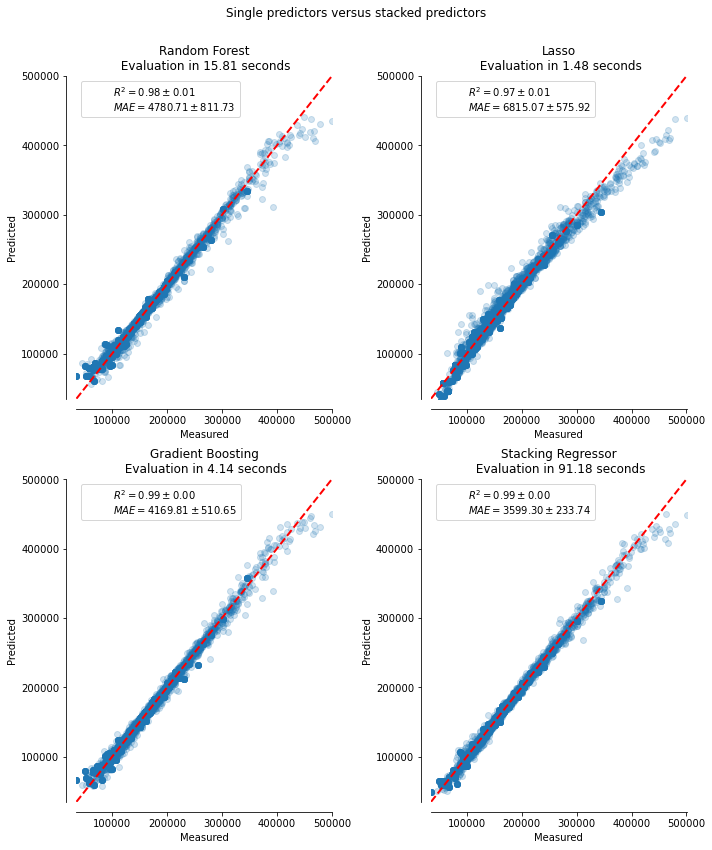

In [42]:

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)


cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector))


gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0))
lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]


stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()